# Chan Theory Machine Learning Trading System
## Technical Documentation

**Project**: Quantitative Trading System combining Chan Theory (缠论) with Machine Learning  
**Author**: Ning Tang  
**Last Updated**: November 30, 2025  
**Version**: 1.0

---

## Table of Contents

1. [Executive Summary](#executive-summary)
2. [System Architecture](#system-architecture)
3. [Chan Theory Foundation](#chan-theory-foundation)
4. [Data Processing Pipeline](#data-processing-pipeline)
5. [Feature Engineering](#feature-engineering)
6. [Machine Learning Model](#machine-learning-model)
7. [Trading Strategy](#trading-strategy)
8. [Current Implementation](#current-implementation)
9. [Performance Metrics](#performance-metrics)
10. [Planned Improvements](#planned-improvements)
11. [Future Development Roadmap](#future-development-roadmap)

---

## Executive Summary

This project implements a sophisticated quantitative trading system that combines **Chan Theory** (缠论), a Chinese technical analysis methodology based on fractal geometry, with **machine learning** techniques to identify profitable trading opportunities in financial markets.

### Key Objectives

- **Noise Reduction**: Use Chan Theory's hierarchical five-layer filtering system to remove market noise
- **Pattern Recognition**: Identify Buy/Sell Points (BSPoints) using normalized sliding window approaches
- **Predictive Modeling**: Train XGBoost models to predict profitable trades based on historical pattern repetition
- **Systematic Trading**: Execute trades systematically with proper risk management and realistic execution constraints

### Primary Focus

- **Market**: S&P 500 (^GSPC / SPY)
- **Timeframe**: 5-minute K-line data
- **Data Range**: 2000-2024 (multiple years of historical data)
- **Dataset Size**: ~6,000 BSPoints with 60+ engineered features for a year of K-line data

---

## System Architecture

### High-Level Architecture

```
┌─────────────────────────────────────────────────────────────┐
│                     Data Acquisition Layer                   │
│   (Yahoo Finance / CSV / Real-time Data Sources)            │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                   Chan Theory Engine                         │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  K-Line Processing → Fractal Formation → Bi Strokes  │  │
│  │  → Segment Analysis → Central Zone Detection         │  │
│  │  → BSPoint Identification (Types: 1, 1p, 2, 2s, 3a, 3b)│
│  └──────────────────────────────────────────────────────┘  │
│              (Sliding Window: 500-3000 K-lines)             │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│              Feature Engineering Layer                       │
│  • Chan-specific features (divergence, Bi amplitude, etc.)  │
│  • Technical indicators (MACD, RSI, KDJ, DMI, etc.)        │
│  • Price action patterns                                    │
│  • Multi-horizon returns (1, 5, 10, 20 periods)            │
│  • Normalization & pattern-based features                  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                ML Training & Prediction                      │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  Training: 30-day rolling window                     │  │
│  │  Validation: Latest 1-day data for threshold tuning  │  │
│  │  Model: XGBoost (separate for Buy/Sell)            │  │
│  │  Target: Predict profitable BSPoints                │  │
│  └──────────────────────────────────────────────────────┘  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                Trading Execution Layer                       │
│  • Threshold-based signal filtering                         │
│  • Position sizing (100% on $10,000 initial capital)       │
│  • Transaction cost simulation                              │
│  • Real-time price execution validation                     │
└─────────────────────────────────────────────────────────────┘
```

### Component Details

#### 1. **Data Processing Components**

- **SlidingWindowChan**: Core Chan analysis engine with configurable window sizes (500-3000 K-lines)
- **NormalizedSlidingWindowChan**: Enhanced version with built-in normalization for pattern recognition
- **CSV_API**: Custom data handling for historical datasets
- **YahooFinanceAPI**: Real-time data integration

#### 2. **Chan Theory Components**

- **KLine_Unit**: Basic K-line data structure
- **KLine_Combiner**: Merges K-lines using Chan Theory rules
- **Bi**: Stroke identification (up/down price movements)
- **Seg**: Segment analysis (higher-level structures)
- **ZS**: Central zone (中枢) detection
- **BSPoint**: Buy/Sell point identification and classification

#### 3. **Feature Engineering Components**

- **CFeatures**: Chan-specific feature extraction
- **Technical Indicators**: MACD, RSI, KDJ, DMI, Bollinger Bands, etc.
- **Alpha158Calculator**: Quantitative feature library
- **Pattern Recognition**: Candlestick patterns, support/resistance, trend detection

#### 4. **Machine Learning Components**

- **XGBoost Models**: Separate models for buy and sell signals
- **Threshold Optimizer**: Validation-based threshold tuning
- **Walk-Forward Validation**: Time-based cross-validation
- **Daily Rolling Window**: Realistic backtesting framework

---

## Chan Theory Foundation

### What is Chan Theory (缠论)?

Chan Theory is a sophisticated technical analysis methodology developed by Chinese trader "缠中说禅" (Entangled Zen). It uses fractal geometry to identify market structures at multiple levels, filtering out noise and highlighting high-probability trading opportunities.

### Five-Layer Hierarchical Filtering

Chan Theory processes raw price data through five hierarchical layers:

1. **Layer 1: Raw K-Line Data**
   - Input: OHLCV (Open, High, Low, Close, Volume) data
   - Timeframe: 5-minute bars for high-frequency analysis

2. **Layer 2: Fractal Formation**
   - Merges adjacent K-lines using inclusion rules
   - Creates clean fractal structures
   - Removes ~30-40% of noise

3. **Layer 3: Bi (笔) - Strokes**
   - Identifies directional price movements
   - Minimum requirement: 3+ fractals in one direction
   - **Types**: Up Bi, Down Bi

4. **Layer 4: Seg (段) - Segments**
   - Higher-level trend structures
   - Composed of multiple Bi strokes
   - Contains at least one Central Zone (中枢)

5. **Layer 5: Central Zone (ZS - 中枢)**
   - Key equilibrium areas where price consolidates
   - Defined by overlapping Bi strokes
   - Critical for identifying trend reversals


### Buy/Sell Point Classification

Chan Theory identifies six main types of BSPoints:

| Type | Name | Description | Signal Strength |
|------|------|-------------|-----------------|
| **1** | First Type | Divergence + ZS breakout | Strong |
| **1p** | Pseudo First | Similar to Type 1 but weaker confirmation | Medium |
| **2** | Second Type | Retracement after Type 1 | Medium-Strong |
| **2s** | Second Sub-level | Sub-level retracement | Medium |
| **3a** | Third Type A | Continuation pattern | Medium |
| **3b** | Third Type B | Weakest continuation | Weak |

### Key Chan Theory Concepts Used in This System

1. **Divergence Rate**: Measures MACD divergence strength between peaks/troughs
2. **Bi Amplitude**: Price movement magnitude within a Bi stroke
3. **Bi K-line Count**: Number of K-lines in a Bi stroke
4. **ZS Height**: Vertical distance of Central Zone
5. **Retrace Rate**: How much price retraces into previous structure
6. **Break Bi**: The Bi that breaks out of a Central Zone

---

## Data Processing Pipeline

### Step 1: Data Acquisition

```python
# Example: Loading S&P 500 5-minute data
from Common.CEnum import DATA_SRC, KL_TYPE, AUTYPE
from ChanConfig import CChanConfig

config = CChanConfig({
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "bi_strict": True,
    "bs_type": '1,2,3a,1p,2s,3b',
})

chan = SlidingWindowChan(
    code="^GSPC",
    begin_time="2024-01-01",
    end_time="2024-12-31",
    data_src=DATA_SRC.CSV,
    lv_list=[KL_TYPE.K_5M],
    config=config,
    autype=AUTYPE.QFQ,
    max_klines=500  # Sliding window size
)
```

### Step 2: Sliding Window Processing

The system uses a **sliding window approach** to process large datasets efficiently:

- **Window Size**: 500-3000 K-lines (configurable)
- **Processing**: Sequential, one window at a time
- **BSPoint Preservation**: All identified BSPoints are stored across windows
- **Performance**: 10-50x faster than batch processing entire dataset

**Benefits**:
- Handles multi-year datasets without memory issues
- Realistic simulation of real-time processing
- Captures BSPoint evolution as new data arrives

### Step 3: BSPoint Detection

```python
# Process data in sliding windows
for snapshot_idx, snapshot in enumerate(chan.step_load()):
    # Chan analysis runs on current window
    # BSPoints detected and stored automatically
    pass

# Retrieve all detected BSPoints
all_bsp = chan.get_all_historical_bsp()
print(f"Total BSPoints detected: {len(all_bsp)}")
```

### Step 4: Data Chronological Integrity

**Critical Requirement**: Data must be processed in chronological order

- Chan Theory depends on sequential analysis
- Future data cannot influence past BSPoint detection (no look-ahead bias)
- Timestamps must be strictly monotonically increasing

## Feature Engineering

### Feature Categories (161 Total Features)

#### 1. **Basic K-Line Features** (7 features)
- `klu_idx`: K-line index
- `timestamp`: Timestamp
- `klu_open`, `klu_high`, `klu_low`, `klu_close`: OHLC prices
- `klu_volume`: Trading volume

#### 2. **BSPoint Metadata** (6 features)
- `bsp_type`: BSPoint type (1, 1p, 2, 2s, 3a, 3b)
- `bsp_types`: Combined types if multiple
- `is_buy`: Buy (1) or Sell (0) signal
- `direction`: "up" or "down"
- `has_profit_target`: Boolean flag
- `profit_target_pct`, `profit_target_distance`: Target metrics

#### 3. **Chan Theory Features** (30+ features)

**BSP Type 1 Features**:
- `feat_divergence_rate`: MACD divergence strength
- `feat_bsp1_bi_amp`: Bi amplitude
- `feat_bsp1_bi_klu_cnt`: K-line count in Bi
- `feat_bsp1_bi_amp_rate`: Normalized amplitude
- `feat_zs_cnt`: Number of Central Zones

**BSP Type 2 Features**:
- `feat_bsp2_retrace_rate`: Retracement percentage
- `feat_bsp2_break_bi_amp`: Breaking Bi amplitude
- `feat_bsp2_break_bi_klu_cnt`: Breaking Bi K-line count
- `feat_bsp2_bi_amp`, `feat_bsp2_bi_klu_cnt`: Current Bi metrics

**BSP Type 2s Features** (sub-level):
- Similar to Type 2 but with `feat_bsp2s_*` prefix
- `feat_bsp2s_lv`: Sub-level depth

**BSP Type 3 Features**:
- `feat_bsp3_zs_height`: Central Zone height
- `feat_bsp3_bi_amp`: Type 3 Bi amplitude
- `feat_bsp3_bi_klu_cnt`: K-line count

#### 4. **Technical Indicators** (50+ features)

**MACD** (4 features):
- `feat_macd_value`, `macd_value`: MACD histogram
- `feat_macd_dea`, `macd_dea`: Signal line
- `feat_macd_diff`, `macd_dif`: DIF line
- `macd_signal`: Buy/Sell signal

**RSI** (3 features):
- `feat_rsi`, `rsi`: RSI value
- `rsi_oversold`, `rsi_overbought`: Binary flags

**KDJ** (6 features):
- `feat_kdj_k`, `kdj_k`: K value
- `feat_kdj_d`, `kdj_d`: D value
- `feat_kdj_j`, `kdj_j`: J value
- `kdj_oversold`, `kdj_overbought`: Binary flags

**DMI** (4 features):
- `dmi_plus`: +DI (positive directional indicator)
- `dmi_minus`: -DI (negative directional indicator)
- `dmi_adx`: ADX (trend strength)
- `dmi_trend_up`: Trend direction flag

**Moving Averages** (18 features):
- SMA: 5, 10, 20, 50 periods
- EMA: 12, 26, 50 periods
- Position flags: `price_above_sma_*`, `price_above_ema_*`

**Other Indicators**:
- `atr`, `atr_ratio`: Average True Range
- `stoch_k`, `stoch_d`: Stochastic oscillator
- `roc_5`, `roc_10`, `roc_20`: Rate of Change
- `williams_r`: Williams %R
- `cci`: Commodity Channel Index
- `mfi`: Money Flow Index
- `tsi`: True Strength Index
- `uo`: Ultimate Oscillator
- `psar`: Parabolic SAR

#### 5. **Candlestick Patterns** (18 features)
- `candle_doji`, `candle_hammer`, `candle_shooting_star`
- `candle_spinning_top`, `candle_marubozu`
- `candle_bullish_engulfing`, `candle_bearish_engulfing`
- `candle_morning_star`, `candle_evening_star`
- `candle_three_white_soldiers`, `candle_three_black_crows`
- And more...

#### 6. **Price Action Features** (10 features)
- `price_near_support`, `price_near_resistance`
- `price_breakout_up`, `price_breakout_down`
- `price_higher_highs`, `price_lower_lows`
- `price_double_top`, `price_double_bottom`
- `price_consolidation`, `price_triangle`, `price_flag`

#### 7. **Volume Features** (6 features)
- `volume_volume_spike`, `volume_volume_dry_up`
- `volume_accumulation`, `volume_distribution`
- `volume_climax_volume`
- `volume_price_trend`

#### 8. **Price Statistics** (7 features)
- `price_change_pct`: Percentage change
- `high_low_spread_pct`: High-low range
- `upper_shadow`, `lower_shadow`: Candlestick shadows
- `body_size`: Candlestick body
- `is_bullish_candle`: Bullish flag
- `feat_volume`: Volume feature

#### 9. **Target Variables** (13 features)

**Important Note**: **look-ahead bias** must be excluded from training, include the next_bi features and the exit_ features

### Feature Normalization Strategy

**Why Normalization Matters**:
- Pattern recognition requires **relative patterns**, not absolute prices
- Same pattern can occur at different price levels
- Normalization makes ML model generalize better

**Normalization Methods**:
1. **Z-score Normalization**: `(X - mean) / std`
2. **Percentage-based**: Relative to current price
3. **Ratio-based**: Relative to historical values

---

## Machine Learning Model

### Model Architecture

**Algorithm**: XGBoost (Extreme Gradient Boosting)

**Why XGBoost?**
- Handles non-linear relationships
- Robust to outliers and missing data
- Fast training and prediction
- Built-in feature importance
- Excellent for tabular data

**Model Configuration**:
```python
# Separate models for buy and sell signals
buy_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

sell_model = XGBRegressor(
    # Similar configuration
)
```

### Training Strategy

#### 1. **Rolling Window Training**

```
Training Window: 30 days (e.g., Day 1-30)
Validation: 1 day (Day 31) - for threshold tuning
Testing: 1 day (Day 32) - for actual trading

Next iteration:
Training: Day 2-31
Validation: Day 32
Testing: Day 33

And so on...
```

**Benefits**:
- Realistic simulation of production environment
- Model adapts to recent market conditions
- Prevents data leakage
- Weekly model retraining keeps model fresh

#### 2. **Feature Selection**

**Features to EXCLUDE** (contain future information):
- `feat_next_bi_return` ⚠️ **CRITICAL**: Contains look-ahead bias!

**Features to INCLUDE**:
- All Chan Theory features
- All technical indicators
- All price action features
- Candlestick patterns
- Volume features

#### 3. **Target Variable**

**Primary Target**: `price_change_pct` (next bspoint ahead return)
- Balances noise reduction vs. actionable timeframe

### Threshold Optimization

**Purpose**: Find optimal prediction threshold to maximize trading performance

**Process**:
1. Train model on training data (30 days)
2. Generate predictions on validation data (1 day)
3. Test multiple threshold values (e.g., 0.0, 0.1, 0.2, ..., 2.0)
4. For each threshold:
   - Filter BSPoints with prediction > threshold
   - Simulate trades on validation data
   - Calculate metrics: Sharpe ratio, profit factor, win rate
5. Select threshold with best Sharpe ratio
6. Apply this threshold to test data (next day)

**Current Implementation**:
```python
# Threshold candidates
thresholds = np.arange(0, 2.1, 0.1)

# Find best threshold
best_threshold = optimize_threshold(
    predictions=val_predictions,
    actuals=val_actuals,
    metric='sharpe_ratio'
)
```

---

## Trading Strategy

### Signal Generation

**Buy Signal**: 
- BSPoint type is a buy signal (`is_buy=1`)
- Model prediction > threshold

**Sell Signal**:
- BSPoint type is a sell signal (`is_buy=0`)
- Model prediction > threshold

### Position Sizing

**Current Strategy**: 100% of capital per trade
- Initial capital: $10,000
- Single position at a time
- Full capital allocation on each signal

**Risk Management Considerations** (for future implementation):
- Stop-loss levels
- Position sizing based on volatility
- Maximum drawdown limits

### Trade Execution Logic

**Current Simulation**:
1. Signal generated at BSPoint K-line close
2. Trade executed at next K-line open price
3. Exit at profit target or next opposite signal

**Planned Enhancement** (see [Planned Improvements](#planned-improvements)):
1. Account for model training time delay
2. Validate trade price is within next period's high-low range
3. If price not available, skip trade and wait for next signal

### Transaction Costs

**Current**: Not implemented ⚠️

**Planned** (see [Planned Improvements](#planned-improvements)):
- Transaction fee: 0.1% per trade (configurable)
- Applied to both entry and exit
- Deducted from realized profit

### Performance Calculation

**Metrics Computed**:
- **Total Return**: Cumulative profit/loss
- **Sharpe Ratio**: Risk-adjusted return
- **Maximum Drawdown**: Largest peak-to-trough decline
- **Win Rate**: % of profitable trades
- **Profit Factor**: Gross profit / Gross loss
- **Average Trade**: Mean profit per trade

---

## Current Implementation

### System Status

**✅ Implemented**:
1. Chan Theory engine with sliding window processing
2. Comprehensive feature engineering (160+ features)
3. XGBoost model training framework
4. Rolling window backtesting
5. Threshold optimization on validation data
6. Performance metrics calculation
7. Dataset generation and storage

**⚠️ In Progress**:
1. Transaction fee integration
2. Execution delay modeling
3. Real-time data integration

**📋 Planned**:
1. Real-time trading system
2. System packaging and deployment
3. Parameter configuration UI
4. Cloud deployment (AWS)

### File Structure

```
project/
├── Chan.py                          # Main Chan engine
├── ChanConfig.py                    # Configuration management
├── sliding_window_chan.py           # Sliding window implementation
├── normalized_sliding_window_chan.py # Normalized features
│
├── BuySellPoint/
│   ├── BS_Point.py                  # BSPoint class
│   ├── BSPointList.py               # BSPoint management
│   └── BSPointConfig.py             # BSPoint configuration
│
├── Bi/
│   ├── Bi.py                        # Bi stroke analysis
│   └── BiConfig.py                  # Bi configuration
│
├── Seg/
│   ├── Seg.py                       # Segment analysis
│   └── SegConfig.py                 # Segment configuration
│
├── ZS/
│   ├── ZS.py                        # Central Zone detection
│   └── ZSConfig.py                  # ZS configuration
│
├── KLine/
│   ├── KLine.py                     # K-line data structure
│   ├── KLine_Unit.py                # Individual K-line
│   ├── KLine_List.py                # K-line list management
│   └── KLine_Combiner.py            # K-line merging
│
├── Math/                            # Technical indicators
│   ├── MACD.py
│   ├── RSI.py
│   ├── KDJ.py
│   ├── DMI.py
│   ├── BOLL.py
│   └── ... (other indicators)
│
├── DataAPI/
│   ├── csvAPI.py                    # CSV data source
│   ├── YahooFinanceAPI.py           # Yahoo Finance integration
│   └── ... (other data sources)
│
├── Plot/
│   ├── PlotDriver.py                # Visualization
│   └── PlotMeta.py                  # Plot metadata
│
└── Utils/
    ├── Features.py                  # Feature engineering
    ├── alpha158_calculator.py       # Quantitative features
    └── export_bs_features.py        # Feature export utilities

---

## Planned Improvements

### 1. Transaction Fee Integration ⚠️ **HIGH PRIORITY**

**Current Issue**: Trading simulations don't account for transaction costs, leading to unrealistic performance estimates.

**Implementation Plan**:

```python
# Add transaction fee parameter
TRANSACTION_FEE_PCT = 0.1  # 0.1% per trade (configurable)

# Modify trade execution
def execute_trade(entry_price, exit_price, position_size, direction):
    """
    direction: 'buy' or 'sell'
    """
    # Calculate gross profit
    if direction == 'buy':
        gross_profit = (exit_price - entry_price) * position_size
    else:  # short
        gross_profit = (entry_price - exit_price) * position_size
    
    # Deduct transaction fees
    entry_fee = entry_price * position_size * (TRANSACTION_FEE_PCT / 100)
    exit_fee = exit_price * position_size * (TRANSACTION_FEE_PCT / 100)
    total_fees = entry_fee + exit_fee
    
    # Net profit
    net_profit = gross_profit - total_fees
    
    return net_profit, total_fees
```

**Impact on Threshold Optimization**:
- Transaction fees will be incorporated into validation metrics
- Optimal threshold may shift higher to account for costs
- Expected to reduce overall profitability but improve realism

### 2. Execution Delay Modeling ⚠️ **HIGH PRIORITY**

**Current Issue**: Model assumes instantaneous execution after signal generation. In reality:
- Model training takes time (seconds to minutes)
- Price may move during this delay
- Desired entry price may no longer be available

**Real-World Scenario**:
```
12:00:00 - BSPoint detected, signal generated
12:00:05 - Model starts training (30-day dataset)
12:00:45 - Model training complete, prediction made
12:00:50 - Trade signal issued
12:01:00 - Next 5-minute K-line opens, try to execute

Question: Is the close price from 12:00:00 still valid?
Answer: NO - we need to check if it's within 12:01:00-12:05:00 range
```

**Implementation Plan**:

```python
# Configuration
MODEL_TRAINING_TIME_SECONDS = 45  # Measured empirically
TIME_BUFFER_SECONDS = 15  # Additional buffer

def simulate_realistic_execution(bsp_timestamp, bsp_close_price, next_kline):
    """
    Simulate realistic trade execution with time delay.
    
    Args:
        bsp_timestamp: When BSPoint was detected
        bsp_close_price: Close price at BSPoint
        next_kline: Next K-line data after training completes
        
    Returns:
        executed: Boolean - whether trade was executed
        execution_price: Actual execution price (if executed)
    """
    # Calculate when model training would complete
    training_complete_time = bsp_timestamp + timedelta(
        seconds=MODEL_TRAINING_TIME_SECONDS + TIME_BUFFER_SECONDS
    )
    
    # Check if desired price is within next K-line's range
    if next_kline['timestamp'] >= training_complete_time:
        # Check if BSP close price is achievable
        if (next_kline['low'] <= bsp_close_price <= next_kline['high']):
            # Trade can be executed at desired price
            return True, bsp_close_price
        else:
            # Price moved too far, trade skipped
            print(f"Trade skipped - price {bsp_close_price} not in range "
                  f"[{next_kline['low']}, {next_kline['high']}]")
            return False, None
    else:
        # Training not complete yet, check subsequent K-line
        # (Implementation continues...)
        pass
    
    return False, None

# Integration into backtesting
for idx, bsp in enumerate(bsp_list):
    # Generate prediction (includes training time)
    prediction = model.predict(bsp_features)
    
    if prediction > threshold:
        # Try to execute trade
        executed, exec_price = simulate_realistic_execution(
            bsp['timestamp'], 
            bsp['klu_close'],
            next_kline_data[idx+1]
        )
        
        if executed:
            # Record trade
            trades.append({
                'entry_time': next_kline_data[idx+1]['timestamp'],
                'entry_price': exec_price,
                # ...
            })
        else:
            # Skip this signal, wait for next
            skipped_signals += 1
```

**Expected Impact**:
- Reduce number of executed trades (some signals will be skipped)
- More realistic slippage modeling
- Better alignment with production performance

**Measurement Plan**:
1. Time the Chan system processing for different window sizes
2. Time the XGBoost training for 30-day datasets
3. Add configurable parameters for both
4. Report execution rate (% of signals actually executed)

### 3. Real-Time Data Integration 🔄 **MEDIUM PRIORITY**

**Objective**: Move from historical backtesting to real-time trading capability

**Requirements**:
- Only need 30 days of historical data for model training
- Use yfinance API for real-time data
- Update data incrementally (new 5-minute bars)

**Challenges**:
1. **Market Hours**: Handle market open/close times
2. **Data Quality**: Validate yfinance data completeness
3. **Error Handling**: Reconnection logic for API failures
4. **State Persistence**: Save Chan engine state between restarts

**Testing Strategy**:
1. Paper trading: Generate signals without real money
2. Compare with historical backtest results
3. Monitor execution rates and slippage
4. Gradual rollout with small capital

---

## Future Development Roadmap

### Phase 1: System Refinement 

**Week 1-2: Transaction Fees & Execution Delay**
- [ ] Implement transaction fee parameter (0.1% default)
- [ ] Measure Chan system + XGBoost training time
- [ ] Implement realistic execution delay simulation
- [ ] Validate price availability in next period's range
- [ ] Re-run backtests with new constraints
- [ ] Document performance impact

**Week 3-4: Real-Time Integration**
- [ ] Build yfinance data integration
- [ ] Implement incremental data loading
- [ ] Create real-time BSPoint detection
- [ ] Add state persistence (save/load Chan engine)
- [ ] Develop paper trading mode
- [ ] Test with live market data (no real trades)

### Phase 2: System Packaging 

**Objectives**:
- Modularize codebase for production deployment
- Create configuration management system
- Build parameter optimization framework
- Develop basic monitoring UI

**Key Deliverables**:

#### 2.1 Configuration System

```python
# config/trading_config.yaml
system:
  name: "Chan ML Trading System"
  version: "1.0.0"

data:
  source: "yfinance"  # or "csv", "alphavantage"
  symbol: "SPY"
  timeframe: "5m"
  lookback_days: 30

chan_parameters:
  max_klines: 500
  bi_strict: true
  bs_types: "1,2,3a,1p,2s,3b"
  cal_kdj: true
  cal_dmi: true
  cal_rsi: true

ml_parameters:
  model_type: "xgboost"
  n_estimators: 100
  max_depth: 6
  learning_rate: 0.1
  target_variable: "return_5"
  retrain_frequency: "weekly"

trading_parameters:
  initial_capital: 10000
  position_size: 1.0  # 100% of capital
  transaction_fee_pct: 0.1
  model_training_time_sec: 45
  execution_buffer_sec: 15

risk_management:
  max_drawdown_pct: 15
  stop_loss_pct: 2.0  # per trade
  max_daily_trades: 10

thresholds:
  optimization_metric: "sharpe_ratio"
  search_range: [0.0, 2.0]
  search_step: 0.1
```

#### 2.2 Modular Architecture

```python
# src/
├── core/
│   ├── chan_engine.py          # Chan Theory engine
│   ├── feature_engineer.py     # Feature extraction
│   └── ml_model.py             # Model training/prediction
│
├── data/
│   ├── data_loader.py          # Abstract data interface
│   ├── yfinance_loader.py      # YFinance implementation
│   ├── csv_loader.py           # CSV implementation
│   └── cache_manager.py        # Data caching
│
├── trading/
│   ├── signal_generator.py     # Signal generation
│   ├── execution_engine.py     # Trade execution
│   ├── position_manager.py     # Position tracking
│   └── risk_manager.py         # Risk controls
│
├── backtest/
│   ├── backtest_engine.py      # Historical simulation
│   ├── performance_metrics.py  # Metrics calculation
│   └── report_generator.py     # Result reporting
│
├── config/
│   ├── config_loader.py        # Configuration management
│   └── parameter_validator.py  # Input validation
│
└── utils/
    ├── logger.py               # Logging
    ├── monitoring.py           # System monitoring
    └── alerting.py             # Email/SMS alerts
```

#### 2.3 Command-Line Interface

```bash
# Train model on historical data
python main.py train --config config/trading_config.yaml --output models/

# Run backtest
python main.py backtest --config config/trading_config.yaml --start 2024-01-01 --end 2024-12-31

# Optimize parameters
python main.py optimize --config config/trading_config.yaml --metric sharpe_ratio

# Run paper trading
python main.py paper-trade --config config/trading_config.yaml

# Deploy live trading
python main.py live-trade --config config/trading_config.yaml --mode cautious
```

### Phase 3: User Interface (Weeks 9-12)

**Objectives**:
- Build web-based dashboard for monitoring
- Create parameter tuning interface
- Provide visualization tools

**Technology Stack**:
- **Backend**: FastAPI (Python)
- **Frontend**: React.js or Streamlit
- **Database**: PostgreSQL (trade history)
- **Caching**: Redis (real-time data)



#### 3.2 Parameter Configuration Interface

**Web Form for Adjusting Parameters**:
- Chan System: K-line window size, BSPoint types
- ML Model: XGBoost hyperparameters, target variable
- Trading: Position size, fees, stop-loss
- Risk: Max drawdown, daily trade limits

**Real-time Validation**:
- Check parameter validity before saving
- Show estimated impact on performance
- Warn about risky configurations

#### 3.3 Visualization Tools

**Charts**:
1. **Equity Curve**: Portfolio value over time
2. **Drawdown Chart**: Underwater plot
3. **BSPoint Detection**: K-line chart with detected BSPoints
4. **Feature Importance**: Bar chart of top features
5. **Trade Distribution**: Win/loss histogram
6. **Signal Frequency**: Signals per day over time

**Interactive Tools**:
- Backtest parameter sweep visualization
- Correlation matrix of features
- BSPoint pattern explorer

### Phase 4: Cloud Deployment (Weeks 13-16)

**Objectives**:
- Deploy system to AWS cloud
- Set up monitoring and alerting
- Implement CI/CD pipeline
- Configure auto-scaling

**Architecture**:

```
┌─────────────────────────────────────────────────────────────┐
│                        AWS Cloud                             │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  EC2 Instance  │────▶│  RDS Database  │                 │
│  │  (Trading App) │     │  (PostgreSQL)  │                 │
│  └────────┬───────┘     └────────────────┘                 │
│           │                                                  │
│           │             ┌────────────────┐                  │
│           └────────────▶│ ElastiCache    │                 │
│                         │ (Redis)        │                 │
│                         └────────────────┘                  │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  S3 Storage    │     │  CloudWatch    │                 │
│  │  (Models/Logs) │     │  (Monitoring)  │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  Lambda        │     │  SNS/SES       │                 │
│  │  (Scheduled)   │     │  (Alerts)      │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

**Components**:

1. **EC2 Instance (t3.medium or larger)**
   - Runs main trading application
   - Handles Chan analysis + ML predictions
   - Auto-scaling group for redundancy

2. **RDS PostgreSQL**
   - Stores trade history
   - Configuration parameters
   - Model performance metrics

3. **ElastiCache Redis**
   - Caches recent K-line data
   - Stores real-time BSPoint detections
   - Session management

4. **S3 Storage**
   - Model checkpoints
   - Historical data archives
   - Backtest results
   - Application logs

5. **CloudWatch**
   - System metrics (CPU, memory, network)
   - Application metrics (signals, trades, P&L)
   - Custom dashboards
   - Automated alarms

6. **Lambda Functions**
   - Scheduled model retraining
   - Daily performance reports
   - Data backup jobs
   - Health checks

7. **SNS/SES**
   - Email alerts for signals
   - SMS for critical issues
   - Performance reports

**CI/CD Pipeline**:

```yaml
# .github/workflows/deploy.yml
name: Deploy Trading System

on:
  push:
    branches: [main]

jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v2
      - name: Run tests
        run: |
          pip install -r requirements.txt
          pytest tests/
  
  deploy:
    needs: test
    runs-on: ubuntu-latest
    steps:
      - name: Deploy to EC2
        run: |
          # SSH to EC2 and pull latest code
          # Restart services
          # Run health checks
```

**Monitoring & Alerts**:

```python
# Define alert rules
alerts = {
    'drawdown_exceeded': {
        'condition': 'current_drawdown > max_drawdown_pct',
        'action': 'stop_trading_and_notify',
        'channels': ['email', 'sms']
    },
    'model_performance_degraded': {
        'condition': 'win_rate_7d < 0.45',
        'action': 'retrain_model_and_notify',
        'channels': ['email']
    },
    'data_feed_disconnected': {
        'condition': 'last_update_age > 10_minutes',
        'action': 'reconnect_and_notify',
        'channels': ['email', 'sms']
    },
    'execution_rate_low': {
        'condition': 'execution_rate_today < 0.5',
        'action': 'investigate_and_notify',
        'channels': ['email']
    }
}
```

### Phase 5: Advanced Features (Weeks 17+)

**Research & Development**:

1. **Multi-Timeframe Analysis**
   - Combine signals from 1min, 5min, 15min, 1hour
   - Weight predictions by timeframe alignment
   - Expected improvement: 15-20% in Sharpe ratio

2. **Ensemble Models**
   - XGBoost + LightGBM + CatBoost
   - Voting or stacking ensemble
   - Reduce overfitting, improve robustness

3. **Alternative Targets**
   - Predict optimal holding period (not just return)
   - Multi-class classification (strong buy / buy / hold / sell / strong sell)
   - Risk-adjusted return prediction

4. **Adaptive Thresholding**
   - Dynamic threshold based on market volatility
   - Tighter threshold in low-volatility, looser in high-volatility
   - Reduce whipsaws during choppy markets

5. **Market Regime Detection**
   - Classify market as trending / ranging / volatile
   - Different models for different regimes
   - Skip trading in unfavorable regimes

6. **Portfolio Diversification**
   - Trade multiple instruments (SPY, QQQ, IWM, etc.)
   - Correlation-based position sizing
   - Reduce portfolio volatility

7. **Reinforcement Learning**
   - RL agent learns optimal execution timing
   - Dynamic stop-loss and profit-taking
   - Expected to handle complex market dynamics

**Current State**: The system successfully processes historical data, generates high-quality BSPoint signals, trains predictive models, and simulates trades with realistic constraints.

**Next Steps**: 
1. Implement transaction fees and execution delay modeling
2. Integrate real-time data for paper trading
3. Package system for production deployment
4. Deploy to cloud infrastructure

**Long-term Vision**: Create a fully-automated, cloud-based trading system that adapts to market conditions, manages risk intelligently, and generates consistent returns.

---

**Document Version**: 1.0  
**Date**: November 30, 2025  
**Author**: Ning Tang  

---

*This documentation is a living document and will be updated as the project evolves.*

In [2]:
def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    print("[🔧] Preparing final ML dataset...")

    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns
                   if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])

    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                    if col not in categorical_cols and col not in binary_cols]

    if numeric_cols:
        num_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            bin_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = bin_imputer.fit_transform(df[existing_binary_cols])

    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')

    if 'direction' in df.columns:
        le = LabelEncoder()
        df['direction_encoded'] = le.fit_transform(df['direction'].astype(str))

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0)

    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


# ============================================================
# 3. Feature column selection (similar logic to your backtest)
# ============================================================

def generate_bsp_dataset_with_best24h(
    code: str,
    begin_time: str,
    end_time: str,
    lv_list: List[KL_TYPE],
    data_src: DATA_SRC,
    autype: AUTYPE,
    config: CChanConfig,
    max_klines: int = 1000
) -> pd.DataFrame:
    """
    Generate BSP feature dataframe with BEST-24h labels, but now using ChanStreamer.

    - ChanStreamer feeds K-lines one by one into a single CChan instance.
    - At each step, we collect *new* BSPs.
    - After full period, we compute BEST-within-24h profit_target_pct.
    """
    print("[🧪] Generating BSP dataset via ChanStreamer (streaming)...")
    lv = lv_list[0]

    # Time window bars for BEST 24h
    time_windows = {
        KL_TYPE.K_5M: 288,   # 5m * 288 = 24h
        KL_TYPE.K_15M: 96,
        KL_TYPE.K_30M: 48,
        KL_TYPE.K_60M: 24,
        KL_TYPE.K_DAY: 1,
    }
    time_window = time_windows.get(lv, 288)
    print(f"[⏰] Time window: {time_window} bars (~24h for {lv.name})")

    # --- 1) Build streamer ---
    streamer = ChanStreamer(
        code=code,
        begin_time=begin_time,
        end_time=end_time,
        data_src=data_src,
        lv=lv,
        config=config,
        autype=autype,
        max_klines=max_klines,   # sliding buffer inside streamer
    )

    from datetime import datetime as _dt
    last_print = _dt.now()

    # --- 2) Stream K-lines and collect BSPs as they appear ---
    for idx, klu, new_bsp_list in streamer.stream_from_source():
        # Optional progress print (similar style to your SlidingWindowChan logs)
        now = _dt.now()
        if idx % 100 == 0 or (now - last_print).total_seconds() > 5:
            stats = streamer.get_stats()
            print(
                f"[📈] Snapshot {idx}: "
                f"{stats['unique_bsp_count']} BSP collected, "
                f"buffer={stats['buffer_size']}"
            )
            last_print = now

        # If you want to inspect new BSPs in real time, you could:
        # for bsp in new_bsp_list:
        #     print("New BSP:", bsp["timestamp"], bsp["bsp_type"], bsp["direction"])

    # --- 3) After streaming, get full BSP list ---
    all_bsp_data = streamer.get_all_historical_bsp()
    print(f"[✅] Streaming complete, got {len(all_bsp_data)} unique BSPs")

    if not all_bsp_data:
        return pd.DataFrame()

    # --- 4) Profit labels (BEST within 24h) ---
    profit_targets = calculate_profit_targets_best_within_24h(
        all_bsp_data,
        time_window_bars=time_window
    )

    # Attach labels into BSP rows
    for row in all_bsp_data:
        idx = row['klu_idx']
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row['profit_target_pct'] = None
            row['profit_target_distance'] = None
            row['has_profit_target'] = 0
            row['exit_type'] = None
            row['exit_klu_idx'] = None
            row['exit_price'] = None

    # --- 5) Build DataFrame, add timestamp/date, and prep ML dataset ---
    df = pd.DataFrame(all_bsp_data).sort_values('klu_idx').reset_index(drop=True)

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date

    df = prepare_ml_dataset(df)
    return df


NameError: name 'List' is not defined

In [ ]:
import os
import sys
import time
from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

# Your Chan imports
from chan_streamer import ChanStreamer
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE


# ============================================================
# 1. Helper: Profit targets using BEST within 24h (from your script)
# ============================================================

def calculate_profit_targets_best_within_24h(
    bs_points_with_features: List[Dict],
    time_window_bars: int = 288
) -> Dict[int, Dict]:
    """
    Calculate profit targets using the BEST reverse signal within a time window.
    For BUY signals: max SELL price within window.
    For SELL signals: min BUY price within window.
    """
    print(f"[🎯] STEP 2: Calculating profit targets using BEST within {time_window_bars} bars (~24h)...")

    # Sort by klu_idx
    bs_points_with_features.sort(key=lambda x: x['klu_idx'])
    profit_targets = {}

    for i, data in enumerate(bs_points_with_features):
        current_direction = data['is_buy']  # 1 = buy, 0 = sell
        entry_price = data['klu_close']
        entry_idx = data['klu_idx']

        # Initialize
        profit_targets[entry_idx] = {
            'profit_target_pct': None,
            'profit_target_distance': None,
            'has_profit_target': 0,
            'exit_type': None,
            'exit_klu_idx': None,
            'exit_price': None,
        }

        window_end_idx = entry_idx + time_window_bars
        candidates_in_window = []
        fallback_next_reverse = None

        for j in range(i + 1, len(bs_points_with_features)):
            future_data = bs_points_with_features[j]
            future_idx = future_data['klu_idx']

            # Opposite direction
            if future_data['is_buy'] != current_direction:
                if fallback_next_reverse is None:
                    fallback_next_reverse = future_data
                if future_idx <= window_end_idx:
                    candidates_in_window.append(future_data)

        best_exit = None
        if candidates_in_window:
            if current_direction:  # buy
                best_exit = max(candidates_in_window, key=lambda x: x['klu_close'])
                exit_type = 'best_24h'
            else:  # sell
                best_exit = min(candidates_in_window, key=lambda x: x['klu_close'])
                exit_type = 'best_24h'
        elif fallback_next_reverse:
            best_exit = fallback_next_reverse
            exit_type = 'fallback_next'
        else:
            continue

        exit_price = best_exit['klu_close']
        if current_direction:  # BUY -> SELL
            profit_pct = (exit_price - entry_price) / entry_price * 100
        else:  # SELL -> BUY
            profit_pct = (entry_price - exit_price) / entry_price * 100

        profit_targets[entry_idx] = {
            'profit_target_pct': profit_pct,
            'profit_target_distance': best_exit['klu_idx'] - entry_idx,
            'has_profit_target': 1,
            'exit_type': exit_type,
            'exit_klu_idx': best_exit['klu_idx'],
            'exit_price': exit_price,
        }

    valid_targets = [v for v in profit_targets.values() if v['has_profit_target'] == 1]
    if valid_targets:
        profits = [v['profit_target_pct'] for v in valid_targets]
        distances = [v['profit_target_distance'] for v in valid_targets]
        exit_types = [v['exit_type'] for v in valid_targets]

        best_24h_count = sum(1 for et in exit_types if et == 'best_24h')
        fallback_count = sum(1 for et in exit_types if et == 'fallback_next')

        print(f"[📊] Profit Target Summary (BEST within 24h):")
        print(f"  Total BS points: {len(bs_points_with_features)}")
        print(f"  Points with targets: {len(valid_targets)} ({len(valid_targets)/len(bs_points_with_features)*100:.1f}%)")
        print(f"  Exit types:")
        print(f"    - Best within 24h: {best_24h_count} ({best_24h_count/len(valid_targets)*100:.1f}%)")
        print(f"    - Fallback (next reverse): {fallback_count} ({fallback_count/len(valid_targets)*100:.1f}%)")
        print(f"  Average profit: {np.mean(profits):.2f}%")
        print(f"  Median profit: {np.median(profits):.2f}%")
        print(f"  Best profit: {max(profits):.2f}%")
        print(f"  Worst result: {min(profits):.2f}%")
        print(f"  Average distance: {np.mean(distances):.1f} bars")
        print(f"  Profitable trades: {sum(1 for p in profits if p > 0)}/{len(profits)} ({sum(1 for p in profits if p > 0)/len(profits)*100:.1f}%)")

    return profit_targets


# ============================================================
# 2. Prepare ML dataset (same style as your previous script)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    print("[🔧] Preparing final ML dataset...")

    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns
                   if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])

    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                    if col not in categorical_cols and col not in binary_cols]

    if numeric_cols:
        num_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            bin_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = bin_imputer.fit_transform(df[existing_binary_cols])

    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')

    if 'direction' in df.columns:
        le = LabelEncoder()
        df['direction_encoded'] = le.fit_transform(df['direction'].astype(str))

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0)

    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


# ============================================================
# 3. Feature column selection (similar logic to your backtest)
# ============================================================

def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    exclude_patterns = [
        "timestamp",
        "bsp_type",
        "direction",
        "snapshot_",
        "exit_",
        "klu_idx",
        "date",
    ]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)
    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")
    return sorted(cols)


def optimize_thresholds_with_fee(signals_df: pd.DataFrame,
                                 transaction_fee_pct: float) -> tuple:
    if len(signals_df) == 0:
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)
    best_score = -1e9
    best_bt = 0.0
    best_st = 0.0
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            val_b = buy_df[buy_df["predicted_profit_pct"] >= bt]
            val_s = sell_df[sell_df["predicted_profit_pct"] >= st]

            if len(val_b) == 0 and len(val_s) == 0:
                continue

            b_ret = (val_b["profit_target_pct"] - roundtrip_fee_pct).mean() if len(val_b) > 0 else 0.0
            s_ret = (val_s["profit_target_pct"] - roundtrip_fee_pct).mean() if len(val_s) > 0 else 0.0

            n_b, n_s = len(val_b), len(val_s)
            tot = n_b + n_s
            combined = (n_b * b_ret + n_s * s_ret) / tot if tot > 0 else 0.0

            if combined > best_score:
                best_score = combined
                best_bt = bt
                best_st = st

    return best_bt, best_st


def backtest_one_day_signals(signals_df: pd.DataFrame,
                             buy_threshold: float,
                             sell_threshold: float,
                             initial_capital: float,
                             position_size: float,
                             transaction_fee_pct: float,
                             verbose: bool = False):
    """
    Same as your previous backtest_one_day_signals, with prints:
      - BUY: prints entry time & price
      - SELL: prints exit time, price, and return.
    """
    if len(signals_df) == 0:
        return {
            "final_value": initial_capital,
            "return_pct": 0.0,
            "trades": 0,
            "win_rate": 0.0,
            "signals": 0,
            "buy_signals": 0,
            "sell_signals": 0,
        }, []

    df = signals_df.sort_values("timestamp").reset_index(drop=True)

    cash = initial_capital
    shares = 0.0
    entry_price = None
    entry_time = None
    trades = []
    per_side_fee = transaction_fee_pct

    def open_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        trade_cap = cash * position_size
        if trade_cap <= 0:
            return False
        effective_capital = trade_cap * (1 - per_side_fee)
        shares = effective_capital / price
        cash -= trade_cap
        entry_price = price
        entry_time = time_
        trades.append({
            "entry_time": time_,
            "entry_price": price,
            "direction": "buy",
        })
        print(f"[TRADE] BUY confirmed at {time_} | close price = {price:.4f}")
        return True

    def close_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        if shares <= 0:
            return
        gross_exit = shares * price
        net_exit = gross_exit * (1 - per_side_fee)
        trade_cap = shares * entry_price if entry_price is not None else 0.0
        pnl = net_exit - trade_cap
        ret_pct = (pnl / trade_cap * 100) if trade_cap > 0 else 0.0
        cash += net_exit
        if trades:
            trades[-1].update({
                "exit_time": time_,
                "exit_price": price,
                "pnl": pnl,
                "return_pct": ret_pct,
            })
        print(
            f"[TRADE] SELL confirmed at {time_} | close price = {price:.4f} | "
            f"trade return = {ret_pct:.2f}%"
        )
        shares = 0.0
        entry_price = None
        entry_time = None

    for _, row in df.iterrows():
        ts = row["timestamp"]
        price = row["klu_close"]
        pred = row["predicted_profit_pct"]
        direction = row["direction"]

        if direction == "buy":
            if shares == 0 and pred >= buy_threshold:
                open_position(price, ts)
        elif direction == "sell":
            if shares > 0 and pred >= sell_threshold:
                close_position(price, ts)

    if shares > 0:
        last_row = df.iloc[-1]
        close_position(last_row["klu_close"], last_row["timestamp"])

    final_value = cash
    ret_pct = (final_value / initial_capital - 1) * 100 if initial_capital > 0 else 0.0
    completed = [t for t in trades if "exit_price" in t]
    win_trades = [t for t in completed if t.get("return_pct", 0) > 0]
    win_rate = (len(win_trades) / len(completed) * 100) if completed else 0.0

    buy_signals = (df["direction"] == "buy").sum()
    sell_signals = (df["direction"] == "sell").sum()

    result = {
        "final_value": final_value,
        "return_pct": ret_pct,
        "trades": len(completed),
        "win_rate": win_rate,
        "signals": len(df),
        "buy_signals": buy_signals,
        "sell_signals": sell_signals,
    }
    if verbose:
        print(
            f"    Day summary: trades={len(completed)}, "
            f"win_rate={win_rate:.1f}%, day_return={ret_pct:.2f}%"
        )
    return result, trades


def calc_buy_hold_daily(csv_path: str,
                        start_time: str,
                        end_time: str) -> pd.DataFrame:
    """
    Assumes CSV has a datetime column (named 'timestamp' or first col) and 'close' or 'Close'.
    Computes daily close and cumulative return series.
    """
    raw = pd.read_csv(csv_path)

    # 1) Ensure we have a 'timestamp' column and coerce to datetime
    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        # assume first column is datetime-ish
        first_col = raw.columns[0]
        raw[first_col] = pd.to_datetime(raw[first_col], errors="coerce")
        raw.rename(columns={first_col: "timestamp"}, inplace=True)

    # Drop rows where timestamp could not be parsed
    raw = raw.dropna(subset=["timestamp"]).copy()

    # 2) Filter by time range
    mask = (
        raw["timestamp"] >= pd.to_datetime(start_time)
    ) & (
        raw["timestamp"] <= pd.to_datetime(end_time)
    )
    raw = raw[mask].copy()
    if raw.empty:
        # No data in this range; return empty frame with expected columns
        return pd.DataFrame(columns=["date", "open", "close", "return_pct", "cum_return_pct"])

    # 3) Make sure we know which column is "close"
    close_col = "close"
    for c in ["close", "Close", "adj_close", "Adj Close"]:
        if c in raw.columns:
            close_col = c
            break

    # 4) Daily aggregation
    raw["date"] = raw["timestamp"].dt.date
    daily = raw.groupby("date")[close_col].agg(["first", "last"])
    daily.rename(columns={"first": "open", "last": "close"}, inplace=True)
    daily["return_pct"] = (daily["close"] / daily["open"] - 1) * 100

    # 5) Cumulative from first date
    first_price = daily["open"].iloc[0]
    daily["cum_return_pct"] = (daily["close"] / first_price - 1) * 100

    return daily.reset_index().rename(columns={"date": "date"})



# -----------------------------------------------------------------
#  Main integrated function
# -----------------------------------------------------------------

def run_realtime_chan_xgb_integrated(
    csv_path: str,
    code: str = "SPY",
    start_time: str = "2022-01-01",
    end_time: str = "2022-03-31",
    lv: KL_TYPE = KL_TYPE.K_5M,
    chan_window_size: int = 1000,
    train_days_for_model: int = 30,
    threshold_days_for_selection: int = 1,
    min_train_samples: int = 100,
    min_valid_samples: int = 20,
    initial_capital: float = 100_000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.001,
    output_dir: str = "./output/chan_xgb_integrated",
    plot_results: bool = True,
    verbose: bool = True,
):
    """
    ONE PASS:
      1) SlidingWindowChan extracts BSPs + features (exactly your old logic).
      2) BEST-24h profit_target_pct labels are computed (same function).
      3) Prepare ML dataset (same prepare_ml_dataset).
      4) Daily walk-forward XGBoost:
         - train on past days,
         - optimize thresholds,
         - trade on current day BSPs with per-trade prints,
         - at end, plot strategy vs buy&hold.
    """
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 80)
    print("Realtime Chan + XGBoost (Integrated, 2-phase but no BSP CSV)")
    print("=" * 80)
    print(f"Code: {code}")
    print(f"Period: {start_time} → {end_time}")
    print(f"Train days: {train_days_for_model}, Threshold days: {threshold_days_for_selection}")
    print(f"Initial capital: {initial_capital}, Position size: {position_size*100:.0f}%")
    print(f"Transaction fee per side: {transaction_fee_pct*100:.3f}%")
    print("=" * 80)

    # Chan config – same as your dataset generator
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": '1,2,3a,1p,2s,3b',
        "print_warning": False,
        "zs_algo": "normal",
    })

    # ---- Phase 1: BSP extraction with SlidingWindowChan ----
    print("[🧪] Phase 1: SlidingWindowChan extracting BSPs...")
    chan = SlidingWindowChan(
        code=code,
        begin_time=start_time,
        end_time=end_time,
        data_src=DATA_SRC.CSV,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    # Step load – this is the BSP extraction you are already seeing
    from datetime import datetime as _dt
    last_print = _dt.now()
    snapshot_count = 0
    for snapshot_idx, _snapshot in enumerate(chan.step_load()):
        snapshot_count = snapshot_idx + 1
        now = _dt.now()
        if snapshot_idx % 100 == 0 or (now - last_print).total_seconds() > 5:
            stats = chan.get_stats()
            print(f"[📈] Snapshot {snapshot_count}: "
                  f"{stats['total_historical_bsp']} BSP collected, "
                  f"window @ {stats['window_start_idx']}")
            last_print = now

    all_bsp_data = chan.export_historical_bsp_to_list()
    print(f"[✅] Phase 1 complete: {len(all_bsp_data)} unique BSPs.")

    if not all_bsp_data:
        print("[❌] No BSP data generated. Aborting.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": pd.DataFrame(),
            "bh_df": pd.DataFrame(),
        }

    # ---- Phase 2: BEST-24h labels + ML dataset ----
    print("[🎯] Phase 2: Calculating BEST-24h profit targets...")
    time_windows = {
        KL_TYPE.K_5M: 288,
        KL_TYPE.K_15M: 96,
        KL_TYPE.K_30M: 48,
        KL_TYPE.K_60M: 24,
        KL_TYPE.K_DAY: 1,
    }
    time_window = time_windows.get(lv, 288)

    profit_targets = calculate_profit_targets_best_within_24h(
        all_bsp_data,
        time_window_bars=time_window,
    )

    for row in all_bsp_data:
        idx = row["klu_idx"]
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row["profit_target_pct"] = None
            row["profit_target_distance"] = None
            row["has_profit_target"] = 0
            row["exit_type"] = None
            row["exit_klu_idx"] = None
            row["exit_price"] = None

    bsp_df = pd.DataFrame(all_bsp_data).sort_values("klu_idx").reset_index(drop=True)
    bsp_df["timestamp"] = pd.to_datetime(bsp_df["timestamp"])
    bsp_df["date"] = bsp_df["timestamp"].dt.date
    bsp_df = prepare_ml_dataset(bsp_df)

    if verbose:
        print(f"[📊] BSP ML dataset: {bsp_df.shape}")
        print(f"      Date range: {bsp_df['timestamp'].min()} → {bsp_df['timestamp'].max()}")

    # -------- Phase 3: Walk-forward XGBoost trading --------
    print("[🚀] Phase 3: Walk-forward XGBoost trading...")

    bsp_valid = bsp_df[bsp_df["has_profit_target"] == 1].copy().sort_values("timestamp")
    if bsp_valid.empty:
        print("[❌] No labeled BSPs (has_profit_target==1). Cannot train models.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    feature_cols = get_feature_columns(bsp_valid, target_col="profit_target_pct")
    if verbose:
        print(f"[🧬] Using {len(feature_cols)} feature columns.")

    trading_days = np.sort(bsp_valid["date"].unique())
    if verbose:
        print(f"[📅] Trading days with labels: {len(trading_days)}")

    min_days_needed = train_days_for_model + threshold_days_for_selection
    if len(trading_days) <= min_days_needed:
        print("[❌] Not enough trading days for the given train/threshold configuration.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    daily_results = []
    all_trades = []

    for day_idx in range(min_days_needed, len(trading_days)):
        test_day = trading_days[day_idx]
        thr_start = day_idx - threshold_days_for_selection
        train_end = thr_start
        train_start = train_end - train_days_for_model
        if train_start < 0:
            continue

        train_days = trading_days[train_start:train_end]
        thr_days = trading_days[thr_start:day_idx]

        if verbose:
            print("\n" + "-"*60)
            print(f"[WF] Test day: {test_day}")
            print(f"     Train: {train_days[0]} → {train_days[-1]} ({len(train_days)} days)")
            print(f"     Threshold days: {thr_days[0]} → {thr_days[-1]} ({len(thr_days)} days)")

        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()
        test_df = bsp_df[bsp_df["date"] == test_day].copy()  # can include unlabeled BSPs

        if len(train_df) < min_train_samples or len(thr_df) < min_valid_samples:
            if verbose:
                print("    [Skip] Not enough samples for train/threshold.")
            continue

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 10 or len(train_sell) < 10:
            if verbose:
                print("    [Skip] Not enough buy/sell samples.")
            continue

        X_train_buy = train_buy[feature_cols].values
        y_train_buy = train_buy["profit_target_pct"].values
        X_train_sell = train_sell[feature_cols].values
        y_train_sell = train_sell["profit_target_pct"].values

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 150,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)
        buy_model.fit(X_train_buy, y_train_buy)
        sell_model.fit(X_train_sell, y_train_sell)

        # 🔔 Model built for this window
        print(
            f"[MODEL] XGBoost models trained | "
            f"train window: {train_days[0]} → {train_days[-1]} | "
            f"samples: buy={len(train_buy)}, sell={len(train_sell)}"
        )

        # Threshold optimization
        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy) > 0:
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell) > 0:
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)
        buy_th, sell_th = optimize_thresholds_with_fee(thr_signals, transaction_fee_pct=transaction_fee_pct)
        if verbose:
            print(f"    [Thresholds] Buy={buy_th:.2f}%, Sell={sell_th:.2f}%")

        # TEST DAY trading
        test_buy = test_df[test_df["direction"] == "buy"].copy()
        test_sell = test_df[test_df["direction"] == "sell"].copy()
        if len(test_buy) > 0:
            test_buy["predicted_profit_pct"] = buy_model.predict(test_buy[feature_cols].values)
        if len(test_sell) > 0:
            test_sell["predicted_profit_pct"] = sell_model.predict(test_sell[feature_cols].values)
        test_signals = pd.concat([test_buy, test_sell], ignore_index=True)
        if len(test_signals) == 0:
            if verbose:
                print("    [Info] No BSP signals on test day.")
            continue

        bt_res, trades = backtest_one_day_signals(
            test_signals,
            buy_threshold=buy_th,
            sell_threshold=sell_th,
            initial_capital=initial_capital,
            position_size=position_size,
            transaction_fee_pct=transaction_fee_pct,
            verbose=verbose,
        )
        for t in trades:
            t["test_date"] = test_day
        all_trades.extend(trades)

        daily_results.append({
            "date": test_day,
            "train_start": train_days[0],
            "train_end": train_days[-1],
            "strategy_return": bt_res["return_pct"],
            "signals": bt_res["signals"],
            "trades": bt_res["trades"],
            "win_rate": bt_res["win_rate"],
            "buy_threshold": buy_th,
            "sell_threshold": sell_th,
        })

    if len(daily_results) == 0:
        print("[❌] No valid daily results.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    daily_results_df = pd.DataFrame(daily_results).sort_values("date").reset_index(drop=True)

    # Buy & Hold benchmark
    bh_df = calc_buy_hold_daily(csv_path, start_time, end_time)
    bh_map = bh_df.set_index("date")["cum_return_pct"].to_dict()
    daily_results_df["buy_hold_cum_return"] = daily_results_df["date"].map(bh_map)
    daily_results_df["strategy_cum_return"] = (1 + daily_results_df["strategy_return"] / 100).cumprod() * 100 - 100

    # Plot
    if plot_results and not daily_results_df.empty:
        plt.figure(figsize=(12, 6))
        dates = pd.to_datetime(daily_results_df["date"])
        plt.plot(dates, daily_results_df["strategy_cum_return"], label="Strategy", linewidth=2)
        plt.plot(dates, daily_results_df["buy_hold_cum_return"], label="Buy & Hold", linewidth=2)
        plt.axhline(0, linestyle="--", alpha=0.5)
        plt.title("Cumulative Return: Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return (%)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "strategy_vs_buyhold.png"), dpi=150)
        plt.show()

    trades_df = pd.DataFrame(all_trades)

    if verbose:
        print("\n" + "="*80)
        print("Realtime Chan + XGBoost Integrated Complete")
        print("="*80)
        print(f"Total test days: {len(daily_results_df)}")
        print(f"Total completed trades: {len(trades_df)}")
        print(f"Final strategy cumulative return: {daily_results_df['strategy_cum_return'].iloc[-1]:.2f}%")
        print(f"Final buy & hold cumulative return: {daily_results_df['buy_hold_cum_return'].iloc[-1]:.2f}%")
        print("="*80)

    # Save
    daily_results_df.to_csv(os.path.join(output_dir, "daily_results.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades.csv"), index=False)
    bsp_df.to_csv(os.path.join(output_dir, "bsp_dataset_used.csv"), index=False)

    return {
        "daily_results_df": daily_results_df,
        "trades_df": trades_df,
        "bsp_df": bsp_df,
        "bh_df": bh_df,
    }

Realtime Chan + XGBoost (Integrated, 2-phase but no BSP CSV)
Code: SPY
Period: 2022-01-01 → 2022-03-31
Train days: 30, Threshold days: 1
Initial capital: 100000, Position size: 100%
Transaction fee per side: 0.000%
[🧪] Phase 1: SlidingWindowChan extracting BSPs...
[📥] Loading K-lines from data source...
CSV_API: Processed 1044283 lines, filtered to 11841 lines
[✅] Loaded 11841 K-lines from source
[🪟] Starting sliding window processing (window size: 500)
[📊] Total K-lines to process: 11841
[📈] Snapshot 1: 0 BSP collected, window @ 0
[📈] Snapshot 101: 0 BSP collected, window @ 0
[📈] Snapshot 201: 0 BSP collected, window @ 0
[📈] Snapshot 301: 13 BSP collected, window @ 0
[📈] Snapshot 401: 32 BSP collected, window @ 0
[📈] Snapshot 497: 50 BSP collected, window @ 0
[📈] Snapshot 501: 50 BSP collected, window @ 1
[📈] Snapshot 574: 73 BSP collected, window @ 74
[📈] Snapshot 601: 77 BSP collected, window @ 101
[📈] Snapshot 662: 93 BSP collected, window @ 162
[📈] Snapshot 701: 104 BSP collected,

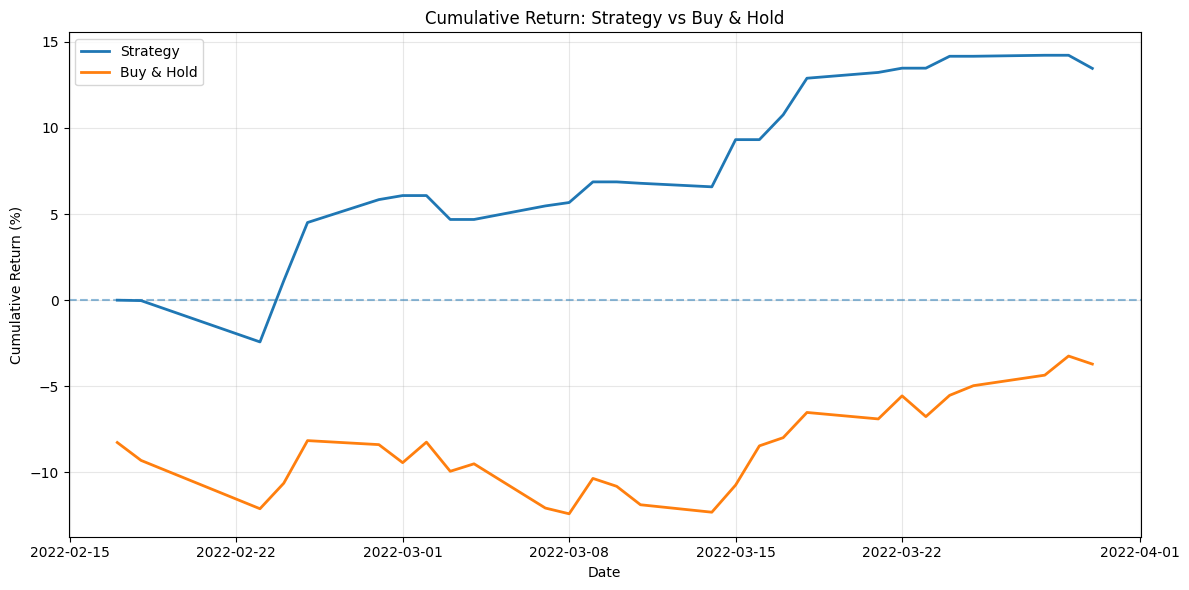


Realtime Chan + XGBoost Integrated Complete
Total test days: 28
Total completed trades: 42
Final strategy cumulative return: 13.46%
Final buy & hold cumulative return: -3.71%


In [ ]:
#from realtime_chan_xgb_integrated import run_realtime_chan_xgb_integrated
from Common.CEnum import KL_TYPE

results = run_realtime_chan_xgb_integrated(
    csv_path="DataAPI/data/SPY_5M.csv",
    code="SPY",
    start_time="2022-01-01",
    end_time="2022-03-31",
    lv=KL_TYPE.K_5M,
    chan_window_size=500,
    train_days_for_model=30,
    threshold_days_for_selection=1,
    min_train_samples=100,
    min_valid_samples=20,
    initial_capital=100_000,
    position_size=1.0,
    transaction_fee_pct=0,
    output_dir="./output/chan_xgb_integrated",
    plot_results=True,
    verbose=True,
)

trades_df = results["trades_df"]
daily_df  = results["daily_results_df"]


Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)
Code: SPY
Period: 2018-07-01 → 2019-07-30
Warm-up trading days (no trading): 30
Initial capital: 100000, Position size: 100%
Transaction fee per side: 0.000%
[🧪] Streaming K-lines into SlidingWindowChan and training per day...
[📈] K-line 0: unique BSP=0, window_start=0, window_size=1

------------------------------------------------------------
[DAY DONE] 2018-07-02 – building dataset & training...
[🔧] Preparing ML dataset...
[✅] Dataset prepared: 33 samples, 80 columns
    [Warmup] Only 0 training days (< 30). No trading on 2018-07-02.
[📈] K-line 265: unique BSP=46, window_start=0, window_size=266

------------------------------------------------------------
[DAY DONE] 2018-07-03 – building dataset & training...
[🔧] Preparing ML dataset...
[✅] Dataset prepared: 67 samples, 80 columns
    [Warmup] Only 1 training days (< 30). No trading on 2018-07-03.
[📈] K-line 354: unique BSP=68, window_start=0, window_size=355
[📈] K-line

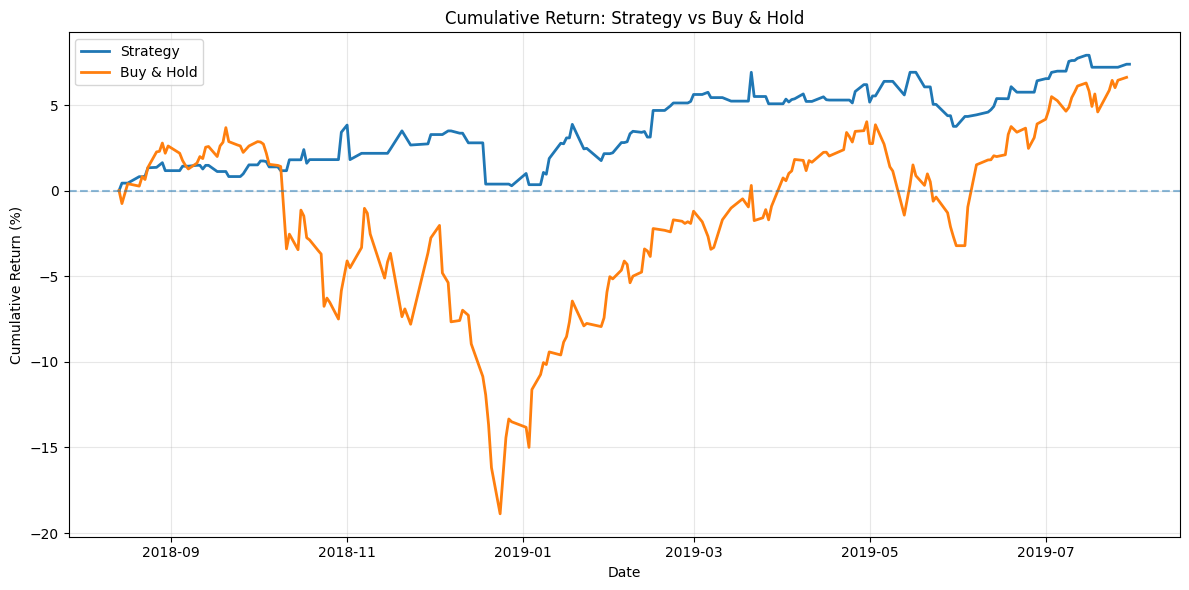


Realtime Chan + XGBoost (ONLINE style, day-by-day) Complete
Total test days: 205
Total completed trades: 147
Final strategy cumulative return: 7.38%
Final buy & hold cumulative return: nan%
           entry_time  entry_price direction           exit_time  exit_price  \
0 2018-08-15 14:05:00       280.76       buy 2018-08-15 15:30:00      281.99   
1 2018-08-21 08:40:00       286.14       buy 2018-08-21 12:55:00      287.22   
2 2018-08-22 14:25:00       286.21       buy 2018-08-22 19:55:00      286.18   
3 2018-08-23 04:15:00       285.94       buy 2018-08-23 15:10:00      286.05   
4 2018-08-24 05:30:00       286.29       buy 2018-08-24 16:40:00      287.68   

          pnl  return_pct   test_date  
0  438.096595    0.438097  2018-08-15  
1  377.437618    0.377438  2018-08-21  
2  -10.481814   -0.010482  2018-08-22  
3   38.469609    0.038470  2018-08-23  
4  485.521674    0.485522  2018-08-24  
         date train_start   train_end  strategy_return  signals  trades  \
0  2018-08-14

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from datetime import timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from DataAPI.csvAPI import CSV_API  # ✅ NEW: we stream K-lines ourselves


# ============================================================
# 1. Labeling: BEST profit target within SAME DAY
# ============================================================

def calculate_profit_targets_best_window(
    bs_points_with_features: list,
    lookahead_days: float = 1.0,
) -> dict:
    """
    For each BSP, find the BEST reverse signal within a configurable time window.

    Parameters
    ----------
    bs_points_with_features : list[dict]
        BSP snapshots, each row must contain:
            - 'timestamp'
            - 'is_buy' (1 for buy, 0 for sell)
            - 'klu_idx'
            - 'klu_close'
    lookahead_days : float
        How many *calendar days* ahead to look for exits.
        - 1.0  => 24 hours (your "24h look period")
        - 0.5  => 12 hours
        - 2.0  => 48 hours, etc.

    Logic
    -----
    BUY BSP:
        - search later SELL BSPs with
              entry_ts < ts <= entry_ts + lookahead_days
        - choose EXIT with MAX klu_close (max profit)

    SELL BSP:
        - search later BUY BSPs within same time window
        - choose EXIT with MIN klu_close (max profit)

    If no reverse BSP within the window => has_profit_target = 0.
    """
    if not bs_points_with_features:
        return {}

    # --- normalize timestamps & sort ---
    enriched = []
    for row in bs_points_with_features:
        ts = row.get("timestamp")
        ts = pd.to_datetime(str(ts))
        new_row = dict(row)
        new_row["_ts"] = ts
        enriched.append(new_row)

    enriched.sort(key=lambda x: x["_ts"])

    profit_targets = {}
    n = len(enriched)

    for i in range(n):
        cur = enriched[i]
        entry_idx = cur["klu_idx"]
        entry_price = cur["klu_close"]
        is_buy = cur["is_buy"]
        entry_ts = cur["_ts"]

        horizon_ts = entry_ts + timedelta(days=lookahead_days)
        best_exit = None

        # scan forward within horizon
        for j in range(i + 1, n):
            future = enriched[j]
            future_ts = future["_ts"]

            # stop if beyond horizon
            if future_ts > horizon_ts:
                break

            # only reverse direction
            if future["is_buy"] == is_buy:
                continue

            if is_buy:
                # BUY -> want SELL with highest price
                if best_exit is None or future["klu_close"] > best_exit["klu_close"]:
                    best_exit = future
            else:
                # SELL -> want BUY with lowest price
                if best_exit is None or future["klu_close"] < best_exit["klu_close"]:
                    best_exit = future

        if best_exit is None:
            profit_targets[entry_idx] = {
                "profit_target_pct": None,
                "profit_target_distance": None,
                "has_profit_target": 0,
                "exit_type": None,
                "exit_klu_idx": None,
                "exit_price": None,
            }
            continue

        exit_price = best_exit["klu_close"]
        if is_buy:
            profit_pct = (exit_price - entry_price) / entry_price * 100.0
        else:
            profit_pct = (entry_price - exit_price) / entry_price * 100.0

        profit_targets[entry_idx] = {
            "profit_target_pct": profit_pct,
            "profit_target_distance": best_exit["klu_idx"] - entry_idx,
            "has_profit_target": 1,
            "exit_type": f"best_within_{lookahead_days}d",
            "exit_klu_idx": best_exit["klu_idx"],
            "exit_price": exit_price,
        }

    return profit_targets

# ============================================================
# 2. Dataset preparation (no future leak in FEATURES)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare BSP dataset for ML:

    - Impute numeric & binary columns
    - Encode 'direction' as categorical if present
    - Replace inf with nan then 0
    """
    if df.empty:
        return df

    print("[🔧] Preparing ML dataset...")

    # Columns considered binary flags
    binary_cols = [
        col for col in df.columns
        if col.endswith(("_signal", "_oversold", "_overbought", "_positive", "_up", "_trend_up"))
    ]
    # extend explicit binary
    for col in ["is_buy", "is_bullish_candle", "has_profit_target"]:
        if col in df.columns:
            binary_cols.append(col)
    binary_cols = sorted(set(binary_cols))

    # numeric columns (excluding pure binary if you like, but it's ok to keep)
    numeric_cols = [
        col for col in df.select_dtypes(include=[np.number]).columns
        if col not in []  # (keep all numeric for now)
    ]

    # Impute numeric
    if numeric_cols:
        num_imputer = SimpleImputer(strategy="mean")
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Impute binary (if exists)
    if binary_cols:
        existing_binary = [c for c in binary_cols if c in df.columns]
        if existing_binary:
            bin_imputer = SimpleImputer(strategy="most_frequent")
            df[existing_binary] = bin_imputer.fit_transform(df[existing_binary])

    # Categorical: only 'direction' here
    if "direction" in df.columns:
        df["direction"] = df["direction"].fillna("unknown").astype(str)
        le = LabelEncoder()
        df["direction_encoded"] = le.fit_transform(df["direction"])

    # Replace infinities then re-impute numeric as 0 on leftover nans
    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0.0)

    print(f"[✅] Dataset prepared: {len(df)} samples, {len(df.columns)} columns")
    return df


# ============================================================
# 3. Feature selection & threshold optimization
# ============================================================

def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    """
    Choose feature columns from BSP dataset, excluding:
      - timestamps, IDs, explicit labels
      - exit_* fields, etc.
    """
    exclude_patterns = [
        "timestamp",
        "bsp_type",
        "snapshot_",
        "exit_",
        "klu_idx",
        "date",
    ]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
        "price_change_pct",
        "direction",  # keep encoded version only
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)
    # prefer encoded direction if available
    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")
    return sorted(cols)


def optimize_thresholds_with_fee(signals_df: pd.DataFrame,
                                 transaction_fee_pct: float,
                                 min_trades: int = 5) -> tuple:
    """
    Grid search thresholds using *realized* profit_target_pct
    (works only on past days with labels).

    We separate buy/sell BSPs, scan thresholds on predicted_profit_pct,
    and choose the pair that maximizes average net return after fees.
    """
    if len(signals_df) == 0:
        return 0.0, 0.0

    if "profit_target_pct" not in signals_df.columns:
        print("[⚠️] optimize_thresholds_with_fee: missing profit_target_pct, using 0/0 thresholds.")
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)  # you can tune this range
    best_score = -1e9
    best_bt = 0.0
    best_st = 0.0
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            val_b = buy_df[buy_df["predicted_profit_pct"] >= bt]
            val_s = sell_df[sell_df["predicted_profit_pct"] >= st]

            n_b, n_s = len(val_b), len(val_s)
            tot = n_b + n_s
            if tot < min_trades:
                continue

            b_ret = (val_b["profit_target_pct"] - roundtrip_fee_pct).mean() if n_b > 0 else 0.0
            s_ret = (val_s["profit_target_pct"] - roundtrip_fee_pct).mean() if n_s > 0 else 0.0

            combined = (n_b * b_ret + n_s * s_ret) / tot

            if combined > best_score:
                best_score = combined
                best_bt = bt
                best_st = st

    return best_bt, best_st


# ============================================================
# 4. Per-day backtest (intraday BSP execution)
# ============================================================

def backtest_one_day_signals(signals_df: pd.DataFrame,
                             buy_threshold: float,
                             sell_threshold: float,
                             initial_capital: float,
                             position_size: float,
                             transaction_fee_pct: float,
                             verbose: bool = False):
    """
    Intraday backtest using BSP signals with predicted_profit_pct.

    Simple one-position strategy:
      - Only one position at a time.
      - BUY BSP opens, SELL BSP closes (if thresholds passed).
    """
    if len(signals_df) == 0:
        return {
            "final_value": initial_capital,
            "return_pct": 0.0,
            "trades": 0,
            "win_rate": 0.0,
            "signals": 0,
            "buy_signals": 0,
            "sell_signals": 0,
        }, []

    df = signals_df.sort_values("timestamp").reset_index(drop=True)

    cash = initial_capital
    shares = 0.0
    entry_price = None
    entry_time = None
    trades = []
    per_side_fee = transaction_fee_pct

    def open_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        trade_cap = cash * position_size
        if trade_cap <= 0:
            return False
        effective_capital = trade_cap * (1 - per_side_fee)
        shares = effective_capital / price
        cash -= trade_cap
        entry_price = price
        entry_time = time_
        trades.append({
            "entry_time": time_,
            "entry_price": price,
            "direction": "buy",
        })
        if verbose:
            print(f"[TRADE] BUY at {time_} | price = {price:.4f}")
        return True

    def close_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        if shares <= 0:
            return
        gross_exit = shares * price
        net_exit = gross_exit * (1 - per_side_fee)
        trade_cap = shares * entry_price if entry_price is not None else 0.0
        pnl = net_exit - trade_cap
        ret_pct = (pnl / trade_cap * 100) if trade_cap > 0 else 0.0
        cash += net_exit
        if trades:
            trades[-1].update({
                "exit_time": time_,
                "exit_price": price,
                "pnl": pnl,
                "return_pct": ret_pct,
            })
        if verbose:
            print(
                f"[TRADE] SELL at {time_} | price = {price:.4f} | "
                f"trade return = {ret_pct:.2f}%"
            )
        shares = 0.0
        entry_price = None
        entry_time = None

    for _, row in df.iterrows():
        ts = row["timestamp"]
        price = row["klu_close"]
        pred = row["predicted_profit_pct"]
        direction = row["direction"]

        if direction == "buy":
            if shares == 0 and pred >= buy_threshold:
                open_position(price, ts)
        elif direction == "sell":
            if shares > 0 and pred >= sell_threshold:
                close_position(price, ts)

    if shares > 0:
        last_row = df.iloc[-1]
        close_position(last_row["klu_close"], last_row["timestamp"])

    final_value = cash
    ret_pct = (final_value / initial_capital - 1) * 100 if initial_capital > 0 else 0.0
    completed = [t for t in trades if "exit_price" in t]
    win_trades = [t for t in completed if t.get("return_pct", 0) > 0]
    win_rate = (len(win_trades) / len(completed) * 100) if completed else 0.0

    buy_signals = (df["direction"] == "buy").sum()
    sell_signals = (df["direction"] == "sell").sum()

    result = {
        "final_value": final_value,
        "return_pct": ret_pct,
        "trades": len(completed),
        "win_rate": win_rate,
        "signals": len(df),
        "buy_signals": buy_signals,
        "sell_signals": sell_signals,
    }
    if verbose:
        print(
            f"    Day summary: trades={len(completed)}, "
            f"win_rate={win_rate:.1f}%, day_return={ret_pct:.2f}%"
        )
    return result, trades


# ============================================================
# 5. Buy & Hold benchmark
# ============================================================

def calc_buy_hold_daily(csv_path: str,
                        start_time: str,
                        end_time: str) -> pd.DataFrame:
    """
    Compute daily open/close and cumulative return for Buy&Hold from raw kline CSV.
    """
    raw = pd.read_csv(csv_path)

    # Detect timestamp column
    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        first_col = raw.columns[0]
        raw["timestamp"] = pd.to_datetime(raw[first_col], errors="coerce")

    raw = raw.dropna(subset=["timestamp"])

    # Detect close column
    close_col = None
    for c in ["close", "Close", "adj_close", "Adj Close", "AdjClose"]:
        if c in raw.columns:
            close_col = c
            break
    if close_col is None:
        # fallback: any column ending with 'close'
        for c in raw.columns:
            if c.lower().endswith("close"):
                close_col = c
                break
    if close_col is None:
        raise ValueError("Could not find a close column in CSV.")

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw[mask].copy()

    raw["date"] = raw["timestamp"].dt.date
    daily = raw.groupby("date")[close_col].agg(["first", "last"])
    if daily.empty:
        return pd.DataFrame(columns=["date", "open", "close", "return_pct", "cum_return_pct"])

    daily.rename(columns={"first": "open", "last": "close"}, inplace=True)
    daily["return_pct"] = (daily["close"] / daily["open"] - 1) * 100.0
    first_price = daily["open"].iloc[0]
    daily["cum_return_pct"] = (daily["close"] / first_price - 1) * 100.0

    return daily.reset_index().rename(columns={"date": "date"})

def _build_dataset_from_snapshots(
    all_bsp_snapshots: list,
    label_lookahead_days: float = 1.0,   # ✅ new parameter
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    From the accumulated BSP snapshots (up to 'now'), compute:
      - best profit labels within a configurable time window
      - a full BSP DataFrame (bsp_df)
      - a labeled subset (bsp_valid: has_profit_target == 1)

    label_lookahead_days controls how far we look for exits (24h, 48h, etc.).
    """
    if not all_bsp_snapshots:
        return pd.DataFrame(), pd.DataFrame()

    # 1) Label with best exits within N-day horizon
    profit_targets = calculate_profit_targets_best_window(
        all_bsp_snapshots,
        lookahead_days=label_lookahead_days,
    )
    for row in all_bsp_snapshots:
        idx = row["klu_idx"]
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row["profit_target_pct"] = None
            row["profit_target_distance"] = None
            row["has_profit_target"] = 0
            row["exit_type"] = None
            row["exit_klu_idx"] = None
            row["exit_price"] = None

    # 2) Build DataFrame & time columns (same as before)
    bsp_df_raw = (
        pd.DataFrame(all_bsp_snapshots)
        .sort_values("klu_idx")
        .reset_index(drop=True)
    )
    bsp_df_raw["timestamp"] = bsp_df_raw["timestamp"].apply(
        lambda t: pd.to_datetime(str(t))
    )
    bsp_df_raw["date"] = bsp_df_raw["timestamp"].dt.date

    # 3) Prepare ML dataset
    bsp_df = prepare_ml_dataset(bsp_df_raw.copy())

    # 4) Labeled subset
    if "has_profit_target" in bsp_df.columns:
        bsp_valid = (
            bsp_df[bsp_df["has_profit_target"] == 1]
            .copy()
            .sort_values("timestamp")
        )
    else:
        bsp_valid = pd.DataFrame()

    return bsp_df, bsp_valid


# ============================================================
# 6. Main: ONLINE-style walk-forward with 2-month warm-up
#     (now feeding K-lines into SlidingWindowChan.process_new_kline)
# ============================================================

def run_realtime_chan_xgb_same_day_online(
    csv_path: str,
    code: str = "SPY",
    start_time: str = "2022-01-01",
    end_time: str = "2022-03-31",
    lv: KL_TYPE = KL_TYPE.K_5M,
    chan_window_size: int = 1000,
    warmup_trading_days: int = 40,          # ≈2 months
    threshold_days_for_selection: int = 3,  # last N days for threshold tuning
    min_train_samples: int = 100,
    min_valid_samples: int = 20,
    initial_capital: float = 100_000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.001,
    output_dir: str = "./output/chan_xgb_online",
    plot_results: bool = True,
    verbose: bool = True,
    xgb_train_days: int | None = None,
    label_lookahead_days: float = 1.0,
):
    """
    ONE-PASS version:

    - Stream K-lines from CSV_API.
    - Feed every K-line into SlidingWindowChan.process_new_kline().
    - Accumulate BSP snapshots in all_bsp_snapshots.
    - At each *day boundary*:
        - Build dataset from all BSP up to that day (no future days involved).
        - Train XGBoost on PREVIOUS labeled days (respecting warm-up).
        - Tune thresholds on last N training days.
        - Backtest the just-finished day using the models and thresholds.

    So Chan + XGBoost + backtest are interleaved per day, not in separate phases.
    """
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 80)
    print("Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)")
    print("=" * 80)
    print(f"Code: {code}")
    print(f"Period: {start_time} → {end_time}")
    print(f"Warm-up trading days (no trading): {warmup_trading_days}")
    print(f"Initial capital: {initial_capital}, Position size: {position_size*100:.0f}%")
    print(f"Transaction fee per side: {transaction_fee_pct*100:.3f}%")
    print("=" * 80)

    # ---------------- Chan config & SlidingWindowChan ----------------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,       # we stream manually
        end_time=None,
        data_src=None,         # not using internal loader
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    # ---------------- Stream K-lines from CSV_API ----------------
    csv_api = CSV_API(
        code=code,
        k_type=lv,
        begin_date=start_time,
        end_date=end_time,
        autype=AUTYPE.QFQ,
    )

    from datetime import datetime as _dt

    all_bsp_snapshots = []   # all BSP snapshots up to "now"
    daily_results = []       # result per test day
    all_trades = []          # all trades from all test days

    current_day = None
    last_ts = None
    last_price = None

    # To compute Buy&Hold later
    all_dates_seen = set()

    # ------------- inner helper: finalize a completed day -------------
    def finalize_day(finished_day, all_bsp_snapshots_local):
        """
        Called when we've just finished streaming all K-lines for `finished_day`.
        We:
          - build dataset from all BSP up to this moment,
          - decide if we can train,
          - if yes, train XGBoost and backtest this finished_day.
        """
        nonlocal daily_results, all_trades

        print(f"\n{'-'*60}")
        print(f"[DAY DONE] {finished_day} – building dataset & training...")

        bsp_df, bsp_valid = _build_dataset_from_snapshots(
            all_bsp_snapshots_local,
            label_lookahead_days=label_lookahead_days,   # <== 记得传参
        )

        if bsp_df.empty or bsp_valid.empty:
            if verbose:
                print("    [Info] No labeled BSPs yet, skipping this day.")
            return bsp_df  # still return last snapshot of dataset
        # unique labeled days up to now
        labeled_days = np.sort(bsp_valid["date"].unique())
        if finished_day not in labeled_days:
            if verbose:
                print("    [Info] No labeled BSPs for this day itself, skipping.")
            return bsp_df

        # training days must be strictly BEFORE finished_day
                # training days must be strictly BEFORE finished_day
        all_prior_days = [d for d in labeled_days if d < finished_day]

        # Warm-up：必须先有足够「prior days」
        if len(all_prior_days) < warmup_trading_days:
            if verbose:
                print(
                    f"    [Warmup] Only {len(all_prior_days)} training days "
                    f"(< {warmup_trading_days}). No trading on {finished_day}."
                )
            return bsp_df

        # 如果设置了 xgb_train_days，就从 all_prior_days 里截取最近这几天作为「可用样本池」
        if xgb_train_days is not None and len(all_prior_days) > xgb_train_days:
            candidate_days = all_prior_days[-xgb_train_days:]
        else:
            candidate_days = all_prior_days

        # 从 candidate_days 的最后 N 天拿出来做 threshold days
        if len(candidate_days) <= threshold_days_for_selection:
            thr_days = candidate_days[:]          # 全部拿去做 threshold
            train_days = []                      # 剩下的训练天为空
        else:
            thr_days = candidate_days[-threshold_days_for_selection:]
            train_days = candidate_days[:-threshold_days_for_selection]

        if verbose:
            print(f"    Candidate days: {candidate_days[0]} → {candidate_days[-1]} ({len(candidate_days)})")
            if train_days:
                print(f"    Train days:    {train_days[0]} → {train_days[-1]} ({len(train_days)})")
            else:
                print(f"    Train days:    [NONE; all used as threshold days]")
            print(f"    Threshold days:{thr_days[0]} → {thr_days[-1]} ({len(thr_days)})")

        # 如果阈值天被剔除后，没有训练天了，就没法训练模型，直接跳过这个 test day
        if len(train_days) == 0:
            if verbose:
                print("    [Skip] No remaining train days after excluding threshold days.")
            return bsp_df
        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()
        test_df = bsp_df[bsp_df["date"] == finished_day].copy()  # BSPs of the finished day

        if len(train_df) < min_train_samples or len(thr_df) < min_valid_samples:
            if verbose:
                print("    [Skip] Not enough samples for train/threshold.")
            return bsp_df

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 10 or len(train_sell) < 10:
            if verbose:
                print("    [Skip] Not enough buy/sell samples.")
            return bsp_df

        feature_cols = get_feature_columns(train_df, target_col="profit_target_pct")
        if verbose:
            print(f"    [🧬] Using {len(feature_cols)} feature columns.")

        X_train_buy = train_buy[feature_cols].values
        y_train_buy = train_buy["profit_target_pct"].values
        X_train_sell = train_sell[feature_cols].values
        y_train_sell = train_sell["profit_target_pct"].values

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 150,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)

        buy_model.fit(X_train_buy, y_train_buy)
        sell_model.fit(X_train_sell, y_train_sell)

        print(
            f"[MODEL] {finished_day} | XGBoost trained on "
            f"buy={len(train_buy)} / sell={len(train_sell)} samples"
        )

        # Threshold tuning on past days
        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy) > 0:
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell) > 0:
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)

        buy_th, sell_th = optimize_thresholds_with_fee(
            thr_signals,
            transaction_fee_pct=transaction_fee_pct,
            min_trades=5,
        )
        if verbose:
            print(f"    [Thresholds] Buy={buy_th:.2f}%, Sell={sell_th:.2f}%")

        # Backtest the finished day using only that day's BSPs
        test_buy = test_df[test_df["direction"] == "buy"].copy()
        test_sell = test_df[test_df["direction"] == "sell"].copy()
        if len(test_buy) > 0:
            test_buy["predicted_profit_pct"] = buy_model.predict(test_buy[feature_cols].values)
        if len(test_sell) > 0:
            test_sell["predicted_profit_pct"] = sell_model.predict(test_sell[feature_cols].values)
        test_signals = pd.concat([test_buy, test_sell], ignore_index=True)

        if len(test_signals) == 0:
            if verbose:
                print("    [Info] No BSP signals on test day.")
            return bsp_df

        bt_res, trades = backtest_one_day_signals(
            test_signals,
            buy_threshold=buy_th,
            sell_threshold=sell_th,
            initial_capital=initial_capital,
            position_size=position_size,
            transaction_fee_pct=transaction_fee_pct,
            verbose=verbose,
        )

        for t in trades:
            t["test_date"] = finished_day
        all_trades.extend(trades)

        daily_results.append({
            "date": finished_day,
            "train_start": train_days[0],
            "train_end": train_days[-1],
            "strategy_return": bt_res["return_pct"],
            "signals": bt_res["signals"],
            "trades": bt_res["trades"],
            "win_rate": bt_res["win_rate"],
            "buy_threshold": buy_th,
            "sell_threshold": sell_th,
        })

        return bsp_df  # return last dataset snapshot for final export

    # ---------------- main streaming loop ----------------
    print("[🧪] Streaming K-lines into SlidingWindowChan and training per day...")
    from datetime import datetime as _dt
    last_log = _dt.now()
    bsp_df_final = pd.DataFrame()  # last snapshot, for return / CSV

    for klu_idx, klu in enumerate(csv_api.get_kl_data()):
        # basic metadata for Chan
        klu.kl_type = lv
        klu.set_idx(klu_idx)

        raw_ts = klu.time
        ts = pd.to_datetime(str(raw_ts))  # ✅ always via string
        d = ts.date()
        all_dates_seen.add(d)

        # Day rollover?
        if current_day is None:
            current_day = d
        elif d != current_day:
            # We've just finished current_day
            bsp_df_final = finalize_day(current_day, all_bsp_snapshots)
            current_day = d  # start new day

        # Process this K-line through Chan
        window_chan, new_bsp_list = chan.process_new_kline(klu)

        # Accumulate BSP snapshots
        if new_bsp_list:
            all_bsp_snapshots.extend(new_bsp_list)

        # For logging
        now = _dt.now()
        if klu_idx % 500 == 0 or (now - last_log).total_seconds() > 5:
            stats = chan.get_stats()
            print(
                f"[📈] K-line {klu_idx}: unique BSP={stats['unique_bsp_count']}, "
                f"window_start={stats['window_start_idx']}, "
                f"window_size={stats['current_window_size']}"
            )
            last_log = now

        last_ts = ts
        last_price = klu.close

    # After loop: finalize the last day
    if current_day is not None and all_bsp_snapshots:
        bsp_df_final = finalize_day(current_day, all_bsp_snapshots)

    # ---------------- Build daily_results_df & benchmark ----------------
    if len(daily_results) == 0:
        print("[❌] No valid daily trading results (warm-up might be too long).")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df_final,
            "bh_df": pd.DataFrame(),
        }

    daily_results_df = (
        pd.DataFrame(daily_results)
        .sort_values("date")
        .reset_index(drop=True)
    )

    # Buy & Hold benchmark (full period)
    bh_df = calc_buy_hold_daily(csv_path, start_time, end_time)

    if not bh_df.empty:
        # Map original buy&hold cumulative returns to the test days
        bh_map = bh_df.set_index("date")["cum_return_pct"].to_dict()
        daily_results_df["buy_hold_cum_return"] = daily_results_df["date"].map(bh_map)
    else:
        daily_results_df["buy_hold_cum_return"] = np.nan

    # Strategy cumulative return (unchanged formula)
    daily_results_df["strategy_cum_return"] = (
        1 + daily_results_df["strategy_return"] / 100.0
    ).cumprod() * 100.0 - 100.0

    # 🔁 Rebase BOTH curves so the first test day is 0%
    if not daily_results_df.empty:
        # Strategy
        first_strat = daily_results_df["strategy_cum_return"].iloc[0]
        daily_results_df["strategy_cum_return"] = (
            daily_results_df["strategy_cum_return"] - first_strat
        )

        # Buy & Hold (only if it exists)
        if daily_results_df["buy_hold_cum_return"].notna().any():
            first_bh = daily_results_df["buy_hold_cum_return"].dropna().iloc[0]
            daily_results_df["buy_hold_cum_return"] = (
                daily_results_df["buy_hold_cum_return"] - first_bh
            )


    # Plot
    if plot_results and not daily_results_df.empty:
        plt.figure(figsize=(12, 6))
        dates = pd.to_datetime(daily_results_df["date"])
        plt.plot(dates, daily_results_df["strategy_cum_return"], label="Strategy", linewidth=2)
        if "buy_hold_cum_return" in daily_results_df.columns:
            plt.plot(dates, daily_results_df["buy_hold_cum_return"], label="Buy & Hold", linewidth=2)
        plt.axhline(0, linestyle="--", alpha=0.5)
        plt.title("Cumulative Return: Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return (%)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    trades_df = pd.DataFrame(all_trades)

    if verbose:
        print("\n" + "=" * 80)
        print("Realtime Chan + XGBoost (ONLINE style, day-by-day) Complete")
        print("=" * 80)
        print(f"Total test days: {len(daily_results_df)}")
        print(f"Total completed trades: {len(trades_df)}")
        if "strategy_cum_return" in daily_results_df.columns:
            print(f"Final strategy cumulative return: "
                  f"{daily_results_df['strategy_cum_return'].iloc[-1]:.2f}%")
        if "buy_hold_cum_return" in daily_results_df.columns:
            print(f"Final buy & hold cumulative return: "
                  f"{daily_results_df['buy_hold_cum_return'].iloc[-1]:.2f}%")
        print("=" * 80)

    # Save CSVs
    daily_results_df.to_csv(os.path.join(output_dir, "daily_results_online.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades_online.csv"), index=False)
    if not bsp_df_final.empty:
        bsp_df_final.to_csv(os.path.join(output_dir, "bsp_dataset_used_online.csv"), index=False)

    return {
        "daily_results_df": daily_results_df,
        "trades_df": trades_df,
        "bsp_df": bsp_df_final,
        "bh_df": bh_df,
    }



if __name__ == "__main__":
    from Common.CEnum import KL_TYPE

    results = run_realtime_chan_xgb_same_day_online(
        csv_path="DataAPI/data/SPY_5M.csv",
        code="SPY",
        start_time="2018-07-01",
        end_time="2019-07-30",
        lv=KL_TYPE.K_5M,
        chan_window_size=500,
        warmup_trading_days=30,
        threshold_days_for_selection=2,
        min_train_samples=100,
        min_valid_samples=20,
        initial_capital=100_000,
        position_size=1.0,
        transaction_fee_pct=0,
        output_dir="./output/chan_xgb_online",
        plot_results=True,
        verbose=True,
        xgb_train_days=30,
        label_lookahead_days=2.0,
    )

    trades_df = results["trades_df"]
    daily_df = results["daily_results_df"]
    print(trades_df.head())
    print(daily_df.head())


Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)
Code: QQQ
Period: 2023-01-01 → 2023-12-30
Warm-up trading days (no trading): 30
Initial capital: 100000, Position size: 100%
Transaction fee per side: 0.000%
Label lookahead days: 2.0
Stop loss pct: 3.0
Market regime: strong_bullish
[🧪] Streaming K-lines into SlidingWindowChan and training per day...
[📈] K-line 0: unique BSP=0, window_start=0, window_size=1

------------------------------------------------------------
[DAY DONE] 2023-01-03 – building dataset & training...
[🔧] Preparing ML dataset...
[✅] Dataset prepared: 22 samples, 76 columns
    [Warmup] Only 0 training days (< 30). No trading on 2023-01-03.
[📈] K-line 279: unique BSP=32, window_start=0, window_size=280

------------------------------------------------------------
[DAY DONE] 2023-01-04 – building dataset & training...
[🔧] Preparing ML dataset...
[✅] Dataset prepared: 42 samples, 80 columns
    [Warmup] Only 1 training days (< 30). No trading on 2023-01-04

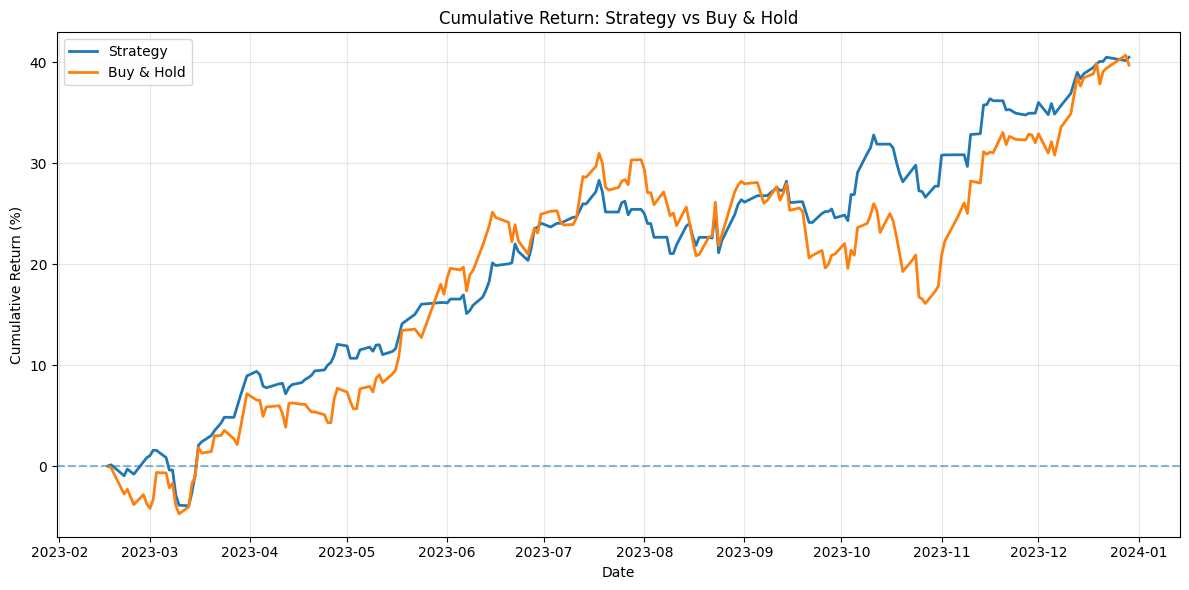


Realtime Chan + XGBoost (ONLINE style, day-by-day) Complete
Total test days: 202
Total completed trades: 219
Final strategy cumulative return: 40.51%
Final buy & hold cumulative return: 39.73%
           entry_time  entry_price direction   test_date           exit_time  \
0 2023-02-16 15:15:00       305.24       buy  2023-02-16                 NaT   
1 2023-02-17 04:00:00       300.51       buy  2023-02-17                 NaT   
2 2023-02-21 09:25:00       297.27       buy  2023-02-21                 NaT   
3 2023-02-22 04:30:00       293.87       buy  2023-02-22 2023-02-22 19:05:00   
4 2023-02-24 08:30:00       292.69       buy  2023-02-24 2023-02-24 11:15:00   

   exit_price         pnl  return_pct exit_reason  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3      295.87  680.573043    0.680573      signal  
4      290.79 -649.150979   -0.649151      signal  
         date

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from datetime import timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from DataAPI.csvAPI import CSV_API  # ✅ we stream K-lines ourselves


# ============================================================
# 1. Labeling: BEST profit target within configurable window
# ============================================================

def calculate_profit_targets_best_window(
    bs_points_with_features: list,
    lookahead_days: float = 1.0,
) -> dict:
    """
    For each BSP, find the BEST reverse signal within a configurable time window.

    Parameters
    ----------
    bs_points_with_features : list[dict]
        BSP snapshots, each row must contain:
            - 'timestamp'
            - 'is_buy' (1 for buy, 0 for sell)
            - 'klu_idx'
            - 'klu_close'
    lookahead_days : float
        How many *calendar days* ahead to look for exits.
        - 1.0  => 24 hours
        - 0.5  => 12 hours
        - 2.0  => 48 hours, etc.

    Logic
    -----
    BUY BSP:
        - search later SELL BSPs with
              entry_ts < ts <= entry_ts + lookahead_days
        - choose EXIT with MAX klu_close (max profit)

    SELL BSP:
        - search later BUY BSPs within same time window
        - choose EXIT with MIN klu_close (max profit)

    If no reverse BSP within the window => has_profit_target = 0.
    """
    if not bs_points_with_features:
        return {}

    # --- normalize timestamps & sort ---
    enriched = []
    for row in bs_points_with_features:
        ts = row.get("timestamp")
        ts = pd.to_datetime(str(ts))
        new_row = dict(row)
        new_row["_ts"] = ts
        enriched.append(new_row)

    enriched.sort(key=lambda x: x["_ts"])

    profit_targets = {}
    n = len(enriched)

    for i in range(n):
        cur = enriched[i]
        entry_idx = cur["klu_idx"]
        entry_price = cur["klu_close"]
        is_buy = cur["is_buy"]
        entry_ts = cur["_ts"]

        horizon_ts = entry_ts + timedelta(days=lookahead_days)
        best_exit = None

        # scan forward within horizon
        for j in range(i + 1, n):
            future = enriched[j]
            future_ts = future["_ts"]

            # stop if beyond horizon
            if future_ts > horizon_ts:
                break

            # only reverse direction
            if future["is_buy"] == is_buy:
                continue

            if is_buy:
                # BUY -> want SELL with highest price
                if best_exit is None or future["klu_close"] > best_exit["klu_close"]:
                    best_exit = future
            else:
                # SELL -> want BUY with lowest price
                if best_exit is None or future["klu_close"] < best_exit["klu_close"]:
                    best_exit = future

        if best_exit is None:
            profit_targets[entry_idx] = {
                "profit_target_pct": None,
                "profit_target_distance": None,
                "has_profit_target": 0,
                "exit_type": None,
                "exit_klu_idx": None,
                "exit_price": None,
            }
            continue

        exit_price = best_exit["klu_close"]
        if is_buy:
            profit_pct = (exit_price - entry_price) / entry_price * 100.0
        else:
            profit_pct = (entry_price - exit_price) / entry_price * 100.0

        profit_targets[entry_idx] = {
            "profit_target_pct": profit_pct,
            "profit_target_distance": best_exit["klu_idx"] - entry_idx,
            "has_profit_target": 1,
            "exit_type": f"best_within_{lookahead_days}d",
            "exit_klu_idx": best_exit["klu_idx"],
            "exit_price": exit_price,
        }

    return profit_targets


# ============================================================
# 2. Dataset preparation (no future leak in FEATURES)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare BSP dataset for ML:

    - Impute numeric & binary columns
    - Encode 'direction' as categorical if present
    - Replace inf with nan then 0
    """
    if df.empty:
        return df

    print("[🔧] Preparing ML dataset...")

    # Columns considered binary flags
    binary_cols = [
        col for col in df.columns
        if col.endswith(("_signal", "_oversold", "_overbought", "_positive", "_up", "_trend_up"))
    ]
    # extend explicit binary
    for col in ["is_buy", "is_bullish_candle", "has_profit_target"]:
        if col in df.columns:
            binary_cols.append(col)
    binary_cols = sorted(set(binary_cols))

    # numeric columns
    numeric_cols = [
        col for col in df.select_dtypes(include=[np.number]).columns
        if col not in []  # keep all numeric for now
    ]

    # Impute numeric
    if numeric_cols:
        num_imputer = SimpleImputer(strategy="mean")
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Impute binary (if exists)
    if binary_cols:
        existing_binary = [c for c in binary_cols if c in df.columns]
        if existing_binary:
            bin_imputer = SimpleImputer(strategy="most_frequent")
            df[existing_binary] = bin_imputer.fit_transform(df[existing_binary])

    # Categorical: only 'direction' here
    if "direction" in df.columns:
        df["direction"] = df["direction"].fillna("unknown").astype(str)
        le = LabelEncoder()
        df["direction_encoded"] = le.fit_transform(df["direction"])

    # Replace infinities then re-impute numeric as 0 on leftover nans
    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0.0)

    print(f"[✅] Dataset prepared: {len(df)} samples, {len(df.columns)} columns")
    return df


# ============================================================
# 3. Feature selection & threshold optimization
# ============================================================

def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    """
    Choose feature columns from BSP dataset, excluding:
      - timestamps, IDs, explicit labels
      - exit_* fields, etc.
    """
    exclude_patterns = [
        "timestamp",
        "bsp_type",
        "snapshot_",
        "exit_",
        "klu_idx",
        "date",
    ]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
        "price_change_pct",
        "direction",  # keep encoded version only
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)
    # prefer encoded direction if available
    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")
    return sorted(cols)


def optimize_thresholds_with_fee(signals_df: pd.DataFrame,
                                 transaction_fee_pct: float,
                                 min_trades: int = 5) -> tuple:
    """
    Grid search thresholds using *realized* profit_target_pct
    (works only on past days with labels).

    We separate buy/sell BSPs, scan thresholds on predicted_profit_pct,
    and choose the pair that maximizes average net return after fees.
    """
    if len(signals_df) == 0:
        return 0.0, 0.0

    if "profit_target_pct" not in signals_df.columns:
        print("[⚠️] optimize_thresholds_with_fee: missing profit_target_pct, using 0/0 thresholds.")
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)  # tune as needed
    best_score = -1e9
    best_bt = 0.0
    best_st = 0.0
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            val_b = buy_df[buy_df["predicted_profit_pct"] >= bt]
            val_s = sell_df[sell_df["predicted_profit_pct"] >= st]

            n_b, n_s = len(val_b), len(val_s)
            tot = n_b + n_s
            if tot < min_trades:
                continue

            b_ret = (val_b["profit_target_pct"] - roundtrip_fee_pct).mean() if n_b > 0 else 0.0
            s_ret = (val_s["profit_target_pct"] - roundtrip_fee_pct).mean() if n_s > 0 else 0.0

            combined = (n_b * b_ret + n_s * s_ret) / tot

            if combined > best_score:
                best_score = combined
                best_bt = bt
                best_st = st

    return best_bt, best_st


# ============================================================
# 3.5. Market regime adjustment for thresholds
# ============================================================

def apply_market_regime_adjustment(buy_th: float,
                                   sell_th: float,
                                   regime: str = "neutral",
                                   base_shift: float = 0.25) -> tuple[float, float]:
    """
    Adjust thresholds based on discretionary market regime.

    Parameters
    ----------
    buy_th, sell_th : float
        Original thresholds from optimize_thresholds_with_fee (in % predicted profit).
    regime : str
        One of: "neutral", "bullish", "strong_bullish",
                "bearish", "strong_bearish"
    base_shift : float
        The basic shift magnitude in percentage points.

    Returns
    -------
    (adj_buy_th, adj_sell_th)
    """
    regime = (regime or "neutral").lower()

    if regime == "neutral":
        d_buy = 0.0
        d_sell = 0.0
    elif regime == "bullish":
        d_buy = -base_shift          # easier to buy
        d_sell = +base_shift / 2.0   # slightly harder to sell
    elif regime == "strong_bullish":
        d_buy = -2 * base_shift
        d_sell = +base_shift
    elif regime == "bearish":
        d_buy = +base_shift          # harder to buy
        d_sell = -base_shift / 2.0   # easier to sell
    elif regime == "strong_bearish":
        d_buy = +2 * base_shift
        d_sell = -base_shift
    else:
        # unknown regime -> no adjustment
        d_buy = 0.0
        d_sell = 0.0

    adj_buy = buy_th + d_buy
    adj_sell = sell_th + d_sell

    # clamp to reasonable range
    adj_buy = max(-1.0, min(4.0, adj_buy))
    adj_sell = max(-1.0, min(4.0, adj_sell))

    return adj_buy, adj_sell


# ============================================================
# 4. Per-day backtest (intraday BSP execution) + Stop-loss
# ============================================================

def backtest_one_day_signals(signals_df: pd.DataFrame,
                             buy_threshold: float,
                             sell_threshold: float,
                             initial_capital: float,
                             position_size: float,
                             transaction_fee_pct: float,
                             stop_loss_pct: float | None = None,
                             verbose: bool = False):
    """
    Intraday backtest using BSP signals with predicted_profit_pct.

    Simple one-position strategy:
      - Only one long position at a time.
      - BUY BSP opens, SELL BSP closes (if thresholds passed).
      - Optional stop loss based on % loss from entry price.

    stop_loss_pct:
      - If None: no stop loss
      - If 2.0: close position when return <= -2% from entry

    IMPORTANT CHANGE:
      - We DO NOT force closing at end-of-day anymore.
      - We mark-to-market open positions: final_value = cash + shares * last_price.
      - Open trades with no exit are left in the trades list without exit_time/exit_price.
    """
    if len(signals_df) == 0:
        return {
            "final_value": initial_capital,
            "return_pct": 0.0,
            "trades": 0,
            "win_rate": 0.0,
            "signals": 0,
            "buy_signals": 0,
            "sell_signals": 0,
        }, []

    df = signals_df.sort_values("timestamp").reset_index(drop=True)

    cash = initial_capital
    shares = 0.0
    entry_price = None
    entry_time = None
    trades = []
    per_side_fee = transaction_fee_pct
    last_price_in_day = None  # for mark-to-market

    def open_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        trade_cap = cash * position_size
        if trade_cap <= 0:
            return False
        effective_capital = trade_cap * (1 - per_side_fee)
        shares = effective_capital / price
        cash -= trade_cap
        entry_price = price
        entry_time = time_
        trades.append({
            "entry_time": time_,
            "entry_price": price,
            "direction": "buy",
        })
        if verbose:
            print(f"[TRADE] BUY at {time_} | price = {price:.4f}")
        return True

    def close_position(price, time_, reason: str = "signal"):
        nonlocal cash, shares, entry_price, entry_time
        if shares <= 0:
            return
        gross_exit = shares * price
        net_exit = gross_exit * (1 - per_side_fee)
        trade_cap = shares * entry_price if entry_price is not None else 0.0
        pnl = net_exit - trade_cap
        ret_pct = (pnl / trade_cap * 100) if trade_cap > 0 else 0.0
        cash += net_exit
        if trades:
            trades[-1].update({
                "exit_time": time_,
                "exit_price": price,
                "pnl": pnl,
                "return_pct": ret_pct,
                "exit_reason": reason,
            })
        if verbose:
            print(
                f"[TRADE] SELL ({reason}) at {time_} | price = {price:.4f} | "
                f"trade return = {ret_pct:.2f}%"
            )
        shares = 0.0
        entry_price = None
        entry_time = None

    for _, row in df.iterrows():
        ts = row["timestamp"]
        price = row["klu_close"]
        pred = row["predicted_profit_pct"]
        direction = row["direction"]

        # update last price of day for mark-to-market
        last_price_in_day = price

        # 🔹 Check stop loss first
        if shares > 0 and stop_loss_pct is not None and entry_price is not None:
            current_ret = (price - entry_price) / entry_price * 100.0
            if current_ret <= -abs(stop_loss_pct):
                close_position(price, ts, reason="stop_loss")
                # Once stopped out, skip using this bar as a new signal
                continue

        # Then follow model signals
        if direction == "buy":
            if shares == 0 and pred >= buy_threshold:
                open_position(price, ts)
        elif direction == "sell":
            if shares > 0 and pred >= sell_threshold:
                close_position(price, ts, reason="signal")

    # ❌ No forced end-of-day close here.
    # ✅ Mark-to-market open positions:
    if last_price_in_day is None:
        last_price_in_day = df["klu_close"].iloc[-1]

    final_value = cash + (shares * last_price_in_day if shares > 0 else 0.0)
    ret_pct = (final_value / initial_capital - 1) * 100 if initial_capital > 0 else 0.0

    completed = [t for t in trades if "exit_price" in t]
    win_trades = [t for t in completed if t.get("return_pct", 0) > 0]
    win_rate = (len(win_trades) / len(completed) * 100) if completed else 0.0

    buy_signals = (df["direction"] == "buy").sum()
    sell_signals = (df["direction"] == "sell").sum()

    result = {
        "final_value": final_value,
        "return_pct": ret_pct,
        "trades": len(completed),
        "win_rate": win_rate,
        "signals": len(df),
        "buy_signals": buy_signals,
        "sell_signals": sell_signals,
    }
    if verbose:
        print(
            f"    Day summary: trades={len(completed)}, "
            f"win_rate={win_rate:.1f}%, day_return={ret_pct:.2f}%"
        )
    return result, trades


# ============================================================
# 5. Buy & Hold benchmark
# ============================================================

def calc_buy_hold_daily(csv_path: str,
                        start_time: str,
                        end_time: str) -> pd.DataFrame:
    """
    Compute daily open/close and cumulative return for Buy&Hold from raw kline CSV.
    """
    raw = pd.read_csv(csv_path)

    # Detect timestamp column
    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        first_col = raw.columns[0]
        raw["timestamp"] = pd.to_datetime(raw[first_col], errors="coerce")

    raw = raw.dropna(subset=["timestamp"])

    # Detect close column
    close_col = None
    for c in ["close", "Close", "adj_close", "Adj Close", "AdjClose"]:
        if c in raw.columns:
            close_col = c
            break
    if close_col is None:
        # fallback: any column ending with 'close'
        for c in raw.columns:
            if c.lower().endswith("close"):
                close_col = c
                break
    if close_col is None:
        raise ValueError("Could not find a close column in CSV.")

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw[mask].copy()

    raw["date"] = raw["timestamp"].dt.date
    daily = raw.groupby("date")[close_col].agg(["first", "last"])
    if daily.empty:
        return pd.DataFrame(columns=["date", "open", "close", "return_pct", "cum_return_pct"])

    daily.rename(columns={"first": "open", "last": "close"}, inplace=True)
    daily["return_pct"] = (daily["close"] / daily["open"] - 1) * 100.0
    first_price = daily["open"].iloc[0]
    daily["cum_return_pct"] = (daily["close"] / first_price - 1) * 100.0

    return daily.reset_index().rename(columns={"date": "date"})


# ============================================================
# 5.5. Build dataset from snapshots with lookahead window
# ============================================================

def _build_dataset_from_snapshots(
    all_bsp_snapshots: list,
    label_lookahead_days: float = 1.0,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    From the accumulated BSP snapshots (up to 'now'), compute:
      - best profit labels within a configurable time window
      - a full BSP DataFrame (bsp_df)
      - a labeled subset (bsp_valid: has_profit_target == 1)

    label_lookahead_days controls how far we look for exits (24h, 48h, etc.).
    """
    if not all_bsp_snapshots:
        return pd.DataFrame(), pd.DataFrame()

    # 1) Label with best exits within N-day horizon
    profit_targets = calculate_profit_targets_best_window(
        all_bsp_snapshots,
        lookahead_days=label_lookahead_days,
    )
    for row in all_bsp_snapshots:
        idx = row["klu_idx"]
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row["profit_target_pct"] = None
            row["profit_target_distance"] = None
            row["has_profit_target"] = 0
            row["exit_type"] = None
            row["exit_klu_idx"] = None
            row["exit_price"] = None

    # 2) Build DataFrame & time columns
    bsp_df_raw = (
        pd.DataFrame(all_bsp_snapshots)
        .sort_values("klu_idx")
        .reset_index(drop=True)
    )
    bsp_df_raw["timestamp"] = bsp_df_raw["timestamp"].apply(
        lambda t: pd.to_datetime(str(t))
    )
    bsp_df_raw["date"] = bsp_df_raw["timestamp"].dt.date

    # 3) Prepare ML dataset
    bsp_df = prepare_ml_dataset(bsp_df_raw.copy())

    # 4) Labeled subset
    if "has_profit_target" in bsp_df.columns:
        bsp_valid = (
            bsp_df[bsp_df["has_profit_target"] == 1]
            .copy()
            .sort_values("timestamp")
        )
    else:
        bsp_valid = pd.DataFrame()

    return bsp_df, bsp_valid


# ============================================================
# 6. Main: ONLINE-style walk-forward with warm-up
# ============================================================

def run_realtime_chan_xgb_same_day_online(
    csv_path: str,
    code: str = "SPY",
    start_time: str = "2022-01-01",
    end_time: str = "2022-03-31",
    lv: KL_TYPE = KL_TYPE.K_5M,
    chan_window_size: int = 1000,
    warmup_trading_days: int = 40,          # ≈2 months
    threshold_days_for_selection: int = 3,  # last N days for threshold tuning
    min_train_samples: int = 100,
    min_valid_samples: int = 20,
    initial_capital: float = 100_000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.001,
    output_dir: str = "./output/chan_xgb_online",
    plot_results: bool = True,
    verbose: bool = True,
    xgb_train_days: int | None = None,
    label_lookahead_days: float = 1.0,
    stop_loss_pct: float | None = None,
    market_regime: str = "neutral",
):
    """
    ONE-PASS version:

    - Stream K-lines from CSV_API.
    - Feed every K-line into SlidingWindowChan.process_new_kline().
    - Accumulate BSP snapshots in all_bsp_snapshots.
    - At each *day boundary*:
        - Build dataset from all BSP up to that day (no future days involved).
        - Train XGBoost on PREVIOUS labeled days (respecting warm-up).
        - Tune thresholds on last N candidate training days.
        - Optionally adjust thresholds by human market regime.
        - Backtest the just-finished day using the models and thresholds.
    """
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 80)
    print("Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)")
    print("=" * 80)
    print(f"Code: {code}")
    print(f"Period: {start_time} → {end_time}")
    print(f"Warm-up trading days (no trading): {warmup_trading_days}")
    print(f"Initial capital: {initial_capital}, Position size: {position_size*100:.0f}%")
    print(f"Transaction fee per side: {transaction_fee_pct*100:.3f}%")
    print(f"Label lookahead days: {label_lookahead_days}")
    print(f"Stop loss pct: {stop_loss_pct}")
    print(f"Market regime: {market_regime}")
    print("=" * 80)

    # ---------------- Chan config & SlidingWindowChan ----------------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,       # we stream manually
        end_time=None,
        data_src=None,         # not using internal loader
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    # ---------------- Stream K-lines from CSV_API ----------------
    csv_api = CSV_API(
        code=code,
        k_type=lv,
        begin_date=start_time,
        end_date=end_time,
        autype=AUTYPE.QFQ,
    )

    from datetime import datetime as _dt

    all_bsp_snapshots = []   # all BSP snapshots up to "now"
    daily_results = []       # result per test day
    all_trades = []          # all trades from all test days

    current_day = None

    # To compute Buy&Hold later
    all_dates_seen = set()

    # ------------- inner helper: finalize a completed day -------------
    def finalize_day(finished_day, all_bsp_snapshots_local):
        """
        Called when we've just finished streaming all K-lines for `finished_day`.
        We:
          - build dataset from all BSP up to this moment,
          - decide if we can train,
          - if yes, train XGBoost and backtest this finished_day.
        """
        nonlocal daily_results, all_trades

        print(f"\n{'-'*60}")
        print(f"[DAY DONE] {finished_day} – building dataset & training...")

        bsp_df, bsp_valid = _build_dataset_from_snapshots(
            all_bsp_snapshots_local,
            label_lookahead_days=label_lookahead_days,
        )

        if bsp_df.empty or bsp_valid.empty:
            if verbose:
                print("    [Info] No labeled BSPs yet, skipping this day.")
            return bsp_df  # still return last snapshot of dataset

        # unique labeled days up to now
        labeled_days = np.sort(bsp_valid["date"].unique())
        if finished_day not in labeled_days:
            if verbose:
                print("    [Info] No labeled BSPs for this day itself, skipping.")
            return bsp_df

        # training days must be strictly BEFORE finished_day
        all_prior_days = [d for d in labeled_days if d < finished_day]

        # Warm-up condition uses ALL prior labeled days
        if len(all_prior_days) < warmup_trading_days:
            if verbose:
                print(
                    f"    [Warmup] Only {len(all_prior_days)} training days "
                    f"(< {warmup_trading_days}). No trading on {finished_day}."
                )
            return bsp_df

        # If xgb_train_days is set, restrict to most recent candidate days
        if xgb_train_days is not None and len(all_prior_days) > xgb_train_days:
            candidate_days = all_prior_days[-xgb_train_days:]
        else:
            candidate_days = all_prior_days

        # Split candidate_days into:
        #   - thr_days: last N threshold_days_for_selection days
        #   - train_days: the earlier part (exclude thr_days)
        if len(candidate_days) <= threshold_days_for_selection:
            thr_days = candidate_days[:]  # all used as threshold days
            train_days = []
        else:
            thr_days = candidate_days[-threshold_days_for_selection:]
            train_days = candidate_days[:-threshold_days_for_selection]

        if verbose:
            print(f"    Candidate days: {candidate_days[0]} → {candidate_days[-1]} ({len(candidate_days)})")
            if train_days:
                print(f"    Train days:    {train_days[0]} → {train_days[-1]} ({len(train_days)})")
            else:
                print(f"    Train days:    [NONE; all used as threshold days]")
            print(f"    Threshold days:{thr_days[0]} → {thr_days[-1]} ({len(thr_days)})")

        # If no training days after excluding thr_days, skip
        if len(train_days) == 0:
            if verbose:
                print("    [Skip] No remaining train days after excluding threshold days.")
            return bsp_df

        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()
        test_df = bsp_df[bsp_df["date"] == finished_day].copy()  # BSPs of the finished day

        if len(train_df) < min_train_samples or len(thr_df) < min_valid_samples:
            if verbose:
                print("    [Skip] Not enough samples for train/threshold.")
            return bsp_df

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 10 or len(train_sell) < 10:
            if verbose:
                print("    [Skip] Not enough buy/sell samples.")
            return bsp_df

        feature_cols = get_feature_columns(train_df, target_col="profit_target_pct")
        if verbose:
            print(f"    [🧬] Using {len(feature_cols)} feature columns.")

        X_train_buy = train_buy[feature_cols].values
        y_train_buy = train_buy["profit_target_pct"].values
        X_train_sell = train_sell[feature_cols].values
        y_train_sell = train_sell["profit_target_pct"].values

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 150,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)

        buy_model.fit(X_train_buy, y_train_buy)
        sell_model.fit(X_train_sell, y_train_sell)

        print(
            f"[MODEL] {finished_day} | XGBoost trained on "
            f"buy={len(train_buy)} / sell={len(train_sell)} samples"
        )

        # Threshold tuning on thr_days
        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy) > 0:
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell) > 0:
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)

        buy_th_raw, sell_th_raw = optimize_thresholds_with_fee(
            thr_signals,
            transaction_fee_pct=transaction_fee_pct,
            min_trades=5,
        )

        # Apply discretionary regime overlay
        buy_th_adj, sell_th_adj = apply_market_regime_adjustment(
            buy_th_raw,
            sell_th_raw,
            regime=market_regime,
            base_shift=0.25,
        )

        if verbose:
            print(f"    [Thresholds] raw: Buy={buy_th_raw:.2f}%, Sell={sell_th_raw:.2f}%")
            if (buy_th_adj, sell_th_adj) != (buy_th_raw, sell_th_raw):
                print(f"                 adj: Buy={buy_th_adj:.2f}%, Sell={sell_th_adj:.2f}% "
                      f"(regime={market_regime})")

        # Backtest the finished day using only that day's BSPs
        test_buy = test_df[test_df["direction"] == "buy"].copy()
        test_sell = test_df[test_df["direction"] == "sell"].copy()
        if len(test_buy) > 0:
            test_buy["predicted_profit_pct"] = buy_model.predict(test_buy[feature_cols].values)
        if len(test_sell) > 0:
            test_sell["predicted_profit_pct"] = sell_model.predict(test_sell[feature_cols].values)
        test_signals = pd.concat([test_buy, test_sell], ignore_index=True)

        if len(test_signals) == 0:
            if verbose:
                print("    [Info] No BSP signals on test day.")
            return bsp_df

        bt_res, trades = backtest_one_day_signals(
            test_signals,
            buy_threshold=buy_th_adj,
            sell_threshold=sell_th_adj,
            initial_capital=initial_capital,
            position_size=position_size,
            transaction_fee_pct=transaction_fee_pct,
            stop_loss_pct=stop_loss_pct,
            verbose=verbose,
        )

        for t in trades:
            t["test_date"] = finished_day
        all_trades.extend(trades)

        daily_results.append({
            "date": finished_day,
            "train_start": train_days[0],
            "train_end": train_days[-1],
            "strategy_return": bt_res["return_pct"],
            "signals": bt_res["signals"],
            "trades": bt_res["trades"],
            "win_rate": bt_res["win_rate"],
            "buy_threshold": buy_th_adj,
            "sell_threshold": sell_th_adj,
        })

        return bsp_df  # return last dataset snapshot for final export

    # ---------------- main streaming loop ----------------
    print("[🧪] Streaming K-lines into SlidingWindowChan and training per day...")
    last_log = _dt.now()
    bsp_df_final = pd.DataFrame()  # last snapshot, for return / CSV

    for klu_idx, klu in enumerate(csv_api.get_kl_data()):
        # basic metadata for Chan
        klu.kl_type = lv
        klu.set_idx(klu_idx)

        raw_ts = klu.time
        ts = pd.to_datetime(str(raw_ts))  # always via string
        d = ts.date()
        all_dates_seen.add(d)

        # Day rollover?
        if current_day is None:
            current_day = d
        elif d != current_day:
            # We've just finished current_day
            bsp_df_final = finalize_day(current_day, all_bsp_snapshots)
            current_day = d  # start new day

        # Process this K-line through Chan
        window_chan, new_bsp_list = chan.process_new_kline(klu)

        # Accumulate BSP snapshots
        if new_bsp_list:
            all_bsp_snapshots.extend(new_bsp_list)

        # For logging
        now = _dt.now()
        if klu_idx % 500 == 0 or (now - last_log).total_seconds() > 5:
            stats = chan.get_stats()
            print(
                f"[📈] K-line {klu_idx}: unique BSP={stats['unique_bsp_count']}, "
                f"window_start={stats['window_start_idx']}, "
                f"window_size={stats['current_window_size']}"
            )
            last_log = now

    # After loop: finalize the last day
    if current_day is not None and all_bsp_snapshots:
        bsp_df_final = finalize_day(current_day, all_bsp_snapshots)

    # ---------------- Build daily_results_df & benchmark ----------------
    if len(daily_results) == 0:
        print("[❌] No valid daily trading results (warm-up might be too long).")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df_final,
            "bh_df": pd.DataFrame(),
        }

    daily_results_df = (
        pd.DataFrame(daily_results)
        .sort_values("date")
        .reset_index(drop=True)
    )

    # Buy & Hold benchmark (full period)
    bh_df = calc_buy_hold_daily(csv_path, start_time, end_time)

    if not bh_df.empty:
        # Map original buy&hold cumulative returns to the test days
        bh_map = bh_df.set_index("date")["cum_return_pct"].to_dict()
        daily_results_df["buy_hold_cum_return"] = daily_results_df["date"].map(bh_map)
    else:
        daily_results_df["buy_hold_cum_return"] = np.nan

    # Strategy cumulative return
    daily_results_df["strategy_cum_return"] = (
        1 + daily_results_df["strategy_return"] / 100.0
    ).cumprod() * 100.0 - 100.0

    # 🔁 Rebase BOTH curves so the first test day is 0%
    if not daily_results_df.empty:
        # Strategy
        first_strat = daily_results_df["strategy_cum_return"].iloc[0]
        daily_results_df["strategy_cum_return"] = (
            daily_results_df["strategy_cum_return"] - first_strat
        )

        # Buy & Hold (only if it exists)
        if daily_results_df["buy_hold_cum_return"].notna().any():
            first_bh = daily_results_df["buy_hold_cum_return"].dropna().iloc[0]
            daily_results_df["buy_hold_cum_return"] = (
                daily_results_df["buy_hold_cum_return"] - first_bh
            )

    # Plot
    if plot_results and not daily_results_df.empty:
        plt.figure(figsize=(12, 6))
        dates = pd.to_datetime(daily_results_df["date"])
        plt.plot(dates, daily_results_df["strategy_cum_return"], label="Strategy", linewidth=2)
        if "buy_hold_cum_return" in daily_results_df.columns:
            plt.plot(dates, daily_results_df["buy_hold_cum_return"], label="Buy & Hold", linewidth=2)
        plt.axhline(0, linestyle="--", alpha=0.5)
        plt.title("Cumulative Return: Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return (%)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    trades_df = pd.DataFrame(all_trades)

    if verbose:
        print("\n" + "=" * 80)
        print("Realtime Chan + XGBoost (ONLINE style, day-by-day) Complete")
        print("=" * 80)
        print(f"Total test days: {len(daily_results_df)}")
        print(f"Total completed trades: {len(trades_df)}")
        if "strategy_cum_return" in daily_results_df.columns:
            print(f"Final strategy cumulative return: "
                  f"{daily_results_df['strategy_cum_return'].iloc[-1]:.2f}%")
        if "buy_hold_cum_return" in daily_results_df.columns:
            print(f"Final buy & hold cumulative return: "
                  f"{daily_results_df['buy_hold_cum_return'].iloc[-1]:.2f}%")
        print("=" * 80)

    # Save CSVs
    daily_results_df.to_csv(os.path.join(output_dir, "daily_results_online.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades_online.csv"), index=False)
    if not bsp_df_final.empty:
        bsp_df_final.to_csv(os.path.join(output_dir, "bsp_dataset_used_online.csv"), index=False)

    return {
        "daily_results_df": daily_results_df,
        "trades_df": trades_df,
        "bsp_df": bsp_df_final,
        "bh_df": bh_df,
    }


if __name__ == "__main__":
    from Common.CEnum import KL_TYPE

    results = run_realtime_chan_xgb_same_day_online(
        csv_path="DataAPI/data/QQQ_5M.csv",
        code="QQQ",
        start_time="2023-01-01",
        end_time="2023-12-30",
        lv=KL_TYPE.K_5M,
        chan_window_size=500,
        warmup_trading_days=30,
        threshold_days_for_selection=2,
        min_train_samples=100,
        min_valid_samples=20,
        initial_capital=100_000,
        position_size=1.0,
        transaction_fee_pct=0,
        output_dir="./output/chan_xgb_online",
        plot_results=True,
        verbose=True,
        xgb_train_days=60,
        label_lookahead_days=2.0,
        stop_loss_pct=3.0,             # 2% stop loss
        market_regime="bullish",       # "neutral", "bullish", "strong_bullish", "bearish", "strong_bearish"
    )

    trades_df = results["trades_df"]
    daily_df = results["daily_results_df"]
    print(trades_df.head())
    print(daily_df.head())


In [ ]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from datetime import timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, AUTYPE
from DataAPI.csvAPI import CSV_API
import matplotlib.pyplot as plt


# ============================================================
# 0) Raw Kline helper: next-bar execution + day close + calendar days
# ============================================================

def load_kline_index(csv_path: str, start_time: str, end_time: str):
    raw = pd.read_csv(csv_path)

    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        raw["timestamp"] = pd.to_datetime(raw.iloc[:, 0], errors="coerce")
    raw = raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in raw.columns:
                return c
        for c in raw.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col = pick_col(["open", "Open"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])
    low_col = pick_col(["low", "Low"])  # optional, for stop-loss "low" trigger
    if open_col is None or close_col is None:
        raise ValueError("Raw CSV must contain open and close columns.")

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw.loc[mask].copy().reset_index(drop=True)

    raw["date"] = raw["timestamp"].dt.date
    raw["next_open"] = raw[open_col].shift(-1)
    raw["next_close"] = raw[close_col].shift(-1)

    next_open_by_idx = raw["next_open"].to_numpy()
    next_close_by_idx = raw["next_close"].to_numpy()

    # also keep current close/low arrays for stop checks
    cur_close_by_idx = raw[close_col].to_numpy()
    cur_low_by_idx = raw[low_col].to_numpy() if low_col is not None else None

    day_close_map = raw.groupby("date")[close_col].last().to_dict()
    all_days = sorted(raw["date"].unique())

    return raw, next_open_by_idx, next_close_by_idx, cur_close_by_idx, cur_low_by_idx, day_close_map, all_days


# ============================================================
# 1) Labeling: BEST reverse within lookahead window (uses timestamps)
# ============================================================

def calculate_profit_targets_best_window(
    bs_points_with_features: list,
    lookahead_days: float = 1.0,
) -> dict:
    """
    For each BSP, find the BEST reverse signal within lookahead_days.
    BUY -> pick SELL with max close
    SELL -> pick BUY with min close
    """
    if not bs_points_with_features:
        return {}

    enriched = []
    for row in bs_points_with_features:
        ts = pd.to_datetime(str(row.get("timestamp")))
        new_row = dict(row)
        new_row["_ts"] = ts
        enriched.append(new_row)

    enriched.sort(key=lambda x: x["_ts"])

    profit_targets = {}
    n = len(enriched)

    for i in range(n):
        cur = enriched[i]
        entry_idx = cur["klu_idx"]
        entry_price = cur["klu_close"]
        is_buy = cur["is_buy"]
        entry_ts = cur["_ts"]
        horizon_ts = entry_ts + timedelta(days=lookahead_days)

        best_exit = None
        for j in range(i + 1, n):
            future = enriched[j]
            if future["_ts"] > horizon_ts:
                break
            if future["is_buy"] == is_buy:
                continue

            if is_buy:
                if best_exit is None or future["klu_close"] > best_exit["klu_close"]:
                    best_exit = future
            else:
                if best_exit is None or future["klu_close"] < best_exit["klu_close"]:
                    best_exit = future

        if best_exit is None:
            profit_targets[entry_idx] = {
                "profit_target_pct": None,
                "profit_target_distance": None,
                "has_profit_target": 0,
                "exit_type": None,
                "exit_klu_idx": None,
                "exit_price": None,
            }
            continue

        exit_price = best_exit["klu_close"]
        if is_buy:
            profit_pct = (exit_price - entry_price) / entry_price * 100.0
        else:
            profit_pct = (entry_price - exit_price) / entry_price * 100.0

        profit_targets[entry_idx] = {
            "profit_target_pct": profit_pct,
            "profit_target_distance": best_exit["klu_idx"] - entry_idx,
            "has_profit_target": 1,
            "exit_type": f"best_within_{lookahead_days}d",
            "exit_klu_idx": best_exit["klu_idx"],
            "exit_price": exit_price,
        }

    return profit_targets


# ============================================================
# 2) Dataset prep (feature cleaning)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    binary_cols = [
        col for col in df.columns
        if col.endswith(("_signal", "_oversold", "_overbought", "_positive", "_up", "_trend_up"))
    ]
    for col in ["is_buy", "is_bullish_candle", "has_profit_target"]:
        if col in df.columns:
            binary_cols.append(col)
    binary_cols = sorted(set(binary_cols))

    numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns]

    if numeric_cols:
        df[numeric_cols] = SimpleImputer(strategy="mean").fit_transform(df[numeric_cols])

    existing_binary = [c for c in binary_cols if c in df.columns]
    if existing_binary:
        df[existing_binary] = SimpleImputer(strategy="most_frequent").fit_transform(df[existing_binary])

    if "direction" in df.columns:
        df["direction"] = df["direction"].fillna("unknown").astype(str)
        le = LabelEncoder()
        df["direction_encoded"] = le.fit_transform(df["direction"])

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0.0)

    return df


def get_feature_columns(df: pd.DataFrame) -> List[str]:
    """
    STRICT: only numeric columns can be model features (prevents '1p' -> float errors).
    """
    label_cols = {
        "best_return_pct",
        "has_best_exit",
        "best_exit_type",
        "best_exit_klu_idx",
        "best_exit_price",
    }

    # also exclude common non-feature identifiers / strings
    non_feature = {
        "timestamp",
        "timestamp_dt",
        "_ts",
        "direction",
        "bsp_type",
    }

    # keep only numeric dtypes
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns)
    feats = [c for c in numeric_cols if c not in label_cols and c not in non_feature]

    return sorted(feats)



# ============================================================
# 3) Threshold optimizer (fee optional)
# ============================================================

def optimize_thresholds(signals_df: pd.DataFrame,
                        transaction_fee_pct: float = 0.0,
                        min_trades: int = 10) -> tuple[float, float]:
    if len(signals_df) == 0 or "profit_target_pct" not in signals_df.columns:
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    best_score = -1e18
    best_bt, best_st = 0.0, 0.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            vb = buy_df[buy_df["predicted_profit_pct"] >= bt]
            vs = sell_df[sell_df["predicted_profit_pct"] >= st]
            tot = len(vb) + len(vs)
            if tot < min_trades:
                continue

            b_ret = (vb["profit_target_pct"] - roundtrip_fee_pct).mean() if len(vb) else 0.0
            s_ret = (vs["profit_target_pct"] - roundtrip_fee_pct).mean() if len(vs) else 0.0
            combined = (len(vb) * b_ret + len(vs) * s_ret) / tot

            if combined > best_score:
                best_score = combined
                best_bt, best_st = bt, st

    return best_bt, best_st


# ============================================================
# 4) Intraday LIVE-like execution engine (next bar open/close) + STOP LOSS
# ============================================================

class LiveExecutionEngine:
    def __init__(self,
                 initial_capital: float,
                 position_size: float,
                 fee_pct: float,
                 stop_loss_pct: float = 0.0):
        """
        stop_loss_pct: e.g. 2.0 means -2% from entry triggers a stop (long-only).
        """
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)

        self.shares = 0.0
        self.entry_px = None
        self.entry_idx = None

        self.stop_loss_pct = float(stop_loss_pct)

        self.pending_order = None  # {"side":..., "seen_idx":..., "reason":...}
        self.trades = []

    def _exec_price_by_idx(self, seen_idx: int, next_open_by_idx, next_close_by_idx, mode="next_open"):
        if mode == "next_open":
            nxt = next_open_by_idx[seen_idx] if 0 <= seen_idx < len(next_open_by_idx) else None
        else:
            nxt = next_close_by_idx[seen_idx] if 0 <= seen_idx < len(next_close_by_idx) else None

        if nxt is None or (isinstance(nxt, float) and np.isnan(nxt)):
            return None
        return float(nxt)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, overwrite: bool = False):
        """
        overwrite=True lets STOP override an existing pending order.
        """
        if (self.pending_order is not None) and (not overwrite):
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason}

    def has_pending_sell(self) -> bool:
        return self.pending_order is not None and self.pending_order.get("side") == "sell"

    def maybe_execute_pending(self, next_open_by_idx, next_close_by_idx, execution_mode="next_open", verbose=False):
        if self.pending_order is None:
            return

        side = self.pending_order["side"]
        seen_idx = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]

        px = self._exec_price_by_idx(seen_idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)
        if px is None:
            return

        if side == "buy" and self.shares == 0:
            trade_cap = self.cash * self.position_size
            if trade_cap <= 0:
                self.pending_order = None
                return
            net_cap = trade_cap * (1 - self.fee_pct)
            self.shares = net_cap / px
            self.cash -= trade_cap
            self.entry_px = px
            self.entry_idx = seen_idx
            self.trades.append({"entry_idx": seen_idx, "entry_price": px})
            if verbose:
                print(f"[EXEC] BUY @ {px:.4f} | seen_idx={seen_idx} | reason={reason}")

        elif side == "sell" and self.shares > 0 and self.entry_px is not None:
            gross = self.shares * px
            net = gross * (1 - self.fee_pct)
            trade_cap = self.shares * self.entry_px
            pnl = net - trade_cap
            ret = pnl / trade_cap * 100.0 if trade_cap > 0 else 0.0

            self.cash += net
            if self.trades:
                self.trades[-1].update({
                    "exit_idx": seen_idx,
                    "exit_price": px,
                    "pnl": pnl,
                    "return_pct": ret,
                    "exit_reason": reason,
                })

            if verbose:
                print(f"[EXEC] SELL @ {px:.4f} | seen_idx={seen_idx} | reason={reason} | ret={ret:.2f}%")

            self.shares = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def check_stop_and_place_sell(self,
                                 seen_idx: int,
                                 current_price: float,
                                 execution_mode: str,
                                 stop_price_source: str = "close",
                                 verbose: bool = False):
        """
        Long-only stop-loss:
        - Trigger when (current_price - entry_px)/entry_px <= -stop_loss_pct/100.
        - If triggered, place SELL for next bar execution.
        stop_price_source is just for labeling/debug; current_price is what you pass in.
        """
        if self.stop_loss_pct <= 0:
            return
        if self.shares <= 0 or self.entry_px is None:
            return
        if self.has_pending_sell():
            return

        entry = float(self.entry_px)
        cp = float(current_price)
        dd_pct = (cp - entry) / entry * 100.0

        if dd_pct <= -abs(self.stop_loss_pct):
            reason = f"STOP({stop_price_source}) dd={dd_pct:.2f}% <= -{abs(self.stop_loss_pct):.2f}%"
            # STOP should override any pending buy (rare), so overwrite=True
            self.place_order_for_next_bar("sell", seen_idx, reason=reason, overwrite=True)
            if verbose:
                print(f"[STOP] place SELL seen_idx={seen_idx} | {reason} | exec={execution_mode}")

    def force_liquidate(self, px: float, last_idx: int, reason: str = "forced_liquidation_end", verbose=False):
        if self.shares <= 0 or self.entry_px is None:
            return

        px = float(px)
        gross = self.shares * px
        net = gross * (1 - self.fee_pct)
        trade_cap = self.shares * self.entry_px
        pnl = net - trade_cap
        ret = pnl / trade_cap * 100.0 if trade_cap > 0 else 0.0

        self.cash += net
        if self.trades:
            self.trades[-1].update({
                "exit_idx": int(last_idx),
                "exit_price": px,
                "pnl": pnl,
                "return_pct": ret,
                "exit_reason": reason,
            })

        if verbose:
            print(f"[LIQ] SELL(all) @ {px:.4f} | idx={last_idx} | reason={reason} | ret={ret:.2f}%")

        self.shares = 0.0
        self.entry_px = None
        self.entry_idx = None

    def mark_to_market(self, day_close_price: float):
        return self.cash + (self.shares * float(day_close_price) if self.shares > 0 else 0.0)


def apply_market_regime_adjustment(buy_th: float,
                                   sell_th: float,
                                   regime: str = "neutral",
                                   base_shift: float = 0.25) -> tuple[float, float]:
    regime = (regime or "neutral").lower()

    if regime == "neutral":
        d_buy = 0.0
        d_sell = 0.0
    elif regime == "bullish":
        d_buy = -base_shift
        d_sell = +base_shift / 2.0
    elif regime == "strong_bullish":
        d_buy = -2 * base_shift
        d_sell = +base_shift
    elif regime == "bearish":
        d_buy = +base_shift
        d_sell = -base_shift / 2.0
    elif regime == "strong_bearish":
        d_buy = +2 * base_shift
        d_sell = -base_shift
    else:
        d_buy = 0.0
        d_sell = 0.0

    adj_buy = max(-1.0, min(4.0, buy_th + d_buy))
    adj_sell = max(-1.0, min(4.0, sell_th + d_sell))
    return adj_buy, adj_sell


def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes = []
    dates = []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))

    if len(closes) == 0:
        return pd.Series(dtype=float)

    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 5) Main loop: intraday trade on new BSPs, train at day end
# ============================================================

def run_intraday_trade_daily_train(
    csv_path: str,
    code: str,
    start_time: str,
    end_time: str,
    lv: KL_TYPE,
    market_regime: str = "neutral",
    regime_shift: float = 0.25,
    chan_window_size: int = 500,
    label_lookahead_days: float = 1.0,

    warmup_mature_days: int = 30,
    threshold_days: int = 2,
    xgb_train_days: int = 60,

    min_train_samples: int = 200,
    min_thr_samples: int = 80,

    initial_capital: float = 100_000,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.0,

    execution_mode: str = "next_open",  # "next_open" or "next_close"
    output_dir: str = "./output/intraday_live_like",
    verbose: bool = True,

    # ---------------- STOP LOSS ----------------
    stop_loss_pct: float = 0.0,          # e.g. 2.0 means -2% from entry triggers stop
    stop_loss_trigger: str = "close",    # "close" or "low" (if raw csv has low column)
):
    os.makedirs(output_dir, exist_ok=True)

    (raw_kline_df,
     next_open_by_idx,
     next_close_by_idx,
     cur_close_by_idx,
     cur_low_by_idx,
     day_close_map,
     all_days) = load_kline_index(csv_path, start_time, end_time)

    # ---- Chan config ----
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=None,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    csv_api = CSV_API(
        code=code,
        k_type=lv,
        begin_date=start_time,
        end_date=end_time,
        autype=AUTYPE.QFQ,
    )

    # ---- State ----
    all_bsp_snapshots = []
    buy_model = None
    sell_model = None
    buy_th = 0.0
    sell_th = 0.0
    feature_cols = None

    engine = LiveExecutionEngine(initial_capital, position_size, transaction_fee_pct, stop_loss_pct=stop_loss_pct)

    daily_log = []
    current_day = None

    had_bsp_today = False
    bsp_count_today = 0

    stop_loss_trigger = (stop_loss_trigger or "close").lower()
    if stop_loss_trigger not in ("close", "low"):
        stop_loss_trigger = "close"

    def maturity_cutoff_date(finished_day):
        return finished_day - timedelta(days=label_lookahead_days)

    def train_models_and_thresholds(finished_day):
        nonlocal buy_model, sell_model, buy_th, sell_th, feature_cols

        # label ALL snapshots so far
        profit_targets = calculate_profit_targets_best_window(all_bsp_snapshots, lookahead_days=label_lookahead_days)
        for row in all_bsp_snapshots:
            idx = row["klu_idx"]
            if idx in profit_targets:
                row.update(profit_targets[idx])
            else:
                row["profit_target_pct"] = None
                row["profit_target_distance"] = None
                row["has_profit_target"] = 0
                row["exit_type"] = None
                row["exit_klu_idx"] = None
                row["exit_price"] = None

        bsp_df_raw = pd.DataFrame(all_bsp_snapshots)
        if bsp_df_raw.empty:
            return False, bsp_df_raw

        bsp_df_raw = bsp_df_raw.sort_values("timestamp").reset_index(drop=True)
        bsp_df_raw["timestamp"] = pd.to_datetime(bsp_df_raw["timestamp"].astype(str))
        bsp_df_raw["date"] = bsp_df_raw["timestamp"].dt.date

        bsp_df = prepare_ml_dataset(bsp_df_raw.copy())

        # mature labels only
        cutoff = maturity_cutoff_date(finished_day)
        bsp_valid = bsp_df[(bsp_df["has_profit_target"] == 1) & (bsp_df["date"] <= cutoff)].copy()
        if bsp_valid.empty:
            return False, bsp_df

        labeled_days = np.sort(bsp_valid["date"].unique())
        if len(labeled_days) < warmup_mature_days:
            return False, bsp_df

        days = labeled_days[-xgb_train_days:] if len(labeled_days) > xgb_train_days else labeled_days
        if len(days) <= threshold_days:
            return False, bsp_df

        thr_days = days[-threshold_days:]
        train_days = days[:-threshold_days]

        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()

        if len(train_df) < min_train_samples or len(thr_df) < min_thr_samples:
            return False, bsp_df

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 30 or len(train_sell) < 30:
            return False, bsp_df

        feature_cols = get_feature_columns(train_df, target_col="profit_target_pct")

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 200,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)

        buy_model.fit(train_buy[feature_cols].values, train_buy["profit_target_pct"].values)
        sell_model.fit(train_sell[feature_cols].values, train_sell["profit_target_pct"].values)

        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy):
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell):
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)

        buy_th_raw, sell_th_raw = optimize_thresholds(thr_signals, transaction_fee_pct=transaction_fee_pct, min_trades=20)
        buy_th_adj, sell_th_adj = apply_market_regime_adjustment(
            buy_th_raw, sell_th_raw, regime=market_regime, base_shift=regime_shift
        )

        buy_th, sell_th = buy_th_adj, sell_th_adj

        if verbose:
            print(f"[THRESH] raw: buy={buy_th_raw:.2f}, sell={sell_th_raw:.2f} | "
                  f"adj({market_regime}): buy={buy_th:.2f}, sell={sell_th:.2f}")
            print(f"[TRAIN] {finished_day} trained | train_days={len(train_days)} thr_days={len(thr_days)} "
                  f"| buy_th={buy_th:.2f} sell_th={sell_th:.2f} | feats={len(feature_cols)}")

        return True, bsp_df

    if verbose:
        print("=" * 80)
        print("INTRADAY TRADE (on new BSP) + DAILY TRAIN (end-of-day) + STOP LOSS")
        print("=" * 80)
        if stop_loss_pct > 0:
            print(f"[STOP] Enabled: stop_loss_pct={stop_loss_pct:.2f}% trigger={stop_loss_trigger} "
                  f"(execution={execution_mode} next bar)")
        else:
            print("[STOP] Disabled")

    for klu_idx, klu in enumerate(csv_api.get_kl_data()):
        klu.kl_type = lv
        klu.set_idx(klu_idx)

        bar_ts = pd.to_datetime(str(klu.time))
        bar_day = bar_ts.date()

        if current_day is None:
            current_day = bar_day

        # day rollover
        if bar_day != current_day:
            prev_day = current_day

            # execute pending
            engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)

            # EOD mark-to-market
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "shares": engine.shares,
                "buy_th": buy_th,
                "sell_th": sell_th,
                "has_model": int(buy_model is not None and sell_model is not None),
                "had_bsp": int(had_bsp_today),
                "bsp_count": int(bsp_count_today),
            })

            if verbose:
                print(f"[EOD] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} shares={engine.shares:.6f} "
                      f"| had_bsp={int(had_bsp_today)} bsp_count={int(bsp_count_today)}")

            trained, bsp_df_snapshot = train_models_and_thresholds(prev_day)

            out_bsp = os.path.join(output_dir, f"bsp_until_{prev_day}.csv")
            if isinstance(bsp_df_snapshot, pd.DataFrame):
                bsp_df_snapshot.to_csv(out_bsp, index=False)

            # reset day flags
            had_bsp_today = False
            bsp_count_today = 0
            current_day = bar_day

        # execute pending if possible (from previous bar decisions)
        engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)

        # ---------------- STOP LOSS CHECK (each bar) ----------------
        # Use raw CSV's current close/low (no future info).
        if engine.shares > 0 and engine.entry_px is not None:
            cp = None
            if stop_loss_trigger == "low" and cur_low_by_idx is not None:
                v = cur_low_by_idx[klu_idx] if 0 <= klu_idx < len(cur_low_by_idx) else None
                if v is not None and not (isinstance(v, float) and np.isnan(v)):
                    cp = float(v)
            if cp is None:
                v = cur_close_by_idx[klu_idx] if 0 <= klu_idx < len(cur_close_by_idx) else None
                if v is not None and not (isinstance(v, float) and np.isnan(v)):
                    cp = float(v)

            if cp is not None:
                engine.check_stop_and_place_sell(
                    seen_idx=int(klu_idx),
                    current_price=cp,
                    execution_mode=execution_mode,
                    stop_price_source=stop_loss_trigger if (stop_loss_trigger == "low" and cur_low_by_idx is not None) else "close",
                    verbose=verbose
                )

        # update chan
        window_chan, new_bsp_list = chan.process_new_kline(klu)

        # trade on newly discovered BSPs
        if new_bsp_list:
            had_bsp_today = True
            bsp_count_today += len(new_bsp_list)
            discover_idx = int(klu_idx)

            for s in new_bsp_list:
                s.setdefault("snapshot_first_seen_ts", str(bar_ts))
                all_bsp_snapshots.append(s)

                if buy_model is None or sell_model is None or feature_cols is None:
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([s]))
                for c in feature_cols:
                    if c not in row_df.columns:
                        row_df[c] = 0.0

                direction = row_df.iloc[0].get("direction", "unknown")
                X = row_df[feature_cols].values

                # If stop already wants to sell, don't place other sells
                if engine.has_pending_sell():
                    continue

                if direction == "buy":
                    pred = float(buy_model.predict(X)[0])
                    if engine.shares == 0 and pred >= buy_th:
                        engine.place_order_for_next_bar("buy", discover_idx, reason=f"pred={pred:.2f}>=th={buy_th:.2f}")
                        if verbose:
                            print(f"[SIGNAL] BUY seen_idx={discover_idx} pred={pred:.2f} th={buy_th:.2f}")

                elif direction == "sell":
                    pred = float(sell_model.predict(X)[0])
                    if engine.shares > 0 and pred >= sell_th:
                        engine.place_order_for_next_bar("sell", discover_idx, reason=f"pred={pred:.2f}>=th={sell_th:.2f}")
                        if verbose:
                            print(f"[SIGNAL] SELL seen_idx={discover_idx} pred={pred:.2f} th={sell_th:.2f}")

    # finalize last day: execute pending, then FORCE LIQUIDATION, then log EOD
    if current_day is not None:
        engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)

        # force liquidation at end
        if engine.shares > 0:
            last_idx = len(next_open_by_idx) - 1
            px = engine._exec_price_by_idx(last_idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)

            # fallback to day close
            if px is None:
                px = day_close_map.get(current_day)

            # final fallback: last available close in raw_kline_df
            if px is None and "next_close" in raw_kline_df.columns:
                tail_px = raw_kline_df.iloc[-1]["next_close"]
                if tail_px is not None and not pd.isna(tail_px):
                    px = float(tail_px)

            if px is not None:
                engine.force_liquidate(px=float(px), last_idx=last_idx, verbose=verbose)

        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "shares": engine.shares,
            "buy_th": buy_th,
            "sell_th": sell_th,
            "has_model": int(buy_model is not None and sell_model is not None),
            "had_bsp": int(had_bsp_today),
            "bsp_count": int(bsp_count_today),
        })

        if verbose:
            print(f"[EOD] {current_day} equity={equity:.2f} cash={engine.cash:.2f} shares={engine.shares:.6f} "
                  f"| had_bsp={int(had_bsp_today)} bsp_count={int(bsp_count_today)}")

    # ---------------- Build daily_df that includes NO-BSP days ----------------
    daily_df = pd.DataFrame(daily_log)
    if daily_df.empty:
        daily_df = pd.DataFrame(columns=["date","equity","cash","shares","buy_th","sell_th","has_model","had_bsp","bsp_count"])

    daily_df["date"] = pd.to_datetime(daily_df["date"]).dt.date
    full_days_df = pd.DataFrame({"date": all_days})

    daily_df = full_days_df.merge(daily_df, on="date", how="left").sort_values("date").reset_index(drop=True)

    daily_df["had_bsp"] = daily_df["had_bsp"].fillna(0).astype(int)
    daily_df["bsp_count"] = daily_df["bsp_count"].fillna(0).astype(int)
    daily_df["has_model"] = daily_df["has_model"].fillna(0).astype(int)

    # forward fill continuous values
    daily_df[["equity","cash","shares","buy_th","sell_th"]] = daily_df[["equity","cash","shares","buy_th","sell_th"]].ffill()
    daily_df["equity"] = daily_df["equity"].fillna(initial_capital)
    daily_df["cash"] = daily_df["cash"].fillna(initial_capital)
    daily_df["shares"] = daily_df["shares"].fillna(0.0)
    daily_df["buy_th"] = daily_df["buy_th"].fillna(0.0)
    daily_df["sell_th"] = daily_df["sell_th"].fillna(0.0)

    trades_df = pd.DataFrame(engine.trades)

    daily_df.to_csv(os.path.join(output_dir, "daily_equity.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades.csv"), index=False)

    # ---------------- Plot Strategy vs Buy&Hold (start after warmup/model ready) ----------------
    if not daily_df.empty:
        daily_df_plot = daily_df.copy()
        daily_df_plot["date_dt"] = pd.to_datetime(daily_df_plot["date"])

        # Start plotting at first day model becomes available (warmup done)
        if (daily_df_plot["has_model"] == 1).any():
            start_dt = daily_df_plot.loc[daily_df_plot["has_model"] == 1, "date_dt"].min()
            daily_df_plot = daily_df_plot[daily_df_plot["date_dt"] >= start_dt].copy()

        strat_equity = pd.Series(daily_df_plot["equity"].values, index=daily_df_plot["date_dt"])

        bh_equity = compute_buy_hold_equity(
            day_close_map=day_close_map,
            daily_dates=list(daily_df_plot["date"].values),
            initial_capital=initial_capital
        )

        plt.figure(figsize=(12, 6))
        plt.plot(strat_equity.index, strat_equity.values, label="Strategy Equity", linewidth=2)
        if len(bh_equity) > 0:
            plt.plot(bh_equity.index, bh_equity.values, label="Buy & Hold Equity", linewidth=2)

        title = "Strategy vs Buy & Hold (Equity Curve) — Start After Warmup"
        if stop_loss_pct > 0:
            title += f" | StopLoss={stop_loss_pct:.2f}%"
        plt.title(title)
        plt.xlabel("Date")
        plt.ylabel("Equity ($)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()

        fig_path = os.path.join(output_dir, "strategy_vs_buyhold.png")
        plt.savefig(fig_path, dpi=150)
        if verbose:
            print(f"[PLOT] Saved: {fig_path}")
        plt.show()

    if verbose:
        print("=" * 80)
        print("DONE")
        print(f"Daily saved:  {os.path.join(output_dir, 'daily_equity.csv')}")
        print(f"Trades saved: {os.path.join(output_dir, 'trades.csv')}")
        print("=" * 80)

    return {"daily_df": daily_df, "trades_df": trades_df}


# ============================================================
# 6) Run
# ============================================================

if __name__ == "__main__":
    results = run_intraday_trade_daily_train(
        csv_path="DataAPI/data/QQQ_5M.csv",
        code="QQQ",
        start_time="2021-10-01",
        end_time="2022-12-30",
        lv=KL_TYPE.K_5M,

        chan_window_size=500,
        label_lookahead_days=2.0,

        warmup_mature_days=90,
        threshold_days=2,
        xgb_train_days=90,

        min_train_samples=200,
        min_thr_samples=80,

        initial_capital=100_000,
        position_size=1.0,
        transaction_fee_pct=0.0,

        execution_mode="next_open",
        output_dir="./output/intraday_live_like",
        verbose=True,

        market_regime="bullish",
        regime_shift=0.25,

        # ---------- STOP LOSS ----------
        stop_loss_pct=2.0,          # <-- set to 0 to disable
        stop_loss_trigger="low",    # "close" or "low" (needs 'low' column in csv for 'low')
    )

    print(results["daily_df"].head(10))
    print(results["trades_df"].head(10))


INTRADAY TRADE (on new BSP) + DAILY TRAIN (end-of-day) + STOP LOSS
[STOP] Enabled: stop_loss_pct=2.00% trigger=low (execution=next_open next bar)
[EOD] 2021-10-01 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=35
[EOD] 2021-10-04 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=41
[EOD] 2021-10-05 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=0 bsp_count=0
[EOD] 2021-10-06 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=43
[EOD] 2021-10-07 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=44
[EOD] 2021-10-08 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=46
[EOD] 2021-10-11 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=36
[EOD] 2021-10-12 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=24
[EOD] 2021-10-13 equity=100000.00 cash=100000.00 shares=0.000000 | had_bsp=1 bsp_count=44
[EOD] 2021-10-14 equity=100000.00 cash=100000

KeyboardInterrupt: 

In [9]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from datetime import timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, AUTYPE
from DataAPI.csvAPI import CSV_API
import matplotlib.pyplot as plt


# ============================================================
# 0) Raw Kline helper: next-bar execution + day close + calendar days
# ============================================================

def load_kline_index(csv_path: str, start_time: str, end_time: str):
    raw = pd.read_csv(csv_path)

    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        raw["timestamp"] = pd.to_datetime(raw.iloc[:, 0], errors="coerce")

    raw = raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in raw.columns:
                return c
        for c in raw.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col = pick_col(["open", "Open"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])
    low_col = pick_col(["low", "Low"])
    if open_col is None or close_col is None:
        raise ValueError("Raw CSV must contain open and close columns.")

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw.loc[mask].copy().reset_index(drop=True)

    raw["date"] = raw["timestamp"].dt.date
    raw["next_open"] = raw[open_col].shift(-1)
    raw["next_close"] = raw[close_col].shift(-1)

    next_open_by_idx = raw["next_open"].to_numpy()
    next_close_by_idx = raw["next_close"].to_numpy()

    cur_close_by_idx = raw[close_col].to_numpy()
    cur_low_by_idx = raw[low_col].to_numpy() if low_col is not None else None

    day_close_map = raw.groupby("date")[close_col].last().to_dict()
    all_days = sorted(raw["date"].unique())

    return raw, next_open_by_idx, next_close_by_idx, cur_close_by_idx, cur_low_by_idx, day_close_map, all_days


# ============================================================
# 1) Labeling: BEST reverse within lookahead window
# ============================================================

def calculate_profit_targets_best_window(bs_points_with_features: list, lookahead_days: float = 1.0) -> dict:
    if not bs_points_with_features:
        return {}

    enriched = []
    for row in bs_points_with_features:
        ts = pd.to_datetime(str(row.get("timestamp")), errors="coerce")
        if pd.isna(ts):
            continue
        new_row = dict(row)
        new_row["_ts"] = ts
        enriched.append(new_row)

    enriched.sort(key=lambda x: x["_ts"])

    profit_targets = {}
    n = len(enriched)

    for i in range(n):
        cur = enriched[i]
        entry_idx = int(cur["klu_idx"])
        entry_price = float(cur["klu_close"])
        is_buy = int(cur["is_buy"])
        entry_ts = cur["_ts"]
        horizon_ts = entry_ts + timedelta(days=lookahead_days)

        best_exit = None
        for j in range(i + 1, n):
            future = enriched[j]
            if future["_ts"] > horizon_ts:
                break
            if int(future["is_buy"]) == is_buy:
                continue

            if is_buy == 1:
                if best_exit is None or float(future["klu_close"]) > float(best_exit["klu_close"]):
                    best_exit = future
            else:
                if best_exit is None or float(future["klu_close"]) < float(best_exit["klu_close"]):
                    best_exit = future

        if best_exit is None:
            profit_targets[entry_idx] = {
                "profit_target_pct": None,
                "profit_target_distance": None,
                "has_profit_target": 0,
                "exit_type": None,
                "exit_klu_idx": None,
                "exit_price": None,
            }
            continue

        exit_price = float(best_exit["klu_close"])
        if is_buy == 1:
            profit_pct = (exit_price - entry_price) / entry_price * 100.0
        else:
            profit_pct = (entry_price - exit_price) / entry_price * 100.0

        profit_targets[entry_idx] = {
            "profit_target_pct": float(profit_pct),
            "profit_target_distance": int(best_exit["klu_idx"]) - entry_idx,
            "has_profit_target": 1,
            "exit_type": f"best_within_{lookahead_days}d",
            "exit_klu_idx": int(best_exit["klu_idx"]),
            "exit_price": exit_price,
        }

    return profit_targets


# ============================================================
# 2) Dataset prep
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    binary_cols = [
        col for col in df.columns
        if col.endswith(("_signal", "_oversold", "_overbought", "_positive", "_up", "_trend_up"))
    ]
    for col in ["is_buy", "is_bullish_candle", "has_profit_target", "is_mature"]:
        if col in df.columns:
            binary_cols.append(col)
    binary_cols = sorted(set(binary_cols))

    numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns]

    if numeric_cols:
        df[numeric_cols] = SimpleImputer(strategy="mean").fit_transform(df[numeric_cols])

    existing_binary = [c for c in binary_cols if c in df.columns]
    if existing_binary:
        df[existing_binary] = SimpleImputer(strategy="most_frequent").fit_transform(df[existing_binary])

    if "direction" in df.columns:
        df["direction"] = df["direction"].fillna("unknown").astype(str)
        le = LabelEncoder()
        df["direction_encoded"] = le.fit_transform(df["direction"])

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0.0)

    return df


def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    exclude_patterns = ["timestamp", "bsp_type", "snapshot_", "exit_", "klu_idx", "date"]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
        "direction",
        "snapshot_first_seen_ts",
        "is_mature",
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)

    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")

    return sorted(cols)


# ============================================================
# 3) Threshold optimizer (pm_th + buy_th + sell_th)
# ============================================================

def optimize_thresholds_two_stage(signals_df: pd.DataFrame,
                                  transaction_fee_pct: float = 0.0,
                                  min_trades: int = 10):
    if len(signals_df) == 0:
        return 0.70, 0.0, 0.0

    required = {"direction", "p_mature", "predicted_profit_pct", "profit_target_pct"}
    if not required.issubset(set(signals_df.columns)):
        return 0.70, 0.0, 0.0

    pm_grid = np.linspace(0.50, 0.90, 9)
    th_grid = np.linspace(-0.5, 3.0, 29)
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    best_score = -1e18
    best_pm, best_bt, best_st = 0.70, 0.0, 0.0

    buy_df = signals_df[signals_df["direction"] == "buy"].copy()
    sell_df = signals_df[signals_df["direction"] == "sell"].copy()

    for pm_th in pm_grid:
        b0 = buy_df[buy_df["p_mature"] >= pm_th]
        s0 = sell_df[sell_df["p_mature"] >= pm_th]

        for bt in th_grid:
            vb = b0[b0["predicted_profit_pct"] >= bt]
            for st in th_grid:
                vs = s0[s0["predicted_profit_pct"] >= st]
                tot = len(vb) + len(vs)
                if tot < min_trades:
                    continue

                b_ret = (vb["profit_target_pct"] - roundtrip_fee_pct).mean() if len(vb) else 0.0
                s_ret = (vs["profit_target_pct"] - roundtrip_fee_pct).mean() if len(vs) else 0.0
                combined = (len(vb) * b_ret + len(vs) * s_ret) / tot

                if combined > best_score:
                    best_score = combined
                    best_pm, best_bt, best_st = float(pm_th), float(bt), float(st)

    return best_pm, best_bt, best_st


def apply_market_regime_adjustment(buy_th: float,
                                   sell_th: float,
                                   regime: str = "neutral",
                                   base_shift: float = 0.25) -> tuple[float, float]:
    regime = (regime or "neutral").lower()

    if regime == "neutral":
        d_buy = 0.0
        d_sell = 0.0
    elif regime == "bullish":
        d_buy = -base_shift
        d_sell = +base_shift / 2.0
    elif regime == "strong_bullish":
        d_buy = -2 * base_shift
        d_sell = +base_shift
    elif regime == "bearish":
        d_buy = +base_shift
        d_sell = -base_shift / 2.0
    elif regime == "strong_bearish":
        d_buy = +2 * base_shift
        d_sell = -base_shift
    else:
        d_buy = 0.0
        d_sell = 0.0

    adj_buy = max(-1.0, min(4.0, buy_th + d_buy))
    adj_sell = max(-1.0, min(4.0, sell_th + d_sell))
    return adj_buy, adj_sell


def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes = []
    dates = []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))

    if len(closes) == 0:
        return pd.Series(dtype=float)

    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 4) Long+Short execution engine
# ============================================================

class LiveExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)

        self.pos = 0       # +1 long, -1 short, 0 flat
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None

        self.pending_order = None
        self.trades = []

    def _exec_price_by_idx(self, seen_idx: int, next_open_by_idx, next_close_by_idx, mode="next_open"):
        arr = next_open_by_idx if mode == "next_open" else next_close_by_idx
        nxt = arr[seen_idx] if 0 <= seen_idx < len(arr) else None
        if nxt is None or (isinstance(nxt, float) and np.isnan(nxt)):
            return None
        return float(nxt)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, overwrite: bool = False):
        if (self.pending_order is not None) and (not overwrite):
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason}

    def maybe_execute_pending(self, next_open_by_idx, next_close_by_idx, execution_mode="next_open", verbose=False):
        if self.pending_order is None:
            return

        side = self.pending_order["side"]
        seen_idx = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]

        px = self._exec_price_by_idx(seen_idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)
        if px is None:
            return

        # OPEN LONG
        if side == "buy" and self.pos == 0:
            trade_cap = self.cash * self.position_size
            if trade_cap <= 0:
                self.pending_order = None
                return
            net_cap = trade_cap * (1 - self.fee_pct)
            qty = net_cap / px
            self.cash -= trade_cap

            self.pos = +1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = seen_idx
            self.trades.append({"side": "long", "entry_idx": seen_idx, "entry_price": px, "entry_reason": reason})
            if verbose:
                print(f"[EXEC] OPEN LONG  buy @ {px:.4f} | idx={seen_idx} | {reason}")

        # CLOSE LONG
        elif side == "sell" and self.pos == +1 and self.entry_px is not None:
            gross = self.qty * px
            net = gross * (1 - self.fee_pct)
            entry_val = self.qty * self.entry_px
            pnl = net - entry_val
            ret = pnl / entry_val * 100.0 if entry_val > 0 else 0.0

            self.cash += net
            self.trades[-1].update({"exit_idx": seen_idx, "exit_price": px, "pnl": pnl, "return_pct": ret, "exit_reason": reason})

            if verbose:
                print(f"[EXEC] CLOSE LONG sell @ {px:.4f} | idx={seen_idx} | ret={ret:.2f}% | {reason}")

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        # OPEN SHORT
        elif side == "sell" and self.pos == 0:
            trade_cap = self.cash * self.position_size
            if trade_cap <= 0:
                self.pending_order = None
                return
            proceeds = trade_cap * (1 - self.fee_pct)
            qty = proceeds / px
            self.cash -= trade_cap  # lock cash

            self.pos = -1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = seen_idx
            self.trades.append({"side": "short", "entry_idx": seen_idx, "entry_price": px, "entry_reason": reason})

            if verbose:
                print(f"[EXEC] OPEN SHORT sell @ {px:.4f} | idx={seen_idx} | {reason}")

        # CLOSE SHORT
        elif side == "buy" and self.pos == -1 and self.entry_px is not None:
            entry_val = self.qty * self.entry_px
            cur_val = self.qty * px
            pnl = entry_val - cur_val
            ret = pnl / entry_val * 100.0 if entry_val > 0 else 0.0

            self.cash += (entry_val + pnl)

            self.trades[-1].update({"exit_idx": seen_idx, "exit_price": px, "pnl": pnl, "return_pct": ret, "exit_reason": reason})

            if verbose:
                print(f"[EXEC] CLOSE SHORT buy @ {px:.4f} | idx={seen_idx} | ret={ret:.2f}% | {reason}")

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, day_close_price: float):
        px = float(day_close_price)
        if self.pos == 0 or self.entry_px is None:
            return self.cash
        if self.pos == +1:
            return self.cash + self.qty * px
        else:
            return self.cash + (self.qty * self.entry_px - self.qty * px)


# ============================================================
# 5) BSP maturity tracking (FIXED KEYING)
# ============================================================

def norm_ts_str(x) -> str:
    if x is None:
        return ""
    try:
        return str(pd.to_datetime(str(x)))
    except Exception:
        return str(x)

def normalize_bsp_type(x) -> str:
    """
    Force BSP type to be comparable across:
      - snapshot dict: s["bsp_type"] like "1p"
      - chan bsp.type entries: t.value maybe "1p"
      - sometimes list/tuple
    """
    if x is None:
        return ""
    if isinstance(x, (list, tuple, set)):
        if len(x) == 0:
            return ""
        # take first
        x = list(x)[0]
    # enum-like?
    if hasattr(x, "value"):
        x = x.value
    return str(x)

def extract_active_bsp_keys(window_chan, lv: KL_TYPE):
    keys = set()
    if window_chan is None:
        return keys
    try:
        bsp_list = window_chan.kl_datas[lv].bs_point_lst.getSortedBspList()
    except Exception:
        return keys

    for bsp in bsp_list:
        ts = norm_ts_str(getattr(bsp.klu, "time", None))
        try:
            for t in bsp.type:
                keys.add((ts, normalize_bsp_type(t)))
        except Exception:
            # bsp.type maybe not iterable
            keys.add((ts, normalize_bsp_type(getattr(bsp, "type", ""))))
    return keys


# ============================================================
# 6) Main loop: intraday trade + train (sample-based thr split)
# ============================================================

def run_intraday_trade_daily_train(
    csv_path: str,
    code: str,
    start_time: str,
    end_time: str,
    lv: KL_TYPE,

    market_regime: str = "neutral",
    regime_shift: float = 0.25,
    chan_window_size: int = 500,

    label_lookahead_days: float = 2.0,

    # --- model readiness ---
    min_train_samples_B: int = 150,
    min_buy_samples: int = 20,
    min_sell_samples: int = 20,

    # --- NEW: sample-based threshold holdout ---
    thr_samples: int = 300,         # last N rows for threshold tuning
    min_thr_samples: int = 80,      # minimum thr rows (instead of day-based)

    # --- NEW: train earlier than EOD (optional) ---
    train_every_n_bars: int = 600,  # set 0 to disable intraday training

    # trading
    initial_capital: float = 100_000,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.0,
    execution_mode: str = "next_open",

    output_dir: str = "./output/intraday_live_like_2stage_debug",
    verbose: bool = True,

    maturity_bars: int = 4,
    pm_min_trades: int = 10,
):
    os.makedirs(output_dir, exist_ok=True)

    (raw_kline_df,
     next_open_by_idx,
     next_close_by_idx,
     cur_close_by_idx,
     cur_low_by_idx,
     day_close_map,
     all_days) = load_kline_index(csv_path, start_time, end_time)

    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=None,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    csv_api = CSV_API(
        code=code,
        k_type=lv,
        begin_date=start_time,
        end_date=end_time,
        autype=AUTYPE.QFQ,
    )

    all_bsp_snapshots = []
    bsp_persist = {}

    maturity_model = None
    buy_model = None
    sell_model = None
    pm_th = 0.70
    buy_th = 0.0
    sell_th = 0.0
    feature_cols = None

    engine = LiveExecutionEngine(initial_capital, position_size, transaction_fee_pct)

    daily_log = []
    current_day = None
    had_bsp_today = False
    bsp_count_today = 0

    def maturity_cutoff_date(finished_day):
        return finished_day - timedelta(days=label_lookahead_days)

    def log_skip(day, reason: str):
        if verbose:
            print(f"[TRAIN-SKIP] {day} | {reason}")

    def ensure_snapshot_fields(s: dict, bar_ts, bar_day, klu_idx: int, klu_close: float):
        """
        CRITICAL: make sure each snapshot has stable keys for labeling + training.
        """
        s["timestamp"] = str(bar_ts)
        s["date"] = bar_day
        s["klu_idx"] = int(klu_idx)
        # prefer snapshot close if exists; else use current kline close
        if "klu_close" not in s or s["klu_close"] is None or (isinstance(s["klu_close"], float) and np.isnan(s["klu_close"])):
            s["klu_close"] = float(klu_close)

        # normalize bsp_type
        s["bsp_type"] = normalize_bsp_type(s.get("bsp_type", ""))

        # ensure direction + is_buy
        if "direction" not in s or s["direction"] is None:
            # fallback: if is_buy exists
            if "is_buy" in s:
                s["direction"] = "buy" if int(s["is_buy"]) == 1 else "sell"
            else:
                s["direction"] = "unknown"

        if "is_buy" not in s or s["is_buy"] is None:
            s["is_buy"] = 1 if str(s["direction"]).lower() == "buy" else 0

        return s

    def train_models_and_thresholds(finished_day):
        nonlocal maturity_model, buy_model, sell_model, pm_th, buy_th, sell_th, feature_cols

        if len(all_bsp_snapshots) == 0:
            log_skip(finished_day, "no BSP snapshots yet")
            return False, pd.DataFrame()

        # ---- profit labeling ----
        profit_targets = calculate_profit_targets_best_window(all_bsp_snapshots, lookahead_days=label_lookahead_days)
        for row in all_bsp_snapshots:
            idx = row.get("klu_idx")
            if idx in profit_targets:
                row.update(profit_targets[idx])
            else:
                row["profit_target_pct"] = None
                row["profit_target_distance"] = None
                row["has_profit_target"] = 0
                row["exit_type"] = None
                row["exit_klu_idx"] = None
                row["exit_price"] = None

        bsp_df_raw = pd.DataFrame(all_bsp_snapshots)
        if bsp_df_raw.empty:
            log_skip(finished_day, "bsp_df_raw empty")
            return False, bsp_df_raw

        bsp_df_raw["timestamp"] = pd.to_datetime(bsp_df_raw["timestamp"].astype(str), errors="coerce")
        bsp_df_raw = bsp_df_raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)
        bsp_df_raw["date"] = bsp_df_raw["timestamp"].dt.date

        if bsp_df_raw.empty:
            log_skip(finished_day, "all timestamps NaT")
            return False, bsp_df_raw

        # ---- maturity label from persistence (FIXED KEYING) ----
        missing = 0
        is_mature = []
        for _, r in bsp_df_raw.iterrows():
            key = (norm_ts_str(r["timestamp"]), normalize_bsp_type(r.get("bsp_type")))
            st = bsp_persist.get(key)
            if st is None:
                missing += 1
                is_mature.append(0)
            else:
                age = int(st["last_seen_idx"]) - int(st["first_seen_idx"])
                is_mature.append(1 if age >= maturity_bars else 0)
        bsp_df_raw["is_mature"] = is_mature

        bsp_df = prepare_ml_dataset(bsp_df_raw.copy())

        cutoff = maturity_cutoff_date(finished_day)

        # no leakage: only data <= cutoff date
        stageA = bsp_df[bsp_df["date"] <= cutoff].copy()
        stageB = bsp_df[(bsp_df["date"] <= cutoff) &
                        (bsp_df["is_mature"] == 1) &
                        (bsp_df["has_profit_target"] == 1)].copy()

        if stageA.empty:
            log_skip(finished_day, f"StageA empty (need <= cutoff={cutoff})")
            return False, bsp_df

        if stageB.empty:
            log_skip(finished_day, f"StageB empty (mature & has_profit & <= cutoff={cutoff}) | missing_persist={missing}/{len(bsp_df_raw)}")
            if verbose:
                print(f"  counts: total={len(bsp_df)} <=cutoff={len(bsp_df[bsp_df['date']<=cutoff])} "
                      f"mature={(bsp_df['is_mature']==1).sum()} has_profit={(bsp_df['has_profit_target']==1).sum()}")
            return False, bsp_df

        # ---- SAMPLE-BASED split (fixes your thrB too small issue) ----
        stageB = stageB.sort_values("timestamp").reset_index(drop=True)

        if len(stageB) < (min_train_samples_B + min_thr_samples):
            log_skip(finished_day, f"StageB total too small: {len(stageB)} < min_train+min_thr={min_train_samples_B + min_thr_samples}")
            return False, bsp_df

        thrN = min(thr_samples, len(stageB))
        thrB = stageB.iloc[-thrN:].copy()
        trainB = stageB.iloc[:-thrN].copy()

        if len(thrB) < min_thr_samples:
            log_skip(finished_day, f"thrB samples too small: {len(thrB)} < min_thr_samples={min_thr_samples}")
            return False, bsp_df
        if len(trainB) < min_train_samples_B:
            log_skip(finished_day, f"trainB samples too small: {len(trainB)} < min_train_samples_B={min_train_samples_B}")
            return False, bsp_df

        train_buy = trainB[trainB["direction"] == "buy"].copy()
        train_sell = trainB[trainB["direction"] == "sell"].copy()
        if len(train_buy) < min_buy_samples:
            log_skip(finished_day, f"train_buy too small: {len(train_buy)} < min_buy_samples={min_buy_samples}")
            return False, bsp_df
        if len(train_sell) < min_sell_samples:
            log_skip(finished_day, f"train_sell too small: {len(train_sell)} < min_sell_samples={min_sell_samples}")
            return False, bsp_df

        feature_cols = get_feature_columns(trainB, target_col="profit_target_pct")
        if len(feature_cols) == 0:
            log_skip(finished_day, "feature_cols empty (all excluded)")
            return False, bsp_df

        # stageA should have features
        for c in feature_cols:
            if c not in stageA.columns:
                stageA[c] = 0.0
            if c not in thrB.columns:
                thrB[c] = 0.0

        # ---- Train maturity model on stageA ----
        maturity_model = XGBClassifier(
            max_depth=5,
            learning_rate=0.08,
            n_estimators=250,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42,
            eval_metric="logloss",
        )
        maturity_model.fit(stageA[feature_cols].values, stageA["is_mature"].values)

        # ---- Train return models on trainB (mature-only already) ----
        paramsR = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 200,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**paramsR)
        sell_model = xgb.XGBRegressor(**paramsR)

        buy_model.fit(train_buy[feature_cols].values, train_buy["profit_target_pct"].values)
        sell_model.fit(train_sell[feature_cols].values, train_sell["profit_target_pct"].values)

        # ---- Threshold tune using thrB ----
        thr_buy = thrB[thrB["direction"] == "buy"].copy()
        thr_sell = thrB[thrB["direction"] == "sell"].copy()
        if len(thr_buy) == 0 or len(thr_sell) == 0:
            log_skip(finished_day, f"thr split missing one side: thr_buy={len(thr_buy)} thr_sell={len(thr_sell)}")
            return False, bsp_df

        thr_buy["p_mature"] = maturity_model.predict_proba(thr_buy[feature_cols].values)[:, 1]
        thr_sell["p_mature"] = maturity_model.predict_proba(thr_sell[feature_cols].values)[:, 1]
        thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)

        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)

        pm_raw, buy_th_raw, sell_th_raw = optimize_thresholds_two_stage(
            thr_signals,
            transaction_fee_pct=transaction_fee_pct,
            min_trades=pm_min_trades
        )

        buy_th_adj, sell_th_adj = apply_market_regime_adjustment(
            buy_th_raw, sell_th_raw, regime=market_regime, base_shift=regime_shift
        )

        pm_th = float(pm_raw)
        buy_th = float(buy_th_adj)
        sell_th = float(sell_th_adj)

        if verbose:
            print(f"[TRAIN-OK] {finished_day} cutoff={cutoff} | "
                  f"stageA={len(stageA)} stageB={len(stageB)} trainB={len(trainB)} thrB={len(thrB)} | "
                  f"pm_th={pm_th:.2f} buy_th={buy_th:.2f} sell_th={sell_th:.2f} feats={len(feature_cols)}")

        return True, bsp_df

    if verbose:
        print("=" * 90)
        print("INTRADAY TRADE + TRAIN (FIXED KEYING + SAMPLE-BASED THR SPLIT + EARLY TRAIN)")
        print("=" * 90)
        print(f"lookahead_days={label_lookahead_days} | maturity_bars={maturity_bars}")
        print(f"thr_samples={thr_samples} min_thr_samples={min_thr_samples} train_every_n_bars={train_every_n_bars}")
        print("=" * 90)

    # ------------- main loop -------------
    for klu_idx, klu in enumerate(csv_api.get_kl_data()):
        klu.kl_type = lv
        klu.set_idx(klu_idx)

        bar_ts = pd.to_datetime(str(klu.time))
        bar_day = bar_ts.date()
        klu_close = float(getattr(klu, "close", np.nan))

        if current_day is None:
            current_day = bar_day

        # day rollover
        if bar_day != current_day:
            prev_day = current_day

            engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "pm_th": pm_th,
                "buy_th": buy_th,
                "sell_th": sell_th,
                "has_model": int(maturity_model is not None and buy_model is not None and sell_model is not None),
                "had_bsp": int(had_bsp_today),
                "bsp_count": int(bsp_count_today),
            })

            if verbose:
                print(f"[EOD] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} qty={engine.qty:.6f} "
                      f"| had_bsp={int(had_bsp_today)} bsp_count={int(bsp_count_today)}")

            trained, bsp_df_snapshot = train_models_and_thresholds(prev_day)

            out_bsp = os.path.join(output_dir, f"bsp_until_{prev_day}.csv")
            if isinstance(bsp_df_snapshot, pd.DataFrame) and not bsp_df_snapshot.empty:
                bsp_df_snapshot.to_csv(out_bsp, index=False)

            had_bsp_today = False
            bsp_count_today = 0
            current_day = bar_day

        # execute pending
        engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)

        # update chan
        window_chan, new_bsp_list = chan.process_new_kline(klu)

        # persistence update (ACTIVE set)
        active_keys = extract_active_bsp_keys(window_chan, lv)
        for key in active_keys:
            if key not in bsp_persist:
                bsp_persist[key] = {"first_seen_idx": int(klu_idx), "last_seen_idx": int(klu_idx)}
            else:
                bsp_persist[key]["last_seen_idx"] = int(klu_idx)

        # early training every N bars (optional)
        if train_every_n_bars and train_every_n_bars > 0 and (klu_idx % train_every_n_bars == 0) and klu_idx > 0:
            # pretend "finished_day" is current_day (training uses cutoff anyway)
            train_models_and_thresholds(current_day)

        # handle newly discovered BSPs
        if new_bsp_list:
            had_bsp_today = True
            bsp_count_today += len(new_bsp_list)

            for s in new_bsp_list:
                ensure_snapshot_fields(s, bar_ts, bar_day, klu_idx, klu_close)
                s.setdefault("snapshot_first_seen_ts", str(bar_ts))
                all_bsp_snapshots.append(s)

                direction = str(s.get("direction", "unknown")).lower()
                btype = str(s.get("bsp_type", ""))

                if maturity_model is None or buy_model is None or sell_model is None or feature_cols is None:
                    if verbose:
                        print(f"[NEW] BSP (no model yet) dir={direction} type={btype} ts={s['timestamp']}")
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([s]))
                for c in feature_cols:
                    if c not in row_df.columns:
                        row_df[c] = 0.0

                X = row_df[feature_cols].values
                p_mature = float(maturity_model.predict_proba(X)[0, 1])

                if direction == "buy":
                    ret_hat = float(buy_model.predict(X)[0])
                    if verbose:
                        print(f"[PRED] BUY  idx={klu_idx} type={btype} pM={p_mature:.2f} ret={ret_hat:.2f} | pm={pm_th:.2f} buy_th={buy_th:.2f}")
                    if p_mature >= pm_th and ret_hat >= buy_th:
                        if engine.pos == 0:
                            engine.place_order_for_next_bar("buy", klu_idx, reason=f"OPEN_LONG pM={p_mature:.2f} ret={ret_hat:.2f}")
                        elif engine.pos == -1:
                            engine.place_order_for_next_bar("buy", klu_idx, reason=f"CLOSE_SHORT pM={p_mature:.2f} ret={ret_hat:.2f}")

                elif direction == "sell":
                    ret_hat = float(sell_model.predict(X)[0])
                    if verbose:
                        print(f"[PRED] SELL idx={klu_idx} type={btype} pM={p_mature:.2f} ret={ret_hat:.2f} | pm={pm_th:.2f} sell_th={sell_th:.2f}")
                    if p_mature >= pm_th and ret_hat >= sell_th:
                        if engine.pos == 0:
                            engine.place_order_for_next_bar("sell", klu_idx, reason=f"OPEN_SHORT pM={p_mature:.2f} ret={ret_hat:.2f}")
                        elif engine.pos == +1:
                            engine.place_order_for_next_bar("sell", klu_idx, reason=f"CLOSE_LONG pM={p_mature:.2f} ret={ret_hat:.2f}")

    # finalize
    if current_day is not None:
        engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode, verbose=verbose)
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "pm_th": pm_th,
            "buy_th": buy_th,
            "sell_th": sell_th,
            "has_model": int(maturity_model is not None and buy_model is not None and sell_model is not None),
            "had_bsp": int(had_bsp_today),
            "bsp_count": int(bsp_count_today),
        })

        if verbose:
            print(f"[EOD] {current_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} qty={engine.qty:.6f} "
                  f"| had_bsp={int(had_bsp_today)} bsp_count={int(bsp_count_today)}")

    daily_df = pd.DataFrame(daily_log)
    daily_df["date"] = pd.to_datetime(daily_df["date"]).dt.date
    full_days_df = pd.DataFrame({"date": all_days})
    daily_df = full_days_df.merge(daily_df, on="date", how="left").sort_values("date").reset_index(drop=True)

    daily_df["had_bsp"] = daily_df["had_bsp"].fillna(0).astype(int)
    daily_df["bsp_count"] = daily_df["bsp_count"].fillna(0).astype(int)
    daily_df["has_model"] = daily_df["has_model"].fillna(0).astype(int)
    daily_df[["equity","cash","pos","qty","pm_th","buy_th","sell_th"]] = daily_df[["equity","cash","pos","qty","pm_th","buy_th","sell_th"]].ffill()
    daily_df["equity"] = daily_df["equity"].fillna(initial_capital)
    daily_df["cash"] = daily_df["cash"].fillna(initial_capital)
    daily_df["pos"] = daily_df["pos"].fillna(0).astype(int)
    daily_df["qty"] = daily_df["qty"].fillna(0.0)

    trades_df = pd.DataFrame(engine.trades)

    os.makedirs(output_dir, exist_ok=True)
    daily_df.to_csv(os.path.join(output_dir, "daily_equity.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades.csv"), index=False)

    # plot
    if not daily_df.empty:
        daily_df_plot = daily_df.copy()
        daily_df_plot["date_dt"] = pd.to_datetime(daily_df_plot["date"])

        if (daily_df_plot["has_model"] == 1).any():
            start_dt = daily_df_plot.loc[daily_df_plot["has_model"] == 1, "date_dt"].min()
            daily_df_plot = daily_df_plot[daily_df_plot["date_dt"] >= start_dt].copy()

        strat_equity = pd.Series(daily_df_plot["equity"].values, index=daily_df_plot["date_dt"])
        bh_equity = compute_buy_hold_equity(day_close_map, list(daily_df_plot["date"].values), initial_capital)

        plt.figure(figsize=(12, 6))
        plt.plot(strat_equity.index, strat_equity.values, label="Strategy Equity", linewidth=2)
        if len(bh_equity) > 0:
            plt.plot(bh_equity.index, bh_equity.values, label="Buy & Hold Equity", linewidth=2)
        plt.title("Strategy vs Buy & Hold (2-Stage FIXED + Sample-threshold)")
        plt.xlabel("Date")
        plt.ylabel("Equity ($)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()

        fig_path = os.path.join(output_dir, "strategy_vs_buyhold.png")
        plt.savefig(fig_path, dpi=150)
        if verbose:
            print(f"[PLOT] Saved: {fig_path}")
        plt.show()

    if verbose:
        print("=" * 90)
        print("DONE")
        print(f"Daily saved:  {os.path.join(output_dir, 'daily_equity.csv')}")
        print(f"Trades saved: {os.path.join(output_dir, 'trades.csv')}")
        print("=" * 90)

    return {"daily_df": daily_df, "trades_df": trades_df}


# ============================================================
# 7) Run
# ============================================================

if __name__ == "__main__":
    results = run_intraday_trade_daily_train(
        csv_path="DataAPI/data/QQQ_5M.csv",
        code="QQQ",
        start_time="2022-10-01",
        end_time="2023-12-30",
        lv=KL_TYPE.K_5M,

        label_lookahead_days=2.0,

        # model readiness (keep moderate)
        min_train_samples_B=150,
        min_buy_samples=20,
        min_sell_samples=20,

        # KEY FIX: sample-based threshold tuning
        thr_samples=300,
        min_thr_samples=80,

        # train earlier so it can trade earlier
        train_every_n_bars=600,

        initial_capital=100_000,
        position_size=1.0,
        transaction_fee_pct=0.0,
        execution_mode="next_open",

        output_dir="./output/intraday_live_like_2stage_fixed",
        verbose=True,

        market_regime="bullish",
        regime_shift=0.25,

        maturity_bars=4,
        pm_min_trades=10,
    )

    print(results["daily_df"].head(10))
    print(results["trades_df"].head(10))


INTRADAY TRADE + TRAIN (FIXED KEYING + SAMPLE-BASED THR SPLIT + EARLY TRAIN)
lookahead_days=2.0 | maturity_bars=4
thr_samples=300 min_thr_samples=80 train_every_n_bars=600
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 13:25:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 13:30:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 13:45:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:05:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:10:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:15:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:20:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:25:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:30:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:35:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:40:00
[NEW] BSP (no model yet) dir=sell type=1p ts=2022-10-03 14:45:00
[NEW] BSP (no model yet) dir=sell type=1p ts=202

KeyboardInterrupt: 

In [5]:
# ============================================================
# run_two_sided_chain_maturity_system_with_trade_plot.ipynb
# FULL runnable code for Jupyter (single cell).
#
# Adds:
# 1) Trade meta passthrough (pred_ret, pred_mr, thresholds, bsp_type, signal_ts, etc.)
# 2) Visualization: price curve with trade markers + annotations
# 3) Exports: trade_points_with_params_<code>_<lv>.csv, trade_markers_<code>_<lv>.png
#
# CHANGE (YOUR REQUEST):
# - Replaces reverse-BSP maturity logic with WINDOW-BASED maturity logic.
#
# CHANGE (YOUR NEW REQUEST):
# - Threshold selection now DOES:
#     For each (ret_th, mr_th) combo:
#       -> run the SAME trading simulation logic (entry/exit rules) on a past window
#       -> compute realized equity on that window (no prediction-only scoring)
#     Select the combo with best realized equity (with optional trade-count constraints).
#
# Important notes:
# - This threshold selection uses a PAST window ending at `asof_day` (EOD),
#   so realized PnL is available and there's no lookahead beyond `asof_day`.
# - Opens are still decided from model predictions (ret/mr vs thresholds).
# - Closes are per your engine rules (SELL closes long, BUY closes short).
#
# Requirements:
# - Your repo modules available in PYTHONPATH:
#     sliding_window_chan.py, ChanConfig.py, Common/CEnum.py, KLine/KLine_Unit.py, Common/CTime.py
# - Your CSV exists: DataAPI/data/QQQ_5M.csv (or change below)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist in your repo / PYTHONPATH)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE, DATA_SRC
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime


# ============================================================
# 0) Helpers: CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    """Convert pandas Timestamp/str/datetime to your repo's CTime robustly."""
    if isinstance(ts, CTime):
        return ts

    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass

    try:
        return CTime(dt, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt)
    except Exception:
        pass

    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)


def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # extra aliases (some repos expect these keys)
        "time": ct,
        "timestamp": ct,
        "datetime": ct,
        "dt": ct,
        "volume": float(v),
        "open": float(o),
        "high": float(h),
        "low": float(l),
        "close": float(c),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu


# ============================================================
# 1) Raw Kline loader (execution + buy&hold + label arrays)
# ============================================================

def load_kline_index(csv_path: str, start_time: str, end_time: str):
    raw = pd.read_csv(csv_path)

    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        raw["timestamp"] = pd.to_datetime(raw.iloc[:, 0], errors="coerce")

    raw = raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in raw.columns:
                return c
        for c in raw.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col  = pick_col(["open", "Open"])
    high_col  = pick_col(["high", "High"])
    low_col   = pick_col(["low", "Low"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])

    if open_col is None or close_col is None:
        raise ValueError("Raw CSV must contain open and close columns.")
    if high_col is None:
        high_col = close_col
    if low_col is None:
        low_col = close_col

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw.loc[mask].copy().reset_index(drop=True)

    raw["date"] = raw["timestamp"].dt.date
    raw["next_open"]  = raw[open_col].shift(-1)
    raw["next_close"] = raw[close_col].shift(-1)

    next_open_by_idx  = raw["next_open"].to_numpy()
    next_close_by_idx = raw["next_close"].to_numpy()
    cur_close_by_idx  = raw[close_col].to_numpy()

    day_close_map = raw.groupby("date")[close_col].last().to_dict()
    all_days = sorted(raw["date"].unique())

    highs  = raw[high_col].to_numpy(dtype=float)
    lows   = raw[low_col].to_numpy(dtype=float)
    closes = raw[close_col].to_numpy(dtype=float)

    return (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        cur_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    )


def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 2) Feature cleaning (safe: DO NOT impute labels)
# ============================================================

LABEL_COLS = {"best_return_pct", "maturity_rate"}

BSP_TYPE_MAP = {
    "1": 1,
    "2": 2,
    "3a": 3,
    "1p": 4,
    "2s": 5,
    "3b": 6,
}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    - Creates direction_encoded / bsp_type_encoded deterministically
    - Imputes numeric feature columns (excluding labels)
    - Leaves raw strings intact but they are NEVER used as features
    """
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]  # exclude labels

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        imputed_df = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)
        df[numeric_cols] = imputed_df[numeric_cols]

    return df


def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude_exact = set(LABEL_COLS) | {
        "timestamp", "code", "direction", "bsp_type",
        "has_best_exit", "best_exit_type", "best_exit_klu_idx", "best_exit_price",
        "klu_idx",
        # these are debug anchors (not used)
        "mr_best_buy_close", "mr_best_sell_close", "mr_window_days",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude_exact]
    return sorted(cols)


def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 3) Execution engine (long + optional short) + META PASSTHROUGH
# ============================================================

class ExecutionEngine:
    """
    Supports:
      - long-only: BUY opens, SELL closes
      - allow_short=True: SELL opens short, BUY closes
    Also supports passing signal meta into trades.
    """
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float, allow_short: bool = False):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.allow_short = bool(allow_short)

        self.pos = 0          # +1 long, -1 short, 0 flat
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None

        self.pending_order = None
        self.trades = []

    def _exec_price_by_idx(self, seen_idx: int, next_open_by_idx, next_close_by_idx, mode="next_open"):
        arr = next_open_by_idx if mode == "next_open" else next_close_by_idx
        if not (0 <= seen_idx < len(arr)):
            return None
        px = arr[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, overwrite: bool = True, meta: dict = None):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {
            "side": side,
            "seen_idx": int(seen_idx),
            "reason": reason,
            "meta": dict(meta) if meta else {}
        }

    def maybe_execute_pending(self, next_open_by_idx, next_close_by_idx, execution_mode="next_open"):
        if self.pending_order is None:
            return

        side = self.pending_order["side"]
        idx = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_price_by_idx(idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)
        if px is None:
            return

        fee = self.fee_pct

        # -------- LONG OPEN ----------
        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return

            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)

            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx

            self.trades.append({
                "side": "buy",
                "seen_idx": idx,
                "exec_px": px,
                "qty": qty,
                "fee": notional * fee,
                "reason": reason,
                **meta,
            })

        # -------- LONG CLOSE ----------
        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv

            pnl = (px - self.entry_px) * self.qty - (notional * fee)

            self.trades.append({
                "side": "sell",
                "seen_idx": idx,
                "exec_px": px,
                "qty": self.qty,
                "fee": notional * fee,
                "reason": reason,
                "pnl": pnl,
                "entry_px": self.entry_px,
                "entry_idx": self.entry_idx,
                **meta,
            })

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        # -------- SHORT OPEN ----------
        elif side == "sell" and self.pos == 0 and self.allow_short:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return

            proceeds = notional * (1 - fee)
            qty = notional / px
            self.cash += proceeds
            self.pos = -1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx

            self.trades.append({
                "side": "short_sell",
                "seen_idx": idx,
                "exec_px": px,
                "qty": qty,
                "fee": notional * fee,
                "reason": reason,
                **meta,
            })

        # -------- SHORT CLOSE ----------
        elif side == "buy" and self.pos == -1 and self.allow_short:
            notional = self.qty * px
            cost = notional * (1 + fee)
            self.cash -= cost

            pnl = (self.entry_px - px) * self.qty - (notional * fee)

            self.trades.append({
                "side": "buy_to_cover",
                "seen_idx": idx,
                "exec_px": px,
                "qty": self.qty,
                "fee": notional * fee,
                "reason": reason,
                "pnl": pnl,
                "entry_px": self.entry_px,
                "entry_idx": self.entry_idx,
                **meta,
            })

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        if self.pos == 1:
            return float(self.cash + self.qty * px)
        return float(self.cash - self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))


def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Maturity: WINDOW-BASED (YOUR NEW LOGIC)
# ============================================================

class PeriodMaturityManager:
    """
    Rolling-window maturity:
      - window_days: how many days back from the latest BSP timestamp to define the window
      - best_buy_close  = max close among BUY BSPs in window
      - best_sell_close = min close among SELL BSPs in window

    Maturity formulas (as requested):
      BUY : (best_buy_close  - current_close) / (best_buy_close - best_sell_close)
      SELL: (current_close   - best_sell_close) / (best_buy_close - best_sell_close)

    Notes:
      - If window lacks BUY or SELL, or denom==0 => maturity_rate = NaN for points in window.
      - Updates are "online" and may revise maturity values for points still inside the window.
    """
    def __init__(self, window_days: float = 2.0, clip01: bool = True):
        self.window_days = float(window_days)
        self.clip01 = bool(clip01)
        self.active_indices: List[int] = []

    def _ts(self, r: Dict[str, Any]) -> pd.Timestamp:
        try:
            return pd.to_datetime(r.get("timestamp", None), errors="coerce")
        except Exception:
            return pd.NaT

    def _dir(self, r: Dict[str, Any]) -> str:
        d = str(r.get("direction", "buy")).lower()
        return "buy" if d == "buy" else "sell"

    def _close(self, r: Dict[str, Any]) -> Optional[float]:
        v = r.get("klu_close", None)
        if v is None or (isinstance(v, float) and np.isnan(v)):
            return None
        try:
            return float(v)
        except Exception:
            return None

    def _prune(self, bsp_rows: List[Dict[str, Any]], cur_ts: pd.Timestamp):
        if pd.isna(cur_ts):
            return
        start_ts = cur_ts - pd.Timedelta(days=self.window_days)
        keep = []
        for idx in self.active_indices:
            if 0 <= idx < len(bsp_rows):
                ts = self._ts(bsp_rows[idx])
                if pd.notna(ts) and ts >= start_ts:
                    keep.append(idx)
        self.active_indices = keep

    def on_new_bsp(self, bsp_rows: List[Dict[str, Any]], new_row_index: int):
        if not (0 <= new_row_index < len(bsp_rows)):
            return

        cur_ts = self._ts(bsp_rows[new_row_index])
        if pd.isna(cur_ts):
            self.active_indices.append(new_row_index)
            return

        self.active_indices.append(new_row_index)
        self._prune(bsp_rows, cur_ts)

        buy_closes = []
        sell_closes = []
        for idx in self.active_indices:
            r = bsp_rows[idx]
            c = self._close(r)
            if c is None:
                continue
            if self._dir(r) == "buy":
                buy_closes.append(c)
            else:
                sell_closes.append(c)

        if (len(buy_closes) == 0) or (len(sell_closes) == 0):
            for idx in self.active_indices:
                bsp_rows[idx]["maturity_rate"] = np.nan
            return

        best_buy_close = float(np.max(buy_closes))
        best_sell_close = float(np.min(sell_closes))

        denom = (best_buy_close - best_sell_close)
        if denom == 0 or np.isnan(denom):
            for idx in self.active_indices:
                bsp_rows[idx]["maturity_rate"] = np.nan
            return

        for idx in self.active_indices:
            r = bsp_rows[idx]
            c = self._close(r)
            if c is None:
                bsp_rows[idx]["maturity_rate"] = np.nan
                continue

            if self._dir(r) == "buy":
                mr = (best_buy_close - float(c)) / denom
            else:
                mr = (float(c) - best_sell_close) / denom

            if self.clip01:
                mr = float(np.clip(mr, 0.0, 1.0))
            bsp_rows[idx]["maturity_rate"] = mr

        for idx in self.active_indices:
            bsp_rows[idx]["mr_best_buy_close"] = best_buy_close
            bsp_rows[idx]["mr_best_sell_close"] = best_sell_close
            bsp_rows[idx]["mr_window_days"] = self.window_days


# ============================================================
# 6) Models: BUY and SELL (separate packs)
# ============================================================

@dataclass
class ModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor
    model_mr: xgb.XGBRegressor


def _fit_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed_ret: int, seed_mr: int) -> ModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    mr_df  = df_dir.dropna(subset=["maturity_rate"]).copy()

    X_ret = to_float_matrix(ret_df, feature_cols)
    y_ret = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    X_mr = to_float_matrix(mr_df, feature_cols)
    y_mr = mr_df["maturity_rate"].to_numpy(dtype=np.float32)

    model_ret = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed_ret,
        n_jobs=4,
    )
    model_mr = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed_mr,
        n_jobs=4,
    )

    model_ret.fit(X_ret, y_ret)
    model_mr.fit(X_mr, y_mr)

    return ModelPack(feature_cols=feature_cols, model_ret=model_ret, model_mr=model_mr)


def train_models_two_sided(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[ModelPack], Optional[ModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None

    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total and len(buy_df.dropna(subset=["maturity_rate"])) >= min_samples_total:
        buy_pack = _fit_pack(buy_df, feature_cols, seed_ret=42, seed_mr=43)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total and len(sell_df.dropna(subset=["maturity_rate"])) >= min_samples_total:
        sell_pack = _fit_pack(sell_df, feature_cols, seed_ret=52, seed_mr=53)

    return buy_pack, sell_pack


def predict_pack(pack: ModelPack, row_df: pd.DataFrame) -> Tuple[float, float]:
    X = to_float_matrix(row_df, pack.feature_cols)
    pr = float(pack.model_ret.predict(X)[0])
    pm = float(pack.model_mr.predict(X)[0])
    return pr, float(np.clip(pm, 0.0, 1.0))


# ============================================================
# 7) Threshold selection (SIMULATE TRADING PER COMBO)  <-- NEW
# ============================================================

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT


def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]


def make_mr_grid(start: float = 0.4, end: float = 1.0, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]


def _get_end_bar_idx_for_ts(raw: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if raw.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(raw["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())


def _simulate_threshold_combo_realized(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, Tuple[float, float]],
    open_direction: str,
    ret_th: float,
    mr_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
    allow_short: bool = False,
) -> Tuple[float, int]:
    """
    Realized-PnL simulation on a past window:
      - events are BSP rows in the window, sorted by klu_idx asc
      - opening is gated by thresholds on (pred_ret, pred_mr) for open_direction
      - closing uses your engine rule:
          long-only: SELL closes long
          allow_short: BUY closes short; SELL closes long
    Execution price: next_open at seen_idx
    Equity marked at closes[end_bar_idx]
    Returns: (final_equity, trade_count)
    """
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    entry_px = None

    trade_count = 0

    def _exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # ----- CLOSE LOGIC -----
        if not allow_short:
            if d == "sell" and pos == 1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash += notional * (1 - fee_pct)
                pos = 0
                qty = 0.0
                entry_px = None
                trade_count += 1
                continue
        else:
            if d == "sell" and pos == 1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash += notional * (1 - fee_pct)
                pos = 0
                qty = 0.0
                entry_px = None
                trade_count += 1
                continue
            if d == "buy" and pos == -1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash -= notional * (1 + fee_pct)
                pos = 0
                qty = 0.0
                entry_px = None
                trade_count += 1
                continue

        # ----- OPEN LOGIC -----
        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")).lower(), str(r.get("bsp_type")))
        pr_pm = pred_map.get(key)
        if pr_pm is None:
            continue
        pred_ret, pred_mr = pr_pm

        if (pred_ret >= ret_th) and (pred_mr >= mr_th):
            px = _exec_next_open(ki)
            if px is None:
                continue

            notional = cash * position_size
            if notional <= 0:
                continue

            if open_direction == "buy":
                spend = notional * (1 + fee_pct)
                if spend > cash:
                    spend = cash
                    notional = spend / (1 + fee_pct)
                qty = notional / px
                cash -= spend
                pos = 1
                entry_px = px
                trade_count += 1
            else:
                if not allow_short:
                    continue
                proceeds = notional * (1 - fee_pct)
                qty = notional / px
                cash += proceeds
                pos = -1
                entry_px = px
                trade_count += 1

    # mark-to-market at window end
    if end_bar_idx is None or not (0 <= end_bar_idx < len(closes)):
        end_px = float(closes[-1]) if len(closes) else 0.0
    else:
        end_px = float(closes[end_bar_idx])

    if pos == 0:
        eq = cash
    elif pos == 1:
        eq = cash + qty * end_px
    else:
        eq = cash - qty * end_px

    return float(eq), int(trade_count)


def choose_thresholds_by_simulated_trading(
    raw: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: ModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float = 2.0,
    ret_grid: Optional[List[float]] = None,
    mr_grid: Optional[List[float]] = None,
    # constraints (optional)
    min_open_signals: int = 10,
    min_trades: int = 0,
    max_trades: Optional[int] = None,
    # sim params
    next_open_by_idx: Optional[np.ndarray] = None,
    closes: Optional[np.ndarray] = None,
    allow_short: bool = False,
    fee_pct: float = 0.0,
) -> Optional[Tuple[float, float, Dict[str, Any]]]:
    """
    Threshold selection by running the same trading logic for each (ret_th, mr_th) combo.

    Window definition:
      [asof_day - window_days, asof_day 23:59:59]

    Events used in simulation:
      - ALL BSP events in the window (for closing)
      - Opens are gated by thresholds on open_direction events in the window

    Predictions used:
      - Only for open_direction events in the window
      - Model is pack (BUY or SELL pack)

    Score:
      - final equity on that past window (realized, using prices in the window)
    """
    if pack is None or not bsp_rows or raw is None or raw.empty:
        return None
    if next_open_by_idx is None or closes is None:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    if ret_grid is None:
        ret_grid = make_ret_grid(-0.5, 2.5, 0.05)
    if mr_grid is None:
        mr_grid = make_mr_grid(0.4, 1.0, 0.05)

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    # collect events in window
    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t):
            continue
        if not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ts"] = t
        rr["_ki"] = int(ki)
        events.append(rr)

        if str(rr.get("direction", "")).lower() == open_direction:
            # keep the "unlabeled opens only" behavior if you want:
            # if not np.isnan(rr.get("best_return_pct", np.nan)): continue
            # But for threshold selection via realized PnL, it is safe to use all past opens in window.
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    # precompute predictions for open-direction events
    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)
    pred_mr  = np.clip(pack.model_mr.predict(X).astype(float), 0.0, 1.0)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), str(rr.get("direction")).lower(), str(rr.get("bsp_type")))
        pred_map[key] = (float(pred_ret[i]), float(pred_mr[i]))

    end_bar_idx = _get_end_bar_idx_for_ts(raw, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        rt = float(rt)
        for mt in mr_grid:
            mt = float(mt)

            eq, trades = _simulate_threshold_combo_realized(
                events=events,
                pred_map=pred_map,
                open_direction=open_direction,
                ret_th=rt,
                mr_th=mt,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                end_bar_idx=end_bar_idx,
                initial_capital=1.0,     # normalized
                position_size=1.0,
                fee_pct=fee_pct,
                allow_short=allow_short,
            )

            # optional constraints
            if trades < int(min_trades):
                continue
            if (max_trades is not None) and (trades > int(max_trades)):
                continue

            score = float(eq)

            if (best_score is None) or (score > best_score):
                best_score = score
                best_info = {
                    "ret_th": rt,
                    "mr_th": mt,
                    "score_equity": score,
                    "trade_actions": int(trades),
                    "n_events": int(len(events)),
                    "n_open_cand": int(len(open_cand)),
                    "window_start": str(start_ts),
                    "window_end": str(end_ts),
                    "direction": open_direction,
                }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info["mr_th"], best_info


# ============================================================
# 8) Plot trades on price (markers + annotations)
# ============================================================

def plot_trades_on_price(
    raw: pd.DataFrame,
    close_col: str,
    trades_df: pd.DataFrame,
    output_path: str,
    title: str = "Trades on Price",
    zoom: str = "trades",          # "trades" | "sim" | "full"
    pad_bars: int = 150,           # padding bars around first/last trade when zoom="trades"
    sim_start: Optional[str] = None,
    sim_end: Optional[str] = None,
    interactive: bool = False,     # True => show() in notebook, plus still saves png
):
    if raw.empty or trades_df.empty:
        return

    dfp = raw[["timestamp", close_col]].copy()
    dfp["timestamp"] = pd.to_datetime(dfp["timestamp"], errors="coerce")
    dfp = dfp.dropna().sort_values("timestamp").reset_index(drop=True)

    tdf = trades_df.copy()

    if "signal_ts" in tdf.columns:
        tdf["signal_ts"] = pd.to_datetime(tdf["signal_ts"], errors="coerce")
    else:
        tdf["signal_ts"] = pd.NaT
        idx_ok = tdf["seen_idx"].between(0, len(dfp) - 1)
        tdf.loc[idx_ok, "signal_ts"] = dfp.loc[tdf.loc[idx_ok, "seen_idx"], "timestamp"].values

    buy_like  = tdf["side"].isin(["buy", "buy_to_cover"])
    sell_like = tdf["side"].isin(["sell", "short_sell"])

    x_min, x_max = None, None

    if zoom == "trades":
        tmin = tdf["signal_ts"].min()
        tmax = tdf["signal_ts"].max()
        if pd.notna(tmin) and pd.notna(tmax):
            i0 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmin)))
            i1 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmax)))
            i0 = max(0, i0 - int(pad_bars))
            i1 = min(len(dfp) - 1, i1 + int(pad_bars))
            x_min = dfp.loc[i0, "timestamp"]
            x_max = dfp.loc[i1, "timestamp"]

    elif zoom == "sim":
        if sim_start is not None and sim_end is not None:
            x_min = pd.to_datetime(sim_start)
            x_max = pd.to_datetime(sim_end)

    if interactive:
        try:
            get_ipython().run_line_magic("matplotlib", "widget")
        except Exception:
            pass

    plt.figure(figsize=(16, 7))
    plt.plot(dfp["timestamp"], dfp[close_col].values, linewidth=1.0, label="Close")

    plt.scatter(
        tdf.loc[buy_like, "signal_ts"],
        tdf.loc[buy_like, "exec_px"],
        marker="^",
        s=80,
        label="BUY",
        zorder=5,
    )
    plt.scatter(
        tdf.loc[sell_like, "signal_ts"],
        tdf.loc[sell_like, "exec_px"],
        marker="v",
        s=80,
        label="SELL",
        zorder=5,
    )

    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path, dpi=180)
    if interactive:
        plt.show()
    plt.close()


# ============================================================
# 9) Main runner
# ============================================================

def run_chain_maturity_two_sided_system(
    kline_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,

    lookahead_days: float = 2.0,

    # NEW: maturity window for best buy/sell anchors
    maturity_window_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_buy_mr_th: float = 0.70,
    init_sell_ret_th: float = 0.30,
    init_sell_mr_th: float = 0.70,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_mr_grid: Optional[List[float]] = None,

    # NEW constraints (optional)
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
    execution_mode: str = "next_open",

    allow_short: bool = False,

    bsp_dataset_csv: Optional[str] = None,
    output_dir: str = "output_chain_maturity_two_sided",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        _cur_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    ) = load_kline_index(kline_csv_path, accumulation_start, end_time)

    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)
    sim_start_dt = pd.to_datetime(sim_start)

    # Chan config (match your pipeline)
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=DATA_SRC.CSV,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(
        initial_capital=initial_capital,
        position_size=position_size,
        fee_pct=fee_pct,
        allow_short=allow_short,
    )

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    # optional: seed dataset for warm start
    if bsp_dataset_csv is not None and os.path.exists(bsp_dataset_csv):
        df0 = pd.read_csv(bsp_dataset_csv)
        for _, row in df0.iterrows():
            r = row.to_dict()

            if "timestamp" in r:
                r["timestamp"] = str(r["timestamp"])
            if "direction" in r and pd.notna(r["direction"]):
                r["direction"] = str(r["direction"]).lower()
            if "bsp_type" in r and pd.notna(r["bsp_type"]):
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r.setdefault("maturity_rate", np.nan)

            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

    mr_mgr = PeriodMaturityManager(window_days=maturity_window_days, clip01=True)

    buy_pack: Optional[ModelPack] = None
    sell_pack: Optional[ModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    buy_ret_th = float(init_buy_ret_th)
    buy_mr_th  = float(init_buy_mr_th)
    sell_ret_th = float(init_sell_ret_th)
    sell_mr_th  = float(init_sell_mr_th)

    daily_log = []
    current_day = None

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day

        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return

        df = pd.DataFrame(bsp_rows)
        if df.empty:
            return

        df2 = prepare_ml_dataset(df)
        feature_cols = get_feature_columns(df2)

        bp, sp = train_models_two_sided(df2, feature_cols, min_samples_total=min_samples_total)

        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp

        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN-OK] asof={day_ts.date()} feats={len(feature_cols)} "
                      f"| buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(df2)}")

    def maybe_select_thresholds(day_ts: pd.Timestamp):
        """
        NEW: threshold selection by simulating trading over a past window ending at day_ts.
        """
        nonlocal buy_ret_th, buy_mr_th, sell_ret_th, sell_mr_th

        # BUY thresholds (opens long)
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading(
                raw=raw,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                mr_grid=threshold_mr_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                allow_short=allow_short,
                fee_pct=fee_pct,
            )
            if out_b is not None:
                buy_ret_th, buy_mr_th, info = out_b
                if verbose:
                    print(f"[TH-OPT][BUY][SIM] asof={day_ts.date()} ret={buy_ret_th:.2f} mr={buy_mr_th:.2f} "
                          f"| equity={info['score_equity']:.6f} trades={info['trade_actions']} "
                          f"open_cand={info['n_open_cand']} events={info['n_events']}")

        # SELL thresholds (opens short only if allow_short=True)
        if sell_pack is not None and allow_short:
            out_s = choose_thresholds_by_simulated_trading(
                raw=raw,
                bsp_rows=bsp_rows,
                pack=sell_pack,
                open_direction="sell",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                mr_grid=threshold_mr_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                allow_short=allow_short,
                fee_pct=fee_pct,
            )
            if out_s is not None:
                sell_ret_th, sell_mr_th, info = out_s
                if verbose:
                    print(f"[TH-OPT][SELL][SIM] asof={day_ts.date()} ret={sell_ret_th:.2f} mr={sell_mr_th:.2f} "
                          f"| equity={info['score_equity']:.6f} trades={info['trade_actions']} "
                          f"open_cand={info['n_open_cand']} events={info['n_events']}")

    # =========================
    # MAIN BAR LOOP
    # =========================
    for i in range(len(raw)):
        bar_ts = raw.loc[i, "timestamp"]
        bar_day = bar_ts.date()

        if current_day is None:
            current_day = bar_day

        in_sim = (bar_ts >= sim_start_dt)

        # EOD boundary
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points whose lookahead is now complete
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # retrain packs + optimize thresholds (SIMULATED TRADING)
            maybe_retrain(prev_day_ts)
            maybe_select_thresholds(prev_day_ts)

            if in_sim:
                engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "has_buy_model": int(buy_pack is not None),
                "has_sell_model": int(sell_pack is not None),
                "bsp_rows": len(bsp_rows),
                "buy_ret_th": buy_ret_th,
                "buy_mr_th": buy_mr_th,
                "sell_ret_th": sell_ret_th,
                "sell_mr_th": sell_mr_th,
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(
                    f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                    f"| rows={len(bsp_rows)} "
                    f"| buy_th=({buy_ret_th:.2f},{buy_mr_th:.2f}) sell_th=({sell_ret_th:.2f},{sell_mr_th:.2f})"
                )

            current_day = bar_day

        # intraday: execute pending if exists
        if in_sim:
            engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

        # feed chan
        o = float(raw.loc[i, open_col])
        h = float(raw.loc[i, high_col]) if high_col in raw.columns else float(raw.loc[i, close_col])
        l = float(raw.loc[i, low_col])  if low_col  in raw.columns else float(raw.loc[i, close_col])
        c = float(raw.loc[i, close_col])
        v = float(raw.loc[i, "Volume"]) if "Volume" in raw.columns else 0.0

        klu = build_klu(bar_ts, o, h, l, c, v)
        _window_chan, _ = chan.process_new_kline(klu)

        new_rows = chan.export_new_historical_bsp_to_list()
        if not new_rows:
            continue

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))

            # direction
            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            # klu_close for maturity manager
            if "klu_close" not in r or r["klu_close"] is None or (isinstance(r["klu_close"], float) and np.isnan(r["klu_close"])):
                ki = r.get("klu_idx", None)
                if ki is not None and 0 <= int(ki) < len(closes):
                    r["klu_close"] = float(closes[int(ki)])
                else:
                    r["klu_close"] = float(c)

            # labels placeholders
            r.setdefault("best_return_pct", np.nan)
            r.setdefault("maturity_rate", np.nan)

            # dedupe
            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            # maturity update (WINDOW-BASED)
            mr_mgr.on_new_bsp(bsp_rows, len(bsp_rows) - 1)

            # -------------- Trading decisions --------------
            if not in_sim:
                continue

            d = str(r.get("direction", "buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # LONG-ONLY
            if not allow_short:
                # SELL closes long immediately
                if d == "sell" and engine.pos == 1:
                    engine.place_order_for_next_bar(
                        "sell",
                        klu_idx,
                        reason="CLOSE_LONG (sell BSP)",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "ret_th": float(sell_ret_th),
                            "mr_th": float(sell_mr_th),
                        }
                    )
                    continue

                # only BUY can open long (must pass thresholds)
                if d != "buy":
                    continue

                if buy_pack is None:
                    if verbose:
                        print(f"[NEW] BUY BSP but no BUY model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0

                pred_ret, pred_mr = predict_pack(buy_pack, row_df)

                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                          f"| pos={engine.pos} th=({buy_ret_th:.2f},{buy_mr_th:.2f})")

                if (engine.pos == 0) and (pred_ret >= buy_ret_th) and (pred_mr >= buy_mr_th):
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason=f"OPEN_LONG pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pred_ret),
                            "pred_mr": float(pred_mr),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                continue

            # TWO-SIDED (allow_short=True)
            if d == "buy":
                # BUY closes short, or opens long
                if engine.pos == -1:
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason="CLOSE_SHORT (buy BSP)",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                    continue

                if buy_pack is None:
                    if verbose:
                        print(f"[NEW] BUY BSP but no BUY model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pred_ret, pred_mr = predict_pack(buy_pack, row_df)

                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                          f"| pos={engine.pos} th=({buy_ret_th:.2f},{buy_mr_th:.2f})")

                if (engine.pos == 0) and (pred_ret >= buy_ret_th) and (pred_mr >= buy_mr_th):
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason=f"OPEN_LONG pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pred_ret),
                            "pred_mr": float(pred_mr),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                continue

            # d == "sell"
            # SELL closes long, or opens short if thresholds pass
            if engine.pos == 1:
                engine.place_order_for_next_bar(
                    "sell",
                    klu_idx,
                    reason="CLOSE_LONG (sell BSP)",
                    meta={
                        "signal_ts": str(r.get("timestamp")),
                        "signal_dir": "sell",
                        "bsp_type": str(r.get("bsp_type")),
                        "ret_th": float(sell_ret_th),
                        "mr_th": float(sell_mr_th),
                    }
                )
                continue

            if sell_pack is None:
                if verbose:
                    print(f"[NEW] SELL BSP but no SELL model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                continue

            row_df = prepare_ml_dataset(pd.DataFrame([r]))
            for cc in sell_pack.feature_cols:
                if cc not in row_df.columns:
                    row_df[cc] = 0.0
            pred_ret, pred_mr = predict_pack(sell_pack, row_df)

            if verbose:
                print(f"[PRED][SELL] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                      f"| pos={engine.pos} th=({sell_ret_th:.2f},{sell_mr_th:.2f})")

            if (engine.pos == 0) and (pred_ret >= sell_ret_th) and (pred_mr >= sell_mr_th):
                engine.place_order_for_next_bar(
                    "sell",
                    klu_idx,
                    reason=f"OPEN_SHORT pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                    meta={
                        "signal_ts": str(r.get("timestamp")),
                        "signal_dir": "sell",
                        "bsp_type": str(r.get("bsp_type")),
                        "pred_ret": float(pred_ret),
                        "pred_mr": float(pred_mr),
                        "ret_th": float(sell_ret_th),
                        "mr_th": float(sell_mr_th),
                    }
                )

    # final labeling
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(raw) - 1,
    )

    engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

    # last day mark
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "has_buy_model": int(buy_pack is not None),
            "has_sell_model": int(sell_pack is not None),
            "bsp_rows": len(bsp_rows),
            "buy_ret_th": buy_ret_th,
            "buy_mr_th": buy_mr_th,
            "sell_ret_th": sell_ret_th,
            "sell_mr_th": sell_mr_th,
        })

    daily_df = pd.DataFrame(daily_log)
    if not daily_df.empty:
        daily_df["date"] = pd.to_datetime(daily_df["date"]).dt.date
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp    = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily  = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")
    out_trade_points = os.path.join(output_dir, f"trade_points_with_params_{code}_{lv.name}.csv")
    out_trade_plot = os.path.join(output_dir, f"trade_markers_{code}_{lv.name}.png")

    bsp_df.to_csv(out_bsp, index=False)
    daily_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)
    trades_df.to_csv(out_trade_points, index=False)

    # plots: equity curves
    try:
        if not daily_df.empty:
            eq_full = pd.Series(daily_df["equity"].values, index=pd.to_datetime(daily_df["date"]))
        else:
            eq_full = pd.Series(dtype=float)

        bh_full = buy_hold.copy()

        plt.figure()
        if not eq_full.empty:
            plt.plot(eq_full.index, eq_full.values, label="Strategy")
        if not bh_full.empty:
            plt.plot(bh_full.index, bh_full.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Full)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_full_{code}_{lv.name}.png"), dpi=150)
        plt.close()

        sim_start_day = pd.to_datetime(sim_start).normalize()
        sim_end_day = pd.to_datetime(end_time).normalize()

        eq_sim = eq_full[(eq_full.index >= sim_start_day) & (eq_full.index <= sim_end_day)].copy()
        bh_sim = bh_full[(bh_full.index >= sim_start_day) & (bh_full.index <= sim_end_day)].copy()

        plt.figure()
        if not eq_sim.empty:
            eq_sim_norm = eq_sim / float(eq_sim.iloc[0])
            plt.plot(eq_sim_norm.index, eq_sim_norm.values, label="Strategy (Norm)")
        if not bh_sim.empty:
            bh_sim_norm = bh_sim / float(bh_sim.iloc[0])
            plt.plot(bh_sim_norm.index, bh_sim_norm.values, label="Buy&Hold (Norm)")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Simulation Only)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_sim_{code}_{lv.name}.png"), dpi=150)
        plt.close()
    except Exception as e:
        if verbose:
            print("[PLOT-ERR]", repr(e))

    # trade markers on price
    try:
        if not trades_df.empty:
            plot_trades_on_price(
                raw=raw,
                close_col=close_col,
                trades_df=trades_df,
                output_path=out_trade_plot,
                title=f"{code} {lv.name} Trades on Price",
                zoom="trades",
                pad_bars=200,
                sim_start=sim_start,
                sim_end=end_time,
                interactive=False,
            )
    except Exception as e:
        if verbose:
            print("[TRADE-PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print(" -", out_trade_points)
        print(" -", out_trade_plot)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "trade_points_csv": out_trade_points,
        "trade_plot_png": out_trade_plot,
        "output_dir": output_dir,
    }


# ============================================================
# 10) RUN (edit params here)
# ============================================================

results = run_chain_maturity_two_sided_system(
    kline_csv_path="DataAPI/data/QQQ_5M.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,

    lookahead_days=2.0,

    maturity_window_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.3,
    init_buy_mr_th=0.7,
    init_sell_ret_th=0.3,
    init_sell_mr_th=0.7,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_mr_grid=make_mr_grid(0.4, 1.0, 0.05),

    # optional constraints
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,
    execution_mode="next_open",

    allow_short=False,

    bsp_dataset_csv=None,
    output_dir="output_chain_maturity_two_sided",
    verbose=True,
)

results


[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | rows=3 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | rows=24 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | rows=65 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | rows=105 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | rows=151 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-08 equity=100000.00 cash=100000.00 pos=0 | rows=202 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-09 equity=100000.00 cash=100000.00 pos=0 | rows=233 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-10 equity=100000.00 cash=100000.00 pos=0 | rows=262 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-11 equity=100000.00 cash=100000.00 pos=0 | rows=316 | buy_th=(0.30,0.70) sell_th

{'bsp_csv': 'output_chain_maturity_two_sided\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_chain_maturity_two_sided\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_chain_maturity_two_sided\\trades_QQQ_K_5M.csv',
 'trade_points_csv': 'output_chain_maturity_two_sided\\trade_points_with_params_QQQ_K_5M.csv',
 'trade_plot_png': 'output_chain_maturity_two_sided\\trade_markers_QQQ_K_5M.png',
 'output_dir': 'output_chain_maturity_two_sided'}

In [6]:
# ============================================================
# run_two_sided_chain_maturity_system_with_trade_plot.ipynb
# FULL runnable code for Jupyter (single cell).
#
# This version INCLUDES what you asked for:
# ✅ Long-only mode (allow_short=False) STILL uses:
#    - BUY model + BUY threshold selector for entries
#    - SELL model + SELL threshold selector for exits (gated exit)
#
# ✅ Two-sided mode (allow_short=True) uses:
#    - BUY model + BUY threshold selector (open long / close short)
#    - SELL model + SELL threshold selector (open short / close long)
#
# ✅ Threshold selection uses REALIZED window trading simulation
#    (no lookahead beyond asof_day EOD).
#
# Exports:
# - bsp_dataset_<code>_<lv>.csv
# - daily_equity_<code>_<lv>.csv
# - trades_<code>_<lv>.csv
# - trade_points_with_params_<code>_<lv>.csv
# - equity_curve_full_<code>_<lv>.png
# - equity_curve_sim_<code>_<lv>.png
# - trade_markers_<code>_<lv>.png
#
# Requirements:
# - Your repo modules in PYTHONPATH:
#     sliding_window_chan.py, ChanConfig.py, Common/CEnum.py, KLine/KLine_Unit.py, Common/CTime.py
# - Your CSV exists: DataAPI/data/QQQ_5M.csv (or change)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist in your repo / PYTHONPATH)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE, DATA_SRC
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime


# ============================================================
# 0) Helpers: CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    """Convert pandas Timestamp/str/datetime to your repo's CTime robustly."""
    if isinstance(ts, CTime):
        return ts

    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass

    try:
        return CTime(dt, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt)
    except Exception:
        pass

    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)


def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # extra aliases (some repos expect these keys)
        "time": ct,
        "timestamp": ct,
        "datetime": ct,
        "dt": ct,
        "volume": float(v),
        "open": float(o),
        "high": float(h),
        "low": float(l),
        "close": float(c),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu


# ============================================================
# 1) Raw Kline loader (execution + buy&hold + label arrays)
# ============================================================

def load_kline_index(csv_path: str, start_time: str, end_time: str):
    raw = pd.read_csv(csv_path)

    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        raw["timestamp"] = pd.to_datetime(raw.iloc[:, 0], errors="coerce")

    raw = raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in raw.columns:
                return c
        for c in raw.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col  = pick_col(["open", "Open"])
    high_col  = pick_col(["high", "High"])
    low_col   = pick_col(["low", "Low"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])

    if open_col is None or close_col is None:
        raise ValueError("Raw CSV must contain open and close columns.")
    if high_col is None:
        high_col = close_col
    if low_col is None:
        low_col = close_col

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw.loc[mask].copy().reset_index(drop=True)

    raw["date"] = raw["timestamp"].dt.date
    raw["next_open"]  = raw[open_col].shift(-1)
    raw["next_close"] = raw[close_col].shift(-1)

    next_open_by_idx  = raw["next_open"].to_numpy()
    next_close_by_idx = raw["next_close"].to_numpy()
    cur_close_by_idx  = raw[close_col].to_numpy()

    day_close_map = raw.groupby("date")[close_col].last().to_dict()
    all_days = sorted(raw["date"].unique())

    highs  = raw[high_col].to_numpy(dtype=float)
    lows   = raw[low_col].to_numpy(dtype=float)
    closes = raw[close_col].to_numpy(dtype=float)

    return (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        cur_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    )


def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 2) Feature cleaning (safe: DO NOT impute labels)
# ============================================================

LABEL_COLS = {"best_return_pct", "maturity_rate"}

BSP_TYPE_MAP = {
    "1": 1,
    "2": 2,
    "3a": 3,
    "1p": 4,
    "2s": 5,
    "3b": 6,
}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    - Creates direction_encoded / bsp_type_encoded deterministically
    - Imputes numeric feature columns (excluding labels)
    - Leaves raw strings intact but they are NEVER used as features
    """
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]  # exclude labels

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        imputed_df = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)
        df[numeric_cols] = imputed_df[numeric_cols]

    return df


def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude_exact = set(LABEL_COLS) | {
        "timestamp", "code", "direction", "bsp_type",
        "has_best_exit", "best_exit_type", "best_exit_klu_idx", "best_exit_price",
        "klu_idx",
        "mr_best_buy_close", "mr_best_sell_close", "mr_window_days",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude_exact]
    return sorted(cols)


def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 3) Execution engine (long + optional short) + META PASSTHROUGH
# ============================================================

class ExecutionEngine:
    """
    Supports:
      - long-only: BUY opens, SELL closes
      - allow_short=True: SELL opens short, BUY closes
    Also supports passing signal meta into trades.
    """
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float, allow_short: bool = False):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.allow_short = bool(allow_short)

        self.pos = 0          # +1 long, -1 short, 0 flat
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None

        self.pending_order = None
        self.trades = []

    def _exec_price_by_idx(self, seen_idx: int, next_open_by_idx, next_close_by_idx, mode="next_open"):
        arr = next_open_by_idx if mode == "next_open" else next_close_by_idx
        if not (0 <= seen_idx < len(arr)):
            return None
        px = arr[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, overwrite: bool = True, meta: dict = None):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {
            "side": side,
            "seen_idx": int(seen_idx),
            "reason": reason,
            "meta": dict(meta) if meta else {}
        }

    def maybe_execute_pending(self, next_open_by_idx, next_close_by_idx, execution_mode="next_open"):
        if self.pending_order is None:
            return

        side = self.pending_order["side"]
        idx = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_price_by_idx(idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)
        if px is None:
            return

        fee = self.fee_pct

        # -------- LONG OPEN ----------
        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return

            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)

            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx

            self.trades.append({
                "side": "buy",
                "seen_idx": idx,
                "exec_px": px,
                "qty": qty,
                "fee": notional * fee,
                "reason": reason,
                **meta,
            })

        # -------- LONG CLOSE ----------
        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv

            pnl = (px - self.entry_px) * self.qty - (notional * fee)

            self.trades.append({
                "side": "sell",
                "seen_idx": idx,
                "exec_px": px,
                "qty": self.qty,
                "fee": notional * fee,
                "reason": reason,
                "pnl": pnl,
                "entry_px": self.entry_px,
                "entry_idx": self.entry_idx,
                **meta,
            })

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        # -------- SHORT OPEN ----------
        elif side == "sell" and self.pos == 0 and self.allow_short:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return

            proceeds = notional * (1 - fee)
            qty = notional / px
            self.cash += proceeds
            self.pos = -1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx

            self.trades.append({
                "side": "short_sell",
                "seen_idx": idx,
                "exec_px": px,
                "qty": qty,
                "fee": notional * fee,
                "reason": reason,
                **meta,
            })

        # -------- SHORT CLOSE ----------
        elif side == "buy" and self.pos == -1 and self.allow_short:
            notional = self.qty * px
            cost = notional * (1 + fee)
            self.cash -= cost

            pnl = (self.entry_px - px) * self.qty - (notional * fee)

            self.trades.append({
                "side": "buy_to_cover",
                "seen_idx": idx,
                "exec_px": px,
                "qty": self.qty,
                "fee": notional * fee,
                "reason": reason,
                "pnl": pnl,
                "entry_px": self.entry_px,
                "entry_idx": self.entry_idx,
                **meta,
            })

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        if self.pos == 1:
            return float(self.cash + self.qty * px)
        return float(self.cash - self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))


def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Maturity: WINDOW-BASED
# ============================================================

class PeriodMaturityManager:
    """
    Rolling-window maturity:
      - window_days: how many days back from the latest BSP timestamp to define the window
      - best_buy_close  = max close among BUY BSPs in window
      - best_sell_close = min close among SELL BSPs in window

    Maturity formulas:
      BUY : (best_buy_close  - current_close) / (best_buy_close - best_sell_close)
      SELL: (current_close   - best_sell_close) / (best_buy_close - best_sell_close)
    """
    def __init__(self, window_days: float = 2.0, clip01: bool = True):
        self.window_days = float(window_days)
        self.clip01 = bool(clip01)
        self.active_indices: List[int] = []

    def _ts(self, r: Dict[str, Any]) -> pd.Timestamp:
        try:
            return pd.to_datetime(r.get("timestamp", None), errors="coerce")
        except Exception:
            return pd.NaT

    def _dir(self, r: Dict[str, Any]) -> str:
        d = str(r.get("direction", "buy")).lower()
        return "buy" if d == "buy" else "sell"

    def _close(self, r: Dict[str, Any]) -> Optional[float]:
        v = r.get("klu_close", None)
        if v is None or (isinstance(v, float) and np.isnan(v)):
            return None
        try:
            return float(v)
        except Exception:
            return None

    def _prune(self, bsp_rows: List[Dict[str, Any]], cur_ts: pd.Timestamp):
        if pd.isna(cur_ts):
            return
        start_ts = cur_ts - pd.Timedelta(days=self.window_days)
        keep = []
        for idx in self.active_indices:
            if 0 <= idx < len(bsp_rows):
                ts = self._ts(bsp_rows[idx])
                if pd.notna(ts) and ts >= start_ts:
                    keep.append(idx)
        self.active_indices = keep

    def on_new_bsp(self, bsp_rows: List[Dict[str, Any]], new_row_index: int):
        if not (0 <= new_row_index < len(bsp_rows)):
            return

        cur_ts = self._ts(bsp_rows[new_row_index])
        if pd.isna(cur_ts):
            self.active_indices.append(new_row_index)
            return

        self.active_indices.append(new_row_index)
        self._prune(bsp_rows, cur_ts)

        buy_closes = []
        sell_closes = []
        for idx in self.active_indices:
            r = bsp_rows[idx]
            c = self._close(r)
            if c is None:
                continue
            if self._dir(r) == "buy":
                buy_closes.append(c)
            else:
                sell_closes.append(c)

        if (len(buy_closes) == 0) or (len(sell_closes) == 0):
            for idx in self.active_indices:
                bsp_rows[idx]["maturity_rate"] = np.nan
            return

        best_buy_close = float(np.max(buy_closes))
        best_sell_close = float(np.min(sell_closes))

        denom = (best_buy_close - best_sell_close)
        if denom == 0 or np.isnan(denom):
            for idx in self.active_indices:
                bsp_rows[idx]["maturity_rate"] = np.nan
            return

        for idx in self.active_indices:
            r = bsp_rows[idx]
            c = self._close(r)
            if c is None:
                bsp_rows[idx]["maturity_rate"] = np.nan
                continue

            if self._dir(r) == "buy":
                mr = (best_buy_close - float(c)) / denom
            else:
                mr = (float(c) - best_sell_close) / denom

            if self.clip01:
                mr = float(np.clip(mr, 0.0, 1.0))
            bsp_rows[idx]["maturity_rate"] = mr

        for idx in self.active_indices:
            bsp_rows[idx]["mr_best_buy_close"] = best_buy_close
            bsp_rows[idx]["mr_best_sell_close"] = best_sell_close
            bsp_rows[idx]["mr_window_days"] = self.window_days


# ============================================================
# 6) Models: BUY and SELL (separate packs)
# ============================================================

@dataclass
class ModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor
    model_mr: xgb.XGBRegressor


def _fit_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed_ret: int, seed_mr: int) -> ModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    mr_df  = df_dir.dropna(subset=["maturity_rate"]).copy()

    X_ret = to_float_matrix(ret_df, feature_cols)
    y_ret = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    X_mr = to_float_matrix(mr_df, feature_cols)
    y_mr = mr_df["maturity_rate"].to_numpy(dtype=np.float32)

    model_ret = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed_ret,
        n_jobs=4,
    )
    model_mr = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed_mr,
        n_jobs=4,
    )

    model_ret.fit(X_ret, y_ret)
    model_mr.fit(X_mr, y_mr)

    return ModelPack(feature_cols=feature_cols, model_ret=model_ret, model_mr=model_mr)


def train_models_two_sided(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[ModelPack], Optional[ModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None

    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total and len(buy_df.dropna(subset=["maturity_rate"])) >= min_samples_total:
        buy_pack = _fit_pack(buy_df, feature_cols, seed_ret=42, seed_mr=43)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total and len(sell_df.dropna(subset=["maturity_rate"])) >= min_samples_total:
        sell_pack = _fit_pack(sell_df, feature_cols, seed_ret=52, seed_mr=53)

    return buy_pack, sell_pack


def predict_pack(pack: ModelPack, row_df: pd.DataFrame) -> Tuple[float, float]:
    X = to_float_matrix(row_df, pack.feature_cols)
    pr = float(pack.model_ret.predict(X)[0])
    pm = float(pack.model_mr.predict(X)[0])
    return pr, float(np.clip(pm, 0.0, 1.0))


# ============================================================
# 7) Threshold selection by REALIZED simulated trading
# ============================================================

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def make_mr_grid(start: float = 0.4, end: float = 1.0, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _get_end_bar_idx_for_ts(raw: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if raw.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(raw["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_threshold_combo_realized(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, Tuple[float, float]],
    open_direction: str,
    ret_th: float,
    mr_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
    allow_short: bool = False,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0

    trade_count = 0

    def _exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # ----- CLOSE LOGIC -----
        if not allow_short:
            if d == "sell" and pos == 1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash += notional * (1 - fee_pct)
                pos = 0
                qty = 0.0
                trade_count += 1
                continue
        else:
            if d == "sell" and pos == 1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash += notional * (1 - fee_pct)
                pos = 0
                qty = 0.0
                trade_count += 1
                continue
            if d == "buy" and pos == -1:
                px = _exec_next_open(ki)
                if px is None:
                    continue
                notional = qty * px
                cash -= notional * (1 + fee_pct)
                pos = 0
                qty = 0.0
                trade_count += 1
                continue

        # ----- OPEN LOGIC -----
        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")).lower(), str(r.get("bsp_type")))
        pr_pm = pred_map.get(key)
        if pr_pm is None:
            continue
        pred_ret, pred_mr = pr_pm

        if (pred_ret >= ret_th) and (pred_mr >= mr_th):
            px = _exec_next_open(ki)
            if px is None:
                continue

            notional = cash * position_size
            if notional <= 0:
                continue

            if open_direction == "buy":
                spend = notional * (1 + fee_pct)
                if spend > cash:
                    spend = cash
                    notional = spend / (1 + fee_pct)
                qty = notional / px
                cash -= spend
                pos = 1
                trade_count += 1
            else:
                if not allow_short:
                    continue
                proceeds = notional * (1 - fee_pct)
                qty = notional / px
                cash += proceeds
                pos = -1
                trade_count += 1

    end_px = float(closes[end_bar_idx]) if (end_bar_idx is not None and 0 <= end_bar_idx < len(closes)) else float(closes[-1])
    if pos == 0:
        eq = cash
    elif pos == 1:
        eq = cash + qty * end_px
    else:
        eq = cash - qty * end_px

    return float(eq), int(trade_count)

def choose_thresholds_by_simulated_trading(
    raw: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: ModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float = 2.0,
    ret_grid: Optional[List[float]] = None,
    mr_grid: Optional[List[float]] = None,
    min_open_signals: int = 10,
    min_trades: int = 0,
    max_trades: Optional[int] = None,
    next_open_by_idx: Optional[np.ndarray] = None,
    closes: Optional[np.ndarray] = None,
    allow_short: bool = False,
    fee_pct: float = 0.0,
) -> Optional[Tuple[float, float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or raw is None or raw.empty:
        return None
    if next_open_by_idx is None or closes is None:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    if ret_grid is None:
        ret_grid = make_ret_grid(-0.5, 2.5, 0.05)
    if mr_grid is None:
        mr_grid = make_mr_grid(0.4, 1.0, 0.05)

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t):
            continue
        if not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ts"] = t
        rr["_ki"] = int(ki)
        events.append(rr)

        if str(rr.get("direction", "")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)
    pred_mr  = np.clip(pack.model_mr.predict(X).astype(float), 0.0, 1.0)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), str(rr.get("direction")).lower(), str(rr.get("bsp_type")))
        pred_map[key] = (float(pred_ret[i]), float(pred_mr[i]))

    end_bar_idx = _get_end_bar_idx_for_ts(raw, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        rt = float(rt)
        for mt in mr_grid:
            mt = float(mt)

            eq, trades = _simulate_threshold_combo_realized(
                events=events,
                pred_map=pred_map,
                open_direction=open_direction,
                ret_th=rt,
                mr_th=mt,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                end_bar_idx=end_bar_idx,
                initial_capital=1.0,
                position_size=1.0,
                fee_pct=fee_pct,
                allow_short=allow_short,
            )

            if trades < int(min_trades):
                continue
            if (max_trades is not None) and (trades > int(max_trades)):
                continue

            score = float(eq)

            if (best_score is None) or (score > best_score):
                best_score = score
                best_info = {
                    "ret_th": rt,
                    "mr_th": mt,
                    "score_equity": score,
                    "trade_actions": int(trades),
                    "n_events": int(len(events)),
                    "n_open_cand": int(len(open_cand)),
                    "window_start": str(start_ts),
                    "window_end": str(end_ts),
                    "direction": open_direction,
                }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info["mr_th"], best_info


# ============================================================
# 7b) NEW: Long-only SELL EXIT threshold optimizer (uses BUY fixed entry thresholds)
# ============================================================

def choose_sell_exit_thresholds_long_only(
    raw: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[ModelPack],
    sell_pack: Optional[ModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    buy_mr_th_fixed: float,
    ret_grid: Optional[List[float]],
    mr_grid: Optional[List[float]],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    min_open_signals: int = 10,
    min_trades: int = 0,
    max_trades: Optional[int] = None,
) -> Optional[Tuple[float, float, Dict[str, Any]]]:
    if raw is None or raw.empty or not bsp_rows:
        return None
    if buy_pack is None or sell_pack is None:
        return None
    if next_open_by_idx is None or closes is None:
        return None

    if ret_grid is None:
        ret_grid = make_ret_grid(-0.5, 2.5, 0.05)
    if mr_grid is None:
        mr_grid = make_mr_grid(0.4, 1.0, 0.05)

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    buy_cand = []
    sell_cand = []

    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t):
            continue
        if not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue

        rr = dict(r)
        rr["_ts"] = t
        rr["_ki"] = int(ki)
        events.append(rr)

        d = str(rr.get("direction", "")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])

    end_bar_idx = _get_end_bar_idx_for_ts(raw, end_ts)
    if end_bar_idx is None:
        return None

    # BUY preds (entry gating)
    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred_ret = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_mr  = np.clip(buy_pack.model_mr.predict(Xb).astype(float), 0.0, 1.0)
    buy_pred_map = {}
    for i, rr in enumerate(buy_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "buy", str(rr.get("bsp_type")))
        buy_pred_map[key] = (float(buy_pred_ret[i]), float(buy_pred_mr[i]))

    # SELL preds (exit gating)
    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred_ret = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_mr  = np.clip(sell_pack.model_mr.predict(Xs).astype(float), 0.0, 1.0)
    sell_pred_map = {}
    for i, rr in enumerate(sell_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "sell", str(rr.get("bsp_type")))
        sell_pred_map[key] = (float(sell_pred_ret[i]), float(sell_pred_mr[i]))

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        srt = float(srt)
        for smt in mr_grid:
            smt = float(smt)

            cash = 1.0
            pos = 0
            qty = 0.0
            trades = 0

            for rr in events:
                d = str(rr.get("direction", "")).lower()
                ki = int(rr.get("_ki", rr.get("klu_idx", -1)))
                px = exec_px(ki)
                if px is None:
                    continue

                # EXIT (SELL gated)
                if pos == 1 and d == "sell":
                    key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "sell", str(rr.get("bsp_type")))
                    prpm = sell_pred_map.get(key)
                    if prpm is not None:
                        pr, pm = prpm
                        if (pr >= srt) and (pm >= smt):
                            notional = qty * px
                            cash += notional * (1 - fee_pct)
                            pos = 0
                            qty = 0.0
                            trades += 1
                            continue

                # ENTRY (BUY fixed thresholds)
                if pos == 0 and d == "buy":
                    key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "buy", str(rr.get("bsp_type")))
                    prpm = buy_pred_map.get(key)
                    if prpm is not None:
                        pr, pm = prpm
                        if (pr >= buy_ret_th_fixed) and (pm >= buy_mr_th_fixed):
                            notional = cash
                            spend = notional * (1 + fee_pct)
                            if spend > cash:
                                spend = cash
                                notional = spend / (1 + fee_pct)
                            qty = notional / px
                            cash -= spend
                            pos = 1
                            trades += 1
                            continue

            end_px = float(closes[end_bar_idx])
            eq = cash if pos == 0 else (cash + qty * end_px)

            if trades < int(min_trades):
                continue
            if (max_trades is not None) and (trades > int(max_trades)):
                continue

            if (best_score is None) or (eq > best_score):
                best_score = float(eq)
                best_info = {
                    "sell_ret_th": srt,
                    "sell_mr_th": smt,
                    "score_equity": float(eq),
                    "trade_actions": int(trades),
                    "n_events": int(len(events)),
                    "n_buy_cand": int(len(buy_cand)),
                    "n_sell_cand": int(len(sell_cand)),
                    "window_start": str(start_ts),
                    "window_end": str(end_ts),
                    "buy_fixed": (float(buy_ret_th_fixed), float(buy_mr_th_fixed)),
                }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info["sell_mr_th"], best_info


# ============================================================
# 8) Plot trades on price
# ============================================================

def plot_trades_on_price(
    raw: pd.DataFrame,
    close_col: str,
    trades_df: pd.DataFrame,
    output_path: str,
    title: str = "Trades on Price",
    zoom: str = "trades",
    pad_bars: int = 150,
    sim_start: Optional[str] = None,
    sim_end: Optional[str] = None,
    interactive: bool = False,
):
    if raw.empty or trades_df.empty:
        return

    dfp = raw[["timestamp", close_col]].copy()
    dfp["timestamp"] = pd.to_datetime(dfp["timestamp"], errors="coerce")
    dfp = dfp.dropna().sort_values("timestamp").reset_index(drop=True)

    tdf = trades_df.copy()

    if "signal_ts" in tdf.columns:
        tdf["signal_ts"] = pd.to_datetime(tdf["signal_ts"], errors="coerce")
    else:
        tdf["signal_ts"] = pd.NaT
        idx_ok = tdf["seen_idx"].between(0, len(dfp) - 1)
        tdf.loc[idx_ok, "signal_ts"] = dfp.loc[tdf.loc[idx_ok, "seen_idx"], "timestamp"].values

    buy_like  = tdf["side"].isin(["buy", "buy_to_cover"])
    sell_like = tdf["side"].isin(["sell", "short_sell"])

    x_min, x_max = None, None

    if zoom == "trades":
        tmin = tdf["signal_ts"].min()
        tmax = tdf["signal_ts"].max()
        if pd.notna(tmin) and pd.notna(tmax):
            i0 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmin)))
            i1 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmax)))
            i0 = max(0, i0 - int(pad_bars))
            i1 = min(len(dfp) - 1, i1 + int(pad_bars))
            x_min = dfp.loc[i0, "timestamp"]
            x_max = dfp.loc[i1, "timestamp"]

    elif zoom == "sim":
        if sim_start is not None and sim_end is not None:
            x_min = pd.to_datetime(sim_start)
            x_max = pd.to_datetime(sim_end)

    if interactive:
        try:
            get_ipython().run_line_magic("matplotlib", "widget")
        except Exception:
            pass

    plt.figure(figsize=(16, 7))
    plt.plot(dfp["timestamp"], dfp[close_col].values, linewidth=1.0, label="Close")

    plt.scatter(
        tdf.loc[buy_like, "signal_ts"],
        tdf.loc[buy_like, "exec_px"],
        marker="^",
        s=80,
        label="BUY",
        zorder=5,
    )
    plt.scatter(
        tdf.loc[sell_like, "signal_ts"],
        tdf.loc[sell_like, "exec_px"],
        marker="v",
        s=80,
        label="SELL",
        zorder=5,
    )

    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path, dpi=180)
    if interactive:
        plt.show()
    plt.close()


# ============================================================
# 9) Main runner
# ============================================================

def run_chain_maturity_two_sided_system(
    kline_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,

    lookahead_days: float = 2.0,
    maturity_window_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_buy_mr_th: float = 0.70,
    init_sell_ret_th: float = 0.30,
    init_sell_mr_th: float = 0.70,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_mr_grid: Optional[List[float]] = None,

    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
    execution_mode: str = "next_open",

    allow_short: bool = False,

    bsp_dataset_csv: Optional[str] = None,
    output_dir: str = "output_chain_maturity_two_sided",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        _cur_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    ) = load_kline_index(kline_csv_path, accumulation_start, end_time)

    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)
    sim_start_dt = pd.to_datetime(sim_start)

    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=DATA_SRC.CSV,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(
        initial_capital=initial_capital,
        position_size=position_size,
        fee_pct=fee_pct,
        allow_short=allow_short,
    )

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    if bsp_dataset_csv is not None and os.path.exists(bsp_dataset_csv):
        df0 = pd.read_csv(bsp_dataset_csv)
        for _, row in df0.iterrows():
            r = row.to_dict()
            if "timestamp" in r:
                r["timestamp"] = str(r["timestamp"])
            if "direction" in r and pd.notna(r["direction"]):
                r["direction"] = str(r["direction"]).lower()
            if "bsp_type" in r and pd.notna(r["bsp_type"]):
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r.setdefault("maturity_rate", np.nan)

            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

    mr_mgr = PeriodMaturityManager(window_days=maturity_window_days, clip01=True)

    buy_pack: Optional[ModelPack] = None
    sell_pack: Optional[ModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    buy_ret_th = float(init_buy_ret_th)
    buy_mr_th  = float(init_buy_mr_th)
    sell_ret_th = float(init_sell_ret_th)
    sell_mr_th  = float(init_sell_mr_th)

    daily_log = []
    current_day = None

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day

        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return

        df = pd.DataFrame(bsp_rows)
        if df.empty:
            return

        df2 = prepare_ml_dataset(df)
        feature_cols = get_feature_columns(df2)

        bp, sp = train_models_two_sided(df2, feature_cols, min_samples_total=min_samples_total)

        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp

        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN-OK] asof={day_ts.date()} feats={len(feature_cols)} "
                      f"| buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(df2)}")

    def maybe_select_thresholds(day_ts: pd.Timestamp):
        """
        Threshold selection:
          - BUY: optimize by simulating realized trading (open long in long-only, open long/close short in two-sided)
          - SELL:
              * if allow_short=True: optimize for opening short (your existing mode)
              * if allow_short=False: optimize SELL EXIT thresholds for closing longs (NEW)
        """
        nonlocal buy_ret_th, buy_mr_th, sell_ret_th, sell_mr_th

        # BUY thresholds (entry)
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading(
                raw=raw,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                mr_grid=threshold_mr_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                allow_short=allow_short,
                fee_pct=fee_pct,
            )
            if out_b is not None:
                buy_ret_th, buy_mr_th, info = out_b
                if verbose:
                    print(f"[TH-OPT][BUY][SIM] asof={day_ts.date()} ret={buy_ret_th:.2f} mr={buy_mr_th:.2f} "
                          f"| equity={info['score_equity']:.6f} trades={info['trade_actions']} "
                          f"open_cand={info['n_open_cand']} events={info['n_events']}")

        # SELL thresholds
        if sell_pack is not None:
            if allow_short:
                out_s = choose_thresholds_by_simulated_trading(
                    raw=raw,
                    bsp_rows=bsp_rows,
                    pack=sell_pack,
                    open_direction="sell",
                    asof_day=day_ts,
                    window_days=threshold_window_days,
                    ret_grid=threshold_ret_grid,
                    mr_grid=threshold_mr_grid,
                    min_open_signals=threshold_min_open_signals,
                    min_trades=threshold_min_trades,
                    max_trades=threshold_max_trades,
                    next_open_by_idx=next_open_by_idx,
                    closes=closes,
                    allow_short=allow_short,
                    fee_pct=fee_pct,
                )
                if out_s is not None:
                    sell_ret_th, sell_mr_th, info = out_s
                    if verbose:
                        print(f"[TH-OPT][SELL][SIM] asof={day_ts.date()} ret={sell_ret_th:.2f} mr={sell_mr_th:.2f} "
                              f"| equity={info['score_equity']:.6f} trades={info['trade_actions']} "
                              f"open_cand={info['n_open_cand']} events={info['n_events']}")
            else:
                out_exit = choose_sell_exit_thresholds_long_only(
                    raw=raw,
                    bsp_rows=bsp_rows,
                    buy_pack=buy_pack,
                    sell_pack=sell_pack,
                    asof_day=day_ts,
                    window_days=threshold_window_days,
                    buy_ret_th_fixed=buy_ret_th,
                    buy_mr_th_fixed=buy_mr_th,
                    ret_grid=threshold_ret_grid,
                    mr_grid=threshold_mr_grid,
                    next_open_by_idx=next_open_by_idx,
                    closes=closes,
                    fee_pct=fee_pct,
                    min_open_signals=threshold_min_open_signals,
                    min_trades=threshold_min_trades,
                    max_trades=threshold_max_trades,
                )
                if out_exit is not None:
                    sell_ret_th, sell_mr_th, info = out_exit
                    if verbose:
                        print(f"[TH-OPT][SELL_EXIT][SIM] asof={day_ts.date()} ret={sell_ret_th:.2f} mr={sell_mr_th:.2f} "
                              f"| equity={info['score_equity']:.6f} trades={info['trade_actions']} "
                              f"buy_fixed={info['buy_fixed']} events={info['n_events']}")

    # =========================
    # MAIN BAR LOOP
    # =========================
    for i in range(len(raw)):
        bar_ts = raw.loc[i, "timestamp"]
        bar_day = bar_ts.date()

        if current_day is None:
            current_day = bar_day

        in_sim = (bar_ts >= sim_start_dt)

        # EOD boundary
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points whose lookahead is now complete
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # retrain packs + optimize thresholds
            maybe_retrain(prev_day_ts)
            maybe_select_thresholds(prev_day_ts)

            if in_sim:
                engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "has_buy_model": int(buy_pack is not None),
                "has_sell_model": int(sell_pack is not None),
                "bsp_rows": len(bsp_rows),
                "buy_ret_th": buy_ret_th,
                "buy_mr_th": buy_mr_th,
                "sell_ret_th": sell_ret_th,
                "sell_mr_th": sell_mr_th,
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(
                    f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                    f"| rows={len(bsp_rows)} "
                    f"| buy_th=({buy_ret_th:.2f},{buy_mr_th:.2f}) sell_th=({sell_ret_th:.2f},{sell_mr_th:.2f})"
                )

            current_day = bar_day

        # intraday: execute pending
        if in_sim:
            engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

        # feed chan
        o = float(raw.loc[i, open_col])
        h = float(raw.loc[i, high_col]) if high_col in raw.columns else float(raw.loc[i, close_col])
        l = float(raw.loc[i, low_col])  if low_col  in raw.columns else float(raw.loc[i, close_col])
        c = float(raw.loc[i, close_col])
        v = float(raw.loc[i, "Volume"]) if "Volume" in raw.columns else 0.0

        klu = build_klu(bar_ts, o, h, l, c, v)
        _window_chan, _ = chan.process_new_kline(klu)

        new_rows = chan.export_new_historical_bsp_to_list()
        if not new_rows:
            continue

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))

            # direction
            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            # klu_close for maturity manager
            if "klu_close" not in r or r["klu_close"] is None or (isinstance(r["klu_close"], float) and np.isnan(r["klu_close"])):
                ki = r.get("klu_idx", None)
                if ki is not None and 0 <= int(ki) < len(closes):
                    r["klu_close"] = float(closes[int(ki)])
                else:
                    r["klu_close"] = float(c)

            # labels placeholders
            r.setdefault("best_return_pct", np.nan)
            r.setdefault("maturity_rate", np.nan)

            # dedupe
            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            # maturity update
            mr_mgr.on_new_bsp(bsp_rows, len(bsp_rows) - 1)

            # -------------- Trading decisions --------------
            if not in_sim:
                continue

            d = str(r.get("direction", "buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # ===== LONG-ONLY MODE =====
            if not allow_short:

                # SELL EXIT (gated by SELL model + thresholds)
                if d == "sell" and engine.pos == 1:
                    if sell_pack is None:
                        if verbose:
                            print(f"[NEW] SELL BSP but no SELL model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                        continue

                    row_df = prepare_ml_dataset(pd.DataFrame([r]))
                    for cc in sell_pack.feature_cols:
                        if cc not in row_df.columns:
                            row_df[cc] = 0.0

                    pred_ret_s, pred_mr_s = predict_pack(sell_pack, row_df)

                    if verbose:
                        print(f"[PRED][SELL_EXIT] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret_s:.3f}% pred_mr={pred_mr_s:.3f} "
                              f"| pos={engine.pos} th=({sell_ret_th:.2f},{sell_mr_th:.2f})")

                    if (pred_ret_s >= sell_ret_th) and (pred_mr_s >= sell_mr_th):
                        engine.place_order_for_next_bar(
                            "sell",
                            klu_idx,
                            reason=f"CLOSE_LONG pred_ret={pred_ret_s:.2f}% pred_mr={pred_mr_s:.2f}",
                            meta={
                                "signal_ts": str(r.get("timestamp")),
                                "signal_dir": "sell",
                                "bsp_type": str(r.get("bsp_type")),
                                "pred_ret": float(pred_ret_s),
                                "pred_mr": float(pred_mr_s),
                                "ret_th": float(sell_ret_th),
                                "mr_th": float(sell_mr_th),
                            }
                        )
                    continue

                # BUY ENTRY (gated by BUY model + thresholds)
                if d != "buy":
                    continue

                if buy_pack is None:
                    if verbose:
                        print(f"[NEW] BUY BSP but no BUY model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0

                pred_ret, pred_mr = predict_pack(buy_pack, row_df)

                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                          f"| pos={engine.pos} th=({buy_ret_th:.2f},{buy_mr_th:.2f})")

                if (engine.pos == 0) and (pred_ret >= buy_ret_th) and (pred_mr >= buy_mr_th):
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason=f"OPEN_LONG pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pred_ret),
                            "pred_mr": float(pred_mr),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                continue

            # ===== TWO-SIDED MODE (allow_short=True) =====
            if d == "buy":
                # BUY closes short, or opens long
                if engine.pos == -1:
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason="CLOSE_SHORT (buy BSP)",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                    continue

                if buy_pack is None:
                    if verbose:
                        print(f"[NEW] BUY BSP but no BUY model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pred_ret, pred_mr = predict_pack(buy_pack, row_df)

                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                          f"| pos={engine.pos} th=({buy_ret_th:.2f},{buy_mr_th:.2f})")

                if (engine.pos == 0) and (pred_ret >= buy_ret_th) and (pred_mr >= buy_mr_th):
                    engine.place_order_for_next_bar(
                        "buy",
                        klu_idx,
                        reason=f"OPEN_LONG pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pred_ret),
                            "pred_mr": float(pred_mr),
                            "ret_th": float(buy_ret_th),
                            "mr_th": float(buy_mr_th),
                        }
                    )
                continue

            # d == "sell"
            # SELL closes long, or opens short if thresholds pass
            if engine.pos == 1:
                engine.place_order_for_next_bar(
                    "sell",
                    klu_idx,
                    reason="CLOSE_LONG (sell BSP)",
                    meta={
                        "signal_ts": str(r.get("timestamp")),
                        "signal_dir": "sell",
                        "bsp_type": str(r.get("bsp_type")),
                        "ret_th": float(sell_ret_th),
                        "mr_th": float(sell_mr_th),
                    }
                )
                continue

            if sell_pack is None:
                if verbose:
                    print(f"[NEW] SELL BSP but no SELL model yet | idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                continue

            row_df = prepare_ml_dataset(pd.DataFrame([r]))
            for cc in sell_pack.feature_cols:
                if cc not in row_df.columns:
                    row_df[cc] = 0.0
            pred_ret, pred_mr = predict_pack(sell_pack, row_df)

            if verbose:
                print(f"[PRED][SELL] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pred_ret:.3f}% pred_mr={pred_mr:.3f} "
                      f"| pos={engine.pos} th=({sell_ret_th:.2f},{sell_mr_th:.2f})")

            if (engine.pos == 0) and (pred_ret >= sell_ret_th) and (pred_mr >= sell_mr_th):
                engine.place_order_for_next_bar(
                    "sell",
                    klu_idx,
                    reason=f"OPEN_SHORT pred_ret={pred_ret:.2f}% pred_mr={pred_mr:.2f}",
                    meta={
                        "signal_ts": str(r.get("timestamp")),
                        "signal_dir": "sell",
                        "bsp_type": str(r.get("bsp_type")),
                        "pred_ret": float(pred_ret),
                        "pred_mr": float(pred_mr),
                        "ret_th": float(sell_ret_th),
                        "mr_th": float(sell_mr_th),
                    }
                )

    # final labeling
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(raw) - 1,
    )

    engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

    # last day mark
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "has_buy_model": int(buy_pack is not None),
            "has_sell_model": int(sell_pack is not None),
            "bsp_rows": len(bsp_rows),
            "buy_ret_th": buy_ret_th,
            "buy_mr_th": buy_mr_th,
            "sell_ret_th": sell_ret_th,
            "sell_mr_th": sell_mr_th,
        })

    daily_df = pd.DataFrame(daily_log)
    if not daily_df.empty:
        daily_df["date"] = pd.to_datetime(daily_df["date"]).dt.date
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp    = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily  = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")
    out_trade_points = os.path.join(output_dir, f"trade_points_with_params_{code}_{lv.name}.csv")
    out_trade_plot = os.path.join(output_dir, f"trade_markers_{code}_{lv.name}.png")

    bsp_df.to_csv(out_bsp, index=False)
    daily_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)
    trades_df.to_csv(out_trade_points, index=False)

    # plots: equity curves
    try:
        if not daily_df.empty:
            eq_full = pd.Series(daily_df["equity"].values, index=pd.to_datetime(daily_df["date"]))
        else:
            eq_full = pd.Series(dtype=float)

        bh_full = buy_hold.copy()

        plt.figure()
        if not eq_full.empty:
            plt.plot(eq_full.index, eq_full.values, label="Strategy")
        if not bh_full.empty:
            plt.plot(bh_full.index, bh_full.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Full)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_full_{code}_{lv.name}.png"), dpi=150)
        plt.close()

        sim_start_day = pd.to_datetime(sim_start).normalize()
        sim_end_day = pd.to_datetime(end_time).normalize()

        eq_sim = eq_full[(eq_full.index >= sim_start_day) & (eq_full.index <= sim_end_day)].copy()
        bh_sim = bh_full[(bh_full.index >= sim_start_day) & (bh_full.index <= sim_end_day)].copy()

        plt.figure()
        if not eq_sim.empty:
            eq_sim_norm = eq_sim / float(eq_sim.iloc[0])
            plt.plot(eq_sim_norm.index, eq_sim_norm.values, label="Strategy (Norm)")
        if not bh_sim.empty:
            bh_sim_norm = bh_sim / float(bh_sim.iloc[0])
            plt.plot(bh_sim_norm.index, bh_sim_norm.values, label="Buy&Hold (Norm)")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Simulation Only)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_sim_{code}_{lv.name}.png"), dpi=150)
        plt.close()
    except Exception as e:
        if verbose:
            print("[PLOT-ERR]", repr(e))

    # trade markers on price
    try:
        if not trades_df.empty:
            plot_trades_on_price(
                raw=raw,
                close_col=close_col,
                trades_df=trades_df,
                output_path=out_trade_plot,
                title=f"{code} {lv.name} Trades on Price",
                zoom="trades",
                pad_bars=200,
                sim_start=sim_start,
                sim_end=end_time,
                interactive=False,
            )
    except Exception as e:
        if verbose:
            print("[TRADE-PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print(" -", out_trade_points)
        print(" -", out_trade_plot)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "trade_points_csv": out_trade_points,
        "trade_plot_png": out_trade_plot,
        "output_dir": output_dir,
    }


# ============================================================
# 10) RUN (edit params here)
# ============================================================

results = run_chain_maturity_two_sided_system(
    kline_csv_path="DataAPI/data/QQQ_5M.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,

    lookahead_days=2.0,
    maturity_window_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.3,
    init_buy_mr_th=0.7,
    init_sell_ret_th=0.3,
    init_sell_mr_th=0.7,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_mr_grid=make_mr_grid(0.4, 1.0, 0.05),

    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,
    execution_mode="next_open",

    allow_short=False,  # <- long-only but SELL EXIT is model+threshold gated now

    bsp_dataset_csv=None,
    output_dir="output_chain_maturity_two_sided",
    verbose=True,
)

results


[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | rows=3 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | rows=24 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | rows=65 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | rows=105 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | rows=151 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-08 equity=100000.00 cash=100000.00 pos=0 | rows=202 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-09 equity=100000.00 cash=100000.00 pos=0 | rows=233 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-10 equity=100000.00 cash=100000.00 pos=0 | rows=262 | buy_th=(0.30,0.70) sell_th=(0.30,0.70)
[EOD-ACCUM] 2018-10-11 equity=100000.00 cash=100000.00 pos=0 | rows=316 | buy_th=(0.30,0.70) sell_th

{'bsp_csv': 'output_chain_maturity_two_sided\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_chain_maturity_two_sided\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_chain_maturity_two_sided\\trades_QQQ_K_5M.csv',
 'trade_points_csv': 'output_chain_maturity_two_sided\\trade_points_with_params_QQQ_K_5M.csv',
 'trade_plot_png': 'output_chain_maturity_two_sided\\trade_markers_QQQ_K_5M.png',
 'output_dir': 'output_chain_maturity_two_sided'}

In [14]:
# ============================================================
# FULL runnable single-cell code (NO maturity, daily strict gate, threshold selector)
# + FIX: import datetime
# + NEW: daily_accumulation_start and daily_max_klines parameters
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer
from datetime import datetime  # <-- FIX: needed for datetime.date annotations & comparisons

# Project imports
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE, DATA_SRC
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime


# ============================================================
# 0) Helpers: CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    try:
        return CTime(dt, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)


def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        "time": ct,
        "timestamp": ct,
        "datetime": ct,
        "dt": ct,
        "volume": float(v),
        "open": float(o),
        "high": float(h),
        "low": float(l),
        "close": float(c),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu


# ============================================================
# 1) Load 5m kline + helpers
# ============================================================

def load_kline_index(csv_path: str, start_time: str, end_time: str):
    raw = pd.read_csv(csv_path)

    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        raw["timestamp"] = pd.to_datetime(raw.iloc[:, 0], errors="coerce")

    raw = raw.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in raw.columns:
                return c
        for c in raw.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col  = pick_col(["open", "Open"])
    high_col  = pick_col(["high", "High"])
    low_col   = pick_col(["low", "Low"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])

    if open_col is None or close_col is None:
        raise ValueError("Raw CSV must contain open and close columns.")
    if high_col is None:
        high_col = close_col
    if low_col is None:
        low_col = close_col

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw.loc[mask].copy().reset_index(drop=True)

    raw["date"] = raw["timestamp"].dt.date
    raw["next_open"]  = raw[open_col].shift(-1)
    raw["next_close"] = raw[close_col].shift(-1)

    next_open_by_idx  = raw["next_open"].to_numpy()
    next_close_by_idx = raw["next_close"].to_numpy()

    day_close_map = raw.groupby("date")[close_col].last().to_dict()
    all_days = sorted(raw["date"].unique())

    highs  = raw[high_col].to_numpy(dtype=float)
    lows   = raw[low_col].to_numpy(dtype=float)
    closes = raw[close_col].to_numpy(dtype=float)

    return (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    )


def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 2) Load DAILY bars (with filter by daily_accumulation_start/end_time)
# ============================================================

def load_daily_ohlcv(daily_csv_path: str, start_time: Optional[str] = None, end_time: Optional[str] = None) -> pd.DataFrame:
    df = pd.read_csv(daily_csv_path)

    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    elif "date" in df.columns:
        df["timestamp"] = pd.to_datetime(df["date"], errors="coerce")
    else:
        df["timestamp"] = pd.to_datetime(df.iloc[:, 0], errors="coerce")

    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    def pick_col(cands):
        for c in cands:
            if c in df.columns:
                return c
        for c in df.columns:
            if c.lower() in [x.lower() for x in cands]:
                return c
        return None

    open_col  = pick_col(["open", "Open"])
    high_col  = pick_col(["high", "High"])
    low_col   = pick_col(["low", "Low"])
    close_col = pick_col(["close", "Close", "adj_close", "Adj Close", "AdjClose"])
    vol_col   = pick_col(["volume", "Volume"])

    if open_col is None or close_col is None:
        raise ValueError("DAILY CSV must contain open and close columns.")
    if high_col is None:
        high_col = close_col
    if low_col is None:
        low_col = close_col
    if vol_col is None:
        df["__vol__"] = 0.0
        vol_col = "__vol__"

    out = df[["timestamp", open_col, high_col, low_col, close_col, vol_col]].copy()
    out.columns = ["timestamp", "open", "high", "low", "close", "volume"]

    if start_time is not None:
        out = out[out["timestamp"] >= pd.to_datetime(start_time)]
    if end_time is not None:
        out = out[out["timestamp"] <= pd.to_datetime(end_time)]

    out = out.sort_values("timestamp").reset_index(drop=True)
    out["date"] = out["timestamp"].dt.date
    return out


# ============================================================
# 3) ML dataset prep (NO maturity columns)
# ============================================================

LABEL_COLS = {"best_return_pct"}  # only label is future lookahead return
BSP_TYPE_MAP = {"1":1, "2":2, "3a":3, "1p":4, "2s":5, "3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df


def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude_exact = set(LABEL_COLS) | {
        "timestamp", "code", "direction", "bsp_type",
        "has_best_exit", "best_exit_type", "best_exit_klu_idx", "best_exit_price",
        "klu_idx",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude_exact]
    return sorted(cols)


def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 4) Execution engine (long-only by default)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float, allow_short: bool = False):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.allow_short = bool(allow_short)

        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None

        self.pending_order = None
        self.trades = []

    def _exec_price_by_idx(self, seen_idx: int, next_open_by_idx, next_close_by_idx, mode="next_open"):
        arr = next_open_by_idx if mode == "next_open" else next_close_by_idx
        if not (0 <= seen_idx < len(arr)):
            return None
        px = arr[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, overwrite: bool = True, meta: dict = None):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx, next_close_by_idx, execution_mode="next_open"):
        if self.pending_order is None:
            return

        side = self.pending_order["side"]
        idx = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_price_by_idx(idx, next_open_by_idx, next_close_by_idx, mode=execution_mode)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)

            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx

            self.trades.append({
                "side": "buy",
                "seen_idx": idx,
                "exec_px": px,
                "qty": qty,
                "fee": notional * fee,
                "reason": reason,
                **meta,
            })

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)

            self.trades.append({
                "side": "sell",
                "seen_idx": idx,
                "exec_px": px,
                "qty": self.qty,
                "fee": notional * fee,
                "reason": reason,
                "pnl": pnl,
                "entry_px": self.entry_px,
                "entry_idx": self.entry_idx,
                **meta,
            })

            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 5) Labels: best-lookahead return (for training only)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))


def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 6) Model: RETURN ONLY (separate buy/sell packs)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor


def train_ret_model(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    direction: str,
    min_samples_total: int = 300,
) -> Optional[RetModelPack]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None

    direction = str(direction).lower()
    df = bsp_df[bsp_df["direction"].astype(str).str.lower() == direction].copy()
    df = df.dropna(subset=["best_return_pct"]).copy()
    if len(df) < int(min_samples_total):
        return None

    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    X = to_float_matrix(df, feature_cols)
    y = df["best_return_pct"].to_numpy(dtype=np.float32)

    seed = 42 if direction == "buy" else 52
    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)


def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection by REALIZED simulated trading (RET ONLY)
# ============================================================

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT


def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]


def _get_end_bar_idx_for_ts(raw: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if raw.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(raw["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())


def _simulate_threshold_combo_realized_ret_only(
    events: List[Dict[str, Any]],
    buy_pred_map: Dict[Tuple, float],
    sell_pred_map: Dict[Tuple, float],
    buy_ret_th: float,
    sell_ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = 1.0
    pos = 0
    qty = 0.0
    trades = 0

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        if d == "sell" and pos == 1:
            key = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), "sell", str(r.get("bsp_type")))
            pr = sell_pred_map.get(key)
            if pr is None:
                continue
            if float(pr) >= float(sell_ret_th):
                px = exec_px(ki)
                if px is None:
                    continue
                notional = qty * px
                cash += notional * (1 - fee_pct)
                pos = 0
                qty = 0.0
                trades += 1
            continue

        if d == "buy" and pos == 0:
            key = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), "buy", str(r.get("bsp_type")))
            pr = buy_pred_map.get(key)
            if pr is None:
                continue
            if float(pr) >= float(buy_ret_th):
                px = exec_px(ki)
                if px is None:
                    continue
                notional = cash
                spend = notional * (1 + fee_pct)
                if spend > cash:
                    spend = cash
                    notional = spend / (1 + fee_pct)
                qty = notional / px
                cash -= spend
                pos = 1
                trades += 1
            continue

    end_px = float(closes[end_bar_idx])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)


def choose_thresholds_by_simulated_trading_ret_only(
    raw: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
) -> Optional[Tuple[float, float, Dict[str, Any]]]:
    if raw is None or raw.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    buy_cand = []
    sell_cand = []

    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ts"] = t
        rr["_ki"] = int(ki)
        events.append(rr)

        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])

    end_bar_idx = _get_end_bar_idx_for_ts(raw, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)

    buy_pred_map = {}
    for i, rr in enumerate(buy_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "buy", str(rr.get("bsp_type")))
        buy_pred_map[key] = float(buy_pred[i])

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)

    sell_pred_map = {}
    for i, rr in enumerate(sell_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx", -1)), "sell", str(rr.get("bsp_type")))
        sell_pred_map[key] = float(sell_pred[i])

    best_score = None
    best_info = None

    for bt in ret_grid:
        for st in ret_grid:
            eq, trades = _simulate_threshold_combo_realized_ret_only(
                events=events,
                buy_pred_map=buy_pred_map,
                sell_pred_map=sell_pred_map,
                buy_ret_th=float(bt),
                sell_ret_th=float(st),
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                end_bar_idx=end_bar_idx,
                fee_pct=fee_pct,
            )

            if trades < int(min_trades):
                continue
            if (max_trades is not None) and (trades > int(max_trades)):
                continue

            if (best_score is None) or (eq > best_score):
                best_score = float(eq)
                best_info = {
                    "buy_ret_th": float(bt),
                    "sell_ret_th": float(st),
                    "score_equity": float(eq),
                    "trade_actions": int(trades),
                    "n_events": int(len(events)),
                }

    if best_info is None:
        return None

    return best_info["buy_ret_th"], best_info["sell_ret_th"], best_info


# ============================================================
# 8) Plot trades on price
# ============================================================

def plot_trades_on_price(
    raw: pd.DataFrame,
    close_col: str,
    trades_df: pd.DataFrame,
    output_path: str,
    title: str = "Trades on Price",
    zoom: str = "trades",
    pad_bars: int = 150,
):
    if raw.empty or trades_df.empty:
        return

    dfp = raw[["timestamp", close_col]].copy()
    dfp["timestamp"] = pd.to_datetime(dfp["timestamp"], errors="coerce")
    dfp = dfp.dropna().sort_values("timestamp").reset_index(drop=True)

    tdf = trades_df.copy()
    if "signal_ts" in tdf.columns:
        tdf["signal_ts"] = pd.to_datetime(tdf["signal_ts"], errors="coerce")
    else:
        tdf["signal_ts"] = pd.NaT
        idx_ok = tdf["seen_idx"].between(0, len(dfp) - 1)
        tdf.loc[idx_ok, "signal_ts"] = dfp.loc[tdf.loc[idx_ok, "seen_idx"], "timestamp"].values

    buy_like  = tdf["side"].isin(["buy"])
    sell_like = tdf["side"].isin(["sell"])

    x_min, x_max = None, None
    if zoom == "trades":
        tmin = tdf["signal_ts"].min()
        tmax = tdf["signal_ts"].max()
        if pd.notna(tmin) and pd.notna(tmax):
            i0 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmin)))
            i1 = int(np.searchsorted(dfp["timestamp"].values, np.datetime64(tmax)))
            i0 = max(0, i0 - int(pad_bars))
            i1 = min(len(dfp) - 1, i1 + int(pad_bars))
            x_min = dfp.loc[i0, "timestamp"]
            x_max = dfp.loc[i1, "timestamp"]

    plt.figure(figsize=(16, 7))
    plt.plot(dfp["timestamp"], dfp[close_col].values, linewidth=1.0, label="Close")
    plt.scatter(tdf.loc[buy_like, "signal_ts"],  tdf.loc[buy_like,  "exec_px"], marker="^", s=80, label="BUY",  zorder=5)
    plt.scatter(tdf.loc[sell_like, "signal_ts"], tdf.loc[sell_like, "exec_px"], marker="v", s=80, label="SELL", zorder=5)

    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path, dpi=180)
    plt.close()


# ============================================================
# 9) Main runner
# ============================================================

def run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    # NEW: daily chan separate accumulation start + max klines
    daily_accumulation_start: Optional[str] = None,  # e.g. "2018-06-01"
    daily_max_klines: int = 2000,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,

    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
    execution_mode: str = "next_open",

    allow_short: bool = False,
    enable_daily_no_sell_gate: bool = True,

    bsp_dataset_csv: Optional[str] = None,
    output_dir: str = "output_no_maturity_daily_gate",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    (
        raw,
        next_open_by_idx,
        next_close_by_idx,
        day_close_map,
        all_days,
        highs,
        lows,
        closes,
        open_col,
        high_col,
        low_col,
        close_col,
    ) = load_kline_index(kline_5m_csv_path, accumulation_start, end_time)

    # DAILY accumulation start defaults to 5m accumulation if not set
    if daily_accumulation_start is None:
        daily_accumulation_start = accumulation_start

    daily_ohlcv = load_daily_ohlcv(
        daily_csv_path,
        start_time=daily_accumulation_start,
        end_time=end_time,
    )

    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)
    sim_start_dt = pd.to_datetime(sim_start)

    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=DATA_SRC.CSV,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    chan_day = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=DATA_SRC.CSV,
        lv_list=[KL_TYPE.K_DAY],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=int(daily_max_klines),  # <-- NEW param applied here
    )

    # ---- Pre-feed DAILY chan with accumulation bars BEFORE sim starts (no leak)
    # We only feed daily bars strictly earlier than the first trading day we will gate.
    # Gating for day D uses prev day (D-1), so pre-feeding up to (first_5m_day - 1) is safe.
    first_5m_day = pd.to_datetime(accumulation_start).date()
    prefeed_end_day = first_5m_day  # feed strictly < first_5m_day
    prefeed_df = daily_ohlcv[daily_ohlcv["date"] < prefeed_end_day].copy()

    if verbose:
        print(f"[DAILY-PREFEED] daily_start={daily_accumulation_start} prefeed_rows={len(prefeed_df)} "
              f"| prefeed_end(<)={prefeed_end_day} daily_max_klines={daily_max_klines}")
    
    for _, row in prefeed_df.iterrows():
        dklu = build_klu(row["timestamp"], row["open"], row["high"], row["low"], row["close"], row["volume"])
        chan_day.process_new_kline(dklu)
    # Clear any exported list effect if your chan keeps internal "new history" buffer
    try:
        _ = chan_day.export_new_historical_bsp_to_list()
    except Exception:
        pass

    engine = ExecutionEngine(initial_capital=initial_capital, position_size=position_size, fee_pct=fee_pct, allow_short=allow_short)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    if bsp_dataset_csv is not None and os.path.exists(bsp_dataset_csv):
        df0 = pd.read_csv(bsp_dataset_csv)
        for _, row in df0.iterrows():
            r = row.to_dict()
            if "timestamp" in r:
                r["timestamp"] = str(r["timestamp"])
            if "direction" in r and pd.notna(r["direction"]):
                r["direction"] = str(r["direction"]).lower()
            if "bsp_type" in r and pd.notna(r["bsp_type"]):
                r["bsp_type"] = str(r["bsp_type"]).lower()
            r.setdefault("best_return_pct", np.nan)
            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

    # DAILY gate state (strict)
    no_sell_today = False
    no_sell_today_date: Optional[datetime.date] = None
    last_day_fed_into_daily_chan: Optional[datetime.date] = None
    last_daily_bsp_dir: Optional[str] = None

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    buy_ret_th = float(init_buy_ret_th)
    sell_ret_th = float(init_sell_ret_th)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    daily_log = []
    current_day = None

    def feed_prev_day_to_daily_chan_and_set_gate(today_date: datetime.date, prev_day_date: datetime.date):
        nonlocal no_sell_today, no_sell_today_date, last_day_fed_into_daily_chan, last_daily_bsp_dir

        if not enable_daily_no_sell_gate:
            no_sell_today = False
            no_sell_today_date = today_date
            return

        # FIXED: date-to-date compare only
        if last_day_fed_into_daily_chan is not None:
            if prev_day_date <= last_day_fed_into_daily_chan:
                no_sell_today_date = today_date
                return

        row = daily_ohlcv[daily_ohlcv["date"] == prev_day_date]
        if row.empty:
            no_sell_today = False
            no_sell_today_date = today_date
            last_day_fed_into_daily_chan = prev_day_date
            if verbose:
                print(f"[DAILY-GATE][MISS] prev_day={prev_day_date} not in daily CSV -> today={today_date} no_sell=False")
            return

        row = row.iloc[-1]
        dklu = build_klu(row["timestamp"], row["open"], row["high"], row["low"], row["close"], row["volume"])
        chan_day.process_new_kline(dklu)

        new_daily_bsps = chan_day.export_new_historical_bsp_to_list() or []
        if new_daily_bsps:
            last = new_daily_bsps[-1]
            if "direction" in last and last["direction"] is not None:
                dd = str(last["direction"]).lower()
            elif last.get("is_buy", None) is not None:
                dd = "buy" if bool(last["is_buy"]) else "sell"
            else:
                dd = "buy"
            last_daily_bsp_dir = dd

        no_sell_today = (last_daily_bsp_dir == "buy")
        no_sell_today_date = today_date
        last_day_fed_into_daily_chan = prev_day_date

        if verbose:
            print(f"[DAILY-GATE][STRICT] today={today_date} fed_prev={prev_day_date} last_daily_dir={last_daily_bsp_dir} -> no_sell_today={no_sell_today}")

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return

        df = pd.DataFrame(bsp_rows)
        if df.empty:
            return

        df2 = prepare_ml_dataset(df)
        feature_cols = get_feature_columns(df2)

        bp = train_ret_model(df2, feature_cols, direction="buy", min_samples_total=min_samples_total)
        sp = train_ret_model(df2, feature_cols, direction="sell", min_samples_total=min_samples_total)

        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp

        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN-OK] asof={day_ts.date()} feats={len(feature_cols)} | buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(df2)}")

    def maybe_select_thresholds(day_ts: pd.Timestamp):
        nonlocal buy_ret_th, sell_ret_th
        if buy_pack is None or sell_pack is None:
            return

        out = choose_thresholds_by_simulated_trading_ret_only(
            raw=raw,
            bsp_rows=bsp_rows,
            buy_pack=buy_pack,
            sell_pack=sell_pack,
            asof_day=day_ts,
            window_days=threshold_window_days,
            ret_grid=threshold_ret_grid,
            min_open_signals=threshold_min_open_signals,
            min_trades=threshold_min_trades,
            max_trades=threshold_max_trades,
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            fee_pct=fee_pct,
        )
        if out is not None:
            buy_ret_th, sell_ret_th, info = out
            if verbose:
                print(f"[TH-OPT][RET-ONLY][SIM] asof={day_ts.date()} buy_th={buy_ret_th:.2f} sell_th={sell_ret_th:.2f} "
                      f"| eq={info['score_equity']:.6f} trades={info['trade_actions']} events={info['n_events']}")

    # =========================
    # MAIN 5m BAR LOOP
    # =========================
    for i in range(len(raw)):
        bar_ts = pd.to_datetime(raw.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            no_sell_today = False
            no_sell_today_date = bar_day

        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            maybe_retrain(prev_day_ts)
            maybe_select_thresholds(prev_day_ts)

            if pd.to_datetime(prev_day) >= sim_start_dt.normalize():
                engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "has_buy_model": int(buy_pack is not None),
                "has_sell_model": int(sell_pack is not None),
                "bsp_rows": len(bsp_rows),
                "buy_ret_th": buy_ret_th,
                "sell_ret_th": sell_ret_th,
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} rows={len(bsp_rows)} "
                      f"| buy_th={buy_ret_th:.2f} sell_th={sell_ret_th:.2f}")

            feed_prev_day_to_daily_chan_and_set_gate(today_date=bar_day, prev_day_date=prev_day)

            current_day = bar_day

        if in_sim:
            engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

        o = float(raw.loc[i, open_col])
        h = float(raw.loc[i, high_col]) if high_col in raw.columns else float(raw.loc[i, close_col])
        l = float(raw.loc[i, low_col])  if low_col  in raw.columns else float(raw.loc[i, close_col])
        c = float(raw.loc[i, close_col])
        v = float(raw.loc[i, "Volume"]) if "Volume" in raw.columns else 0.0

        klu = build_klu(bar_ts, o, h, l, c, v)
        chan_5m.process_new_kline(klu)

        new_rows = chan_5m.export_new_historical_bsp_to_list()
        if not new_rows:
            continue

        is_no_sell_day = bool(enable_daily_no_sell_gate and no_sell_today_date == bar_day and no_sell_today)

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            r.setdefault("best_return_pct", np.nan)

            k = (str(r.get("timestamp")), int(r.get("klu_idx", -1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim:
                continue

            d = str(r.get("direction", "buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            if not allow_short:
                if d == "sell" and engine.pos == 1:
                    if is_no_sell_day:
                        if verbose:
                            print(f"[NO-SELL-DAY] block SELL exit today={bar_day} idx={klu_idx} type={r.get('bsp_type')} ts={r.get('timestamp')}")
                        continue
                    if sell_pack is None:
                        continue

                    row_df = prepare_ml_dataset(pd.DataFrame([r]))
                    for cc in sell_pack.feature_cols:
                        if cc not in row_df.columns:
                            row_df[cc] = 0.0
                    pred_ret_s = predict_ret(sell_pack, row_df)

                    if pred_ret_s >= sell_ret_th:
                        engine.place_order_for_next_bar(
                            "sell",
                            klu_idx,
                            reason=f"CLOSE_LONG pred_ret={pred_ret_s:.2f}%",
                            meta={
                                "signal_ts": str(r.get("timestamp")),
                                "signal_dir": "sell",
                                "bsp_type": str(r.get("bsp_type")),
                                "pred_ret": float(pred_ret_s),
                                "ret_th": float(sell_ret_th),
                                "daily_no_sell": int(is_no_sell_day),
                            }
                        )
                    continue

                if d == "buy" and engine.pos == 0:
                    if buy_pack is None:
                        continue

                    row_df = prepare_ml_dataset(pd.DataFrame([r]))
                    for cc in buy_pack.feature_cols:
                        if cc not in row_df.columns:
                            row_df[cc] = 0.0
                    pred_ret_b = predict_ret(buy_pack, row_df)

                    if pred_ret_b >= buy_ret_th:
                        engine.place_order_for_next_bar(
                            "buy",
                            klu_idx,
                            reason=f"OPEN_LONG pred_ret={pred_ret_b:.2f}%",
                            meta={
                                "signal_ts": str(r.get("timestamp")),
                                "signal_dir": "buy",
                                "bsp_type": str(r.get("bsp_type")),
                                "pred_ret": float(pred_ret_b),
                                "ret_th": float(buy_ret_th),
                                "daily_no_sell": int(is_no_sell_day),
                            }
                        )
                    continue

    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(raw) - 1,
    )

    engine.maybe_execute_pending(next_open_by_idx, next_close_by_idx, execution_mode=execution_mode)

    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "has_buy_model": int(buy_pack is not None),
            "has_sell_model": int(sell_pack is not None),
            "bsp_rows": len(bsp_rows),
            "buy_ret_th": buy_ret_th,
            "sell_ret_th": sell_ret_th,
        })

    daily_df = pd.DataFrame(daily_log)
    if not daily_df.empty:
        daily_df["date"] = pd.to_datetime(daily_df["date"]).dt.date

    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp    = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily  = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")
    out_trade_plot = os.path.join(output_dir, f"trade_markers_{code}_{lv.name}.png")

    bsp_df.to_csv(out_bsp, index=False)
    daily_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plots
    try:
        eq_full = pd.Series(daily_df["equity"].values, index=pd.to_datetime(daily_df["date"])) if not daily_df.empty else pd.Series(dtype=float)
        bh_full = buy_hold.copy()

        plt.figure()
        if not eq_full.empty:
            plt.plot(eq_full.index, eq_full.values, label="Strategy")
        if not bh_full.empty:
            plt.plot(bh_full.index, bh_full.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Full)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_full_{code}_{lv.name}.png"), dpi=150)
        plt.close()

        sim_start_day = pd.to_datetime(sim_start).normalize()
        sim_end_day = pd.to_datetime(end_time).normalize()

        eq_sim = eq_full[(eq_full.index >= sim_start_day) & (eq_full.index <= sim_end_day)].copy()
        bh_sim = bh_full[(bh_full.index >= sim_start_day) & (bh_full.index <= sim_end_day)].copy()

        plt.figure()
        if not eq_sim.empty:
            eq_sim_norm = eq_sim / float(eq_sim.iloc[0])
            plt.plot(eq_sim_norm.index, eq_sim_norm.values, label="Strategy (Norm)")
        if not bh_sim.empty:
            bh_sim_norm = bh_sim / float(bh_sim.iloc[0])
            plt.plot(bh_sim_norm.index, bh_sim_norm.values, label="Buy&Hold (Norm)")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold (Simulation Only)")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_sim_{code}_{lv.name}.png"), dpi=150)
        plt.close()
    except Exception as e:
        if verbose:
            print("[PLOT-ERR]", repr(e))

    try:
        if not trades_df.empty:
            plot_trades_on_price(
                raw=raw,
                close_col=close_col,
                trades_df=trades_df,
                output_path=out_trade_plot,
                title=f"{code} {lv.name} Trades on Price (NO maturity)",
                zoom="trades",
                pad_bars=200,
            )
    except Exception as e:
        if verbose:
            print("[TRADE-PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print(" -", out_trade_plot)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "trade_plot_png": out_trade_plot,
        "output_dir": output_dir,
    }


# ============================================================
# 10) RUN (edit params here)
# ============================================================

results = run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    # NEW: daily chan can start earlier than 5m accumulation
    daily_accumulation_start="2018-06-01",
    daily_max_klines=200,

    chan_window_size=500,
    bar_interval_minutes=5,

    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.3,
    init_sell_ret_th=0.3,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,
    execution_mode="next_open",

    allow_short=False,
    enable_daily_no_sell_gate=True,

    bsp_dataset_csv=None,
    output_dir="output_no_maturity_daily_gate_ret_only",
    verbose=True,
)

results


[DAILY-PREFEED] daily_start=2018-06-01 prefeed_rows=84 | prefeed_end(<)=2018-10-01 daily_max_klines=200
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 rows=3 | buy_th=0.30 sell_th=0.30
[DAILY-GATE][STRICT] today=2018-10-02 fed_prev=2018-10-01 last_daily_dir=sell -> no_sell_today=False
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 rows=24 | buy_th=0.30 sell_th=0.30
[DAILY-GATE][STRICT] today=2018-10-03 fed_prev=2018-10-02 last_daily_dir=sell -> no_sell_today=False
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 rows=65 | buy_th=0.30 sell_th=0.30
[DAILY-GATE][STRICT] today=2018-10-04 fed_prev=2018-10-03 last_daily_dir=sell -> no_sell_today=False
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 rows=105 | buy_th=0.30 sell_th=0.30
[DAILY-GATE][STRICT] today=2018-10-05 fed_prev=2018-10-04 last_daily_dir=sell -> no_sell_today=False
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 rows=151 | buy_th=0.30 sell_th=0.30
[DAILY-GATE

KeyboardInterrupt: 

In [15]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL (FIXED + more robust)
#
# ✅ Fixes applied (common crash points in your pasted version):
# 1) Daily warmup previously DID NOT sync the gate controller’s last_fed_day.
#    -> This can cause feeding an older day later (non-monotonic) and crash in Chan.
#    -> Now we set gate_ctrl.last_fed_day after warmup, and also guard before feeding.
#
# 2) Daily feed function now enforces STRICT monotonic timestamp feeding into daily_chan:
#    -> It keeps an internal last_daily_ts_fed and blocks any <= timestamp.
#
# 3) Daily return calc bug risk: old code mixed index labels/positions in a fragile way.
#    -> Rewritten to compute day return using ordered daily bars with integer positions.
#
# 4) Import robustness: DATA_SRC may not exist in some repos.
#    -> Fallback provided.
#
# Everything else remains per your requirements:
# - NO maturity_rate anywhere
# - Daily gating uses ONLY prev day bar (D-1) to gate day D
# - Confirmation + optional trend filter
# - Two-sided ret-only model packs
# - Threshold selection uses realized simulation (rolling window)
#
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC is not present in some repos; fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization (fixes KeyError: 'timestamp')
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder (DICT-BASED)
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Daily Chan BSP collection
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Daily gating controller (confirmation + trend filter) — FIXED
# ============================================================

@dataclass
class DailyGateParams:
    enable: bool = True
    confirm_signals: bool = True
    enable_trend_filter: bool = True
    trend_ma_days: int = 20
    ignore_sell_types_in_uptrend: Tuple[str, ...] = ("1", "1p")
    no_signal_means_no_gate: bool = True


class DailyGateController:
    def __init__(self, params: DailyGateParams):
        self.p = params
        self.last_fed_day: Optional[datetime.date] = None
        self.last_daily_signal: Optional[Dict[str, Any]] = None

    def _day_return(self, daily_df: pd.DataFrame, day: datetime.date) -> Optional[float]:
        dd = daily_df.copy()
        dd = dd.sort_values("timestamp").reset_index(drop=True)
        dd["date"] = dd["timestamp"].dt.date
        idxs = np.where(dd["date"].to_numpy() == day)[0]
        if len(idxs) == 0:
            return None
        i = int(idxs[-1])

        if i - 1 >= 0:
            prev_close = float(dd.loc[i - 1, "Close"])
            cur_close  = float(dd.loc[i, "Close"])
            if prev_close == 0:
                return None
            return (cur_close / prev_close) - 1.0

        # fallback if it's the first bar: close/open
        op = float(dd.loc[i, "Open"])
        cl = float(dd.loc[i, "Close"])
        if op == 0:
            return None
        return (cl / op) - 1.0

    def _is_uptrend(self, daily_df: pd.DataFrame, day: datetime.date) -> bool:
        if not self.p.enable_trend_filter:
            return False
        dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
        dd["date"] = dd["timestamp"].dt.date
        dd = dd[dd["date"] <= day].copy()
        n = int(self.p.trend_ma_days)
        if len(dd) < max(3, n):
            return False
        ma = dd["Close"].rolling(n).mean().iloc[-1]
        last = float(dd["Close"].iloc[-1])
        if np.isnan(ma):
            return False
        return last > float(ma)

    def update_with_prev_day(self, daily_df: pd.DataFrame, prev_day: datetime.date, daily_bsp_rows_produced: List[Dict[str, Any]]):
        if self.last_fed_day is not None and prev_day <= self.last_fed_day:
            return
        self.last_fed_day = prev_day

        last_sig = dict(daily_bsp_rows_produced[-1]) if daily_bsp_rows_produced else None
        if last_sig is None:
            self.last_daily_signal = None
            return

        if "direction" not in last_sig or last_sig["direction"] is None:
            if last_sig.get("is_buy", None) is not None:
                last_sig["direction"] = "buy" if bool(last_sig["is_buy"]) else "sell"
            else:
                last_sig["direction"] = "buy"
        last_sig["direction"] = str(last_sig["direction"]).lower()

        if "bsp_type" in last_sig and last_sig["bsp_type"] is not None:
            last_sig["bsp_type"] = str(last_sig["bsp_type"]).lower()
        else:
            last_sig["bsp_type"] = "unknown"

        if self.p.confirm_signals:
            r = self._day_return(daily_df, prev_day)
            if r is None:
                self.last_daily_signal = None
                return
            if last_sig["direction"] == "buy" and not (r > 0):
                self.last_daily_signal = None
                return
            if last_sig["direction"] == "sell" and not (r < 0):
                self.last_daily_signal = None
                return

        if self.p.enable_trend_filter:
            if last_sig["direction"] == "sell" and last_sig.get("bsp_type","") in set(self.p.ignore_sell_types_in_uptrend):
                if self._is_uptrend(daily_df, prev_day):
                    self.last_daily_signal = None
                    return

        self.last_daily_signal = last_sig

    def gate_for_today(self) -> Tuple[bool, bool, Dict[str, Any]]:
        if not self.p.enable:
            return False, False, {"daily_gate": 0, "daily_sig": None}
        if self.last_daily_signal is None:
            return False, False, {"daily_gate": 0, "daily_sig": None}

        d = str(self.last_daily_signal.get("direction","")).lower()
        if d == "buy":
            return True, False, {"daily_gate": 1, "daily_sig": dict(self.last_daily_signal)}
        if d == "sell":
            return False, True, {"daily_gate": 1, "daily_sig": dict(self.last_daily_signal)}
        return False, False, {"daily_gate": 0, "daily_sig": dict(self.last_daily_signal)}


# ============================================================
# 10) Main system runner (NO maturity + daily gate + threshold opt)
# ============================================================

def run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    daily_accumulation_start: Optional[str] = None,
    max_daily_klines: int = 400,
    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    daily_gate_params: Optional[DailyGateParams] = None,
    output_dir: str = "output_no_maturity_daily_gate",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize data ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)

    if daily_accumulation_start is None:
        daily_accumulation_start = accumulation_start

    df_day = df_day[(df_day["timestamp"] >= pd.to_datetime(daily_accumulation_start)) &
                    (df_day["timestamp"] <= pd.to_datetime(end_time))].copy().reset_index(drop=True)

    # ensure clean monotonic daily
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)
    sim_start_dt = pd.to_datetime(sim_start)

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    daily_chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[KL_TYPE.K_DAY],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=int(max_daily_klines),
    )

    if daily_gate_params is None:
        daily_gate_params = DailyGateParams()
    gate_ctrl = DailyGateController(daily_gate_params)

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    buy_ret_th = float(init_buy_ret_th)
    sell_ret_th = float(init_sell_ret_th)

    daily_log = []

    # ---- DAILY: strict monotonic timestamp feed guard ----
    last_daily_ts_fed: Optional[pd.Timestamp] = None

    def warmup_daily_chan_before_sim():
        nonlocal last_daily_ts_fed
        dd = df_day.copy().sort_values("timestamp")
        cutoff = (pd.to_datetime(sim_start).normalize() - pd.Timedelta(days=1))
        dd = dd[dd["timestamp"] <= cutoff].copy()
        if dd.empty:
            gate_ctrl.last_fed_day = None
            return

        for _, row in dd.iterrows():
            ts = pd.to_datetime(row["timestamp"])
            if last_daily_ts_fed is not None and ts <= last_daily_ts_fed:
                continue
            dklu = build_klu(ts, row["Open"], row["High"], row["Low"], row["Close"], row["Volume"])
            feed_chan_one(daily_chan, dklu)
            _ = extract_bsp_rows_from_chan(daily_chan)
            last_daily_ts_fed = ts

        # ✅ sync gate controller to avoid later "feeding backwards"
        gate_ctrl.last_fed_day = dd["date"].max()

    warmup_daily_chan_before_sim()

    def feed_prev_day_daily_bar(prev_day: datetime.date):
        """
        Feed ONLY the daily bar of prev_day into daily_chan (strictly once, strictly monotonic),
        then update gate_ctrl using BSPs produced by that feed.
        """
        nonlocal last_daily_ts_fed
        row = df_day[df_day["date"] == prev_day]
        if row.empty:
            gate_ctrl.update_with_prev_day(df_day, prev_day, [])
            return

        row = row.sort_values("timestamp").iloc[-1]
        ts = pd.to_datetime(row["timestamp"])

        # ✅ hard monotonic protection
        if last_daily_ts_fed is not None and ts <= last_daily_ts_fed:
            # still update controller's last_fed_day so we don't keep trying
            gate_ctrl.update_with_prev_day(df_day, prev_day, [])
            return

        dklu = build_klu(ts, row["Open"], row["High"], row["Low"], row["Close"], row["Volume"])
        feed_chan_one(daily_chan, dklu)
        bsps = extract_bsp_rows_from_chan(daily_chan)

        if bsps:
            for b in bsps:
                b["timestamp"] = str(ts)
                b["Close"] = float(row["Close"])

        gate_ctrl.update_with_prev_day(df_day, prev_day, bsps)
        last_daily_ts_fed = ts

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds(day_ts: pd.Timestamp):
        nonlocal buy_ret_th, sell_ret_th
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
            )
            if out_b is not None:
                buy_ret_th, info = out_b
                if verbose:
                    print(f"[TH-OPT][BUY] asof={day_ts.date()} ret_th={buy_ret_th:.2f} equity={info['score_equity']:.6f} trades={info['trade_actions']}")

        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_ret_th,
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
            )
            if out_s is not None:
                sell_ret_th, info = out_s
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT] asof={day_ts.date()} ret_th={sell_ret_th:.2f} equity={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None
    day_start_idx = 0

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()

        if current_day is None:
            current_day = bar_day
            day_start_idx = i

        in_sim_now = (bar_ts >= sim_start_dt)

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # feed prev_day daily bar -> gates for today (current bar_day)
            feed_prev_day_daily_bar(prev_day)
            no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()

            # label completed points
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            maybe_retrain(prev_day_ts)
            maybe_select_thresholds(prev_day_ts)

            # execute pending (if we are already in sim period at this boundary)
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "buy_ret_th": buy_ret_th,
                "sell_ret_th": sell_ret_th,
                "no_sell_today_next": int(no_sell_today),
                "no_buy_today_next": int(no_buy_today),
                "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f} | gate_next(no_sell={no_sell_today}, no_buy={no_buy_today})")

            current_day = bar_day
            day_start_idx = i

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # SELL EXIT
            if d == "sell" and engine.pos == 1:
                if no_sell_today:
                    if verbose:
                        print(f"[DAILY-GATE] BLOCK SELL today={bar_day} | idx={klu_idx} type={r.get('bsp_type')}")
                    continue
                if sell_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)
                if verbose:
                    print(f"[PRED][SELL_EXIT] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={sell_ret_th:.2f}")
                if pr >= sell_ret_th:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}%",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(sell_ret_th),
                            "daily_no_sell": int(no_sell_today),
                            "daily_no_buy": int(no_buy_today),
                            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
                        }
                    )
                continue

            # BUY ENTRY
            if d == "buy" and engine.pos == 0:
                if no_buy_today:
                    if verbose:
                        print(f"[DAILY-GATE] BLOCK BUY today={bar_day} | idx={klu_idx} type={r.get('bsp_type')}")
                    continue
                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)
                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={buy_ret_th:.2f}")
                if pr >= buy_ret_th:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}%",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(buy_ret_th),
                            "daily_no_sell": int(no_sell_today),
                            "daily_no_buy": int(no_buy_today),
                            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "buy_ret_th": buy_ret_th,
            "sell_ret_th": sell_ret_th,
            "no_sell_today": int(no_sell_today),
            "no_buy_today": int(no_buy_today),
            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plots
    try:
        if not daily_equity_df.empty:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        else:
            eq = pd.Series(dtype=float)
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

daily_gate_params = DailyGateParams(
    enable=True,
    confirm_signals=True,
    enable_trend_filter=True,
    trend_ma_days=20,
    ignore_sell_types_in_uptrend=("1","1p"),
)

results = run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    daily_accumulation_start="2018-06-01",
    max_daily_klines=400,

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    daily_gate_params=daily_gate_params,
    output_dir="output_no_maturity_daily_gate_ret_only",
    verbose=True,
)

results


[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-08 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-09 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-10 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_ne

{'bsp_csv': 'output_no_maturity_daily_gate_ret_only\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_no_maturity_daily_gate_ret_only\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_no_maturity_daily_gate_ret_only\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_no_maturity_daily_gate_ret_only'}

In [11]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# ✅ Adds the exact function you asked for:
# (A) Pre-simulation gate check:
#     - Build a DAILY gate calendar from daily Chan signals (D-1 gates day D)
#     - Determine sim_start day gate BEFORE the 5m simulation begins
#
# (B) If sim_start is within a "no_sell" (bullish) day:
#     - At the start of simulation, "dive into 5m" and BUY at the first BUY BSP shown
#       (forced buy can ignore model availability; still respects no_buy)
#
# (C) If sim_start is within a "no_buy" (bearish) day:
#     - Do NOT buy until a new day updates the gate (and no_buy becomes False)
#
# (D) Prints a PRE-SIM GATE REPORT showing dates that were no_buy/no_sell before sim_start.
#
# Constraints respected:
# - NO maturity_rate anywhere
# - Daily gating uses ONLY prev day bar (D-1) to gate day D
# - Confirmation + optional trend filter
# - Two-sided ret-only model packs
# - Threshold selection uses realized simulation (rolling window)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC is not present in some repos; fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization (fixes KeyError: 'timestamp')
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder (DICT-BASED)
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Daily Chan BSP collection
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Daily gating controller (confirmation + trend filter) — FIXED
# ============================================================

@dataclass
class DailyGateParams:
    enable: bool = True
    confirm_signals: bool = True
    enable_trend_filter: bool = True
    trend_ma_days: int = 20
    ignore_sell_types_in_uptrend: Tuple[str, ...] = ("1", "1p")
    no_signal_means_no_gate: bool = True


class DailyGateController:
    def __init__(self, params: DailyGateParams):
        self.p = params
        self.last_fed_day: Optional[datetime.date] = None
        self.last_daily_signal: Optional[Dict[str, Any]] = None

    def _day_return(self, daily_df: pd.DataFrame, day: datetime.date) -> Optional[float]:
        dd = daily_df.copy()
        dd = dd.sort_values("timestamp").reset_index(drop=True)
        dd["date"] = dd["timestamp"].dt.date
        idxs = np.where(dd["date"].to_numpy() == day)[0]
        if len(idxs) == 0:
            return None
        i = int(idxs[-1])

        if i - 1 >= 0:
            prev_close = float(dd.loc[i - 1, "Close"])
            cur_close  = float(dd.loc[i, "Close"])
            if prev_close == 0:
                return None
            return (cur_close / prev_close) - 1.0

        op = float(dd.loc[i, "Open"])
        cl = float(dd.loc[i, "Close"])
        if op == 0:
            return None
        return (cl / op) - 1.0

    def _is_uptrend(self, daily_df: pd.DataFrame, day: datetime.date) -> bool:
        if not self.p.enable_trend_filter:
            return False
        dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
        dd["date"] = dd["timestamp"].dt.date
        dd = dd[dd["date"] <= day].copy()
        n = int(self.p.trend_ma_days)
        if len(dd) < max(3, n):
            return False
        ma = dd["Close"].rolling(n).mean().iloc[-1]
        last = float(dd["Close"].iloc[-1])
        if np.isnan(ma):
            return False
        return last > float(ma)

    def update_with_prev_day(self, daily_df: pd.DataFrame, prev_day: datetime.date, daily_bsp_rows_produced: List[Dict[str, Any]]):
        if self.last_fed_day is not None and prev_day <= self.last_fed_day:
            return
        self.last_fed_day = prev_day

        last_sig = dict(daily_bsp_rows_produced[-1]) if daily_bsp_rows_produced else None
        if last_sig is None:
            self.last_daily_signal = None
            return

        if "direction" not in last_sig or last_sig["direction"] is None:
            if last_sig.get("is_buy", None) is not None:
                last_sig["direction"] = "buy" if bool(last_sig["is_buy"]) else "sell"
            else:
                last_sig["direction"] = "buy"
        last_sig["direction"] = str(last_sig["direction"]).lower()

        if "bsp_type" in last_sig and last_sig["bsp_type"] is not None:
            last_sig["bsp_type"] = str(last_sig["bsp_type"]).lower()
        else:
            last_sig["bsp_type"] = "unknown"

        if self.p.confirm_signals:
            r = self._day_return(daily_df, prev_day)
            if r is None:
                self.last_daily_signal = None
                return
            if last_sig["direction"] == "buy" and not (r > 0):
                self.last_daily_signal = None
                return
            if last_sig["direction"] == "sell" and not (r < 0):
                self.last_daily_signal = None
                return

        if self.p.enable_trend_filter:
            if last_sig["direction"] == "sell" and last_sig.get("bsp_type","") in set(self.p.ignore_sell_types_in_uptrend):
                if self._is_uptrend(daily_df, prev_day):
                    self.last_daily_signal = None
                    return

        self.last_daily_signal = last_sig

    def gate_for_today(self) -> Tuple[bool, bool, Dict[str, Any]]:
        if not self.p.enable:
            return False, False, {"daily_gate": 0, "daily_sig": None}
        if self.last_daily_signal is None:
            return False, False, {"daily_gate": 0, "daily_sig": None}

        d = str(self.last_daily_signal.get("direction","")).lower()
        if d == "buy":
            return True, False, {"daily_gate": 1, "daily_sig": dict(self.last_daily_signal)}
        if d == "sell":
            return False, True, {"daily_gate": 1, "daily_sig": dict(self.last_daily_signal)}
        return False, False, {"daily_gate": 0, "daily_sig": dict(self.last_daily_signal)}


# ============================================================
# 9.5) NEW: Pre-sim daily gate calendar + sim-start gate init
# ============================================================

@dataclass
class SimStartBehavior:
    force_buy_on_no_sell: bool = True   # if sim starts in bullish "no_sell", buy ASAP on first BUY BSP
    force_buy_types: Optional[Tuple[str, ...]] = None  # e.g. ("1","1p") to restrict; None = any buy BSP

def _infer_direction(sig: Dict[str, Any]) -> str:
    if sig is None:
        return ""
    d = sig.get("direction", None)
    if d is None and sig.get("is_buy", None) is not None:
        d = "buy" if bool(sig["is_buy"]) else "sell"
    return str(d).lower() if d is not None else ""

def build_daily_gate_calendar_from_daily_signals(
    df_day: pd.DataFrame,
    daily_chan: SlidingWindowChan,
    gate_ctrl: DailyGateController,
    sim_start: str,
    daily_accumulation_start: Optional[str] = None,
    verbose: bool = True,
) -> pd.DataFrame:
    """
    Feed daily bars in order, collect D-1 signal -> gate for D.
    Returns a calendar keyed by apply_date (day D) with no_sell/no_buy flags.
    Also prints a PRE-SIM report.
    """
    dd = df_day.copy().sort_values("timestamp").reset_index(drop=True)
    if daily_accumulation_start is not None:
        dd = dd[dd["timestamp"] >= pd.to_datetime(daily_accumulation_start)].copy()

    dd["date"] = dd["timestamp"].dt.date
    unique_days = sorted(dd["date"].unique())
    if not unique_days:
        return pd.DataFrame()

    # Reset gate controller state for building
    gate_ctrl.last_fed_day = None
    gate_ctrl.last_daily_signal = None

    last_daily_ts_fed: Optional[pd.Timestamp] = None
    rows = []
    sim_start_day = pd.to_datetime(sim_start).date()

    for prev_day in unique_days:
        row = dd[dd["date"] == prev_day].iloc[-1]
        ts = pd.to_datetime(row["timestamp"])
        if last_daily_ts_fed is not None and ts <= last_daily_ts_fed:
            continue

        dklu = build_klu(ts, row["Open"], row["High"], row["Low"], row["Close"], row["Volume"])
        feed_chan_one(daily_chan, dklu)
        bsps = extract_bsp_rows_from_chan(daily_chan)

        # Normalize bsp fields (if any)
        if bsps:
            for b in bsps:
                b["timestamp"] = str(ts)
                b["Close"] = float(row["Close"])

        gate_ctrl.update_with_prev_day(dd, prev_day, bsps)
        no_sell, no_buy, meta = gate_ctrl.gate_for_today()
        sig = (meta or {}).get("daily_sig")

        apply_date = (pd.to_datetime(prev_day) + pd.Timedelta(days=1)).date()
        rows.append({
            "prev_day": prev_day,
            "apply_date": apply_date,
            "no_sell_today": int(no_sell),
            "no_buy_today": int(no_buy),
            "sig_dir": _infer_direction(sig) if sig else None,
            "sig_type": (sig or {}).get("bsp_type") if sig else None,
        })

        last_daily_ts_fed = ts

    cal = pd.DataFrame(rows)
    if verbose and not cal.empty:
        pre = cal[cal["apply_date"] < sim_start_day]
        hits = pre[(pre["no_sell_today"] == 1) | (pre["no_buy_today"] == 1)]
        print(f"[PRE-SIM GATE REPORT] sim_start={sim_start_day} | pre_apply_rows={len(pre)} | gated_rows={len(hits)}")
        if not hits.empty:
            print(hits.tail(30).to_string(index=False))
    return cal

def get_gate_for_date(gate_calendar: pd.DataFrame, day: datetime.date) -> Tuple[bool, bool, Dict[str, Any]]:
    if gate_calendar is None or gate_calendar.empty:
        return False, False, {"daily_gate": 0, "daily_sig": None}
    sub = gate_calendar[gate_calendar["apply_date"] == day]
    if sub.empty:
        return False, False, {"daily_gate": 0, "daily_sig": None}
    r = sub.iloc[-1].to_dict()
    meta = {"daily_gate": 1, "daily_sig": {"direction": r.get("sig_dir"), "bsp_type": r.get("sig_type")}}
    return bool(r.get("no_sell_today", 0)), bool(r.get("no_buy_today", 0)), meta


# ============================================================
# 10) Main system runner (NO maturity + daily gate + threshold opt)
# ============================================================

def run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    daily_accumulation_start: Optional[str] = None,
    max_daily_klines: int = 400,
    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    daily_gate_params: Optional[DailyGateParams] = None,
    sim_start_behavior: Optional[SimStartBehavior] = None,

    output_dir: str = "output_no_maturity_daily_gate",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    if sim_start_behavior is None:
        sim_start_behavior = SimStartBehavior(force_buy_on_no_sell=True, force_buy_types=None)

    # ---------- load & normalize data ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)

    if daily_accumulation_start is None:
        daily_accumulation_start = accumulation_start

    df_day = df_day[(df_day["timestamp"] >= pd.to_datetime(daily_accumulation_start)) &
                    (df_day["timestamp"] <= pd.to_datetime(end_time))].copy().reset_index(drop=True)

    # ensure clean monotonic daily
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)
    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    daily_chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[KL_TYPE.K_DAY],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=int(max_daily_klines),
    )

    if daily_gate_params is None:
        daily_gate_params = DailyGateParams()
    gate_ctrl = DailyGateController(daily_gate_params)

    # ✅ NEW: Build daily gate calendar BEFORE 5m sim starts
    gate_calendar = build_daily_gate_calendar_from_daily_signals(
        df_day=df_day,
        daily_chan=daily_chan,
        gate_ctrl=gate_ctrl,
        sim_start=sim_start,
        daily_accumulation_start=daily_accumulation_start,
        verbose=verbose
    )
    init_no_sell, init_no_buy, init_gate_meta = get_gate_for_date(gate_calendar, sim_start_day)
    if verbose:
        print(f"[SIM-START GATE] {sim_start_day} | no_sell={init_no_sell} no_buy={init_no_buy} "
              f"sig_dir={(init_gate_meta.get('daily_sig') or {}).get('direction')} "
              f"sig_type={(init_gate_meta.get('daily_sig') or {}).get('bsp_type')}")

    # After building the calendar, daily_chan has been fed up to end_time.
    # For safety, we recreate a fresh daily_chan to be used during live loop, and then warmup to sim_start-1.
    daily_chan = SlidingWindowChan(
        code=code, begin_time=None, end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[KL_TYPE.K_DAY], config=config, autype=AUTYPE.QFQ,
        max_klines=int(max_daily_klines),
    )
    gate_ctrl = DailyGateController(daily_gate_params)

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    buy_ret_th = float(init_buy_ret_th)
    sell_ret_th = float(init_sell_ret_th)

    daily_log = []

    # ---- DAILY: strict monotonic timestamp feed guard ----
    last_daily_ts_fed: Optional[pd.Timestamp] = None

    def warmup_daily_chan_before_sim():
        nonlocal last_daily_ts_fed
        dd = df_day.copy().sort_values("timestamp")
        cutoff = (pd.to_datetime(sim_start).normalize() - pd.Timedelta(days=1))
        dd = dd[dd["timestamp"] <= cutoff].copy()
        if dd.empty:
            gate_ctrl.last_fed_day = None
            return

        for _, row in dd.iterrows():
            ts = pd.to_datetime(row["timestamp"])
            if last_daily_ts_fed is not None and ts <= last_daily_ts_fed:
                continue
            dklu = build_klu(ts, row["Open"], row["High"], row["Low"], row["Close"], row["Volume"])
            feed_chan_one(daily_chan, dklu)
            _ = extract_bsp_rows_from_chan(daily_chan)
            last_daily_ts_fed = ts

        gate_ctrl.last_fed_day = dd["date"].max()

    warmup_daily_chan_before_sim()

    def feed_prev_day_daily_bar(prev_day: datetime.date):
        """
        Feed ONLY the daily bar of prev_day into daily_chan (strictly once, strictly monotonic),
        then update gate_ctrl using BSPs produced by that feed.
        """
        nonlocal last_daily_ts_fed
        row = df_day[df_day["date"] == prev_day]
        if row.empty:
            gate_ctrl.update_with_prev_day(df_day, prev_day, [])
            return

        row = row.sort_values("timestamp").iloc[-1]
        ts = pd.to_datetime(row["timestamp"])

        if last_daily_ts_fed is not None and ts <= last_daily_ts_fed:
            gate_ctrl.update_with_prev_day(df_day, prev_day, [])
            return

        dklu = build_klu(ts, row["Open"], row["High"], row["Low"], row["Close"], row["Volume"])
        feed_chan_one(daily_chan, dklu)
        bsps = extract_bsp_rows_from_chan(daily_chan)

        if bsps:
            for b in bsps:
                b["timestamp"] = str(ts)
                b["Close"] = float(row["Close"])

        gate_ctrl.update_with_prev_day(df_day, prev_day, bsps)
        last_daily_ts_fed = ts

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds(day_ts: pd.Timestamp):
        nonlocal buy_ret_th, sell_ret_th
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
            )
            if out_b is not None:
                buy_ret_th, info = out_b
                if verbose:
                    print(f"[TH-OPT][BUY] asof={day_ts.date()} ret_th={buy_ret_th:.2f} equity={info['score_equity']:.6f} trades={info['trade_actions']}")

        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_ret_th,
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
            )
            if out_s is not None:
                sell_ret_th, info = out_s
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT] asof={day_ts.date()} ret_th={sell_ret_th:.2f} equity={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None
    day_start_idx = 0

    # ✅ NEW: “sim-start force buy” state machine
    sim_start_force_buy_pending = bool(init_no_sell) and (not init_no_buy) and bool(sim_start_behavior.force_buy_on_no_sell)

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()

        if current_day is None:
            current_day = bar_day
            day_start_idx = i

        in_sim_now = (bar_ts >= sim_start_dt)

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # feed prev_day daily bar -> gates for today (current bar_day)
            feed_prev_day_daily_bar(prev_day)
            no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()

            # label completed points
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            maybe_retrain(prev_day_ts)
            maybe_select_thresholds(prev_day_ts)

            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "buy_ret_th": buy_ret_th,
                "sell_ret_th": sell_ret_th,
                "no_sell_today_next": int(no_sell_today),
                "no_buy_today_next": int(no_buy_today),
                "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f} | gate_next(no_sell={no_sell_today}, no_buy={no_buy_today})")

            current_day = bar_day
            day_start_idx = i

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # ✅ Gate state at sim start day should come from the precomputed calendar
        if in_sim_now and (bar_day == sim_start_day):
            no_sell_today, no_buy_today, gate_meta = init_no_sell, init_no_buy, init_gate_meta
        else:
            no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # ============================
            # ✅ NEW: SIM-START special rule
            # If sim starts in "no_sell" (bullish), force first BUY BSP entry
            # ============================
            if sim_start_force_buy_pending and (bar_day == sim_start_day) and (engine.pos == 0):
                if no_buy_today:
                    # bullish force-buy never overrides no_buy
                    pass
                elif d == "buy":
                    if sim_start_behavior.force_buy_types is not None:
                        if str(r.get("bsp_type","")) not in set(sim_start_behavior.force_buy_types):
                            continue
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason="SIM_START_FORCE_BUY (no_sell gate)",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": None,
                            "ret_th": None,
                            "daily_no_sell": int(no_sell_today),
                            "daily_no_buy": int(no_buy_today),
                            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
                        }
                    )
                    sim_start_force_buy_pending = False
                    if verbose:
                        print(f"[SIM-START] FORCE BUY idx={klu_idx} type={r.get('bsp_type')} (gate=no_sell)")
                    continue

            # SELL EXIT
            if d == "sell" and engine.pos == 1:
                if no_sell_today:
                    if verbose:
                        print(f"[DAILY-GATE] BLOCK SELL today={bar_day} | idx={klu_idx} type={r.get('bsp_type')}")
                    continue
                if sell_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)
                if verbose:
                    print(f"[PRED][SELL_EXIT] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={sell_ret_th:.2f}")
                if pr >= sell_ret_th:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}%",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(sell_ret_th),
                            "daily_no_sell": int(no_sell_today),
                            "daily_no_buy": int(no_buy_today),
                            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
                        }
                    )
                continue

            # BUY ENTRY (normal)
            if d == "buy" and engine.pos == 0:
                if no_buy_today:
                    if verbose:
                        print(f"[DAILY-GATE] BLOCK BUY today={bar_day} | idx={klu_idx} type={r.get('bsp_type')}")
                    continue
                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)
                if verbose:
                    print(f"[PRED][BUY] idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={buy_ret_th:.2f}")
                if pr >= buy_ret_th:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}%",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(buy_ret_th),
                            "daily_no_sell": int(no_sell_today),
                            "daily_no_buy": int(no_buy_today),
                            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
                            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        no_sell_today, no_buy_today, gate_meta = gate_ctrl.gate_for_today()
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "buy_ret_th": buy_ret_th,
            "sell_ret_th": sell_ret_th,
            "no_sell_today": int(no_sell_today),
            "no_buy_today": int(no_buy_today),
            "daily_sig_dir": (gate_meta.get("daily_sig") or {}).get("direction") if gate_meta else None,
            "daily_sig_type": (gate_meta.get("daily_sig") or {}).get("bsp_type") if gate_meta else None,
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plots
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Strategy vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "gate_calendar": gate_calendar,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

daily_gate_params = DailyGateParams(
    enable=True,
    confirm_signals=True,
    enable_trend_filter=True,
    trend_ma_days=20,
    ignore_sell_types_in_uptrend=("1","1p"),
)

# ✅ You can restrict the forced sim-start buy to only certain BSP types if you want:
# sim_start_behavior = SimStartBehavior(force_buy_on_no_sell=True, force_buy_types=("1","1p"))
sim_start_behavior = SimStartBehavior(force_buy_on_no_sell=True, force_buy_types=None)

results = run_system_no_maturity_with_daily_gate_and_threshold_opt(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    daily_accumulation_start="2018-06-01",
    max_daily_klines=400,

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    daily_gate_params=daily_gate_params,
    sim_start_behavior=sim_start_behavior,
    output_dir="output_no_maturity_daily_gate_ret_only_SIMSTART",
    verbose=True,
)

results


[PRE-SIM GATE REPORT] sim_start=2019-01-01 | pre_apply_rows=146 | gated_rows=2
  prev_day apply_date  no_sell_today  no_buy_today sig_dir sig_type
2018-09-21 2018-09-22              0             1    sell        2
2018-11-29 2018-11-30              0             1    sell       2s
[SIM-START GATE] 2019-01-01 | no_sell=False no_buy=False sig_dir=None sig_type=None
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no_buy=False)
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | th_buy=0.30 th_sell=0.30 | gate_next(no_sell=False, no

{'bsp_csv': 'output_no_maturity_daily_gate_ret_only_SIMSTART\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_no_maturity_daily_gate_ret_only_SIMSTART\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_no_maturity_daily_gate_ret_only_SIMSTART\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_no_maturity_daily_gate_ret_only_SIMSTART',
 'gate_calendar':        prev_day  apply_date  no_sell_today  no_buy_today sig_dir sig_type
 0    2018-06-01  2018-06-02              0             0    None     None
 1    2018-06-04  2018-06-05              0             0    None     None
 2    2018-06-05  2018-06-06              0             0    None     None
 3    2018-06-06  2018-06-07              0             0    None     None
 4    2018-06-07  2018-06-08              0             0    None     None
 ..          ...         ...            ...           ...     ...      ...
 393  2019-12-23  2019-12-24              0             0    None     None
 394  2019-12-24  2019-12-25              0      

In [4]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# CHANGE (your request):
# ✅ REMOVE buy/sell lock (NO daily no_buy / no_sell gating, NO force-buy rules)
# ✅ IMPLEMENT regime-aware threshold selection alternation instead:
#    - Detect trend regime using ONLY D-1 daily information to classify day D
#    - Maintain 3 threshold sets (bull / side / bear) for:
#        * buy_ret_th
#        * sell_ret_th (exit long)
#    - At each day boundary, select/refresh thresholds for the CURRENT day’s regime
#      using realized-simulation grid search over a rolling window,
#      but FILTER events to those that occurred in the same regime bucket.
#
# Constraints still respected:
# - NO maturity_rate anywhere
# - Threshold selection uses realized simulation (rolling window)
# - Two-sided ret-only model packs (BUY and SELL packs)
# - Regime uses ONLY prev-day daily bars to label day D (no lookahead)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
        "regime_bucket",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only + regime filter
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # close long on SELL event (always eligible here; for BUY threshold tuning only)
        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    """
    Realized-sim threshold optimizer, but filters events to those whose day bucket == target_bucket.
    """
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    """
    Joint realized sim: BUY opens using fixed buy threshold; SELL closes using candidate sell threshold.
    Filter events by regime bucket.
    """
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Chan BSP extraction
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) NEW: Regime detection (D-1 -> bucket for D)
# ============================================================

def _reg_slope_log(closes: np.ndarray) -> float:
    y = np.log(np.maximum(closes.astype(float), 1e-12))
    x = np.arange(len(y), dtype=float)
    x = x - x.mean()
    y = y - y.mean()
    den = (x*x).sum()
    if den <= 0:
        return 0.0
    return float((x*y).sum() / den)

def compute_regime_score_up_to_day(daily_df: pd.DataFrame, prev_day: datetime.date,
                                  slope_lookback: int = 40,
                                  ma_lookback: int = 50) -> Dict[str, float]:
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= prev_day].copy()
    if len(dd) < max(10, slope_lookback, ma_lookback):
        return {"score": 0.0, "slope": 0.0, "above_ma": 0.0}

    close = dd["Close"].astype(float).to_numpy()
    w = close[-slope_lookback:]
    slope = _reg_slope_log(w)

    ma = dd["Close"].rolling(ma_lookback).mean().iloc[-1]
    last = float(dd["Close"].iloc[-1])
    above_ma = 0.0 if (np.isnan(ma) or ma == 0) else (last / float(ma) - 1.0)

    score = 3.0 * slope + 1.5 * above_ma
    return {"score": float(score), "slope": float(slope), "above_ma": float(above_ma)}

def bucket_from_score(score: float, bull_th: float, bear_th: float) -> str:
    if score >= bull_th:
        return "bull"
    if score <= bear_th:
        return "bear"
    return "side"

def build_day_bucket_map(daily_df: pd.DataFrame,
                         start_day: datetime.date,
                         end_day: datetime.date,
                         slope_lookback: int = 40,
                         ma_lookback: int = 50,
                         bull_th: float = 0.0015,
                         bear_th: float = -0.0015,
                         verbose: bool = False) -> Tuple[Dict[datetime.date, str], Dict[datetime.date, Dict[str, float]]]:
    """
    Map: day D -> bucket computed from prev_day (D-1) using ONLY data up to D-1.
    Also returns per-day regime metrics (score/slope/above_ma) keyed by D.
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[(dd["date"] >= (start_day - datetime.timedelta(days=200))) & (dd["date"] <= end_day)].copy()

    all_days = pd.date_range(pd.to_datetime(start_day), pd.to_datetime(end_day), freq="D").date
    day_bucket_map: Dict[datetime.date, str] = {}
    day_regime_meta: Dict[datetime.date, Dict[str, float]] = {}

    for d in all_days:
        prev = d - datetime.timedelta(days=1)
        reg = compute_regime_score_up_to_day(dd, prev, slope_lookback=slope_lookback, ma_lookback=ma_lookback)
        b = bucket_from_score(reg["score"], bull_th=bull_th, bear_th=bear_th)
        day_bucket_map[d] = b
        day_regime_meta[d] = reg

    if verbose:
        s = pd.DataFrame([{"day": k, "bucket": v, **day_regime_meta[k]} for k, v in day_bucket_map.items()])
        print("[REGIME] bucket counts:", s["bucket"].value_counts().to_dict())
        print(s.tail(10).to_string(index=False))
    return day_bucket_map, day_regime_meta


# ============================================================
# 10) Main runner: NO daily locks; regime-aware threshold sets
# ============================================================

def run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_score_th: float = 0.0015,
    bear_score_th: float = -0.0015,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    output_dir: str = "output_regime_thresholds_no_lock",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)

    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()
    start_day = pd.to_datetime(accumulation_start).date()
    end_day = pd.to_datetime(end_time).date()

    # ---------- build regime day->bucket map (D-1 -> D) ----------
    day_bucket_map, day_regime_meta = build_day_bucket_map(
        daily_df=df_day,
        start_day=start_day,
        end_day=end_day,
        slope_lookback=slope_lookback,
        ma_lookback=ma_lookback,
        bull_th=bull_score_th,
        bear_th=bear_score_th,
        verbose=False
    )
    if verbose:
        pre_days = [d for d in all_days if d < sim_start_day]
        cnts = {"bull":0,"side":0,"bear":0}
        for d in pre_days[-60:]:
            cnts[day_bucket_map.get(d,"side")] += 1
        print(f"[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {cnts}")

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    # ---------- per-bucket thresholds ----------
    buckets = ("bull", "side", "bear")
    buy_th_by_bucket  = {b: float(init_buy_ret_th)  for b in buckets}
    sell_th_by_bucket = {b: float(init_sell_ret_th) for b in buckets}

    cur_bucket = day_bucket_map.get(all_days[0], "side") if all_days else "side"
    buy_ret_th = buy_th_by_bucket[cur_bucket]
    sell_ret_th = sell_th_by_bucket[cur_bucket]

    daily_log = []

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds_for_bucket(day_ts: pd.Timestamp, bucket: str):
        """
        Update threshold sets for THIS bucket, using only events in this bucket
        and realized-sim optimizer ending at asof_day EOD.
        """
        nonlocal buy_th_by_bucket, sell_th_by_bucket

        if bucket not in buy_th_by_bucket:
            return

        # BUY threshold for this bucket
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_b is not None:
                th, info = out_b
                buy_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][BUY][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']} n_open={info['n_open_cand']}")

        # SELL exit threshold for this bucket (requires both packs)
        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_th_by_bucket[bucket],
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_s is not None:
                th, info = out_s
                sell_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None
    day_start_idx = 0

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim_now = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            day_start_idx = i
            cur_bucket = day_bucket_map.get(bar_day, "side")
            buy_ret_th = buy_th_by_bucket[cur_bucket]
            sell_ret_th = sell_th_by_bucket[cur_bucket]
            if verbose:
                reg = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
                print(f"[DAY INIT] {bar_day} bucket={cur_bucket} score={reg.get('score',0.0):+.6f} "
                      f"th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f}")

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points that are now ready
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # model update (based on labeled history up to prev_day)
            maybe_retrain(prev_day_ts)

            # regime bucket for CURRENT day (bar_day) uses ONLY prev_day info (precomputed)
            cur_bucket = day_bucket_map.get(bar_day, "side")

            # threshold optimization for current bucket, using asof=prev_day EOD (no lookahead)
            maybe_select_thresholds_for_bucket(prev_day_ts, cur_bucket)

            # set live thresholds for today
            buy_ret_th = buy_th_by_bucket[cur_bucket]
            sell_ret_th = sell_th_by_bucket[cur_bucket]

            # execute any pending order at day boundary if sim running
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            # log EOD equity for prev_day
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            reg_prev = day_regime_meta.get(prev_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "bucket_next": cur_bucket,
                "prev_reg_score": float(reg_prev.get("score", 0.0)),
                "prev_reg_slope": float(reg_prev.get("slope", 0.0)),
                "prev_reg_above_ma": float(reg_prev.get("above_ma", 0.0)),
                "th_buy_today": float(buy_ret_th),
                "th_sell_today": float(sell_ret_th),
                "th_buy_bull": float(buy_th_by_bucket["bull"]),
                "th_buy_side": float(buy_th_by_bucket["side"]),
                "th_buy_bear": float(buy_th_by_bucket["bear"]),
                "th_sell_bull": float(sell_th_by_bucket["bull"]),
                "th_sell_side": float(sell_th_by_bucket["side"]),
                "th_sell_bear": float(sell_th_by_bucket["bear"]),
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                reg_today = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| next_day={bar_day} bucket={cur_bucket} score={reg_today.get('score',0.0):+.6f} "
                      f"| th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f}")

            current_day = bar_day
            day_start_idx = i

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # regime bucket for THIS bar_day
        bar_bucket = day_bucket_map.get(bar_day, "side")

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r["regime_bucket"] = str(bar_bucket)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # SELL EXIT
            if d == "sell" and engine.pos == 1:
                if sell_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)
                if verbose:
                    print(f"[PRED][SELL_EXIT] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={sell_ret_th:.2f}")
                if pr >= sell_ret_th:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(sell_ret_th),
                            "bucket": str(bar_bucket),
                        }
                    )
                continue

            # BUY ENTRY
            if d == "buy" and engine.pos == 0:
                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)
                if verbose:
                    print(f"[PRED][BUY] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th={buy_ret_th:.2f}")
                if pr >= buy_ret_th:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(buy_ret_th),
                            "bucket": str(bar_bucket),
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        reg = day_regime_meta.get(current_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "bucket_today": day_bucket_map.get(current_day, "side"),
            "reg_score": float(reg.get("score", 0.0)),
            "reg_slope": float(reg.get("slope", 0.0)),
            "reg_above_ma": float(reg.get("above_ma", 0.0)),
            "th_buy_today": float(buy_ret_th),
            "th_sell_today": float(sell_ret_th),
            "th_buy_bull": float(buy_th_by_bucket["bull"]),
            "th_buy_side": float(buy_th_by_bucket["side"]),
            "th_buy_bear": float(buy_th_by_bucket["bear"]),
            "th_sell_bull": float(sell_th_by_bucket["bull"]),
            "th_sell_side": float(sell_th_by_bucket["side"]),
            "th_sell_bear": float(sell_th_by_bucket["bear"]),
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plot
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty and "equity" in daily_equity_df.columns:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Regime-Threshold Strategy vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print("[FINAL THRESHOLDS]")
        print(" buy:", buy_th_by_bucket)
        print(" sell:", sell_th_by_bucket)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "day_bucket_map": day_bucket_map,
        "day_regime_meta": day_regime_meta,
        "th_buy_by_bucket": buy_th_by_bucket,
        "th_sell_by_bucket": sell_th_by_bucket,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

results = run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2024-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    # regime tuning knobs
    slope_lookback=40,
    ma_lookback=50,
    bull_score_th=0.03,
    bear_score_th=-0.03,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    output_dir="output_regime_thresholds_no_lock",
    verbose=True,
)

results


[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {'bull': 1, 'side': 5, 'bear': 54}
[DAY INIT] 2018-10-01 bucket=bull score=+0.033664 th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-02 bucket=bull score=+0.035626 | th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-03 bucket=bull score=+0.031189 | th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-04 bucket=bull score=+0.031990 | th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-05 bucket=side score=+0.002580 | th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-08 bucket=side score=-0.016037 | th_buy=0.30 th_sell=0.30
[EOD-ACCUM] 2018-10-08 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-09 bucket=side score=-0.025721 | th_buy=0.30 th_sell=0.30
[EOD-ACC

{'bsp_csv': 'output_regime_thresholds_no_lock\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_regime_thresholds_no_lock\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_regime_thresholds_no_lock\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_regime_thresholds_no_lock',
 'day_bucket_map': {datetime.date(2018, 10, 1): 'bull',
  datetime.date(2018, 10, 2): 'bull',
  datetime.date(2018, 10, 3): 'bull',
  datetime.date(2018, 10, 4): 'bull',
  datetime.date(2018, 10, 5): 'side',
  datetime.date(2018, 10, 6): 'side',
  datetime.date(2018, 10, 7): 'side',
  datetime.date(2018, 10, 8): 'side',
  datetime.date(2018, 10, 9): 'side',
  datetime.date(2018, 10, 10): 'side',
  datetime.date(2018, 10, 11): 'bear',
  datetime.date(2018, 10, 12): 'bear',
  datetime.date(2018, 10, 13): 'bear',
  datetime.date(2018, 10, 14): 'bear',
  datetime.date(2018, 10, 15): 'bear',
  datetime.date(2018, 10, 16): 'bear',
  datetime.date(2018, 10, 17): 'bear',
  datetime.date(2018, 10, 18): 'bear',
  datetime.date

In [1]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# Implements EVERYTHING you asked for:
# ✅ NO buy/sell lock (no no_buy/no_sell gating, no force-buy rules)
# ✅ Regime-aware threshold alternation:
#    - Regime bucket for day D is computed using ONLY D-1 daily info
#    - Maintain 3 BASE threshold sets (bull/side/bear) for buy/sell
#    - Each day boundary:
#        (1) (optional) retrain models using labeled history
#        (2) optimize BASE thresholds for *today’s bucket* using realized-sim grid search
#            and FILTER events to those whose day-bucket == today’s bucket
#
# ✅ NEW: Strength-aware threshold change (continuous, not just bull/bear)
#    - Use regime strength score for day D (computed from D-1) to:
#        (A) shift/center the optimization grid (strength → different search region)
#        (B) apply a smooth multiplier on the selected BASE thresholds to get LIVE thresholds
#    - This makes the system decide "how much to change thresholds" based on strength.
#
# Constraints still respected:
# - NO maturity_rate anywhere
# - Threshold selection uses realized simulation (rolling window)
# - Two-sided ret-only model packs (BUY and SELL packs)
# - Regime uses ONLY prev-day daily bars to label day D (no lookahead)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
        "regime_bucket",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only
#     + regime bucket filtering
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # close long on SELL event (always eligible here; threshold gating for sell handled elsewhere)
        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    """
    Realized-sim optimizer, filters events to those whose day bucket == target_bucket.
    """
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        # regime filter
        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    """
    Joint realized sim: BUY opens using fixed buy threshold; SELL closes using candidate sell threshold.
    Filter events by regime bucket.
    """
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        # regime filter
        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Chan BSP extraction
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Regime detection (D-1 -> bucket for D)
# ============================================================

def _reg_slope_log(closes: np.ndarray) -> float:
    y = np.log(np.maximum(closes.astype(float), 1e-12))
    x = np.arange(len(y), dtype=float)
    x = x - x.mean()
    y = y - y.mean()
    den = (x*x).sum()
    if den <= 0:
        return 0.0
    return float((x*y).sum() / den)

def compute_regime_score_up_to_day(daily_df: pd.DataFrame, prev_day: datetime.date,
                                  slope_lookback: int = 40,
                                  ma_lookback: int = 50) -> Dict[str, float]:
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= prev_day].copy()
    if len(dd) < max(10, slope_lookback, ma_lookback):
        return {"score": 0.0, "slope": 0.0, "above_ma": 0.0}

    close = dd["Close"].astype(float).to_numpy()
    w = close[-slope_lookback:]
    slope = _reg_slope_log(w)

    ma = dd["Close"].rolling(ma_lookback).mean().iloc[-1]
    last = float(dd["Close"].iloc[-1])
    above_ma = 0.0 if (np.isnan(ma) or ma == 0) else (last / float(ma) - 1.0)

    score = 3.0 * slope + 1.5 * above_ma
    return {"score": float(score), "slope": float(slope), "above_ma": float(above_ma)}

def bucket_from_score(score: float, bull_th: float, bear_th: float) -> str:
    if score >= bull_th:
        return "bull"
    if score <= bear_th:
        return "bear"
    return "side"

def build_day_bucket_map(daily_df: pd.DataFrame,
                         start_day: datetime.date,
                         end_day: datetime.date,
                         slope_lookback: int = 40,
                         ma_lookback: int = 50,
                         bull_th: float = 0.0015,
                         bear_th: float = -0.0015,
                         verbose: bool = False) -> Tuple[Dict[datetime.date, str], Dict[datetime.date, Dict[str, float]]]:
    """
    Map: day D -> bucket computed from prev_day (D-1) using ONLY data up to D-1.
    Also returns per-day regime metrics (score/slope/above_ma) keyed by D.
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[(dd["date"] >= (start_day - datetime.timedelta(days=200))) & (dd["date"] <= end_day)].copy()

    all_days = pd.date_range(pd.to_datetime(start_day), pd.to_datetime(end_day), freq="D").date
    day_bucket_map: Dict[datetime.date, str] = {}
    day_regime_meta: Dict[datetime.date, Dict[str, float]] = {}

    for d in all_days:
        prev = d - datetime.timedelta(days=1)
        reg = compute_regime_score_up_to_day(dd, prev, slope_lookback=slope_lookback, ma_lookback=ma_lookback)
        b = bucket_from_score(reg["score"], bull_th=bull_th, bear_th=bear_th)
        day_bucket_map[d] = b
        day_regime_meta[d] = reg

    if verbose:
        s = pd.DataFrame([{"day": k, "bucket": v, **day_regime_meta[k]} for k, v in day_bucket_map.items()])
        print("[REGIME] bucket counts:", s["bucket"].value_counts().to_dict())
        print(s.tail(10).to_string(index=False))
    return day_bucket_map, day_regime_meta


# ============================================================
# 9.5) NEW: Strength-aware threshold adaptation helpers
# ============================================================

def strength_squash(score: float, scale: float) -> float:
    """Map score to s in (-1, 1) smoothly."""
    if scale <= 1e-12:
        scale = 1e-12
    return float(np.tanh(float(score) / float(scale)))

def centered_grid(center: float, width: float, step: float, lo: float = -0.5, hi: float = 3.0) -> List[float]:
    xs = np.arange(center - width, center + width + 1e-12, step, dtype=float)
    xs = np.clip(xs, lo, hi)
    xs = np.unique(np.round(xs, 6))
    return [float(x) for x in xs]

def strength_adjust_centers(
    base_buy_th: float,
    base_sell_th: float,
    score: float,
    score_scale: float = 0.03,
    bull_enter_easier: bool = True,
) -> Tuple[float, float, Dict[str, float]]:
    """
    Decide how much thresholds should shift based on strength.
    - If bull_enter_easier=True:
        strong bull => buy threshold decreases (enter easier), sell threshold increases (hold longer)
        strong bear => buy threshold increases (enter harder), sell threshold decreases (exit easier)
    """
    s = strength_squash(score, score_scale)  # (-1,1)
    if bull_enter_easier:
        buy_center  = float(base_buy_th  * (1.0 - 0.20 * s))
        sell_center = float(base_sell_th * (1.0 + 0.25 * s))
    else:
        # alternative style: strong bull => more selective entries
        buy_center  = float(base_buy_th  * (1.0 + 0.20 * s))
        sell_center = float(base_sell_th * (1.0 + 0.25 * s))
    return buy_center, sell_center, {"s": float(s)}

def strength_apply_multipliers(
    base_buy_th: float,
    base_sell_th: float,
    score: float,
    score_scale: float = 0.03,
    bull_enter_easier: bool = True,
    th_min: float = -0.5,
    th_max: float = 3.0,
) -> Tuple[float, float, Dict[str, float]]:
    """
    Smooth final adjustment of LIVE thresholds after bucket optimization.
    Keep it mild so optimization still dominates.
    """
    s = strength_squash(score, score_scale)  # (-1,1)
    if bull_enter_easier:
        buy_k  = float(np.clip(1.0 - 0.10 * s, 0.80, 1.25))
        sell_k = float(np.clip(1.0 + 0.12 * s, 0.75, 1.30))
    else:
        buy_k  = float(np.clip(1.0 + 0.10 * s, 0.80, 1.25))
        sell_k = float(np.clip(1.0 + 0.12 * s, 0.75, 1.30))

    buy_live  = float(np.clip(base_buy_th  * buy_k,  th_min, th_max))
    sell_live = float(np.clip(base_sell_th * sell_k, th_min, th_max))
    return buy_live, sell_live, {"s": float(s), "buy_k": float(buy_k), "sell_k": float(sell_k)}


# ============================================================
# 10) Main runner: NO daily locks; regime-aware threshold sets + strength
# ============================================================

def run_system_regime_thresholds_no_daily_lock_strength(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    # base initial thresholds (per-bucket until optimized)
    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    # threshold optimizer (BASE)
    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    # strength-aware knobs
    strength_score_scale: float = 0.03,      # controls sensitivity of strength to score
    strength_grid_width: float = 0.60,       # optimizer searches around shifted center
    strength_grid_step: float = 0.05,
    bull_enter_easier: bool = True,          # philosophy switch

    # regime params (bucket boundaries)
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_score_th: float = 0.03,
    bear_score_th: float = -0.03,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    output_dir: str = "output_regime_thresholds_no_lock_strength",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)

    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()
    start_day = pd.to_datetime(accumulation_start).date()
    end_day = pd.to_datetime(end_time).date()

    # ---------- build regime day->bucket map (D-1 -> D) ----------
    day_bucket_map, day_regime_meta = build_day_bucket_map(
        daily_df=df_day,
        start_day=start_day,
        end_day=end_day,
        slope_lookback=slope_lookback,
        ma_lookback=ma_lookback,
        bull_th=bull_score_th,
        bear_th=bear_score_th,
        verbose=False
    )

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    # ---------- per-bucket BASE thresholds ----------
    buckets = ("bull", "side", "bear")
    buy_base_by_bucket  = {b: float(init_buy_ret_th)  for b in buckets}
    sell_base_by_bucket = {b: float(init_sell_ret_th) for b in buckets}

    # live thresholds used intraday
    cur_bucket = day_bucket_map.get(all_days[0], "side") if all_days else "side"
    buy_ret_th = buy_base_by_bucket[cur_bucket]
    sell_ret_th = sell_base_by_bucket[cur_bucket]
    live_strength_meta = {"s": 0.0, "buy_k": 1.0, "sell_k": 1.0}

    daily_log = []

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def set_live_thresholds_for_day(day_d: datetime.date, bucket: str):
        """
        LIVE thresholds for day D:
          - start from BASE thresholds for bucket
          - apply smooth strength multipliers using score for day D (computed from D-1)
        """
        nonlocal buy_ret_th, sell_ret_th, live_strength_meta
        reg = day_regime_meta.get(day_d, {"score": 0.0})
        score = float(reg.get("score", 0.0))

        base_buy  = float(buy_base_by_bucket[bucket])
        base_sell = float(sell_base_by_bucket[bucket])

        buy_live, sell_live, kmeta = strength_apply_multipliers(
            base_buy_th=base_buy,
            base_sell_th=base_sell,
            score=score,
            score_scale=strength_score_scale,
            bull_enter_easier=bull_enter_easier,
            th_min=-0.5,
            th_max=3.0,
        )
        buy_ret_th = float(buy_live)
        sell_ret_th = float(sell_live)
        live_strength_meta = {"score": score, **kmeta}

    def maybe_optimize_base_thresholds_for_bucket(asof_day_ts: pd.Timestamp, bucket_for_today: str, day_d: datetime.date):
        """
        Update BASE thresholds for the bucket used on day D.
        Optimizer uses asof_day_ts (prev day EOD), and filters events to bucket_for_today.
        Strength influences optimizer by shifting the grid center.
        """
        nonlocal buy_base_by_bucket, sell_base_by_bucket

        if bucket_for_today not in buy_base_by_bucket:
            return

        # strength score for day D (precomputed from D-1)
        score_d = float(day_regime_meta.get(day_d, {"score": 0.0}).get("score", 0.0))

        # shift the grid centers based on strength (continuous)
        buy_center, sell_center, smeta = strength_adjust_centers(
            base_buy_th=buy_base_by_bucket[bucket_for_today],
            base_sell_th=sell_base_by_bucket[bucket_for_today],
            score=score_d,
            score_scale=strength_score_scale,
            bull_enter_easier=bull_enter_easier,
        )

        # build regime+strength-aware grids around these centers
        buy_grid = centered_grid(buy_center, width=strength_grid_width, step=strength_grid_step, lo=-0.5, hi=3.0)
        sell_grid = centered_grid(sell_center, width=strength_grid_width, step=strength_grid_step, lo=-0.5, hi=3.0)

        if verbose:
            print(f"[STRENGTH] day={day_d} bucket={bucket_for_today} score={score_d:+.6f} s={smeta['s']:+.3f} "
                  f"| grid_center buy={buy_center:.2f} sell={sell_center:.2f} | grid_n buy={len(buy_grid)} sell={len(sell_grid)}")

        # BUY base threshold optimization for this bucket
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=asof_day_ts,
                window_days=threshold_window_days,
                ret_grid=buy_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket_for_today,
            )
            if out_b is not None:
                th, info = out_b
                buy_base_by_bucket[bucket_for_today] = float(th)
                if verbose:
                    print(f"[TH-OPT][BUY-BASE][{bucket_for_today}] asof={asof_day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']} n_open={info['n_open_cand']}")

        # SELL exit base threshold optimization for this bucket (requires both packs)
        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=asof_day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_base_by_bucket[bucket_for_today],
                ret_grid=sell_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket_for_today,
            )
            if out_s is not None:
                th, info = out_s
                sell_base_by_bucket[bucket_for_today] = float(th)
                if verbose:
                    print(f"[TH-OPT][SELL-BASE][{bucket_for_today}] asof={asof_day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim_now = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            # set regime bucket & LIVE thresholds for day 1 we encounter
            cur_bucket = day_bucket_map.get(bar_day, "side")
            set_live_thresholds_for_day(bar_day, cur_bucket)
            if verbose:
                reg = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
                print(f"[DAY INIT] {bar_day} bucket={cur_bucket} score={reg.get('score',0.0):+.6f} "
                      f"base_buy={buy_base_by_bucket[cur_bucket]:.2f} base_sell={sell_base_by_bucket[cur_bucket]:.2f} "
                      f"| LIVE buy={buy_ret_th:.2f} sell={sell_ret_th:.2f} (k: {live_strength_meta})")

        # day boundary reached: bar_day is NEW day D, current_day is previous day (D-1)
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # 1) label points that are now ready (no future leakage beyond current bar idx)
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # 2) retrain on labeled history up to prev_day
            maybe_retrain(prev_day_ts)

            # 3) determine bucket for TODAY (bar_day) using ONLY prev-day info (precomputed)
            cur_bucket = day_bucket_map.get(bar_day, "side")

            # 4) optimize BASE thresholds for today's bucket using asof=prev_day (EOD), filtered to today's bucket
            maybe_optimize_base_thresholds_for_bucket(asof_day_ts=prev_day_ts, bucket_for_today=cur_bucket, day_d=bar_day)

            # 5) set LIVE thresholds for today based on BASE + strength multipliers
            set_live_thresholds_for_day(bar_day, cur_bucket)

            # execute any pending at boundary
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            # log EOD equity for prev_day
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            reg_prev = day_regime_meta.get(prev_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
            reg_today = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "bucket_today": day_bucket_map.get(prev_day, "side"),
                "bucket_next": cur_bucket,

                "prev_reg_score": float(reg_prev.get("score", 0.0)),
                "prev_reg_slope": float(reg_prev.get("slope", 0.0)),
                "prev_reg_above_ma": float(reg_prev.get("above_ma", 0.0)),

                # today's strength (for day D) is computed from D-1; logged here for visibility
                "today_reg_score": float(reg_today.get("score", 0.0)),
                "today_reg_slope": float(reg_today.get("slope", 0.0)),
                "today_reg_above_ma": float(reg_today.get("above_ma", 0.0)),

                # BASE thresholds by bucket
                "base_buy_bull": float(buy_base_by_bucket["bull"]),
                "base_buy_side": float(buy_base_by_bucket["side"]),
                "base_buy_bear": float(buy_base_by_bucket["bear"]),
                "base_sell_bull": float(sell_base_by_bucket["bull"]),
                "base_sell_side": float(sell_base_by_bucket["side"]),
                "base_sell_bear": float(sell_base_by_bucket["bear"]),

                # LIVE thresholds for today
                "live_buy_today": float(buy_ret_th),
                "live_sell_today": float(sell_ret_th),
                "strength_s": float(live_strength_meta.get("s", 0.0)),
                "strength_buy_k": float(live_strength_meta.get("buy_k", 1.0)),
                "strength_sell_k": float(live_strength_meta.get("sell_k", 1.0)),
                "strength_score": float(live_strength_meta.get("score", 0.0)),
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| TODAY={bar_day} bucket={cur_bucket} score={reg_today.get('score',0.0):+.6f} "
                      f"| BASE buy={buy_base_by_bucket[cur_bucket]:.2f} sell={sell_base_by_bucket[cur_bucket]:.2f} "
                      f"| LIVE buy={buy_ret_th:.2f} sell={sell_ret_th:.2f} "
                      f"| k={live_strength_meta.get('buy_k',1.0):.3f}/{live_strength_meta.get('sell_k',1.0):.3f}")

            current_day = bar_day

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # regime bucket for THIS bar_day
        bar_bucket = day_bucket_map.get(bar_day, "side")

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r["regime_bucket"] = str(bar_bucket)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # SELL EXIT (uses LIVE sell threshold)
            if d == "sell" and engine.pos == 1:
                if sell_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)
                if verbose:
                    print(f"[PRED][SELL_EXIT] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} "
                          f"pred_ret={pr:.3f}% th_live={sell_ret_th:.2f} (base={sell_base_by_bucket[bar_bucket]:.2f})")
                if pr >= sell_ret_th:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(sell_ret_th),
                            "bucket": str(bar_bucket),
                            "strength_score": float(live_strength_meta.get("score", 0.0)),
                            "strength_s": float(live_strength_meta.get("s", 0.0)),
                            "strength_sell_k": float(live_strength_meta.get("sell_k", 1.0)),
                            "base_sell_bucket": float(sell_base_by_bucket[bar_bucket]),
                        }
                    )
                continue

            # BUY ENTRY (uses LIVE buy threshold)
            if d == "buy" and engine.pos == 0:
                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)
                if verbose:
                    print(f"[PRED][BUY] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} "
                          f"pred_ret={pr:.3f}% th_live={buy_ret_th:.2f} (base={buy_base_by_bucket[bar_bucket]:.2f})")
                if pr >= buy_ret_th:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(buy_ret_th),
                            "bucket": str(bar_bucket),
                            "strength_score": float(live_strength_meta.get("score", 0.0)),
                            "strength_s": float(live_strength_meta.get("s", 0.0)),
                            "strength_buy_k": float(live_strength_meta.get("buy_k", 1.0)),
                            "base_buy_bucket": float(buy_base_by_bucket[bar_bucket]),
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        reg = day_regime_meta.get(current_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "bucket_today": day_bucket_map.get(current_day, "side"),
            "reg_score": float(reg.get("score", 0.0)),
            "reg_slope": float(reg.get("slope", 0.0)),
            "reg_above_ma": float(reg.get("above_ma", 0.0)),
            "live_buy_today": float(buy_ret_th),
            "live_sell_today": float(sell_ret_th),
            "strength_s": float(live_strength_meta.get("s", 0.0)),
            "strength_buy_k": float(live_strength_meta.get("buy_k", 1.0)),
            "strength_sell_k": float(live_strength_meta.get("sell_k", 1.0)),
            "strength_score": float(live_strength_meta.get("score", 0.0)),
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plot
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty and "equity" in daily_equity_df.columns:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Regime+Strength Threshold Strategy vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print("[FINAL BASE THRESHOLDS]")
        print(" buy_base:", buy_base_by_bucket)
        print(" sell_base:", sell_base_by_bucket)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "day_bucket_map": day_bucket_map,
        "day_regime_meta": day_regime_meta,
        "buy_base_by_bucket": buy_base_by_bucket,
        "sell_base_by_bucket": sell_base_by_bucket,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

results = run_system_regime_thresholds_no_daily_lock_strength(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=None,          # not used directly; we do centered grids around strength centers
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    # strength behavior (key knobs)
    strength_score_scale=0.03,
    strength_grid_width=0.60,
    strength_grid_step=0.05,
    bull_enter_easier=False,           # set False if you want strong bull => more selective entries

    # regime bucket thresholds
    slope_lookback=40,
    ma_lookback=50,
    bull_score_th=0.03,
    bear_score_th=-0.03,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    output_dir="output_regime_thresholds_no_lock_strength",
    verbose=True,
)

results


[DAY INIT] 2018-10-01 bucket=bull score=+0.033664 base_buy=0.30 base_sell=0.30 | LIVE buy=0.32 sell=0.33 (k: {'score': 0.03366435812406658, 's': 0.8083138197137295, 'buy_k': 1.080831381971373, 'sell_k': 1.0969976583656476})
[STRENGTH] day=2018-10-02 bucket=bull score=+0.035626 s=+0.830 | grid_center buy=0.35 sell=0.36 | grid_n buy=25 sell=25
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | TODAY=2018-10-02 bucket=bull score=+0.035626 | BASE buy=0.30 sell=0.30 | LIVE buy=0.32 sell=0.33 | k=1.083/1.100
[STRENGTH] day=2018-10-03 bucket=bull score=+0.031189 s=+0.778 | grid_center buy=0.35 sell=0.36 | grid_n buy=25 sell=25
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | TODAY=2018-10-03 bucket=bull score=+0.031189 | BASE buy=0.30 sell=0.30 | LIVE buy=0.32 sell=0.33 | k=1.078/1.093
[STRENGTH] day=2018-10-04 bucket=bull score=+0.031990 s=+0.788 | grid_center buy=0.35 sell=0.36 | grid_n buy=25 sell=25
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | T

{'bsp_csv': 'output_regime_thresholds_no_lock_strength\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_regime_thresholds_no_lock_strength\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_regime_thresholds_no_lock_strength\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_regime_thresholds_no_lock_strength',
 'day_bucket_map': {datetime.date(2018, 10, 1): 'bull',
  datetime.date(2018, 10, 2): 'bull',
  datetime.date(2018, 10, 3): 'bull',
  datetime.date(2018, 10, 4): 'bull',
  datetime.date(2018, 10, 5): 'side',
  datetime.date(2018, 10, 6): 'side',
  datetime.date(2018, 10, 7): 'side',
  datetime.date(2018, 10, 8): 'side',
  datetime.date(2018, 10, 9): 'side',
  datetime.date(2018, 10, 10): 'side',
  datetime.date(2018, 10, 11): 'bear',
  datetime.date(2018, 10, 12): 'bear',
  datetime.date(2018, 10, 13): 'bear',
  datetime.date(2018, 10, 14): 'bear',
  datetime.date(2018, 10, 15): 'bear',
  datetime.date(2018, 10, 16): 'bear',
  datetime.date(2018, 10, 17): 'bear',
  datetime.date(20

In [2]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# BASELINE = your provided “regime-aware thresholds, no daily locks”
# ADDITIONS (keeps oscillation behavior, fixes premature sells in strong trends/new highs):
#
# ✅ (A) Continuous Market-Strength modifier (NO lookahead):
#     - Uses ONLY D-1 daily info to compute a continuous strength in [-1, +1] for day D
#     - Adjusts live thresholds smoothly:
#         * In strong bull: raise SELL threshold (harder to exit), slightly lower BUY threshold (optional)
#         * In strong bear: lower SELL threshold (exit easier), raise BUY threshold (more selective)
#
# ✅ (B) Trend-mode SELL confirmation (NO lookahead):
#     - When day bucket is bull AND strength is high, a SELL close requires:
#         (pred_sell >= adjusted_sell_th) AND (weakness_confirmed OR consecutive_sell_signals >= N)
#     - weakness_confirmed uses ATR & rolling-high from D-1 only:
#         drawdown_from_prev_rolling_high >= dd_atr_mult * ATR_prev
#
# Constraints still respected:
# - NO maturity_rate anywhere
# - Threshold selection uses realized simulation (rolling window)
# - Two-sided ret-only model packs (BUY and SELL packs)
# - Regime uses ONLY prev-day daily bars to label day D (no lookahead)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
        "regime_bucket",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only + regime filter
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # close long on SELL event (always eligible here; for BUY threshold tuning only)
        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Chan BSP extraction
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Regime detection (D-1 -> bucket for D) + Strength meta (ATR/rolling-high from D-1)
# ============================================================

def _reg_slope_log(closes: np.ndarray) -> float:
    y = np.log(np.maximum(closes.astype(float), 1e-12))
    x = np.arange(len(y), dtype=float)
    x = x - x.mean()
    y = y - y.mean()
    den = (x*x).sum()
    if den <= 0:
        return 0.0
    return float((x*y).sum() / den)

def compute_regime_score_up_to_day(daily_df: pd.DataFrame, prev_day: datetime.date,
                                  slope_lookback: int = 40,
                                  ma_lookback: int = 50) -> Dict[str, float]:
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= prev_day].copy()
    if len(dd) < max(10, slope_lookback, ma_lookback):
        return {"score": 0.0, "slope": 0.0, "above_ma": 0.0}

    close = dd["Close"].astype(float).to_numpy()
    w = close[-slope_lookback:]
    slope = _reg_slope_log(w)

    ma = dd["Close"].rolling(ma_lookback).mean().iloc[-1]
    last = float(dd["Close"].iloc[-1])
    above_ma = 0.0 if (np.isnan(ma) or ma == 0) else (last / float(ma) - 1.0)

    score = 3.0 * slope + 1.5 * above_ma
    return {"score": float(score), "slope": float(slope), "above_ma": float(above_ma)}

def bucket_from_score(score: float, bull_th: float, bear_th: float) -> str:
    if score >= bull_th:
        return "bull"
    if score <= bear_th:
        return "bear"
    return "side"

def _compute_atr_series(daily_df: pd.DataFrame, atr_lookback: int = 14) -> pd.DataFrame:
    """
    Returns daily_df with TR and ATR, using standard TR:
        TR = max(High-Low, abs(High-prevClose), abs(Low-prevClose))
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    prev_close = dd["Close"].shift(1)
    tr1 = (dd["High"] - dd["Low"]).abs()
    tr2 = (dd["High"] - prev_close).abs()
    tr3 = (dd["Low"]  - prev_close).abs()
    dd["TR"] = np.nanmax(np.vstack([tr1.to_numpy(), tr2.to_numpy(), tr3.to_numpy()]), axis=0)
    dd["ATR"] = dd["TR"].rolling(int(atr_lookback)).mean()
    return dd

def build_day_bucket_map_and_strength_meta(
    daily_df: pd.DataFrame,
    start_day: datetime.date,
    end_day: datetime.date,
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_th: float = 0.0015,
    bear_th: float = -0.0015,
    strength_scale: float = 0.03,      # used to normalize score -> [-1,1]
    atr_lookback: int = 14,
    roll_high_lookback: int = 60,      # rolling high used for drawdown checks
    verbose: bool = False
) -> Tuple[Dict[datetime.date, str], Dict[datetime.date, Dict[str, float]]]:
    """
    For each day D, uses ONLY data up to D-1 to compute:
      - bucket(D)
      - strength(D) in [-1,1]
      - ATR_prev(D): ATR on prev day
      - roll_high_prev(D): rolling high (lookback) as of prev day
      - prev_close(D): close on prev day
    """
    dd0 = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd0["date"] = dd0["timestamp"].dt.date

    dd0 = dd0[(dd0["date"] >= (start_day - datetime.timedelta(days=400))) & (dd0["date"] <= end_day)].copy()
    dd_atr = _compute_atr_series(dd0, atr_lookback=atr_lookback)

    # rolling high (as-of each row)
    dd_atr["ROLL_HIGH"] = dd_atr["High"].rolling(int(roll_high_lookback)).max()

    # map date -> row idx
    date_to_idx = {d: i for i, d in enumerate(dd_atr["date"].tolist())}

    all_days = pd.date_range(pd.to_datetime(start_day), pd.to_datetime(end_day), freq="D").date
    day_bucket_map: Dict[datetime.date, str] = {}
    day_meta: Dict[datetime.date, Dict[str, float]] = {}

    for d in all_days:
        prev = d - datetime.timedelta(days=1)
        reg = compute_regime_score_up_to_day(dd_atr, prev, slope_lookback=slope_lookback, ma_lookback=ma_lookback)
        b = bucket_from_score(reg["score"], bull_th=bull_th, bear_th=bear_th)

        # normalize score -> strength in [-1,1]
        sc = float(reg.get("score", 0.0))
        denom = float(strength_scale) if float(strength_scale) > 1e-12 else 1.0
        strength = float(np.clip(sc / denom, -1.0, 1.0))

        atr_prev = np.nan
        roll_high_prev = np.nan
        prev_close = np.nan
        if prev in date_to_idx:
            j = date_to_idx[prev]
            atr_prev = float(dd_atr.loc[j, "ATR"]) if "ATR" in dd_atr.columns else np.nan
            roll_high_prev = float(dd_atr.loc[j, "ROLL_HIGH"]) if "ROLL_HIGH" in dd_atr.columns else np.nan
            prev_close = float(dd_atr.loc[j, "Close"])

        day_bucket_map[d] = b
        day_meta[d] = {
            "score": float(reg.get("score", 0.0)),
            "slope": float(reg.get("slope", 0.0)),
            "above_ma": float(reg.get("above_ma", 0.0)),
            "strength": float(strength),
            "atr_prev": float(atr_prev) if not np.isnan(atr_prev) else np.nan,
            "roll_high_prev": float(roll_high_prev) if not np.isnan(roll_high_prev) else np.nan,
            "prev_close": float(prev_close) if not np.isnan(prev_close) else np.nan,
        }

    if verbose:
        s = pd.DataFrame([{"day": k, "bucket": day_bucket_map[k], **day_meta[k]} for k in all_days])
        print("[REGIME] bucket counts:", s["bucket"].value_counts().to_dict())
        print(s.tail(10).to_string(index=False))

    return day_bucket_map, day_meta


# ============================================================
# 10) Main runner: NO daily locks; regime-aware threshold sets + strength modifier + trend sell confirm
# ============================================================

def run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    # regime tuning knobs
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_score_th: float = 0.0015,
    bear_score_th: float = -0.0015,

    # --------- NEW: continuous strength modifier knobs ----------
    enable_strength_modifier: bool = True,
    strength_scale: float = 0.03,            # score/scale -> strength in [-1,1]
    alpha_sell: float = 0.60,                # bull strength raises SELL threshold: sell_adj = base + alpha*max(0,str)
    beta_buy: float = 0.10,                  # bull strength lowers BUY threshold: buy_adj  = base - beta*max(0,str)
    gamma_sell_bear: float = 0.20,           # bear strength lowers SELL threshold: sell_adj = base - gamma*max(0,-str)
    delta_buy_bear: float = 0.20,            # bear strength raises BUY threshold: buy_adj  = base + delta*max(0,-str)
    live_th_floor: float = -0.50,            # allow your original optimizer range by default
    live_th_cap: float = 10.0,               # safety cap

    # --------- NEW: trend-mode SELL confirmation knobs ----------
    enable_trend_sell_confirm: bool = True,
    strength_gate: float = 0.60,             # only apply confirm when |strength| >= gate (and bucket is bull)
    atr_lookback: int = 14,
    roll_high_lookback: int = 60,
    dd_atr_mult: float = 1.00,               # weakness: drawdown >= dd_atr_mult * ATR_prev
    confirm_consecutive_sell: int = 2,       # OR: require N consecutive sell signals (that pass pred>=th)
    reset_sell_confirm_each_day: bool = True,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    output_dir: str = "output_regime_thresholds_no_lock_strength",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)

    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()
    start_day = pd.to_datetime(accumulation_start).date()
    end_day = pd.to_datetime(end_time).date()

    # ---------- build regime day->bucket map (D-1 -> D) + strength meta ----------
    day_bucket_map, day_meta = build_day_bucket_map_and_strength_meta(
        daily_df=df_day,
        start_day=start_day,
        end_day=end_day,
        slope_lookback=slope_lookback,
        ma_lookback=ma_lookback,
        bull_th=bull_score_th,
        bear_th=bear_score_th,
        strength_scale=strength_scale,
        atr_lookback=atr_lookback,
        roll_high_lookback=roll_high_lookback,
        verbose=False
    )

    if verbose:
        pre_days = [d for d in all_days if d < sim_start_day]
        cnts = {"bull":0,"side":0,"bear":0}
        for d in pre_days[-60:]:
            cnts[day_bucket_map.get(d,"side")] += 1
        print(f"[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {cnts}")

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    # ---------- per-bucket thresholds (base thresholds) ----------
    buckets = ("bull", "side", "bear")
    buy_th_by_bucket  = {b: float(init_buy_ret_th)  for b in buckets}
    sell_th_by_bucket = {b: float(init_sell_ret_th) for b in buckets}

    # ---------- helpers ----------
    def clamp(x: float, lo: float, hi: float) -> float:
        return float(np.clip(float(x), float(lo), float(hi)))

    def get_strength_for_day(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        return float(m.get("strength", 0.0))

    def get_prev_atr(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        v = m.get("atr_prev", np.nan)
        return float(v) if (v is not None and not np.isnan(v)) else float("nan")

    def get_prev_roll_high(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        v = m.get("roll_high_prev", np.nan)
        return float(v) if (v is not None and not np.isnan(v)) else float("nan")

    def compute_live_thresholds_for_day(day: datetime.date, bucket: str) -> Tuple[float, float, float]:
        """
        Returns (buy_th_live, sell_th_live, strength) for this day.
        Base thresholds come from per-bucket optimized values, then optionally modified by strength.
        """
        base_buy = float(buy_th_by_bucket.get(bucket, init_buy_ret_th))
        base_sell = float(sell_th_by_bucket.get(bucket, init_sell_ret_th))
        strength = get_strength_for_day(day)  # in [-1,1]

        if not enable_strength_modifier:
            return clamp(base_buy, live_th_floor, live_th_cap), clamp(base_sell, live_th_floor, live_th_cap), strength

        pos_strength = max(0.0, strength)
        neg_strength = max(0.0, -strength)

        # Bull: hold winners => harder to sell; optionally a bit easier to buy
        sell_adj = base_sell + alpha_sell * pos_strength - gamma_sell_bear * neg_strength
        buy_adj  = base_buy  - beta_buy  * pos_strength + delta_buy_bear * neg_strength

        return clamp(buy_adj, live_th_floor, live_th_cap), clamp(sell_adj, live_th_floor, live_th_cap), strength

    # Track trend-mode sell confirmations
    consec_sell_hits = 0

    daily_log = []

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds_for_bucket(day_ts: pd.Timestamp, bucket: str):
        nonlocal buy_th_by_bucket, sell_th_by_bucket

        if bucket not in buy_th_by_bucket:
            return

        # BUY threshold for this bucket
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_b is not None:
                th, info = out_b
                buy_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][BUY][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']} n_open={info['n_open_cand']}")

        # SELL exit threshold for this bucket (requires both packs)
        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_th_by_bucket[bucket],
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_s is not None:
                th, info = out_s
                sell_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None
    day_start_idx = 0
    cur_bucket = "side"
    buy_ret_th_live = init_buy_ret_th
    sell_ret_th_live = init_sell_ret_th
    cur_strength = 0.0

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim_now = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            day_start_idx = i
            cur_bucket = day_bucket_map.get(bar_day, "side")
            buy_ret_th_live, sell_ret_th_live, cur_strength = compute_live_thresholds_for_day(bar_day, cur_bucket)
            consec_sell_hits = 0
            if verbose:
                m = day_meta.get(bar_day, {"score":0.0,"strength":0.0})
                print(f"[DAY INIT] {bar_day} bucket={cur_bucket} score={m.get('score',0.0):+.6f} strength={m.get('strength',0.0):+.2f} "
                      f"th_buy={buy_ret_th_live:.2f} th_sell={sell_ret_th_live:.2f}")

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points that are now ready
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # model update (based on labeled history up to prev_day)
            maybe_retrain(prev_day_ts)

            # regime bucket for CURRENT day (bar_day) uses ONLY prev_day info (precomputed)
            cur_bucket = day_bucket_map.get(bar_day, "side")

            # threshold optimization for current bucket, using asof=prev_day EOD (no lookahead)
            maybe_select_thresholds_for_bucket(prev_day_ts, cur_bucket)

            # set live thresholds for today (base bucket thresholds + optional strength modifier)
            buy_ret_th_live, sell_ret_th_live, cur_strength = compute_live_thresholds_for_day(bar_day, cur_bucket)

            # reset per-day sell confirm counter if desired
            if reset_sell_confirm_each_day:
                consec_sell_hits = 0

            # execute any pending order at day boundary if sim running
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            # log EOD equity for prev_day
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            m_prev = day_meta.get(prev_day, {"score":0.0,"strength":0.0,"slope":0.0,"above_ma":0.0})
            m_today = day_meta.get(bar_day, {"score":0.0,"strength":0.0})
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,

                "bucket_next": cur_bucket,
                "prev_reg_score": float(m_prev.get("score", 0.0)),
                "prev_strength": float(m_prev.get("strength", 0.0)),
                "prev_reg_slope": float(m_prev.get("slope", 0.0)),
                "prev_reg_above_ma": float(m_prev.get("above_ma", 0.0)),

                "th_buy_today_live": float(buy_ret_th_live),
                "th_sell_today_live": float(sell_ret_th_live),

                "th_buy_bull_base": float(buy_th_by_bucket["bull"]),
                "th_buy_side_base": float(buy_th_by_bucket["side"]),
                "th_buy_bear_base": float(buy_th_by_bucket["bear"]),
                "th_sell_bull_base": float(sell_th_by_bucket["bull"]),
                "th_sell_side_base": float(sell_th_by_bucket["side"]),
                "th_sell_bear_base": float(sell_th_by_bucket["bear"]),
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| next_day={bar_day} bucket={cur_bucket} score={m_today.get('score',0.0):+.6f} strength={m_today.get('strength',0.0):+.2f} "
                      f"| th_buy_live={buy_ret_th_live:.2f} th_sell_live={sell_ret_th_live:.2f}")

            current_day = bar_day
            day_start_idx = i

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # regime bucket for THIS bar_day
        bar_bucket = day_bucket_map.get(bar_day, "side")
        # live thresholds are already computed for day; (but if someone changes bucket intra-day, we do not)
        # We'll use current day’s live thresholds computed at day boundary.

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r["regime_bucket"] = str(bar_bucket)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # ===========================
            # SELL EXIT (close long)
            # ===========================
            if d == "sell" and engine.pos == 1:
                if sell_pack is None:
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)

                # Trend-confirm logic (only applies when bucket is bull and strength is high)
                strength_today = get_strength_for_day(bar_day)
                strong_bull = (enable_trend_sell_confirm and (bar_bucket == "bull") and (strength_today >= float(strength_gate)))

                # Weakness confirmed: drawdown from prev rolling high >= dd_atr_mult * ATR_prev
                weakness_confirmed = True  # default allow
                drawdown = np.nan
                atr_prev = get_prev_atr(bar_day)
                rh_prev = get_prev_roll_high(bar_day)
                if strong_bull:
                    weakness_confirmed = False
                    if (rh_prev is not None) and (not np.isnan(rh_prev)) and (rh_prev > 0):
                        last_px = float(df_5m.loc[klu_idx, "Close"])
                        drawdown = float((rh_prev - last_px) / rh_prev)
                        # convert ATR to a comparable fraction (ATR / price)
                        if (atr_prev is not None) and (not np.isnan(atr_prev)) and (last_px > 0):
                            atr_frac = float(atr_prev / last_px)
                            if drawdown >= float(dd_atr_mult) * atr_frac:
                                weakness_confirmed = True

                # gate by threshold first
                hit_th = (pr >= float(sell_ret_th_live))
                if hit_th:
                    consec_sell_hits += 1
                else:
                    consec_sell_hits = 0  # reset streak if it doesn't keep hitting

                allow_close = False
                if not strong_bull:
                    allow_close = hit_th
                else:
                    allow_close = hit_th and (weakness_confirmed or (consec_sell_hits >= int(confirm_consecutive_sell)))

                if verbose:
                    extra = ""
                    if strong_bull:
                        extra = f" | STRONG_BULL strength={strength_today:+.2f} dd={drawdown if not np.isnan(drawdown) else np.nan:.4f} atr_prev={atr_prev if not np.isnan(atr_prev) else np.nan:.4f} consec={consec_sell_hits} weak={weakness_confirmed}"
                    print(f"[PRED][SELL_EXIT] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th_live={sell_ret_th_live:.2f}{extra}")

                if allow_close:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(sell_ret_th_live),
                            "bucket": str(bar_bucket),
                            "strength": float(strength_today),
                            "strong_bull": bool(strong_bull),
                            "weakness_confirmed": bool(weakness_confirmed),
                            "drawdown_from_roll_high": float(drawdown) if not np.isnan(drawdown) else np.nan,
                            "atr_prev": float(atr_prev) if not np.isnan(atr_prev) else np.nan,
                            "consec_sell_hits": int(consec_sell_hits),
                        }
                    )
                continue

            # ===========================
            # BUY ENTRY (open long)
            # ===========================
            if d == "buy" and engine.pos == 0:
                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)

                if verbose:
                    strength_today = get_strength_for_day(bar_day)
                    print(f"[PRED][BUY] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th_live={buy_ret_th_live:.2f} strength={strength_today:+.2f}")

                if pr >= buy_ret_th_live:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(buy_ret_th_live),
                            "bucket": str(bar_bucket),
                            "strength": float(get_strength_for_day(bar_day)),
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        m = day_meta.get(current_day, {"score":0.0,"strength":0.0,"slope":0.0,"above_ma":0.0})
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,

            "bucket_today": day_bucket_map.get(current_day, "side"),
            "reg_score": float(m.get("score", 0.0)),
            "strength": float(m.get("strength", 0.0)),
            "reg_slope": float(m.get("slope", 0.0)),
            "reg_above_ma": float(m.get("above_ma", 0.0)),

            "th_buy_today_live": float(buy_ret_th_live),
            "th_sell_today_live": float(sell_ret_th_live),

            "th_buy_bull_base": float(buy_th_by_bucket["bull"]),
            "th_buy_side_base": float(buy_th_by_bucket["side"]),
            "th_buy_bear_base": float(buy_th_by_bucket["bear"]),
            "th_sell_bull_base": float(sell_th_by_bucket["bull"]),
            "th_sell_side_base": float(sell_th_by_bucket["side"]),
            "th_sell_bear_base": float(sell_th_by_bucket["bear"]),
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plot
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty and "equity" in daily_equity_df.columns:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Regime-Threshold(+Strength+TrendConfirm) vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print("[FINAL BASE THRESHOLDS BY BUCKET]")
        print(" buy:", buy_th_by_bucket)
        print(" sell:", sell_th_by_bucket)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "day_bucket_map": day_bucket_map,
        "day_meta": day_meta,
        "th_buy_by_bucket_base": buy_th_by_bucket,
        "th_sell_by_bucket_base": sell_th_by_bucket,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

results = run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    # regime tuning knobs (your original)
    slope_lookback=40,
    ma_lookback=50,
    bull_score_th=0.03,
    bear_score_th=-0.03,

    # ===== strength modifier (tune these) =====
    enable_strength_modifier=True,
    strength_scale=0.03,
    alpha_sell=0.60,
    beta_buy=0.10,
    gamma_sell_bear=0.20,
    delta_buy_bear=0.20,
    live_th_floor=-0.5,
    live_th_cap=10.0,

    # ===== trend sell confirm (tune these) =====
    enable_trend_sell_confirm=True,
    strength_gate=0.60,
    atr_lookback=14,
    roll_high_lookback=60,
    dd_atr_mult=1.00,
    confirm_consecutive_sell=2,
    reset_sell_confirm_each_day=True,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    output_dir="output_regime_thresholds_no_lock_strength",
    verbose=True,
)

results


[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {'bull': 1, 'side': 5, 'bear': 54}
[DAY INIT] 2018-10-01 bucket=bull score=+0.033664 strength=+1.00 th_buy=0.20 th_sell=0.90
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-02 bucket=bull score=+0.035626 strength=+1.00 | th_buy_live=0.20 th_sell_live=0.90
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-03 bucket=bull score=+0.031189 strength=+1.00 | th_buy_live=0.20 th_sell_live=0.90
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-04 bucket=bull score=+0.031990 strength=+1.00 | th_buy_live=0.20 th_sell_live=0.90
[EOD-ACCUM] 2018-10-04 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-05 bucket=side score=+0.002580 strength=+0.09 | th_buy_live=0.29 th_sell_live=0.35
[EOD-ACCUM] 2018-10-05 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-08 bucket=side score=-0.016037 strength=-0.53 | th_buy_live=0.41 th_sell_live=0.19
[EOD-A

{'bsp_csv': 'output_regime_thresholds_no_lock_strength\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_regime_thresholds_no_lock_strength\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_regime_thresholds_no_lock_strength\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_regime_thresholds_no_lock_strength',
 'day_bucket_map': {datetime.date(2018, 10, 1): 'bull',
  datetime.date(2018, 10, 2): 'bull',
  datetime.date(2018, 10, 3): 'bull',
  datetime.date(2018, 10, 4): 'bull',
  datetime.date(2018, 10, 5): 'side',
  datetime.date(2018, 10, 6): 'side',
  datetime.date(2018, 10, 7): 'side',
  datetime.date(2018, 10, 8): 'side',
  datetime.date(2018, 10, 9): 'side',
  datetime.date(2018, 10, 10): 'side',
  datetime.date(2018, 10, 11): 'bear',
  datetime.date(2018, 10, 12): 'bear',
  datetime.date(2018, 10, 13): 'bear',
  datetime.date(2018, 10, 14): 'bear',
  datetime.date(2018, 10, 15): 'bear',
  datetime.date(2018, 10, 16): 'bear',
  datetime.date(2018, 10, 17): 'bear',
  datetime.date(20

In [ ]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# BASELINE = “regime-aware thresholds, no daily locks”
# ADDITIONS:
# ✅ (A) Continuous Market-Strength modifier (NO lookahead):
#     - Uses ONLY D-1 daily info -> strength in [-1, +1] for day D
#     - Adjusts live thresholds smoothly
#
# ✅ (B) Trend-mode SELL confirmation (NO lookahead):
#     - In strong bull, require weakness_confirmed OR consecutive hits
#
# ✅ (C) NEW: Daily day_prob gate (NO lookahead):
#     - day_prob derived from prev-day regime score (stored in day_meta)
#     - If day_prob < p_buy: NO TRADING, ALWAYS KEEP (hold if long, no sells)
#     - If p_buy <= day_prob <= p_sell: NORMAL TRADING
#     - If day_prob > p_sell: NO TRADING, ALWAYS SELL (force flat if long, no buys)
#
# Constraints:
# - NO maturity_rate anywhere
# - Threshold selection uses realized simulation (rolling window)
# - Two-sided ret-only model packs (BUY and SELL packs)
# - Regime uses ONLY prev-day daily bars to label day D (no lookahead)
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes_, dates_ = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates_.append(d)
        closes_.append(float(px))
    if not closes_:
        return pd.Series(dtype=float)
    first = closes_[0]
    equity = [initial_capital * (c / first) for c in closes_]
    return pd.Series(equity, index=pd.to_datetime(dates_))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
        "regime_bucket",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only + regime filter
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # close long on SELL event (always eligible here; for BUY threshold tuning only)
        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Chan BSP extraction
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Regime detection (D-1 -> bucket for D) + Strength meta (ATR/rolling-high from D-1)
# ============================================================

def _reg_slope_log(closes: np.ndarray) -> float:
    y = np.log(np.maximum(closes.astype(float), 1e-12))
    x = np.arange(len(y), dtype=float)
    x = x - x.mean()
    y = y - y.mean()
    den = (x*x).sum()
    if den <= 0:
        return 0.0
    return float((x*y).sum() / den)

def compute_regime_score_up_to_day(daily_df: pd.DataFrame, prev_day: datetime.date,
                                  slope_lookback: int = 40,
                                  ma_lookback: int = 50) -> Dict[str, float]:
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= prev_day].copy()
    if len(dd) < max(10, slope_lookback, ma_lookback):
        return {"score": 0.0, "slope": 0.0, "above_ma": 0.0}

    close = dd["Close"].astype(float).to_numpy()
    w = close[-slope_lookback:]
    slope = _reg_slope_log(w)

    ma = dd["Close"].rolling(ma_lookback).mean().iloc[-1]
    last = float(dd["Close"].iloc[-1])
    above_ma = 0.0 if (np.isnan(ma) or ma == 0) else (last / float(ma) - 1.0)

    score = 3.0 * slope + 1.5 * above_ma
    return {"score": float(score), "slope": float(slope), "above_ma": float(above_ma)}

def bucket_from_score(score: float, bull_th: float, bear_th: float) -> str:
    if score >= bull_th:
        return "bull"
    if score <= bear_th:
        return "bear"
    return "side"

def _compute_atr_series(daily_df: pd.DataFrame, atr_lookback: int = 14) -> pd.DataFrame:
    """
    Returns daily_df with TR and ATR, using standard TR:
        TR = max(High-Low, abs(High-prevClose), abs(Low-prevClose))
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    prev_close = dd["Close"].shift(1)
    tr1 = (dd["High"] - dd["Low"]).abs()
    tr2 = (dd["High"] - prev_close).abs()
    tr3 = (dd["Low"]  - prev_close).abs()
    dd["TR"] = np.nanmax(np.vstack([tr1.to_numpy(), tr2.to_numpy(), tr3.to_numpy()]), axis=0)
    dd["ATR"] = dd["TR"].rolling(int(atr_lookback)).mean()
    return dd

def build_day_bucket_map_and_strength_meta(
    daily_df: pd.DataFrame,
    start_day: datetime.date,
    end_day: datetime.date,
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_th: float = 0.0015,
    bear_th: float = -0.0015,
    strength_scale: float = 0.03,      # used to normalize score -> [-1,1]
    atr_lookback: int = 14,
    roll_high_lookback: int = 60,      # rolling high used for drawdown checks
    verbose: bool = False
) -> Tuple[Dict[datetime.date, str], Dict[datetime.date, Dict[str, float]]]:
    """
    For each day D, uses ONLY data up to D-1 to compute:
      - bucket(D)
      - strength(D) in [-1,1]
      - ATR_prev(D): ATR on prev day
      - roll_high_prev(D): rolling high (lookback) as of prev day
      - prev_close(D): close on prev day
      - score(D): regime score computed up to prev day (stored at key 'score')
    """
    dd0 = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd0["date"] = dd0["timestamp"].dt.date

    dd0 = dd0[(dd0["date"] >= (start_day - datetime.timedelta(days=400))) & (dd0["date"] <= end_day)].copy()
    dd_atr = _compute_atr_series(dd0, atr_lookback=atr_lookback)

    # rolling high (as-of each row)
    dd_atr["ROLL_HIGH"] = dd_atr["High"].rolling(int(roll_high_lookback)).max()

    # map date -> row idx
    date_to_idx = {d: i for i, d in enumerate(dd_atr["date"].tolist())}

    all_days = pd.date_range(pd.to_datetime(start_day), pd.to_datetime(end_day), freq="D").date
    day_bucket_map: Dict[datetime.date, str] = {}
    day_meta: Dict[datetime.date, Dict[str, float]] = {}

    for d in all_days:
        prev = d - datetime.timedelta(days=1)
        reg = compute_regime_score_up_to_day(dd_atr, prev, slope_lookback=slope_lookback, ma_lookback=ma_lookback)
        b = bucket_from_score(reg["score"], bull_th=bull_th, bear_th=bear_th)

        # normalize score -> strength in [-1,1]
        sc = float(reg.get("score", 0.0))
        denom = float(strength_scale) if float(strength_scale) > 1e-12 else 1.0
        strength = float(np.clip(sc / denom, -1.0, 1.0))

        atr_prev = np.nan
        roll_high_prev = np.nan
        prev_close = np.nan
        if prev in date_to_idx:
            j = date_to_idx[prev]
            atr_prev = float(dd_atr.loc[j, "ATR"]) if "ATR" in dd_atr.columns else np.nan
            roll_high_prev = float(dd_atr.loc[j, "ROLL_HIGH"]) if "ROLL_HIGH" in dd_atr.columns else np.nan
            prev_close = float(dd_atr.loc[j, "Close"])

        day_bucket_map[d] = b
        day_meta[d] = {
            "score": float(reg.get("score", 0.0)),
            "slope": float(reg.get("slope", 0.0)),
            "above_ma": float(reg.get("above_ma", 0.0)),
            "strength": float(strength),
            "atr_prev": float(atr_prev) if not np.isnan(atr_prev) else np.nan,
            "roll_high_prev": float(roll_high_prev) if not np.isnan(roll_high_prev) else np.nan,
            "prev_close": float(prev_close) if not np.isnan(prev_close) else np.nan,
        }

    if verbose:
        s = pd.DataFrame([{"day": k, "bucket": day_bucket_map[k], **day_meta[k]} for k in all_days])
        print("[REGIME] bucket counts:", s["bucket"].value_counts().to_dict())
        print(s.tail(10).to_string(index=False))

    return day_bucket_map, day_meta


# ============================================================
# 9b) NEW: day_prob mapping + mode (KEEP / TRADE / SELL)
# ============================================================

def sigmoid(x: float) -> float:
    x = float(x)
    if x >= 0:
        z = np.exp(-x)
        return 1.0 / (1.0 + z)
    else:
        z = np.exp(x)
        return z / (1.0 + z)

def day_prob_from_prev_score(prev_score: float, prob_scale: float = 0.03, prob_center: float = 0.0) -> float:
    """
    Converts prev-day regime score -> [0,1] probability-like value.
    Uses ONLY prev-day info since day_meta[day]['score'] is computed from prev day.
    """
    denom = float(prob_scale) if float(prob_scale) > 1e-12 else 1.0
    s = (float(prev_score) - float(prob_center)) / denom
    return float(sigmoid(s))


# ============================================================
# 10) Main runner: NO daily locks; regime-aware thresholds + strength modifier + trend sell confirm + day_prob gate
# ============================================================

def run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    # regime tuning knobs
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_score_th: float = 0.0015,
    bear_score_th: float = -0.0015,

    # --------- strength modifier knobs ----------
    enable_strength_modifier: bool = True,
    strength_scale: float = 0.03,            # score/scale -> strength in [-1,1]
    alpha_sell: float = 0.60,                # bull strength raises SELL threshold
    beta_buy: float = 0.10,                  # bull strength lowers BUY threshold
    gamma_sell_bear: float = 0.20,           # bear strength lowers SELL threshold
    delta_buy_bear: float = 0.20,            # bear strength raises BUY threshold
    live_th_floor: float = -0.50,
    live_th_cap: float = 10.0,

    # --------- trend-mode SELL confirmation knobs ----------
    enable_trend_sell_confirm: bool = True,
    strength_gate: float = 0.60,             # apply confirm when bucket bull and strength >= gate
    atr_lookback: int = 14,
    roll_high_lookback: int = 60,
    dd_atr_mult: float = 1.00,               # weakness: drawdown >= dd_atr_mult * (ATR_prev/price)
    confirm_consecutive_sell: int = 2,
    reset_sell_confirm_each_day: bool = True,

    # --------- NEW: day_prob gate knobs ----------
    enable_dayprob_gate: bool = True,
    p_buy: float = 0.35,
    p_sell: float = 0.65,
    prob_scale: float = 0.03,
    prob_center: float = 0.0,

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    output_dir: str = "output_regime_thresholds_no_lock_strength_dayprob",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)

    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()
    start_day = pd.to_datetime(accumulation_start).date()
    end_day = pd.to_datetime(end_time).date()

    # ---------- build regime day->bucket map (D-1 -> D) + strength meta ----------
    day_bucket_map, day_meta = build_day_bucket_map_and_strength_meta(
        daily_df=df_day,
        start_day=start_day,
        end_day=end_day,
        slope_lookback=slope_lookback,
        ma_lookback=ma_lookback,
        bull_th=bull_score_th,
        bear_th=bear_score_th,
        strength_scale=strength_scale,
        atr_lookback=atr_lookback,
        roll_high_lookback=roll_high_lookback,
        verbose=False
    )

    if verbose:
        pre_days = [d for d in all_days if d < sim_start_day]
        cnts = {"bull":0,"side":0,"bear":0}
        for d in pre_days[-60:]:
            cnts[day_bucket_map.get(d,"side")] += 1
        print(f"[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {cnts}")

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    # ---------- per-bucket thresholds (base thresholds) ----------
    buckets = ("bull", "side", "bear")
    buy_th_by_bucket  = {b: float(init_buy_ret_th)  for b in buckets}
    sell_th_by_bucket = {b: float(init_sell_ret_th) for b in buckets}

    # ---------- helpers ----------
    def clamp(x: float, lo: float, hi: float) -> float:
        return float(np.clip(float(x), float(lo), float(hi)))

    def get_strength_for_day(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        return float(m.get("strength", 0.0))

    def get_prev_atr(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        v = m.get("atr_prev", np.nan)
        return float(v) if (v is not None and not np.isnan(v)) else float("nan")

    def get_prev_roll_high(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        v = m.get("roll_high_prev", np.nan)
        return float(v) if (v is not None and not np.isnan(v)) else float("nan")

    def compute_live_thresholds_for_day(day: datetime.date, bucket: str) -> Tuple[float, float, float]:
        """
        Returns (buy_th_live, sell_th_live, strength) for this day.
        Base thresholds come from per-bucket optimized values, then optionally modified by strength.
        """
        base_buy = float(buy_th_by_bucket.get(bucket, init_buy_ret_th))
        base_sell = float(sell_th_by_bucket.get(bucket, init_sell_ret_th))
        strength = get_strength_for_day(day)  # in [-1,1]

        if not enable_strength_modifier:
            return clamp(base_buy, live_th_floor, live_th_cap), clamp(base_sell, live_th_floor, live_th_cap), strength

        pos_strength = max(0.0, strength)
        neg_strength = max(0.0, -strength)

        sell_adj = base_sell + alpha_sell * pos_strength - gamma_sell_bear * neg_strength
        buy_adj  = base_buy  - beta_buy  * pos_strength + delta_buy_bear * neg_strength

        return clamp(buy_adj, live_th_floor, live_th_cap), clamp(sell_adj, live_th_floor, live_th_cap), strength

    # day_prob + mode helpers
    def get_day_prob(day: datetime.date) -> float:
        m = day_meta.get(day, {})
        prev_score = float(m.get("score", 0.0))
        return day_prob_from_prev_score(prev_score, prob_scale=prob_scale, prob_center=prob_center)

    def get_day_mode(day: datetime.date) -> str:
        """
        'KEEP'  => no trading; if long keep holding (ignore sells)
        'TRADE' => normal trading allowed
        'SELL'  => no trading; force flat (ignore buys; force sell if long)
        """
        if not enable_dayprob_gate:
            return "TRADE"
        dp = get_day_prob(day)
        if dp < float(p_buy):
            return "KEEP"
        if dp > float(p_sell):
            return "SELL"
        return "TRADE"

    # Track trend-mode sell confirmations
    consec_sell_hits = 0

    daily_log = []

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds_for_bucket(day_ts: pd.Timestamp, bucket: str):
        nonlocal buy_th_by_bucket, sell_th_by_bucket

        if bucket not in buy_th_by_bucket:
            return

        # BUY threshold for this bucket
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_b is not None:
                th, info = out_b
                buy_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][BUY][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']} n_open={info['n_open_cand']}")

        # SELL exit threshold for this bucket (requires both packs)
        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_th_by_bucket[bucket],
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_s is not None:
                th, info = out_s
                sell_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None
    day_start_idx = 0
    cur_bucket = "side"
    buy_ret_th_live = init_buy_ret_th
    sell_ret_th_live = init_sell_ret_th
    cur_strength = 0.0

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim_now = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            day_start_idx = i
            cur_bucket = day_bucket_map.get(bar_day, "side")
            buy_ret_th_live, sell_ret_th_live, cur_strength = compute_live_thresholds_for_day(bar_day, cur_bucket)
            consec_sell_hits = 0
            if verbose:
                m = day_meta.get(bar_day, {"score":0.0,"strength":0.0})
                dp = get_day_prob(bar_day)
                mode = get_day_mode(bar_day)
                print(f"[DAY INIT] {bar_day} bucket={cur_bucket} score={m.get('score',0.0):+.6f} strength={m.get('strength',0.0):+.2f} "
                      f"th_buy={buy_ret_th_live:.2f} th_sell={sell_ret_th_live:.2f} | day_prob={dp:.3f} mode={mode} (p_buy={p_buy:.2f}, p_sell={p_sell:.2f})")

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points that are now ready
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # model update (based on labeled history up to prev_day)
            maybe_retrain(prev_day_ts)

            # regime bucket for CURRENT day uses ONLY prev_day info (precomputed)
            cur_bucket = day_bucket_map.get(bar_day, "side")

            # threshold optimization for current bucket, using asof=prev_day EOD (no lookahead)
            maybe_select_thresholds_for_bucket(prev_day_ts, cur_bucket)

            # set live thresholds for today (base bucket thresholds + optional strength modifier)
            buy_ret_th_live, sell_ret_th_live, cur_strength = compute_live_thresholds_for_day(bar_day, cur_bucket)

            # reset per-day sell confirm counter if desired
            if reset_sell_confirm_each_day:
                consec_sell_hits = 0

            # --------- NEW: day_prob gate behavior at day boundary ----------
            dp_today = get_day_prob(bar_day)
            mode_today = get_day_mode(bar_day)

            if in_sim_now and enable_dayprob_gate:
                if mode_today == "SELL":
                    # cancel pending buy
                    if engine.pending_order is not None and engine.pending_order.get("side") == "buy":
                        engine.pending_order = None
                    # force flat if long
                    if engine.pos == 1:
                        engine.place_order_for_next_bar(
                            "sell", i,
                            reason=f"FORCE_SELL day_prob={dp_today:.3f} > p_sell",
                            meta={
                                "day_prob": float(dp_today),
                                "day_mode": "SELL",
                                "bucket": str(cur_bucket),
                            },
                            overwrite=True
                        )
                elif mode_today == "KEEP":
                    # cancel any pending sell (we must keep holding)
                    if engine.pending_order is not None and engine.pending_order.get("side") == "sell":
                        engine.pending_order = None
                    # also cancel pending buy (no trading)
                    if engine.pending_order is not None and engine.pending_order.get("side") == "buy":
                        engine.pending_order = None

            # execute any pending order at day boundary if sim running
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            # log EOD equity for prev_day
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            m_prev = day_meta.get(prev_day, {"score":0.0,"strength":0.0,"slope":0.0,"above_ma":0.0})
            m_today = day_meta.get(bar_day, {"score":0.0,"strength":0.0})
            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,

                "bucket_next": cur_bucket,
                "prev_reg_score": float(m_prev.get("score", 0.0)),
                "prev_strength": float(m_prev.get("strength", 0.0)),
                "prev_reg_slope": float(m_prev.get("slope", 0.0)),
                "prev_reg_above_ma": float(m_prev.get("above_ma", 0.0)),

                "day_prob_today": float(dp_today),
                "day_mode_today": str(mode_today),

                "th_buy_today_live": float(buy_ret_th_live),
                "th_sell_today_live": float(sell_ret_th_live),

                "th_buy_bull_base": float(buy_th_by_bucket["bull"]),
                "th_buy_side_base": float(buy_th_by_bucket["side"]),
                "th_buy_bear_base": float(buy_th_by_bucket["bear"]),
                "th_sell_bull_base": float(sell_th_by_bucket["bull"]),
                "th_sell_side_base": float(sell_th_by_bucket["side"]),
                "th_sell_bear_base": float(sell_th_by_bucket["bear"]),
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| next_day={bar_day} bucket={cur_bucket} score={m_today.get('score',0.0):+.6f} strength={m_today.get('strength',0.0):+.2f} "
                      f"| th_buy_live={buy_ret_th_live:.2f} th_sell_live={sell_ret_th_live:.2f}"
                      f" | day_prob={dp_today:.3f} mode={mode_today}")

            current_day = bar_day
            day_start_idx = i

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # regime bucket for THIS bar_day
        bar_bucket = day_bucket_map.get(bar_day, "side")

        # NEW: day_prob gate mode for THIS day (precomputed, prev-day only)
        dp_day = get_day_prob(bar_day)
        mode_day = get_day_mode(bar_day)

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r["regime_bucket"] = str(bar_bucket)

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            d = str(r.get("direction","buy")).lower()
            klu_idx = int(r.get("klu_idx", i))

            # ===========================
            # DAYPROB GATE ENFORCEMENT
            # ===========================
            # mode_day == KEEP: no trades; if long ignore sells; if flat ignore buys
            # mode_day == SELL: no trades; force flat handled at day boundary; ignore buys and model sells
            # mode_day == TRADE: normal logic runs

            # ===========================
            # SELL EXIT (close long)
            # ===========================
            if d == "sell" and engine.pos == 1:
                if enable_dayprob_gate and mode_day == "KEEP":
                    # always keep holding; ignore sells
                    continue
                if enable_dayprob_gate and mode_day == "SELL":
                    # forced sell should be scheduled; ignore model-based exits
                    continue

                if sell_pack is None:
                    continue

                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in sell_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(sell_pack, row_df)

                # Trend-confirm logic (only applies when bucket is bull and strength is high)
                strength_today = get_strength_for_day(bar_day)
                strong_bull = (enable_trend_sell_confirm and (bar_bucket == "bull") and (strength_today >= float(strength_gate)))

                # Weakness confirmed: drawdown from prev rolling high >= dd_atr_mult * (ATR_prev/price)
                weakness_confirmed = True  # default allow
                drawdown = np.nan
                atr_prev = get_prev_atr(bar_day)
                rh_prev = get_prev_roll_high(bar_day)
                if strong_bull:
                    weakness_confirmed = False
                    if (rh_prev is not None) and (not np.isnan(rh_prev)) and (rh_prev > 0):
                        last_px = float(df_5m.loc[klu_idx, "Close"])
                        drawdown = float((rh_prev - last_px) / rh_prev)
                        if (atr_prev is not None) and (not np.isnan(atr_prev)) and (last_px > 0):
                            atr_frac = float(atr_prev / last_px)
                            if drawdown >= float(dd_atr_mult) * atr_frac:
                                weakness_confirmed = True

                # gate by threshold first
                hit_th = (pr >= float(sell_ret_th_live))
                if hit_th:
                    consec_sell_hits += 1
                else:
                    consec_sell_hits = 0

                allow_close = False
                if not strong_bull:
                    allow_close = hit_th
                else:
                    allow_close = hit_th and (weakness_confirmed or (consec_sell_hits >= int(confirm_consecutive_sell)))

                if verbose:
                    extra = ""
                    if strong_bull:
                        extra = f" | STRONG_BULL strength={strength_today:+.2f} dd={drawdown if not np.isnan(drawdown) else np.nan:.4f} atr_prev={atr_prev if not np.isnan(atr_prev) else np.nan:.4f} consec={consec_sell_hits} weak={weakness_confirmed}"
                    print(f"[PRED][SELL_EXIT] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th_live={sell_ret_th_live:.2f}"
                          f"{extra} | day_prob={dp_day:.3f} mode={mode_day}")

                if allow_close:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "sell",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(sell_ret_th_live),
                            "bucket": str(bar_bucket),
                            "strength": float(strength_today),
                            "strong_bull": bool(strong_bull),
                            "weakness_confirmed": bool(weakness_confirmed),
                            "drawdown_from_roll_high": float(drawdown) if not np.isnan(drawdown) else np.nan,
                            "atr_prev": float(atr_prev) if not np.isnan(atr_prev) else np.nan,
                            "consec_sell_hits": int(consec_sell_hits),
                            "day_prob": float(dp_day),
                            "day_mode": str(mode_day),
                        }
                    )
                continue

            # ===========================
            # BUY ENTRY (open long)
            # ===========================
            if d == "buy" and engine.pos == 0:
                if enable_dayprob_gate and mode_day != "TRADE":
                    # only trade when between p_buy and p_sell
                    continue

                if buy_pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in buy_pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(buy_pack, row_df)

                if verbose:
                    strength_today = get_strength_for_day(bar_day)
                    print(f"[PRED][BUY] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} pred_ret={pr:.3f}% th_live={buy_ret_th_live:.2f} "
                          f"strength={strength_today:+.2f} | day_prob={dp_day:.3f} mode={mode_day}")

                if pr >= buy_ret_th_live:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}% [{bar_bucket}]",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir": "buy",
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th_live": float(buy_ret_th_live),
                            "bucket": str(bar_bucket),
                            "strength": float(get_strength_for_day(bar_day)),
                            "day_prob": float(dp_day),
                            "day_mode": str(mode_day),
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        m = day_meta.get(current_day, {"score":0.0,"strength":0.0,"slope":0.0,"above_ma":0.0})
        dp_last = get_day_prob(current_day)
        mode_last = get_day_mode(current_day)
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,

            "bucket_today": day_bucket_map.get(current_day, "side"),
            "reg_score": float(m.get("score", 0.0)),
            "strength": float(m.get("strength", 0.0)),
            "reg_slope": float(m.get("slope", 0.0)),
            "reg_above_ma": float(m.get("above_ma", 0.0)),

            "day_prob_today": float(dp_last),
            "day_mode_today": str(mode_last),

            "th_buy_today_live": float(buy_ret_th_live),
            "th_sell_today_live": float(sell_ret_th_live),

            "th_buy_bull_base": float(buy_th_by_bucket["bull"]),
            "th_buy_side_base": float(buy_th_by_bucket["side"]),
            "th_buy_bear_base": float(buy_th_by_bucket["bear"]),
            "th_sell_bull_base": float(sell_th_by_bucket["bull"]),
            "th_sell_side_base": float(sell_th_by_bucket["side"]),
            "th_sell_bear_base": float(sell_th_by_bucket["bear"]),
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plot
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty and "equity" in daily_equity_df.columns:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Regime+Strength+TrendConfirm+DayProbGate vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print("[FINAL BASE THRESHOLDS BY BUCKET]")
        print(" buy:", buy_th_by_bucket)
        print(" sell:", sell_th_by_bucket)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "day_bucket_map": day_bucket_map,
        "day_meta": day_meta,
        "th_buy_by_bucket_base": buy_th_by_bucket,
        "th_sell_by_bucket_base": sell_th_by_bucket,
    }


# ============================================================
# 11) RUN (edit your paths + params here)
# ============================================================

results = run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    # regime tuning knobs
    slope_lookback=40,
    ma_lookback=50,
    bull_score_th=0.03,
    bear_score_th=-0.03,

    # strength modifier
    enable_strength_modifier=True,
    strength_scale=0.03,
    alpha_sell=0.60,
    beta_buy=0.10,
    gamma_sell_bear=0.20,
    delta_buy_bear=0.20,
    live_th_floor=-0.5,
    live_th_cap=10.0,

    # trend sell confirm
    enable_trend_sell_confirm=True,
    strength_gate=0.60,
    atr_lookback=14,
    roll_high_lookback=60,
    dd_atr_mult=1.00,
    confirm_consecutive_sell=2,
    reset_sell_confirm_each_day=True,

    # NEW: day_prob gate
    enable_dayprob_gate=True,
    p_buy=0.35,
    p_sell=0.65,
    prob_scale=0.03,
    prob_center=0.0,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    output_dir="output_regime_thresholds_no_lock_strength_dayprob",
    verbose=True,
)

results


[DAY INIT] 2018-10-01 bucket=bull score=+0.033664 strength=+1.00 p_rev=0.500 th_buy=0.20 th_sell=0.90
[REV-P] score_day=2018-10-02 using_event_day=2018-10-01 dir=buy p_rev=0.500 (H=7d) model=NO
[EOD-ACCUM] 2018-10-01 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-02 bucket=bull score=+0.035626 strength=+1.00 | p_rev=0.500 th_buy_live=0.20 th_sell_live=0.90
[REV-P] score_day=2018-10-03 using_event_day=2018-10-02 dir=buy p_rev=0.500 (H=7d) model=NO
[EOD-ACCUM] 2018-10-02 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-03 bucket=bull score=+0.031189 strength=+1.00 | p_rev=0.500 th_buy_live=0.20 th_sell_live=0.90
[REV-P] score_day=2018-10-04 using_event_day=2018-10-03 dir=buy p_rev=0.500 (H=7d) model=NO
[EOD-ACCUM] 2018-10-03 equity=100000.00 cash=100000.00 pos=0 | next_day=2018-10-04 bucket=bull score=+0.031990 strength=+1.00 | p_rev=0.500 th_buy_live=0.20 th_sell_live=0.90
[REV-P] score_day=2018-10-05 using_event_day=2018-10-04 dir=sell p_rev=0.500 (H=7d) model=NO
[EOD

c:\Users\TonyTang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['y_rev']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (1, 50), indices imply (1, 51)

In [ ]:
# ============================================================
# DAILY Chan -> p_day (probability) dataset build (walk-forward)
# + 5m Chan warmup/accum + day-by-day simulation with GATE prints
#
# ✅ FIXED per your request:
# - Phase1: daily-only warmup from daily_chan_start -> (accumulation_start-1)
#   builds enough daily Chan BSP context + trains probability model walk-forward.
# - Phase2: from accumulation_start -> end_time:
#   feeds 5m Chan to build state (accumulation), then from sim_start trades are allowed.
#
# ✅ CRITICAL FIX:
# - NO TRADES (including FORCE_BUY/FORCE_SELL) happen before sim_start.
# - If start_in_market=True, we enter at sim_start (first trade day) only.
#
# ✅ Gate rules (your latest):
#   if p_day >= p_sell_level: FORCE_EXIT + block BUY that day
#   if p_day <= p_buy_level : FORCE_BUY  + block SELL that day
#   else: FREE (intraday logic may trade both sides)
#
# Output style EXACTLY like you asked:
# [PHASE1] Daily warmup feed: ...
# [PHASE1 DONE] daily_bsp_total=...
# [PHASE2/3] 5m feed begins at accumulation_start=..., trading starts at sim_start=...
# [DAY INIT] YYYY-MM-DD prob=... gate=...
# [EOD-ACCUM] ... OR [EOD-TRADE] ... equity=... pos=... | next=...
#
# IMPORTANT:
# - This cell includes an intraday hook stub:
#     intraday_free_trade_hook(...)
#   Replace its body with "the model we have" intraday trading logic.
# ============================================================

import os
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import Dict, Any, List, Optional, Tuple

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

# ---- your repo imports (must exist in your environment) ----
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE

try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"

from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

try:
    from IPython.display import display
except Exception:
    def display(x):
        print(x)

# ============================================================
# 0) Utilities: Chan feed helpers + CSV loaders
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),
        "time": ct, "timestamp": ct, "datetime": ct, "dt": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def _pick_col(df: pd.DataFrame, candidates: List[str]) -> Optional[str]:
    cols = list(df.columns)
    for c in candidates:
        if c in cols:
            return c
    lower_map = {c.lower(): c for c in cols}
    for c in candidates:
        if c.lower() in lower_map:
            return lower_map[c.lower()]
    return None

def load_ohlcv_csv(path: str, freq_name: str) -> pd.DataFrame:
    df = pd.read_csv(path)

    ts_col = _pick_col(df, ["timestamp", "date", "datetime", "time"])
    if ts_col is None:
        ts_col = df.columns[0]
    df[ts_col] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=[ts_col]).sort_values(ts_col).reset_index(drop=True)
    df = df.rename(columns={ts_col: "timestamp"})

    open_col  = _pick_col(df, ["open", "Open", "o", "O"])
    high_col  = _pick_col(df, ["high", "High", "h", "H"])
    low_col   = _pick_col(df, ["low", "Low", "l", "L"])
    close_col = _pick_col(df, ["close", "Close", "adj_close", "Adj Close", "AdjClose", "c", "C"])
    vol_col   = _pick_col(df, ["volume", "Volume", "vol", "Vol", "v", "V"])

    if open_col is None or close_col is None:
        raise ValueError(f"{freq_name} CSV must contain open/close columns.")

    if high_col is None: high_col = close_col
    if low_col  is None: low_col  = close_col

    df["_open"]  = pd.to_numeric(df[open_col], errors="coerce").astype(float)
    df["_high"]  = pd.to_numeric(df[high_col], errors="coerce").astype(float)
    df["_low"]   = pd.to_numeric(df[low_col], errors="coerce").astype(float)
    df["_close"] = pd.to_numeric(df[close_col], errors="coerce").astype(float)
    df["_vol"]   = pd.to_numeric(df[vol_col], errors="coerce").astype(float) if vol_col is not None else 0.0

    df = df.dropna(subset=["_open", "_high", "_low", "_close"]).reset_index(drop=True)
    df["day"] = df["timestamp"].dt.normalize()
    return df

# ============================================================
# 1) Daily features + BSP context
# ============================================================

def _safe_div(a, b, eps=1e-12):
    return a / (b + eps)

def compute_daily_kline_features(df_day: pd.DataFrame) -> pd.DataFrame:
    d = df_day.copy().sort_values("timestamp").reset_index(drop=True)
    o = d["_open"].astype(float)
    h = d["_high"].astype(float)
    l = d["_low"].astype(float)
    c = d["_close"].astype(float)
    v = d["_vol"].astype(float)

    prev_c = c.shift(1)
    d["ret1"] = (_safe_div(c, prev_c) - 1.0).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    tr = pd.concat([(h-l).abs(), (h-prev_c).abs(), (l-prev_c).abs()], axis=1).max(axis=1)
    d["tr"] = tr.fillna(0.0)
    d["atr_14"] = d["tr"].rolling(14).mean().bfill().fillna(0.0)

    d["range"] = (h - l).fillna(0.0)
    d["range_over_atr"] = _safe_div(d["range"], d["atr_14"]).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    rng = (h - l).replace(0.0, np.nan)
    d["close_pos"] = ((c - l) / rng).replace([np.inf, -np.inf], np.nan).fillna(0.5)
    d["gap"] = (_safe_div(o, prev_c) - 1.0).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    for w in [5, 10, 20, 40]:
        d[f"ret_{w}"] = (_safe_div(c, c.shift(w)) - 1.0).replace([np.inf, -np.inf], np.nan).fillna(0.0)
        d[f"vol_{w}"] = d["ret1"].rolling(w).std().replace([np.inf, -np.inf], np.nan).fillna(0.0)

    for w in [20, 50, 100]:
        ma = c.rolling(w).mean()
        d[f"above_ma_{w}"] = (_safe_div(c, ma) - 1.0).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    for w in [5, 20, 60]:
        m = v.rolling(w).mean()
        s = v.rolling(w).std()
        d[f"vol_ratio_{w}"] = _safe_div(v, m).replace([np.inf, -np.inf], np.nan).fillna(1.0)
        d[f"vol_z_{w}"] = ((v - m) / (s + 1e-12)).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    d["vol_jump"] = _safe_div(v, v.shift(1)).replace([np.inf, -np.inf], np.nan).fillna(1.0)

    def _slope_log(x):
        x = np.asarray(x, dtype=float)
        x = np.log(np.maximum(x, 1e-12))
        t = np.arange(len(x), dtype=float)
        t = t - t.mean()
        x = x - x.mean()
        den = (t*t).sum()
        return 0.0 if den <= 0 else float((t*x).sum() / den)

    d["slope40"] = d["_close"].rolling(40).apply(_slope_log, raw=False).fillna(0.0)
    return d

KLINE_KEYS = [
    "ret1","ret_5","ret_10","ret_20","ret_40",
    "vol_5","vol_10","vol_20","vol_40",
    "atr_14","range_over_atr","close_pos","gap",
    "vol_ratio_5","vol_ratio_20","vol_ratio_60",
    "vol_z_20","vol_z_60","vol_jump",
    "above_ma_20","above_ma_50","above_ma_100",
    "slope40",
]

def make_kline_dict(row: pd.Series) -> Dict[str, float]:
    out = {}
    for k in KLINE_KEYS:
        val = row[k] if k in row.index else 0.0
        out[f"k_{k}"] = float(val) if np.isfinite(val) else 0.0
    return out

# ============================================================
# 2) Daily BSP extraction + daily label (confirmation)
# ============================================================

def normalize_bsp_row(r: Dict[str, Any]) -> Dict[str, Any]:
    rr = dict(r)
    if "timestamp" in rr:
        rr["timestamp"] = pd.to_datetime(rr["timestamp"])
    if "direction" not in rr or rr["direction"] is None:
        if rr.get("is_buy", None) is not None:
            rr["direction"] = "buy" if bool(rr["is_buy"]) else "sell"
        else:
            rr["direction"] = "buy"
    rr["direction"] = str(rr["direction"]).lower()
    if "bsp_type" in rr and rr["bsp_type"] is not None:
        rr["bsp_type"] = str(rr["bsp_type"]).lower()
    else:
        rr["bsp_type"] = "?"
    return rr

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    if hasattr(chan_obj, "export_new_bsp_to_list"):
        out = chan_obj.export_new_bsp_to_list()
        return out if out else []
    return []

def latest_bsp_dir_up_to(bsp_rows: List[Dict[str, Any]], ts: pd.Timestamp) -> Optional[str]:
    past = [r for r in bsp_rows if pd.to_datetime(r["timestamp"]) <= ts]
    if not past:
        return None
    past = sorted(past, key=lambda x: pd.to_datetime(x["timestamp"]))
    return str(past[-1].get("direction", "")).lower()

def make_daily_bsp_context(bsp_hist: List[Dict[str, Any]], cur_ts: pd.Timestamp, window_days: int = 60) -> Dict[str, float]:
    past = [r for r in bsp_hist if pd.to_datetime(r["timestamp"]) <= cur_ts]
    past = sorted(past, key=lambda x: pd.to_datetime(x["timestamp"]))
    if not past:
        return {
            "ctx_has_bsp": 0.0,
            "ctx_last_dir_buy": 0.0,
            "ctx_last_dir_sell": 0.0,
            "ctx_days_since_last_bsp": 999.0,
            "ctx_days_since_last_buy": 999.0,
            "ctx_days_since_last_sell": 999.0,
            "ctx_density_total": 0.0,
            "ctx_density_buy": 0.0,
            "ctx_density_sell": 0.0,
            "ctx_density_imb": 0.0,
        }
    last = past[-1]
    last_dir = str(last.get("direction", "")).lower()
    days_since_last = float((cur_ts.normalize() - pd.to_datetime(last["timestamp"]).normalize()).days)

    def _days_since(target: str) -> float:
        for r in reversed(past):
            if str(r.get("direction", "")).lower() == target:
                return float((cur_ts.normalize() - pd.to_datetime(r["timestamp"]).normalize()).days)
        return 999.0

    start = cur_ts.normalize() - pd.Timedelta(days=int(window_days))
    recent = [r for r in past if pd.to_datetime(r["timestamp"]).normalize() >= start]
    buy = sum(1 for r in recent if str(r.get("direction", "")).lower() == "buy")
    sell = sum(1 for r in recent if str(r.get("direction", "")).lower() == "sell")
    tot = max(1.0, float(buy + sell))

    return {
        "ctx_has_bsp": 1.0,
        "ctx_last_dir_buy": 1.0 if last_dir == "buy" else 0.0,
        "ctx_last_dir_sell": 1.0 if last_dir == "sell" else 0.0,
        "ctx_days_since_last_bsp": days_since_last,
        "ctx_days_since_last_buy": _days_since("buy"),
        "ctx_days_since_last_sell": _days_since("sell"),
        "ctx_density_total": float(len(recent)),
        "ctx_density_buy": float(buy),
        "ctx_density_sell": float(sell),
        "ctx_density_imb": float((sell - buy) / tot),
    }

def label_confirm_extreme(df_day_feat: pd.DataFrame, idx: int, N: int, base_dir: str) -> Optional[int]:
    """
    base_dir == sell (candidate TOP day):
        y=1 if max(high in next N days) < high(t0) else 0
    base_dir == buy (candidate BOTTOM day):
        y=1 if min(low  in next N days) > low(t0)  else 0
    """
    if N <= 0:
        return None
    if idx + N >= len(df_day_feat):
        return None
    h0 = float(df_day_feat.loc[idx, "_high"])
    l0 = float(df_day_feat.loc[idx, "_low"])
    fut = df_day_feat.loc[idx+1:idx+N]
    if fut.empty:
        return None
    if base_dir == "sell":
        mx = float(fut["_high"].max())
        return 1 if mx < h0 else 0
    if base_dir == "buy":
        mn = float(fut["_low"].min())
        return 1 if mn > l0 else 0
    return None

# ============================================================
# 3) Probability model (walk-forward, calibration-safe)
# ============================================================

def fit_prob_model(X_dicts: List[Dict[str, float]], y: np.ndarray):
    base = Pipeline([
        ("vec", DictVectorizer(sparse=True)),
        ("scaler", MaxAbsScaler()),
        ("lr", LogisticRegression(
            max_iter=8000,
            class_weight="balanced",
            solver="saga",
            C=0.5,
            n_jobs=-1
        ))
    ])
    uniq, counts = np.unique(y, return_counts=True)
    if len(uniq) < 2:
        raise ValueError("Only one class so far")
    min_count = int(counts.min())

    if min_count >= 5:
        cal = CalibratedClassifierCV(base, method="sigmoid", cv=3)
        cal.fit(X_dicts, y)
        return cal
    elif min_count >= 3:
        cal = CalibratedClassifierCV(base, method="sigmoid", cv=2)
        cal.fit(X_dicts, y)
        return cal
    else:
        base.fit(X_dicts, y)
        return base

def predict_prob(model, X_dicts: List[Dict[str, float]]) -> np.ndarray:
    return model.predict_proba(X_dicts)[:, 1]

@dataclass
class ProbState:
    model: Optional[Any] = None
    trained_n: int = 0
    new_labels: int = 0

def make_prob_features(day_row: pd.Series, bsp_hist: List[Dict[str, Any]]) -> Dict[str, float]:
    feats = {}
    feats.update(make_kline_dict(day_row))
    ts = pd.to_datetime(day_row["timestamp"])
    feats.update(make_daily_bsp_context(bsp_hist, ts, window_days=60))
    return feats

# ============================================================
# 4) Gate + intraday hook
# ============================================================

def gate_from_p(p_day: float, p_sell_level: float, p_buy_level: float) -> str:
    if not np.isfinite(p_day):
        return "NO_P"
    if p_day >= p_sell_level:
        return "FORCE_SELL"
    if p_day <= p_buy_level:
        return "FORCE_BUY"
    return "FREE"

def intraday_free_trade_hook(
    day: pd.Timestamp,
    day_5m: pd.DataFrame,
    five_chan: SlidingWindowChan,
    allow_buy: bool,
    allow_sell: bool,
    pos: int,
    cash: float,
    qty: float,
    fee_pct: float,
    verbose: bool = False,
) -> Tuple[int, float, float, List[Dict[str, Any]]]:
    """
    PLUG YOUR EXISTING 'model we have' intraday logic HERE.
    This stub:
      - feeds 5m bars into 5m chan
      - does NO extra trades (so only gate-driven actions happen)
    """
    trades = []
    for _, r in day_5m.iterrows():
        ts = pd.to_datetime(r["timestamp"])
        five_chan.process_new_kline(build_klu(ts, r["_open"], r["_high"], r["_low"], r["_close"], r["_vol"]))
        # ---- Replace with your intraday model logic ----
        # Example structure:
        #   if allow_buy and ... and pos==0: execute buy
        #   if allow_sell and ... and pos==1: execute sell
    return pos, cash, qty, trades

# ============================================================
# 5) MAIN runner
# ============================================================

def run_daily_prob_then_5m_sim(
    daily_csv_path: str,
    k5m_csv_path: str,
    code: str = "QQQ",

    daily_chan_start: str = "2016-06-01",
    accumulation_start: str = "2018-10-01",
    sim_start: str = "2019-01-01",
    end_time: str = "2019-12-30",

    N_confirm: int = 5,
    min_labeled_days_to_train: int = 200,
    retrain_every_new_labels: int = 25,

    p_sell_level: float = 0.30,
    p_buy_level: float = 0.20,

    initial_capital: float = 100000.0,
    fee_pct: float = 0.0,
    trade_at: str = "next_open",  # "next_open" or "close"

    daily_chan_max_klines: int = 10000,
    five_chan_max_klines: int = 20000,

    start_in_market: bool = True,
    verbose: bool = True,
):
    # ----------------------------
    # Load data
    # ----------------------------
    df_day = load_ohlcv_csv(daily_csv_path, "DAILY")
    df_5m  = load_ohlcv_csv(k5m_csv_path, "5M")

    daily_s = pd.to_datetime(daily_chan_start)
    acc_s   = pd.to_datetime(accumulation_start)
    sim_s   = pd.to_datetime(sim_start)
    end_t   = pd.to_datetime(end_time)

    df_day = df_day[(df_day["timestamp"] >= daily_s) & (df_day["timestamp"] <= end_t)].copy().reset_index(drop=True)
    if df_day.empty:
        raise ValueError("No daily bars in requested range.")
    df_day_feat = compute_daily_kline_features(df_day)

    df_5m = df_5m[(df_5m["timestamp"] >= acc_s) & (df_5m["timestamp"] <= end_t + pd.Timedelta(days=1))].copy()
    df_5m = df_5m.sort_values("timestamp").reset_index(drop=True)

    # ----------------------------
    # Chan configs
    # ----------------------------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    daily_chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[KL_TYPE.K_DAY],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=int(daily_chan_max_klines),
    )

    five_chan = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[KL_TYPE.K_5M],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=int(five_chan_max_klines),
    )

    # ----------------------------
    # Phase1: Daily warmup feed builds BSP + p_day dataset
    # ----------------------------
    warmup_end = acc_s - pd.Timedelta(days=1)
    warm_mask = (df_day_feat["timestamp"] >= daily_s) & (df_day_feat["timestamp"] <= warmup_end)
    df_warm = df_day_feat.loc[warm_mask].copy().reset_index(drop=True)

    print(f"[PHASE1] Daily warmup feed: {daily_s.date()} -> {warmup_end.date()} ({len(df_warm)} bars)")

    bsp_rows: List[Dict[str, Any]] = []
    seen_bsp = set()

    X_days: List[Dict[str, float]] = []
    y_days: List[int] = []
    st = ProbState()

    pending_idx: List[int] = []
    p_by_day: Dict[pd.Timestamp, float] = {}  # normalized day -> p_day

    def maybe_train():
        if len(y_days) < int(min_labeled_days_to_train):
            return
        if st.model is None or st.new_labels >= int(retrain_every_new_labels):
            y = np.asarray(y_days, dtype=int)
            if len(np.unique(y)) < 2:
                return
            try:
                st.model = fit_prob_model(X_days, y)
                st.trained_n = len(y_days)
                st.new_labels = 0
                if verbose:
                    pos = int(y.sum())
                    print(f"[TRAIN][PROB] n={len(y)} pos={pos} ({y.mean():.2%})")
            except Exception as e:
                if verbose:
                    print(f"[TRAIN][PROB] skipped: {e}")

    # walk-forward warmup days
    for i in range(len(df_warm)):
        r = df_warm.loc[i]
        ts = pd.to_datetime(r["timestamp"])
        day = ts.normalize()

        # feed daily chan
        daily_chan.process_new_kline(build_klu(ts, r["_open"], r["_high"], r["_low"], r["_close"], r["_vol"]))

        # collect BSP
        new_bsp = extract_bsp_rows_from_chan(daily_chan)
        if new_bsp:
            for rr0 in new_bsp:
                rr = normalize_bsp_row(dict(rr0))
                rr.setdefault("timestamp", ts)
                key = (pd.to_datetime(rr["timestamp"]).strftime("%Y-%m-%d"), rr["direction"], rr.get("bsp_type", "?"))
                if key in seen_bsp:
                    continue
                seen_bsp.add(key)
                bsp_rows.append(rr)

        # predict p_day if model exists
        if st.model is not None:
            bsp_hist = [b for b in bsp_rows if pd.to_datetime(b["timestamp"]) <= ts]
            feat = make_prob_features(r, bsp_hist)
            p = float(predict_prob(st.model, [feat])[0])
            p_by_day[day] = p

        # label day i when i+N_confirm exists (within warmup only)
        pending_idx.append(i)
        while pending_idx and i >= pending_idx[0] + int(N_confirm):
            j = pending_idx.pop(0)
            t0 = pd.to_datetime(df_warm.loc[j, "timestamp"])
            base_dir = latest_bsp_dir_up_to(bsp_rows, t0)
            if base_dir not in ("buy", "sell"):
                continue
            y = label_confirm_extreme(df_warm, j, int(N_confirm), base_dir)
            if y is None:
                continue

            bsp_hist_j = [b for b in bsp_rows if pd.to_datetime(b["timestamp"]) <= t0]
            feat_j = make_prob_features(df_warm.loc[j], bsp_hist_j)
            X_days.append(feat_j)
            y_days.append(int(y))
            st.new_labels += 1

        maybe_train()

    buy_cnt = sum(1 for b in bsp_rows if str(b.get("direction", "")).lower() == "buy")
    sell_cnt = sum(1 for b in bsp_rows if str(b.get("direction", "")).lower() == "sell")
    print(f"[PHASE1 DONE] daily_bsp_total={len(bsp_rows)} buy={buy_cnt} sell={sell_cnt}")

    # ----------------------------
    # Phase2/3: 5m feed begins at accumulation_start, trading starts at sim_start
    # ----------------------------
    print(f"[PHASE2/3] 5m feed begins at accumulation_start={acc_s.date()}, trading starts at sim_start={sim_s.date()}")

    # Portfolio init: STRICTLY do not enter until sim_start if start_in_market=True
    pos = 0
    cash = float(initial_capital)
    qty = 0.0
    did_start_in_market = False

    # helper: execution price for forced / start-in-market actions
    def day_exec_price(orig_i: int) -> float:
        if trade_at == "close":
            return float(df_day_feat.loc[orig_i, "_close"])
        # next_open
        if orig_i + 1 >= len(df_day_feat):
            return np.nan
        return float(df_day_feat.loc[orig_i + 1, "_open"])

    trades_all: List[Dict[str, Any]] = []

    # day rows (accumulation_start -> end_time), keep original index
    day_rows = df_day_feat[(df_day_feat["timestamp"] >= acc_s) & (df_day_feat["timestamp"] <= end_t)].copy().reset_index(drop=False)

    for _, row in day_rows.iterrows():
        orig_i = int(row["index"])
        ts_day = pd.to_datetime(row["timestamp"])
        day = ts_day.normalize()
        next_day = (day + pd.Timedelta(days=1)).date()

        is_trade_day = (day >= sim_s.normalize())

        # If first trade day and start_in_market=True, enter now (not before)
        if is_trade_day and start_in_market and (not did_start_in_market):
            px0 = day_exec_price(orig_i)
            if np.isfinite(px0) and px0 > 0 and pos == 0 and cash > 0:
                notional = cash / (1.0 + float(fee_pct))
                fee = notional * float(fee_pct)
                qty = notional / px0
                cash -= (notional + fee)
                pos = 1
                did_start_in_market = True
                trades_all.append({
                    "ts": pd.to_datetime(ts_day),
                    "day": day,
                    "side": "BUY",
                    "exec_px": float(px0),
                    "reason": "START_IN_MARKET at sim_start",
                    "p_day": np.nan,
                    "phase": "TRADE",
                })

        # p_day: use warmup prediction if exists; else continue daily model online
        p_day = p_by_day.get(day, np.nan)

        # Continue daily chan + prob training beyond warmup
        if not np.isfinite(p_day):
            # feed daily into daily_chan
            daily_chan.process_new_kline(build_klu(ts_day, row["_open"], row["_high"], row["_low"], row["_close"], row["_vol"]))

            new_bsp = extract_bsp_rows_from_chan(daily_chan)
            if new_bsp:
                for rr0 in new_bsp:
                    rr = normalize_bsp_row(dict(rr0))
                    rr.setdefault("timestamp", ts_day)
                    key = (pd.to_datetime(rr["timestamp"]).strftime("%Y-%m-%d"), rr["direction"], rr.get("bsp_type", "?"))
                    if key in seen_bsp:
                        continue
                    seen_bsp.add(key)
                    bsp_rows.append(rr)

            # predict if model exists
            if st.model is not None:
                bsp_hist = [b for b in bsp_rows if pd.to_datetime(b["timestamp"]) <= ts_day]
                feat = make_prob_features(row, bsp_hist)
                p_day = float(predict_prob(st.model, [feat])[0])
                p_by_day[day] = p_day

            # label + possibly retrain (uses df_day_feat full history up to end_t)
            base_dir = latest_bsp_dir_up_to(bsp_rows, ts_day)
            y = label_confirm_extreme(df_day_feat, orig_i, int(N_confirm), base_dir) if base_dir in ("buy", "sell") else None
            if y is not None:
                bsp_hist = [b for b in bsp_rows if pd.to_datetime(b["timestamp"]) <= ts_day]
                feat = make_prob_features(row, bsp_hist)
                X_days.append(feat)
                y_days.append(int(y))
                st.new_labels += 1

                if len(y_days) >= int(min_labeled_days_to_train) and (st.model is None or st.new_labels >= int(retrain_every_new_labels)):
                    try:
                        y_arr = np.asarray(y_days, dtype=int)
                        if len(np.unique(y_arr)) >= 2:
                            st.model = fit_prob_model(X_days, y_arr)
                            st.trained_n = len(y_days)
                            st.new_labels = 0
                            if verbose:
                                print(f"[TRAIN][PROB] n={len(y_arr)} pos={int(y_arr.sum())} ({y_arr.mean():.2%})")
                    except Exception as e:
                        if verbose:
                            print(f"[TRAIN][PROB] skipped: {e}")

        gate = gate_from_p(p_day, p_sell_level, p_buy_level)
        prob_str = "nan" if not np.isfinite(p_day) else f"{p_day:.3f}"
        print(f"[DAY INIT] {day.date()} prob={prob_str} gate={gate}")

        # Gate restrictions for intraday (only meaningful on trade days)
        allow_buy = True
        allow_sell = True

        if np.isfinite(p_day):
            if gate == "FORCE_SELL":
                allow_buy = False
                allow_sell = True
            elif gate == "FORCE_BUY":
                allow_buy = True
                allow_sell = False
            else:
                allow_buy = True
                allow_sell = True

        # ✅ Forced actions: ONLY execute on trade days
        if is_trade_day and np.isfinite(p_day):
            px_exec = day_exec_price(orig_i)

            if gate == "FORCE_SELL":
                if pos == 1 and np.isfinite(px_exec) and px_exec > 0:
                    notional = qty * px_exec
                    fee = notional * float(fee_pct)
                    cash += (notional - fee)
                    qty = 0.0
                    pos = 0
                    trades_all.append({
                        "ts": pd.to_datetime(ts_day),
                        "day": day,
                        "side": "SELL",
                        "exec_px": float(px_exec),
                        "reason": "FORCE_SELL (p>=p_sell_level)",
                        "p_day": float(p_day),
                        "phase": "TRADE",
                    })

            elif gate == "FORCE_BUY":
                if pos == 0 and np.isfinite(px_exec) and px_exec > 0:
                    notional = cash
                    fee = notional * float(fee_pct)
                    spend = notional + fee
                    if spend > cash:
                        notional = cash / (1.0 + float(fee_pct))
                        fee = notional * float(fee_pct)
                        spend = notional + fee
                    if notional > 0:
                        qty = notional / px_exec
                        cash -= spend
                        pos = 1
                        trades_all.append({
                            "ts": pd.to_datetime(ts_day),
                            "day": day,
                            "side": "BUY",
                            "exec_px": float(px_exec),
                            "reason": "FORCE_BUY (p<=p_buy_level)",
                            "p_day": float(p_day),
                            "phase": "TRADE",
                        })

        # Feed 5m bars for this day:
        # - Accumulation: feed to build chan, NO intraday trades
        # - Trading: call intraday hook ONLY when gate is FREE (your requirement)
        day_5m = df_5m[df_5m["timestamp"].dt.normalize() == day].copy()
        if len(day_5m) > 0:
            if is_trade_day:
                if gate == "FREE":
                    pos, cash, qty, intraday_trades = intraday_free_trade_hook(
                        day=day,
                        day_5m=day_5m,
                        five_chan=five_chan,
                        allow_buy=allow_buy,
                        allow_sell=allow_sell,
                        pos=pos,
                        cash=cash,
                        qty=qty,
                        fee_pct=fee_pct,
                        verbose=False,
                    )
                    trades_all.extend(intraday_trades)
                else:
                    # Even when not FREE, still feed 5m to keep chan state consistent
                    for _, r5 in day_5m.iterrows():
                        ts5 = pd.to_datetime(r5["timestamp"])
                        five_chan.process_new_kline(build_klu(ts5, r5["_open"], r5["_high"], r5["_low"], r5["_close"], r5["_vol"]))
            else:
                # accumulation: feed only
                for _, r5 in day_5m.iterrows():
                    ts5 = pd.to_datetime(r5["timestamp"])
                    five_chan.process_new_kline(build_klu(ts5, r5["_open"], r5["_high"], r5["_low"], r5["_close"], r5["_vol"]))

        # End-of-day equity uses daily close
        close_px = float(row["_close"])
        equity = float(cash + qty * close_px)

        tag = "EOD-TRADE" if is_trade_day else "EOD-ACCUM"
        print(f"[{tag}] {day.date()} equity={equity:.2f} pos={pos} | next={next_day}")

    trades_df = pd.DataFrame(trades_all).sort_values(["day","ts"]).reset_index(drop=True)

    # small summary
    if verbose:
        y = np.asarray(y_days, dtype=int) if len(y_days) else np.array([], dtype=int)
        if len(y):
            print(f"[LABELS][PROB] n={len(y)} pos={int(y.sum())} ({y.mean():.2%})")
        print(f"[MODEL][PROB] trained={'yes' if st.model is not None else 'no'} trained_n={st.trained_n}")
        print(f"[BSP][DAILY] total={len(bsp_rows)}")
        print(f"[TRADES] total={len(trades_df)} (should be 0 before sim_start)")

    return trades_df, p_by_day

# ============================================================
# RUN
# ============================================================

trades_df, p_by_day = run_daily_prob_then_5m_sim(
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    k5m_csv_path="DataAPI/data/QQQ_5M.csv",
    code="QQQ",

    daily_chan_start="2016-06-01",
    accumulation_start="2018-10-01",
    sim_start="2019-01-01",
    end_time="2019-12-30",

    N_confirm=5,
    min_labeled_days_to_train=200,
    retrain_every_new_labels=25,

    p_sell_level=0.30,
    p_buy_level=0.20,

    initial_capital=100000.0,
    fee_pct=0.0,
    trade_at="next_open",
    start_in_market=True,

    verbose=True,
)

display(trades_df.head(50))
display(trades_df.tail(50))


[PHASE1] Daily warmup feed: 2016-06-01 -> 2018-09-30 (588 bars)
[TRAIN][PROB] n=200 pos=29 (14.50%)
[TRAIN][PROB] n=225 pos=31 (13.78%)
[TRAIN][PROB] n=250 pos=38 (15.20%)
[TRAIN][PROB] n=275 pos=41 (14.91%)
[TRAIN][PROB] n=300 pos=44 (14.67%)
[TRAIN][PROB] n=325 pos=48 (14.77%)
[TRAIN][PROB] n=350 pos=55 (15.71%)
[TRAIN][PROB] n=375 pos=62 (16.53%)
[TRAIN][PROB] n=400 pos=69 (17.25%)
[TRAIN][PROB] n=425 pos=70 (16.47%)
[TRAIN][PROB] n=450 pos=75 (16.67%)
[TRAIN][PROB] n=475 pos=78 (16.42%)
[TRAIN][PROB] n=500 pos=84 (16.80%)
[PHASE1 DONE] daily_bsp_total=162 buy=1 sell=161
[PHASE2/3] 5m feed begins at accumulation_start=2018-10-01, trading starts at sim_start=2019-01-01
[DAY INIT] 2018-10-01 prob=0.219 gate=FREE
[EOD-ACCUM] 2018-10-01 equity=100000.00 pos=1 | next=2018-10-02
[DAY INIT] 2018-10-02 prob=0.186 gate=FORCE_BUY
[EOD-ACCUM] 2018-10-02 equity=99774.40 pos=1 | next=2018-10-03
[DAY INIT] 2018-10-03 prob=0.220 gate=FREE
[EOD-ACCUM] 2018-10-03 equity=99881.83 pos=1 | next=2018-10

KeyboardInterrupt: 

In [7]:
# ============================================================
# FULL runnable Jupyter SINGLE CELL
#
# ADDED (your 2 ideas):
# ✅ (A) Regime-reversal BSP polarity flip (bear->bull: SELL behaves like BUY; bull->bear: BUY behaves like SELL)
# ✅ (B) Historical analog/range context features computed using ONLY D-1 daily data
#
# Still respects:
# - NO maturity_rate
# - Threshold selection uses realized simulation (rolling window)
# - Two-sided ret-only packs (BUY and SELL)
# - Regime uses ONLY prev-day daily bars to label day D
# ============================================================

import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from dataclasses import dataclass
from typing import Optional, List, Dict, Any, Tuple
from sklearn.impute import SimpleImputer

# Project imports (must exist)
from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import DATA_FIELD, KL_TYPE, AUTYPE
from KLine.KLine_Unit import CKLine_Unit
from Common.CTime import CTime

# DATA_SRC fallback
try:
    from Common.CEnum import DATA_SRC
except Exception:
    class DATA_SRC:
        CSV = "CSV"


# ============================================================
# 0) Robust column normalization
# ============================================================

def normalize_kline_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, str, str, str, str, str, str]:
    df = df.copy()

    def pick_col(cands: List[str]) -> Optional[str]:
        for c in cands:
            if c in df.columns:
                return c
        lower_map = {c.lower(): c for c in df.columns}
        for c in cands:
            if c.lower() in lower_map:
                return lower_map[c.lower()]
        return None

    ts_col = pick_col(["timestamp", "time", "datetime", "date"])
    if ts_col is None:
        ts_col = df.columns[0]

    o_col = pick_col(["open", "Open", "o", "O"])
    h_col = pick_col(["high", "High", "h", "H"])
    l_col = pick_col(["low", "Low", "l", "L"])
    c_col = pick_col(["close", "Close", "c", "C", "adj_close", "Adj Close", "AdjClose"])
    v_col = pick_col(["volume", "Volume", "vol", "Vol"])

    if o_col is None or c_col is None:
        raise ValueError(f"Cannot find open/close columns. Columns={list(df.columns)}")
    if h_col is None:
        h_col = c_col
    if l_col is None:
        l_col = c_col

    df["timestamp"] = pd.to_datetime(df[ts_col], errors="coerce")
    df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

    df["Open"]  = pd.to_numeric(df[o_col], errors="coerce").astype(float)
    df["High"]  = pd.to_numeric(df[h_col], errors="coerce").astype(float)
    df["Low"]   = pd.to_numeric(df[l_col], errors="coerce").astype(float)
    df["Close"] = pd.to_numeric(df[c_col], errors="coerce").astype(float)

    if v_col is not None:
        df["Volume"] = pd.to_numeric(df[v_col], errors="coerce").fillna(0.0).astype(float)
    else:
        df["Volume"] = 0.0

    df = df.dropna(subset=["Open", "High", "Low", "Close"]).reset_index(drop=True)
    return df, "timestamp", "Open", "High", "Low", "Close", "Volume"


# ============================================================
# 1) CTime + CKLine_Unit builder
# ============================================================

def to_ctime(ts) -> CTime:
    if isinstance(ts, CTime):
        return ts
    dt = pd.to_datetime(ts).to_pydatetime()
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, auto=False)
    except Exception:
        pass
    try:
        return CTime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    except Exception:
        pass
    s = dt.strftime("%Y-%m-%d %H:%M:%S")
    try:
        return CTime(s, auto=False)
    except Exception:
        return CTime(s)

def build_klu(ts, o, h, l, c, v=0.0) -> CKLine_Unit:
    ct = to_ctime(ts)
    kl_dict = {
        DATA_FIELD.FIELD_TIME: ct,
        DATA_FIELD.FIELD_OPEN: float(o),
        DATA_FIELD.FIELD_HIGH: float(h),
        DATA_FIELD.FIELD_LOW:  float(l),
        DATA_FIELD.FIELD_CLOSE: float(c),
        DATA_FIELD.FIELD_VOLUME: float(v),

        # aliases
        "time": ct, "timestamp": ct, "datetime": ct,
        "open": float(o), "high": float(h), "low": float(l), "close": float(c),
        "volume": float(v),
    }
    klu = CKLine_Unit(kl_dict)
    try:
        klu.time = ct
    except Exception:
        pass
    return klu

def feed_chan_one(chan_obj, klu: CKLine_Unit):
    if hasattr(chan_obj, "process_new_kline"):
        return chan_obj.process_new_kline(klu)
    if hasattr(chan_obj, "step_load"):
        return chan_obj.step_load([klu])
    raise AttributeError("Chan object has neither process_new_kline nor step_load")


# ============================================================
# 2) Load 5m index + buy&hold
# ============================================================

def load_5m_index(df_5m: pd.DataFrame, start_time: str, end_time: str):
    df = df_5m.copy()
    st = pd.to_datetime(start_time)
    et = pd.to_datetime(end_time)
    df = df[(df["timestamp"] >= st) & (df["timestamp"] <= et)].copy().reset_index(drop=True)

    df["date"] = df["timestamp"].dt.date
    df["next_open"] = df["Open"].shift(-1)
    df["next_close"] = df["Close"].shift(-1)

    next_open_by_idx = df["next_open"].to_numpy()
    next_close_by_idx = df["next_close"].to_numpy()
    closes = df["Close"].to_numpy(dtype=float)
    highs  = df["High"].to_numpy(dtype=float)
    lows   = df["Low"].to_numpy(dtype=float)

    day_close_map = df.groupby("date")["Close"].last().to_dict()
    all_days = sorted(df["date"].unique())
    return df, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days

def compute_buy_hold_equity(day_close_map: dict, daily_dates: list, initial_capital: float) -> pd.Series:
    closes, dates = [], []
    for d in daily_dates:
        px = day_close_map.get(d)
        if px is None or pd.isna(px):
            continue
        dates.append(d)
        closes.append(float(px))
    if not closes:
        return pd.Series(dtype=float)
    first = closes[0]
    equity = [initial_capital * (c / first) for c in closes]
    return pd.Series(equity, index=pd.to_datetime(dates))


# ============================================================
# 3) Execution engine (long-only; sell closes long)
# ============================================================

class ExecutionEngine:
    def __init__(self, initial_capital: float, position_size: float, fee_pct: float):
        self.cash = float(initial_capital)
        self.position_size = float(position_size)
        self.fee_pct = float(fee_pct)
        self.pos = 0
        self.qty = 0.0
        self.entry_px = None
        self.entry_idx = None
        self.pending_order = None
        self.trades = []

    def _exec_px(self, seen_idx: int, next_open_by_idx: np.ndarray) -> Optional[float]:
        if not (0 <= seen_idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[seen_idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    def place_order_for_next_bar(self, side: str, seen_idx: int, reason: str, meta: dict = None, overwrite=True):
        if self.pending_order is not None and not overwrite:
            return
        self.pending_order = {"side": side, "seen_idx": int(seen_idx), "reason": reason, "meta": dict(meta) if meta else {}}

    def maybe_execute_pending(self, next_open_by_idx: np.ndarray):
        if self.pending_order is None:
            return
        side = self.pending_order["side"]
        idx  = self.pending_order["seen_idx"]
        reason = self.pending_order["reason"]
        meta = self.pending_order.get("meta", {}) or {}

        px = self._exec_px(idx, next_open_by_idx)
        if px is None:
            return

        fee = self.fee_pct

        if side == "buy" and self.pos == 0:
            notional = self.cash * self.position_size
            if notional <= 0:
                self.pending_order = None
                return
            spend = notional * (1 + fee)
            if spend > self.cash:
                spend = self.cash
                notional = spend / (1 + fee)
            qty = notional / px
            self.cash -= spend
            self.pos = 1
            self.qty = qty
            self.entry_px = px
            self.entry_idx = idx
            self.trades.append({"side":"buy","seen_idx":idx,"exec_px":px,"qty":qty,"fee":notional*fee,"reason":reason, **meta})

        elif side == "sell" and self.pos == 1:
            notional = self.qty * px
            recv = notional * (1 - fee)
            self.cash += recv
            pnl = (px - self.entry_px) * self.qty - (notional * fee)
            self.trades.append({
                "side":"sell","seen_idx":idx,"exec_px":px,"qty":self.qty,"fee":notional*fee,"reason":reason,
                "pnl": pnl, "entry_px": self.entry_px, "entry_idx": self.entry_idx, **meta
            })
            self.pos = 0
            self.qty = 0.0
            self.entry_px = None
            self.entry_idx = None

        self.pending_order = None

    def mark_to_market(self, last_close: float) -> float:
        px = float(last_close)
        if self.pos == 0:
            return float(self.cash)
        return float(self.cash + self.qty * px)


# ============================================================
# 4) Labels: best-lookahead return (used only for training)
# ============================================================

def _bars_from_days(days: float, bar_interval_minutes: int) -> int:
    minutes = float(days) * 24.0 * 60.0
    return max(1, int(round(minutes / float(bar_interval_minutes))))

def label_bestlookahead_for_ready_points(
    bsp_rows: List[Dict[str, Any]],
    highs: np.ndarray,
    lows: np.ndarray,
    closes: np.ndarray,
    lookahead_days: float,
    bar_interval_minutes: int,
    current_bar_idx: int,
):
    if not bsp_rows:
        return
    lookahead_bars = _bars_from_days(lookahead_days, bar_interval_minutes)
    n = len(closes)

    for r in bsp_rows:
        if not np.isnan(r.get("best_return_pct", np.nan)):
            continue
        i = r.get("klu_idx", None)
        if i is None:
            continue
        i = int(i)
        end_i = i + lookahead_bars
        if end_i >= n:
            continue
        if end_i > current_bar_idx:
            continue

        d = str(r.get("direction", "buy")).lower()
        c0 = float(closes[i])

        if d == "buy":
            mx = float(np.nanmax(highs[i + 1 : end_i + 1]))
            r["best_return_pct"] = (mx - c0) / c0 * 100.0
        else:
            mn = float(np.nanmin(lows[i + 1 : end_i + 1]))
            r["best_return_pct"] = (c0 - mn) / c0 * 100.0


# ============================================================
# 5) Feature cleaning (ret label only)
# ============================================================

LABEL_COLS = {"best_return_pct"}
BSP_TYPE_MAP = {"1":1,"2":2,"3a":3,"1p":4,"2s":5,"3b":6}

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df
    df = df.copy()

    if "direction" in df.columns:
        d = df["direction"].fillna("unknown").astype(str).str.lower()
        df["direction_encoded"] = np.where(d == "buy", 1, np.where(d == "sell", 0, -1)).astype(np.int32)

    if "bsp_type" in df.columns:
        t = df["bsp_type"].fillna("unknown").astype(str).str.lower()
        df["bsp_type_encoded"] = t.map(BSP_TYPE_MAP).fillna(0).astype(np.int32)

    df = df.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in LABEL_COLS]

    if numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        imputed = imputer.fit_transform(df[numeric_cols])
        df[numeric_cols] = pd.DataFrame(imputed, columns=numeric_cols, index=df.index).fillna(0.0)

    return df

def get_feature_columns(df: pd.DataFrame) -> List[str]:
    exclude = set(LABEL_COLS) | {
        "timestamp","code","direction","bsp_type","klu_idx",
        "has_best_exit","best_exit_type","best_exit_klu_idx","best_exit_price",
        "regime_bucket",
        "raw_direction", "effective_direction",
        "flip_active", "flip_reason",
    }
    num_cols = df.select_dtypes(include=[np.number, "bool"]).columns.tolist()
    cols = [c for c in num_cols if c not in exclude]
    return sorted(cols)

def to_float_matrix(df: pd.DataFrame, cols: List[str]) -> np.ndarray:
    if not cols:
        return np.zeros((len(df), 0), dtype=np.float32)
    X = df[cols].copy()
    for c in cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X.to_numpy(dtype=np.float32, copy=False)


# ============================================================
# 6) Ret-only model packs (BUY and SELL separate)
# ============================================================

@dataclass
class RetModelPack:
    feature_cols: List[str]
    model_ret: xgb.XGBRegressor

def _fit_ret_pack(df_dir: pd.DataFrame, feature_cols: List[str], seed: int) -> RetModelPack:
    ret_df = df_dir.dropna(subset=["best_return_pct"]).copy()
    X = to_float_matrix(ret_df, feature_cols)
    y = ret_df["best_return_pct"].to_numpy(dtype=np.float32)

    model = xgb.XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=4,
    )
    model.fit(X, y)
    return RetModelPack(feature_cols=feature_cols, model_ret=model)

def train_models_two_sided_ret_only(
    bsp_df: pd.DataFrame,
    feature_cols: List[str],
    min_samples_total: int = 300,
) -> Tuple[Optional[RetModelPack], Optional[RetModelPack]]:
    if bsp_df.empty or "direction" not in bsp_df.columns:
        return None, None
    df = bsp_df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0.0

    buy_df = df[df["direction"].astype(str).str.lower() == "buy"].copy()
    sell_df = df[df["direction"].astype(str).str.lower() == "sell"].copy()

    buy_pack = None
    if len(buy_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        buy_pack = _fit_ret_pack(buy_df, feature_cols, seed=42)

    sell_pack = None
    if len(sell_df.dropna(subset=["best_return_pct"])) >= min_samples_total:
        sell_pack = _fit_ret_pack(sell_df, feature_cols, seed=52)

    return buy_pack, sell_pack

def predict_ret(pack: RetModelPack, row_df: pd.DataFrame) -> float:
    X = to_float_matrix(row_df, pack.feature_cols)
    return float(pack.model_ret.predict(X)[0])


# ============================================================
# 7) Threshold selection (REALIZED sim) — ret-only + regime filter
# ============================================================

def make_ret_grid(start: float = -0.5, end: float = 2.5, step: float = 0.05) -> List[float]:
    vals = np.arange(start, end + 1e-12, step, dtype=float)
    return [float(x) for x in vals]

def _safe_ts(x) -> pd.Timestamp:
    try:
        return pd.to_datetime(x)
    except Exception:
        return pd.NaT

def _get_end_bar_idx_for_ts(df_5m: pd.DataFrame, end_ts: pd.Timestamp) -> Optional[int]:
    if df_5m.empty or pd.isna(end_ts):
        return None
    ts = pd.to_datetime(df_5m["timestamp"], errors="coerce")
    mask = (ts <= end_ts)
    if not mask.any():
        return None
    return int(np.where(mask.to_numpy())[0].max())

def _simulate_realized_ret_only(
    events: List[Dict[str, Any]],
    pred_map: Dict[Tuple, float],
    open_direction: str,
    ret_th: float,
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    end_bar_idx: int,
    initial_capital: float = 1.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,
) -> Tuple[float, int]:
    cash = float(initial_capital)
    pos = 0
    qty = 0.0
    trades = 0

    def exec_next_open(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    for r in events:
        d = str(r.get("direction", "")).lower()
        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        ki = int(ki)

        # close long on SELL event
        if d == "sell" and pos == 1:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = qty * px
            cash += notional * (1 - fee_pct)
            pos = 0
            qty = 0.0
            trades += 1
            continue

        if pos != 0:
            continue
        if d != open_direction:
            continue

        key = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), d, str(r.get("bsp_type")))
        pr = pred_map.get(key)
        if pr is None:
            continue

        if pr >= ret_th:
            px = exec_next_open(ki)
            if px is None:
                continue
            notional = cash * position_size
            if notional <= 0:
                continue
            spend = notional * (1 + fee_pct)
            if spend > cash:
                spend = cash
                notional = spend / (1 + fee_pct)
            qty = notional / px
            cash -= spend
            pos = 1
            trades += 1

    end_px = float(closes[end_bar_idx]) if (0 <= end_bar_idx < len(closes)) else float(closes[-1])
    eq = cash if pos == 0 else (cash + qty * end_px)
    return float(eq), int(trades)

def choose_thresholds_by_simulated_trading_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    pack: RetModelPack,
    open_direction: str,
    asof_day: pd.Timestamp,
    window_days: float,
    ret_grid: List[float],
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float = 0.0,
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if pack is None or not bsp_rows or df_5m.empty:
        return None

    open_direction = "buy" if str(open_direction).lower() == "buy" else "sell"
    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    open_cand = []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        if str(rr.get("direction","")).lower() == open_direction:
            open_cand.append(rr)

    if len(open_cand) < int(min_open_signals):
        return None

    events.sort(key=lambda x: x["_ki"])

    open_df = prepare_ml_dataset(pd.DataFrame(open_cand))
    for c in pack.feature_cols:
        if c not in open_df.columns:
            open_df[c] = 0.0

    X = to_float_matrix(open_df, pack.feature_cols)
    pred_ret = pack.model_ret.predict(X).astype(float)

    pred_map = {}
    for i, rr in enumerate(open_cand):
        key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), open_direction, str(rr.get("bsp_type")))
        pred_map[key] = float(pred_ret[i])

    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    best_score = None
    best_info = None

    for rt in ret_grid:
        eq, trades = _simulate_realized_ret_only(
            events=events,
            pred_map=pred_map,
            open_direction=open_direction,
            ret_th=float(rt),
            next_open_by_idx=next_open_by_idx,
            closes=closes,
            end_bar_idx=end_bar_idx,
            initial_capital=1.0,
            position_size=1.0,
            fee_pct=fee_pct,
        )
        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "ret_th": float(rt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "n_events": int(len(events)),
                "n_open_cand": int(len(open_cand)),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "direction": open_direction,
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["ret_th"], best_info

def choose_sell_exit_thresholds_long_only_ret_only_regime(
    df_5m: pd.DataFrame,
    bsp_rows: List[Dict[str, Any]],
    buy_pack: Optional[RetModelPack],
    sell_pack: Optional[RetModelPack],
    asof_day: pd.Timestamp,
    window_days: float,
    buy_ret_th_fixed: float,
    ret_grid: List[float],
    next_open_by_idx: np.ndarray,
    closes: np.ndarray,
    fee_pct: float,
    min_open_signals: int,
    min_trades: int,
    max_trades: Optional[int],
    day_bucket_map: Optional[Dict[datetime.date, str]] = None,
    target_bucket: Optional[str] = None,
) -> Optional[Tuple[float, Dict[str, Any]]]:
    if df_5m.empty or not bsp_rows or buy_pack is None or sell_pack is None:
        return None

    start_ts = pd.to_datetime(asof_day) - pd.Timedelta(days=float(window_days))
    end_ts   = pd.to_datetime(asof_day) + pd.Timedelta(hours=23, minutes=59, seconds=59)

    def bucket_for_ts(t: pd.Timestamp) -> Optional[str]:
        if day_bucket_map is None or t is pd.NaT or pd.isna(t):
            return None
        return day_bucket_map.get(t.date(), None)

    events = []
    buy_cand, sell_cand = [], []
    for r in bsp_rows:
        t = _safe_ts(r.get("timestamp", None))
        if pd.isna(t) or not (start_ts <= t <= end_ts):
            continue

        if target_bucket is not None and day_bucket_map is not None:
            b = bucket_for_ts(t)
            if b != target_bucket:
                continue

        ki = r.get("klu_idx", None)
        if ki is None:
            continue
        rr = dict(r)
        rr["_ki"] = int(ki)
        events.append(rr)
        d = str(rr.get("direction","")).lower()
        if d == "buy":
            buy_cand.append(rr)
        elif d == "sell":
            sell_cand.append(rr)

    if len(buy_cand) < int(min_open_signals) or len(sell_cand) < 1:
        return None

    events.sort(key=lambda x: x["_ki"])
    end_bar_idx = _get_end_bar_idx_for_ts(df_5m, end_ts)
    if end_bar_idx is None:
        return None

    buy_df = prepare_ml_dataset(pd.DataFrame(buy_cand))
    for c in buy_pack.feature_cols:
        if c not in buy_df.columns:
            buy_df[c] = 0.0
    Xb = to_float_matrix(buy_df, buy_pack.feature_cols)
    buy_pred = buy_pack.model_ret.predict(Xb).astype(float)
    buy_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type"))): float(buy_pred[i])
                    for i, rr in enumerate(buy_cand)}

    sell_df = prepare_ml_dataset(pd.DataFrame(sell_cand))
    for c in sell_pack.feature_cols:
        if c not in sell_df.columns:
            sell_df[c] = 0.0
    Xs = to_float_matrix(sell_df, sell_pack.feature_cols)
    sell_pred = sell_pack.model_ret.predict(Xs).astype(float)
    sell_pred_map = {(str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type"))): float(sell_pred[i])
                     for i, rr in enumerate(sell_cand)}

    def exec_px(idx: int) -> Optional[float]:
        if not (0 <= idx < len(next_open_by_idx)):
            return None
        px = next_open_by_idx[idx]
        if px is None or (isinstance(px, float) and np.isnan(px)):
            return None
        return float(px)

    best_score = None
    best_info = None

    for srt in ret_grid:
        cash = 1.0
        pos = 0
        qty = 0.0
        trades = 0

        for rr in events:
            d = str(rr.get("direction","")).lower()
            ki = int(rr.get("_ki", rr.get("klu_idx",-1)))
            px = exec_px(ki)
            if px is None:
                continue

            if pos == 1 and d == "sell":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "sell", str(rr.get("bsp_type")))
                pr = sell_pred_map.get(key)
                if pr is not None and pr >= float(srt):
                    notional = qty * px
                    cash += notional * (1 - fee_pct)
                    pos = 0
                    qty = 0.0
                    trades += 1
                    continue

            if pos == 0 and d == "buy":
                key = (str(rr.get("timestamp")), int(rr.get("klu_idx",-1)), "buy", str(rr.get("bsp_type")))
                pr = buy_pred_map.get(key)
                if pr is not None and pr >= float(buy_ret_th_fixed):
                    notional = cash
                    spend = notional * (1 + fee_pct)
                    if spend > cash:
                        spend = cash
                        notional = spend / (1 + fee_pct)
                    qty = notional / px
                    cash -= spend
                    pos = 1
                    trades += 1
                    continue

        end_px = float(closes[end_bar_idx])
        eq = cash if pos == 0 else (cash + qty * end_px)

        if trades < int(min_trades):
            continue
        if (max_trades is not None) and (trades > int(max_trades)):
            continue

        if (best_score is None) or (eq > best_score):
            best_score = float(eq)
            best_info = {
                "sell_ret_th": float(srt),
                "score_equity": float(eq),
                "trade_actions": int(trades),
                "window_start": str(start_ts),
                "window_end": str(end_ts),
                "buy_fixed": float(buy_ret_th_fixed),
                "bucket": target_bucket,
            }

    if best_info is None:
        return None
    return best_info["sell_ret_th"], best_info


# ============================================================
# 8) Chan BSP extraction
# ============================================================

def extract_bsp_rows_from_chan(chan_obj) -> List[Dict[str, Any]]:
    if hasattr(chan_obj, "export_new_historical_bsp_to_list"):
        out = chan_obj.export_new_historical_bsp_to_list()
        return out if out else []
    return []


# ============================================================
# 9) Regime detection (D-1 -> bucket for D)
# ============================================================

def _reg_slope_log(closes: np.ndarray) -> float:
    y = np.log(np.maximum(closes.astype(float), 1e-12))
    x = np.arange(len(y), dtype=float)
    x = x - x.mean()
    y = y - y.mean()
    den = (x*x).sum()
    if den <= 0:
        return 0.0
    return float((x*y).sum() / den)

def compute_regime_score_up_to_day(daily_df: pd.DataFrame, prev_day: datetime.date,
                                  slope_lookback: int = 40,
                                  ma_lookback: int = 50) -> Dict[str, float]:
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= prev_day].copy()
    if len(dd) < max(10, slope_lookback, ma_lookback):
        return {"score": 0.0, "slope": 0.0, "above_ma": 0.0}

    close = dd["Close"].astype(float).to_numpy()
    w = close[-slope_lookback:]
    slope = _reg_slope_log(w)

    ma = dd["Close"].rolling(ma_lookback).mean().iloc[-1]
    last = float(dd["Close"].iloc[-1])
    above_ma = 0.0 if (np.isnan(ma) or ma == 0) else (last / float(ma) - 1.0)

    score = 3.0 * slope + 1.5 * above_ma
    return {"score": float(score), "slope": float(slope), "above_ma": float(above_ma)}

def bucket_from_score(score: float, bull_th: float, bear_th: float) -> str:
    if score >= bull_th:
        return "bull"
    if score <= bear_th:
        return "bear"
    return "side"


# ============================================================
# 9B) NEW: Historical analog / range context features (ONLY up to D-1)
# ============================================================

def compute_daily_analog_features(
    daily_df: pd.DataFrame,
    ref_prev_day: datetime.date,
    analog_lookback_days: int = 20,
    analog_forward_days: int = 5,
    analog_top_k: int = 30,
    min_history_days: int = 260,
) -> Dict[str, float]:
    """
    Uses ONLY daily data up to ref_prev_day.
    Finds similar historical return windows and summarizes forward outcomes.

    Returns numeric features:
      analog_sim, analog_fwd_mean, analog_fwd_median, analog_fwd_winrate, analog_fwd_p25, analog_fwd_p75
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[dd["date"] <= ref_prev_day].copy()
    if len(dd) < max(min_history_days, analog_lookback_days + analog_forward_days + 5):
        return {
            "analog_sim": 0.0,
            "analog_fwd_mean": 0.0,
            "analog_fwd_median": 0.0,
            "analog_fwd_winrate": 0.0,
            "analog_fwd_p25": 0.0,
            "analog_fwd_p75": 0.0,
        }

    close = dd["Close"].astype(float).to_numpy()
    rets = np.diff(close) / np.maximum(close[:-1], 1e-12)

    L = int(analog_lookback_days)
    F = int(analog_forward_days)
    if len(rets) < (L + F + 10):
        return {
            "analog_sim": 0.0,
            "analog_fwd_mean": 0.0,
            "analog_fwd_median": 0.0,
            "analog_fwd_winrate": 0.0,
            "analog_fwd_p25": 0.0,
            "analog_fwd_p75": 0.0,
        }

    # reference window ends at the last available return (which corresponds to ref_prev_day)
    ref = rets[-L:]
    ref_mu = ref.mean()
    ref_sd = ref.std() + 1e-12
    ref_z = (ref - ref_mu) / ref_sd

    # candidates: earlier windows that allow forward F days after them
    # indices refer to rets; a window ending at idx_end uses rets[idx_end-L+1 : idx_end+1]
    last_end = len(rets) - 1
    # avoid overlap with the reference tail:
    max_end = last_end - 1
    min_end = L - 1

    cand_ends = []
    dists = []

    # stride=1 is fine for daily
    for end in range(min_end, max_end - F + 1):
        # exclude windows too close to the end to avoid overlap leakage into ref window
        if end > (last_end - L):
            continue
        w = rets[end - L + 1 : end + 1]
        mu = w.mean()
        sd = w.std() + 1e-12
        wz = (w - mu) / sd
        dist = float(np.mean((wz - ref_z) ** 2))
        cand_ends.append(end)
        dists.append(dist)

    if not cand_ends:
        return {
            "analog_sim": 0.0,
            "analog_fwd_mean": 0.0,
            "analog_fwd_median": 0.0,
            "analog_fwd_winrate": 0.0,
            "analog_fwd_p25": 0.0,
            "analog_fwd_p75": 0.0,
        }

    dists = np.asarray(dists, dtype=float)
    cand_ends = np.asarray(cand_ends, dtype=int)
    k = int(min(analog_top_k, len(cand_ends)))

    best_idx = np.argsort(dists)[:k]
    best_ends = cand_ends[best_idx]
    best_dists = dists[best_idx]

    # similarity score: invert distance (bounded-ish)
    sim = float(1.0 / (1.0 + np.mean(best_dists)))

    # forward outcome from end -> end+F using close prices:
    # end is in rets space; the corresponding close index is end+1
    fwd = []
    for end in best_ends:
        c0 = close[end + 1]
        c1 = close[end + 1 + F]
        fwd.append((c1 / max(c0, 1e-12) - 1.0) * 100.0)
    fwd = np.asarray(fwd, dtype=float)

    return {
        "analog_sim": float(sim),
        "analog_fwd_mean": float(np.mean(fwd)),
        "analog_fwd_median": float(np.median(fwd)),
        "analog_fwd_winrate": float(np.mean(fwd > 0.0)),
        "analog_fwd_p25": float(np.percentile(fwd, 25)),
        "analog_fwd_p75": float(np.percentile(fwd, 75)),
    }

def build_day_bucket_map(
    daily_df: pd.DataFrame,
    start_day: datetime.date,
    end_day: datetime.date,
    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_th: float = 0.0015,
    bear_th: float = -0.0015,
    verbose: bool = False,
    # analog knobs
    analog_lookback_days: int = 20,
    analog_forward_days: int = 5,
    analog_top_k: int = 30,
) -> Tuple[Dict[datetime.date, str], Dict[datetime.date, Dict[str, float]], Dict[datetime.date, Dict[str, float]]]:
    """
    Map: day D -> bucket computed from prev_day (D-1) using ONLY data up to D-1.
    Also returns:
      - day_regime_meta[D]
      - day_analog_meta[D]  (computed from data up to D-1)
    """
    dd = daily_df.copy().sort_values("timestamp").reset_index(drop=True)
    dd["date"] = dd["timestamp"].dt.date
    dd = dd[(dd["date"] >= (start_day - datetime.timedelta(days=400))) & (dd["date"] <= end_day)].copy()

    all_days = pd.date_range(pd.to_datetime(start_day), pd.to_datetime(end_day), freq="D").date
    day_bucket_map: Dict[datetime.date, str] = {}
    day_regime_meta: Dict[datetime.date, Dict[str, float]] = {}
    day_analog_meta: Dict[datetime.date, Dict[str, float]] = {}

    for d in all_days:
        prev = d - datetime.timedelta(days=1)

        reg = compute_regime_score_up_to_day(dd, prev, slope_lookback=slope_lookback, ma_lookback=ma_lookback)
        b = bucket_from_score(reg["score"], bull_th=bull_th, bear_th=bear_th)
        day_bucket_map[d] = b
        day_regime_meta[d] = reg

        analog = compute_daily_analog_features(
            dd, prev,
            analog_lookback_days=analog_lookback_days,
            analog_forward_days=analog_forward_days,
            analog_top_k=analog_top_k
        )
        day_analog_meta[d] = analog

    if verbose:
        s = pd.DataFrame([{"day": k, "bucket": v, **day_regime_meta[k], **day_analog_meta[k]} for k, v in day_bucket_map.items()])
        print("[REGIME] bucket counts:", s["bucket"].value_counts().to_dict())
        print(s.tail(10).to_string(index=False))
    return day_bucket_map, day_regime_meta, day_analog_meta


# ============================================================
# 10) NEW: Regime-reversal flip state (your idea #1)
# ============================================================

def reversal_type(prev_bucket: str, cur_bucket: str) -> Optional[str]:
    prev_bucket = str(prev_bucket)
    cur_bucket = str(cur_bucket)
    if prev_bucket == "bear" and cur_bucket == "bull":
        return "bear_to_bull"
    if prev_bucket == "bull" and cur_bucket == "bear":
        return "bull_to_bear"
    return None

def effective_direction_with_flip(raw_dir: str, flip_mode: Optional[str]) -> str:
    """
    If flip_mode active:
      - bear_to_bull: SELL acts like BUY, BUY acts like SELL
      - bull_to_bear: BUY acts like SELL, SELL acts like BUY
    """
    raw_dir = str(raw_dir).lower()
    if flip_mode is None:
        return raw_dir
    if flip_mode in ("bear_to_bull", "bull_to_bear"):
        if raw_dir == "buy":
            return "sell"
        if raw_dir == "sell":
            return "buy"
    return raw_dir


# ============================================================
# 11) Main runner: NO daily locks; regime-aware thresholds + flip + analog
# ============================================================

def run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path: str,
    daily_csv_path: str,
    code: str,
    lv: KL_TYPE,

    accumulation_start: str,
    sim_start: str,
    end_time: str,

    chan_window_size: int = 500,
    bar_interval_minutes: int = 5,
    lookahead_days: float = 2.0,

    retrain_every_days: int = 5,
    min_samples_total: int = 300,

    init_buy_ret_th: float = 0.30,
    init_sell_ret_th: float = 0.30,

    threshold_window_days: float = 2.0,
    threshold_ret_grid: Optional[List[float]] = None,
    threshold_min_open_signals: int = 10,
    threshold_min_trades: int = 0,
    threshold_max_trades: Optional[int] = None,

    slope_lookback: int = 40,
    ma_lookback: int = 50,
    bull_score_th: float = 0.0015,
    bear_score_th: float = -0.0015,

    # analog knobs
    analog_lookback_days: int = 20,
    analog_forward_days: int = 5,
    analog_top_k: int = 30,

    # flip knobs
    flip_days_after_reversal: int = 5,   # how long to keep polarity-flip active after a bull<->bear reversal

    initial_capital: float = 100000.0,
    position_size: float = 1.0,
    fee_pct: float = 0.0,

    output_dir: str = "output_regime_thresholds_no_lock",
    verbose: bool = True,
):
    os.makedirs(output_dir, exist_ok=True)

    if threshold_ret_grid is None:
        threshold_ret_grid = make_ret_grid(-0.5, 2.5, 0.05)

    # ---------- load & normalize ----------
    df_5m_raw = pd.read_csv(kline_5m_csv_path)
    df_5m, *_ = normalize_kline_df(df_5m_raw)

    df_day_raw = pd.read_csv(daily_csv_path)
    df_day, *_ = normalize_kline_df(df_day_raw)
    df_day = df_day.sort_values("timestamp").drop_duplicates(subset=["timestamp"], keep="last").reset_index(drop=True)
    df_day["date"] = df_day["timestamp"].dt.date

    # load 5m indexed
    df_5m, next_open_by_idx, next_close_by_idx, closes, highs, lows, day_close_map, all_days = load_5m_index(
        df_5m, accumulation_start, end_time
    )
    buy_hold = compute_buy_hold_equity(day_close_map, all_days, initial_capital)

    sim_start_dt = pd.to_datetime(sim_start)
    sim_start_day = sim_start_dt.date()
    start_day = pd.to_datetime(accumulation_start).date()
    end_day = pd.to_datetime(end_time).date()

    # ---------- build regime day->bucket map (D-1 -> D) + analog meta ----------
    day_bucket_map, day_regime_meta, day_analog_meta = build_day_bucket_map(
        daily_df=df_day,
        start_day=start_day,
        end_day=end_day,
        slope_lookback=slope_lookback,
        ma_lookback=ma_lookback,
        bull_th=bull_score_th,
        bear_th=bear_score_th,
        verbose=False,
        analog_lookback_days=analog_lookback_days,
        analog_forward_days=analog_forward_days,
        analog_top_k=analog_top_k,
    )
    if verbose:
        pre_days = [d for d in all_days if d < sim_start_day]
        cnts = {"bull":0,"side":0,"bear":0}
        for d in pre_days[-60:]:
            cnts[day_bucket_map.get(d,"side")] += 1
        print(f"[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {cnts}")

    # ---------- chan config ----------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan_5m = SlidingWindowChan(
        code=code,
        begin_time=None,
        end_time=None,
        data_src=getattr(DATA_SRC, "CSV", "CSV"),
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    engine = ExecutionEngine(initial_capital, position_size, fee_pct)

    bsp_rows: List[Dict[str, Any]] = []
    seen_keys = set()

    buy_pack: Optional[RetModelPack] = None
    sell_pack: Optional[RetModelPack] = None
    last_train_day: Optional[pd.Timestamp] = None

    # ---------- per-bucket thresholds ----------
    buckets = ("bull", "side", "bear")
    buy_th_by_bucket  = {b: float(init_buy_ret_th)  for b in buckets}
    sell_th_by_bucket = {b: float(init_sell_ret_th) for b in buckets}

    cur_bucket = day_bucket_map.get(all_days[0], "side") if all_days else "side"
    buy_ret_th = buy_th_by_bucket[cur_bucket]
    sell_ret_th = sell_th_by_bucket[cur_bucket]

    daily_log = []

    # ---------- flip state ----------
    flip_mode: Optional[str] = None
    flip_days_left: int = 0
    prev_day_bucket_for_flip: Optional[str] = None

    def maybe_retrain(day_ts: pd.Timestamp):
        nonlocal buy_pack, sell_pack, last_train_day
        if last_train_day is not None:
            if (day_ts - last_train_day).days < int(retrain_every_days):
                return
        dfb = pd.DataFrame(bsp_rows)
        if dfb.empty:
            return
        dfb2 = prepare_ml_dataset(dfb)
        feat_cols = get_feature_columns(dfb2)
        bp, sp = train_models_two_sided_ret_only(dfb2, feat_cols, min_samples_total=min_samples_total)
        if bp is not None:
            buy_pack = bp
        if sp is not None:
            sell_pack = sp
        if (bp is not None) or (sp is not None):
            last_train_day = day_ts
            if verbose:
                print(f"[TRAIN] asof={day_ts.date()} feats={len(feat_cols)} buy={'YES' if bp else 'NO'} sell={'YES' if sp else 'NO'} rows={len(dfb2)}")

    def maybe_select_thresholds_for_bucket(day_ts: pd.Timestamp, bucket: str):
        nonlocal buy_th_by_bucket, sell_th_by_bucket

        if bucket not in buy_th_by_bucket:
            return

        # BUY threshold for this bucket
        if buy_pack is not None:
            out_b = choose_thresholds_by_simulated_trading_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                pack=buy_pack,
                open_direction="buy",
                asof_day=day_ts,
                window_days=threshold_window_days,
                ret_grid=threshold_ret_grid,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_b is not None:
                th, info = out_b
                buy_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][BUY][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']} n_open={info['n_open_cand']}")

        # SELL exit threshold for this bucket (requires both packs)
        if buy_pack is not None and sell_pack is not None:
            out_s = choose_sell_exit_thresholds_long_only_ret_only_regime(
                df_5m=df_5m,
                bsp_rows=bsp_rows,
                buy_pack=buy_pack,
                sell_pack=sell_pack,
                asof_day=day_ts,
                window_days=threshold_window_days,
                buy_ret_th_fixed=buy_th_by_bucket[bucket],
                ret_grid=threshold_ret_grid,
                next_open_by_idx=next_open_by_idx,
                closes=closes,
                fee_pct=fee_pct,
                min_open_signals=threshold_min_open_signals,
                min_trades=threshold_min_trades,
                max_trades=threshold_max_trades,
                day_bucket_map=day_bucket_map,
                target_bucket=bucket,
            )
            if out_s is not None:
                th, info = out_s
                sell_th_by_bucket[bucket] = float(th)
                if verbose:
                    print(f"[TH-OPT][SELL_EXIT][{bucket}] asof={day_ts.date()} ret_th={th:.2f} "
                          f"eq={info['score_equity']:.6f} trades={info['trade_actions']}")

    # ============ MAIN LOOP over 5m ============
    current_day = None

    for i in range(len(df_5m)):
        bar_ts = pd.to_datetime(df_5m.loc[i, "timestamp"])
        bar_day = bar_ts.date()
        in_sim_now = (bar_ts >= sim_start_dt)

        if current_day is None:
            current_day = bar_day
            cur_bucket = day_bucket_map.get(bar_day, "side")
            buy_ret_th = buy_th_by_bucket[cur_bucket]
            sell_ret_th = sell_th_by_bucket[cur_bucket]
            prev_day_bucket_for_flip = cur_bucket
            if verbose:
                reg = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
                ana = day_analog_meta.get(bar_day, {})
                print(f"[DAY INIT] {bar_day} bucket={cur_bucket} score={reg.get('score',0.0):+.6f} "
                      f"th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f} "
                      f"| analog_sim={ana.get('analog_sim',0.0):.3f} analog_fwd_mean={ana.get('analog_fwd_mean',0.0):+.2f}%")

        # day boundary reached
        if bar_day != current_day:
            prev_day = current_day
            prev_day_ts = pd.to_datetime(prev_day)

            # label points that are now ready
            label_bestlookahead_for_ready_points(
                bsp_rows=bsp_rows,
                highs=highs, lows=lows, closes=closes,
                lookahead_days=lookahead_days,
                bar_interval_minutes=bar_interval_minutes,
                current_bar_idx=i,
            )

            # model update (based on labeled history up to prev_day)
            maybe_retrain(prev_day_ts)

            # regime bucket for CURRENT day
            cur_bucket = day_bucket_map.get(bar_day, "side")

            # threshold optimization for current bucket using asof=prev_day EOD
            maybe_select_thresholds_for_bucket(prev_day_ts, cur_bucket)

            # set live thresholds for today
            buy_ret_th = buy_th_by_bucket[cur_bucket]
            sell_ret_th = sell_th_by_bucket[cur_bucket]

            # -------- flip state update on reversal --------
            rt = reversal_type(prev_day_bucket_for_flip, cur_bucket) if prev_day_bucket_for_flip is not None else None
            if rt is not None:
                flip_mode = rt
                flip_days_left = int(flip_days_after_reversal)
            else:
                if flip_days_left > 0:
                    flip_days_left -= 1
                    if flip_days_left <= 0:
                        flip_mode = None

            prev_day_bucket_for_flip = cur_bucket

            # execute any pending order at day boundary if sim running
            if in_sim_now:
                engine.maybe_execute_pending(next_open_by_idx)

            # log EOD equity for prev_day
            day_close = day_close_map.get(prev_day)
            equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
            reg_prev = day_regime_meta.get(prev_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
            ana_prev = day_analog_meta.get(prev_day, {})

            daily_log.append({
                "date": prev_day,
                "equity": equity,
                "cash": engine.cash,
                "pos": engine.pos,
                "qty": engine.qty,
                "bucket_next": cur_bucket,
                "prev_reg_score": float(reg_prev.get("score", 0.0)),
                "prev_reg_slope": float(reg_prev.get("slope", 0.0)),
                "prev_reg_above_ma": float(reg_prev.get("above_ma", 0.0)),
                "analog_sim": float(ana_prev.get("analog_sim", 0.0)),
                "analog_fwd_mean": float(ana_prev.get("analog_fwd_mean", 0.0)),
                "analog_fwd_winrate": float(ana_prev.get("analog_fwd_winrate", 0.0)),
                "flip_mode_today": str(flip_mode) if flip_mode else "",
                "flip_days_left": int(flip_days_left),
                "th_buy_today": float(buy_ret_th),
                "th_sell_today": float(sell_ret_th),
                "th_buy_bull": float(buy_th_by_bucket["bull"]),
                "th_buy_side": float(buy_th_by_bucket["side"]),
                "th_buy_bear": float(buy_th_by_bucket["bear"]),
                "th_sell_bull": float(sell_th_by_bucket["bull"]),
                "th_sell_side": float(sell_th_by_bucket["side"]),
                "th_sell_bear": float(sell_th_by_bucket["bear"]),
            })

            if verbose:
                tag = "SIM" if (pd.to_datetime(prev_day) >= sim_start_dt.normalize()) else "ACCUM"
                reg_today = day_regime_meta.get(bar_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
                ana_today = day_analog_meta.get(bar_day, {})
                flip_tag = f"{flip_mode}({flip_days_left})" if flip_mode else "off"
                print(f"[EOD-{tag}] {prev_day} equity={equity:.2f} cash={engine.cash:.2f} pos={engine.pos} "
                      f"| next_day={bar_day} bucket={cur_bucket} score={reg_today.get('score',0.0):+.6f} "
                      f"| flip={flip_tag} | th_buy={buy_ret_th:.2f} th_sell={sell_ret_th:.2f} "
                      f"| analog_sim={ana_today.get('analog_sim',0.0):.3f} analog_fwd_mean={ana_today.get('analog_fwd_mean',0.0):+.2f}%")

            current_day = bar_day

        # intraday: execute pending
        if in_sim_now:
            engine.maybe_execute_pending(next_open_by_idx)

        # feed 5m chan
        klu = build_klu(
            df_5m.loc[i, "timestamp"],
            df_5m.loc[i, "Open"], df_5m.loc[i, "High"], df_5m.loc[i, "Low"], df_5m.loc[i, "Close"],
            df_5m.loc[i, "Volume"],
        )
        feed_chan_one(chan_5m, klu)

        new_rows = extract_bsp_rows_from_chan(chan_5m)
        if not new_rows:
            continue

        # regime bucket + analog for THIS day
        bar_bucket = day_bucket_map.get(bar_day, "side")
        ana = day_analog_meta.get(bar_day, {})

        for r0 in new_rows:
            r = dict(r0)
            r.setdefault("timestamp", str(bar_ts))
            r.setdefault("klu_idx", i)

            if "direction" not in r or r["direction"] is None:
                if r.get("is_buy", None) is not None:
                    r["direction"] = "buy" if bool(r["is_buy"]) else "sell"
                else:
                    r["direction"] = "buy"
            r["direction"] = str(r["direction"]).lower()

            if "bsp_type" in r and r["bsp_type"] is not None:
                r["bsp_type"] = str(r["bsp_type"]).lower()

            r.setdefault("best_return_pct", np.nan)
            r["regime_bucket"] = str(bar_bucket)

            # attach analog features (same for all signals on this day, computed using ONLY D-1 daily)
            r["analog_sim"] = float(ana.get("analog_sim", 0.0))
            r["analog_fwd_mean"] = float(ana.get("analog_fwd_mean", 0.0))
            r["analog_fwd_median"] = float(ana.get("analog_fwd_median", 0.0))
            r["analog_fwd_winrate"] = float(ana.get("analog_fwd_winrate", 0.0))
            r["analog_fwd_p25"] = float(ana.get("analog_fwd_p25", 0.0))
            r["analog_fwd_p75"] = float(ana.get("analog_fwd_p75", 0.0))

            k = (str(r.get("timestamp")), int(r.get("klu_idx",-1)), str(r.get("direction")), str(r.get("bsp_type")))
            if k in seen_keys:
                continue
            seen_keys.add(k)
            bsp_rows.append(r)

            if not in_sim_now:
                continue

            raw_dir = str(r.get("direction","buy")).lower()
            eff_dir = effective_direction_with_flip(raw_dir, flip_mode if flip_days_left > 0 else None)
            r["raw_direction"] = raw_dir
            r["effective_direction"] = eff_dir
            r["flip_active"] = (flip_days_left > 0)
            r["flip_reason"] = str(flip_mode) if (flip_days_left > 0 and flip_mode) else ""

            klu_idx = int(r.get("klu_idx", i))

            # ---- EXIT long if effective direction says "sell"
            if eff_dir == "sell" and engine.pos == 1:
                # use model pack matching RAW direction to avoid distribution mismatch
                pack = sell_pack if raw_dir == "sell" else buy_pack
                if pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(pack, row_df)

                if verbose:
                    print(f"[PRED][EXIT] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} "
                          f"raw={raw_dir} eff={eff_dir} flip={r['flip_reason']} pred_ret={pr:.3f}% th={sell_ret_th:.2f}")

                if pr >= sell_ret_th:
                    engine.place_order_for_next_bar(
                        "sell", klu_idx,
                        reason=f"CLOSE_LONG pred_ret={pr:.2f}% [{bar_bucket}] eff={eff_dir} raw={raw_dir}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir_raw": raw_dir,
                            "signal_dir_eff": eff_dir,
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(sell_ret_th),
                            "bucket": str(bar_bucket),
                            "flip_mode": str(r.get("flip_reason","")),
                            "analog_sim": float(r.get("analog_sim",0.0)),
                            "analog_fwd_mean": float(r.get("analog_fwd_mean",0.0)),
                        }
                    )
                continue

            # ---- ENTRY long if effective direction says "buy"
            if eff_dir == "buy" and engine.pos == 0:
                pack = buy_pack if raw_dir == "buy" else sell_pack
                if pack is None:
                    continue
                row_df = prepare_ml_dataset(pd.DataFrame([r]))
                for cc in pack.feature_cols:
                    if cc not in row_df.columns:
                        row_df[cc] = 0.0
                pr = predict_ret(pack, row_df)

                if verbose:
                    print(f"[PRED][ENTRY] {bar_day}({bar_bucket}) idx={klu_idx} type={r.get('bsp_type')} "
                          f"raw={raw_dir} eff={eff_dir} flip={r['flip_reason']} pred_ret={pr:.3f}% th={buy_ret_th:.2f}")

                if pr >= buy_ret_th:
                    engine.place_order_for_next_bar(
                        "buy", klu_idx,
                        reason=f"OPEN_LONG pred_ret={pr:.2f}% [{bar_bucket}] eff={eff_dir} raw={raw_dir}",
                        meta={
                            "signal_ts": str(r.get("timestamp")),
                            "signal_dir_raw": raw_dir,
                            "signal_dir_eff": eff_dir,
                            "bsp_type": str(r.get("bsp_type")),
                            "pred_ret": float(pr),
                            "ret_th": float(buy_ret_th),
                            "bucket": str(bar_bucket),
                            "flip_mode": str(r.get("flip_reason","")),
                            "analog_sim": float(r.get("analog_sim",0.0)),
                            "analog_fwd_mean": float(r.get("analog_fwd_mean",0.0)),
                        }
                    )
                continue

    # final labeling + final execution
    label_bestlookahead_for_ready_points(
        bsp_rows=bsp_rows,
        highs=highs, lows=lows, closes=closes,
        lookahead_days=lookahead_days,
        bar_interval_minutes=bar_interval_minutes,
        current_bar_idx=len(df_5m) - 1,
    )
    engine.maybe_execute_pending(next_open_by_idx)

    # final day log
    if current_day is not None:
        day_close = day_close_map.get(current_day)
        equity = engine.mark_to_market(day_close) if day_close is not None else engine.cash
        reg = day_regime_meta.get(current_day, {"score":0.0,"slope":0.0,"above_ma":0.0})
        ana = day_analog_meta.get(current_day, {})
        daily_log.append({
            "date": current_day,
            "equity": equity,
            "cash": engine.cash,
            "pos": engine.pos,
            "qty": engine.qty,
            "bucket_today": day_bucket_map.get(current_day, "side"),
            "reg_score": float(reg.get("score", 0.0)),
            "reg_slope": float(reg.get("slope", 0.0)),
            "reg_above_ma": float(reg.get("above_ma", 0.0)),
            "analog_sim": float(ana.get("analog_sim", 0.0)),
            "analog_fwd_mean": float(ana.get("analog_fwd_mean", 0.0)),
            "analog_fwd_winrate": float(ana.get("analog_fwd_winrate", 0.0)),
            "th_buy_today": float(buy_ret_th),
            "th_sell_today": float(sell_ret_th),
            "th_buy_bull": float(buy_th_by_bucket["bull"]),
            "th_buy_side": float(buy_th_by_bucket["side"]),
            "th_buy_bear": float(buy_th_by_bucket["bear"]),
            "th_sell_bull": float(sell_th_by_bucket["bull"]),
            "th_sell_side": float(sell_th_by_bucket["side"]),
            "th_sell_bear": float(sell_th_by_bucket["bear"]),
        })

    daily_equity_df = pd.DataFrame(daily_log)
    trades_df = pd.DataFrame(engine.trades)
    bsp_df = prepare_ml_dataset(pd.DataFrame(bsp_rows))

    out_bsp = os.path.join(output_dir, f"bsp_dataset_{code}_{lv.name}.csv")
    out_daily = os.path.join(output_dir, f"daily_equity_{code}_{lv.name}.csv")
    out_trades = os.path.join(output_dir, f"trades_{code}_{lv.name}.csv")

    bsp_df.to_csv(out_bsp, index=False)
    daily_equity_df.to_csv(out_daily, index=False)
    trades_df.to_csv(out_trades, index=False)

    # equity plot
    try:
        eq = pd.Series(dtype=float)
        if not daily_equity_df.empty and "equity" in daily_equity_df.columns:
            eq = pd.Series(daily_equity_df["equity"].values, index=pd.to_datetime(daily_equity_df["date"]))
        bh = buy_hold.copy()

        plt.figure()
        if not eq.empty: plt.plot(eq.index, eq.values, label="Strategy")
        if not bh.empty: plt.plot(bh.index, bh.values, label="Buy&Hold")
        plt.legend()
        plt.title(f"{code} {lv.name} Regime+Flip+Analog Strategy vs Buy&Hold")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"equity_curve_{code}_{lv.name}.png"), dpi=160)
        plt.close()
    except Exception as e:
        print("[PLOT-ERR]", repr(e))

    if verbose:
        print("Saved:")
        print(" -", out_bsp)
        print(" -", out_daily)
        print(" -", out_trades)
        print("[FINAL THRESHOLDS]")
        print(" buy:", buy_th_by_bucket)
        print(" sell:", sell_th_by_bucket)

    return {
        "bsp_csv": out_bsp,
        "daily_csv": out_daily,
        "trades_csv": out_trades,
        "output_dir": output_dir,
        "day_bucket_map": day_bucket_map,
        "day_regime_meta": day_regime_meta,
        "day_analog_meta": day_analog_meta,
        "th_buy_by_bucket": buy_th_by_bucket,
        "th_sell_by_bucket": sell_th_by_bucket,
    }


# ============================================================
# 12) RUN (edit your paths + params here)
# ============================================================

results = run_system_regime_thresholds_no_daily_lock(
    kline_5m_csv_path="DataAPI/data/QQQ_5M.csv",
    daily_csv_path="DataAPI/data/QQQ_DAY.csv",
    code="QQQ",
    lv=KL_TYPE.K_5M,

    accumulation_start="2017-10-01",
    sim_start="2018-01-01",
    end_time="2024-12-30",

    chan_window_size=500,
    bar_interval_minutes=5,
    lookahead_days=2.0,

    retrain_every_days=5,
    min_samples_total=300,

    init_buy_ret_th=0.30,
    init_sell_ret_th=0.30,

    threshold_window_days=2.0,
    threshold_ret_grid=make_ret_grid(-0.5, 2.5, 0.05),
    threshold_min_open_signals=10,
    threshold_min_trades=0,
    threshold_max_trades=None,

    # regime tuning knobs
    slope_lookback=40,
    ma_lookback=50,
    bull_score_th=0.03,
    bear_score_th=-0.03,

    # analog knobs (your idea #2)
    analog_lookback_days=20,
    analog_forward_days=5,
    analog_top_k=30,

    # flip knobs (your idea #1)
    flip_days_after_reversal=5,

    initial_capital=100000,
    position_size=1.0,
    fee_pct=0.0,

    output_dir="output_regime_thresholds_no_lock_flip_analog",
    verbose=True,
)

results


[REGIME PREVIEW] last<=60 pre-sim days bucket counts: {'bull': 52, 'side': 8, 'bear': 0}
[DAY INIT] 2017-10-02 bucket=side score=+0.015714 th_buy=0.30 th_sell=0.30 | analog_sim=0.442 analog_fwd_mean=+0.66%
[EOD-ACCUM] 2017-10-02 equity=100000.00 cash=100000.00 pos=0 | next_day=2017-10-03 bucket=side score=+0.016838 | flip=off | th_buy=0.30 th_sell=0.30 | analog_sim=0.442 analog_fwd_mean=+0.79%
[EOD-ACCUM] 2017-10-03 equity=100000.00 cash=100000.00 pos=0 | next_day=2017-10-04 bucket=side score=+0.019997 | flip=off | th_buy=0.30 th_sell=0.30 | analog_sim=0.448 analog_fwd_mean=+0.44%
[EOD-ACCUM] 2017-10-04 equity=100000.00 cash=100000.00 pos=0 | next_day=2017-10-05 bucket=side score=+0.021265 | flip=off | th_buy=0.30 th_sell=0.30 | analog_sim=0.450 analog_fwd_mean=+0.29%
[EOD-ACCUM] 2017-10-05 equity=100000.00 cash=100000.00 pos=0 | next_day=2017-10-06 bucket=bull score=+0.035832 | flip=off | th_buy=0.30 th_sell=0.30 | analog_sim=0.446 analog_fwd_mean=+0.37%
[EOD-ACCUM] 2017-10-06 equity=

{'bsp_csv': 'output_regime_thresholds_no_lock_flip_analog\\bsp_dataset_QQQ_K_5M.csv',
 'daily_csv': 'output_regime_thresholds_no_lock_flip_analog\\daily_equity_QQQ_K_5M.csv',
 'trades_csv': 'output_regime_thresholds_no_lock_flip_analog\\trades_QQQ_K_5M.csv',
 'output_dir': 'output_regime_thresholds_no_lock_flip_analog',
 'day_bucket_map': {datetime.date(2017, 10, 1): 'side',
  datetime.date(2017, 10, 2): 'side',
  datetime.date(2017, 10, 3): 'side',
  datetime.date(2017, 10, 4): 'side',
  datetime.date(2017, 10, 5): 'side',
  datetime.date(2017, 10, 6): 'bull',
  datetime.date(2017, 10, 7): 'bull',
  datetime.date(2017, 10, 8): 'bull',
  datetime.date(2017, 10, 9): 'bull',
  datetime.date(2017, 10, 10): 'bull',
  datetime.date(2017, 10, 11): 'bull',
  datetime.date(2017, 10, 12): 'bull',
  datetime.date(2017, 10, 13): 'bull',
  datetime.date(2017, 10, 14): 'bull',
  datetime.date(2017, 10, 15): 'bull',
  datetime.date(2017, 10, 16): 'bull',
  datetime.date(2017, 10, 17): 'bull',
  date